In [9]:
library(data.table)
library(ggplot2)

In [10]:
demuxafy_dir = "/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/data_processing/demuxafy/"

In [11]:
vireo_dir = paste0(demuxafy_dir, "vireo_output_no_cb/")

In [12]:
samples = list.files(vireo_dir)
length(samples)
head(samples)

[1] 230

[1] "maxi_pool_S0041" "maxi_pool_S0043" "maxi_pool_S0044" "maxi_pool_S0045"
[5] "maxi_pool_S0046" "maxi_pool_S0047"

In [13]:
samples = samples[7:126]
samples

[1] "S0001a"    "S0001b"    "S0001c"    "S0002a"    "S0002b"    "S0002c"   
  [7] "S0003a"    "S0003b"    "S0003c"    "S0004a"    "S0004b"    "S0004c"   
 [13] "S0005a"    "S0005b"    "S0005c"    "S0006a"    "S0006b"    "S0006c"   
 [19] "S0007a"    "S0007b"    "S0007c"    "S0008a"    "S0008b"    "S0008c"   
 [25] "S0009a"    "S0009b"    "S0009c"    "S0010a"    "S0010b"    "S0010c"   
 [31] "S0011a"    "S0011b"    "S0011c"    "S0012a"    "S0012b"    "S0012c"   
 [37] "S0013a"    "S0013b"    "S0013c"    "S0014a"    "S0014b"    "S0014c"   
 [43] "S0015a"    "S0015b"    "S0015c"    "S0016a"    "S0016b"    "S0016c"   
 [49] "S0017b"    "S0017c"    "S0018a"    "S0018b"    "S0018c"    "S0019b"   
 [55] "S0019c"    "S0020a"    "S0020b"    "S0020c"    "S0021-24a" "S0021-24b"
 [61] "S0021a"    "S0021b"    "S0021c"    "S0022a"    "S0022b"    "S0022c"   
 [67] "S0023a"    "S0023b"    "S0023c"    "S0024a"    "S0024b"    "S0024c"   
 [73] "S0025-28a" "S0025-28b" "S0025a"    "S0025b"    "S0025c"    "S0026a"   
 [79] "S0026b"    "S0026c"    "S0027a"    "S0027b"    "S0027c"    "S0028a"   
 [85] "S0028b"    "S0028c"    "S0030-33a" "S0030-33b" "S0030a"    "S0030b"   
 [91] "S0030c"    "S0031a"    "S0031b"    "S0031c"    "S0032a"    "S0032b"   
 [97] "S0032c"    "S0033a"    "S0033b"    "S0033c"    "S0034-37a" "S0034-37b"
[103] "S0034a"    "S0034b"    "S0034c"    "S0035a"    "S0035b"    "S0035c"   
[109] "S0036a"    "S0036b"    "S0036c"    "S0037a"    "S0037b"    "S0037c"   
[115] "S0038a"    "S0038b"    "S0038c"    "S0038d"    "S0039a"    "S0039b"

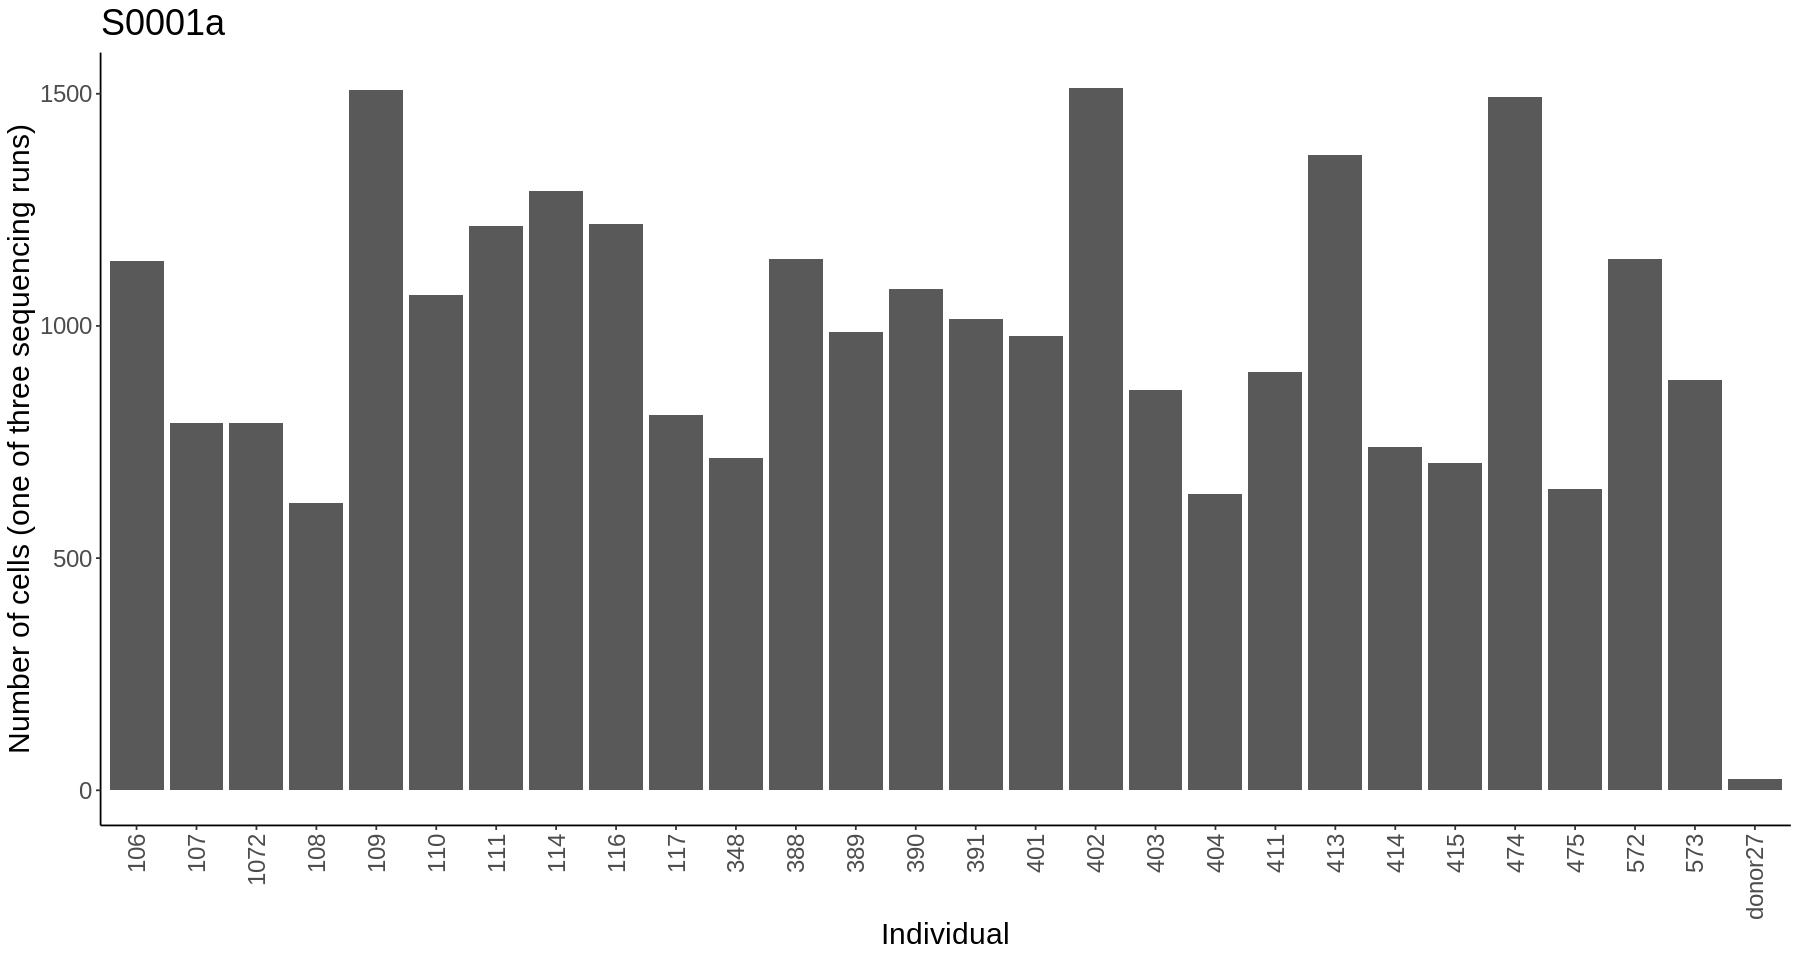

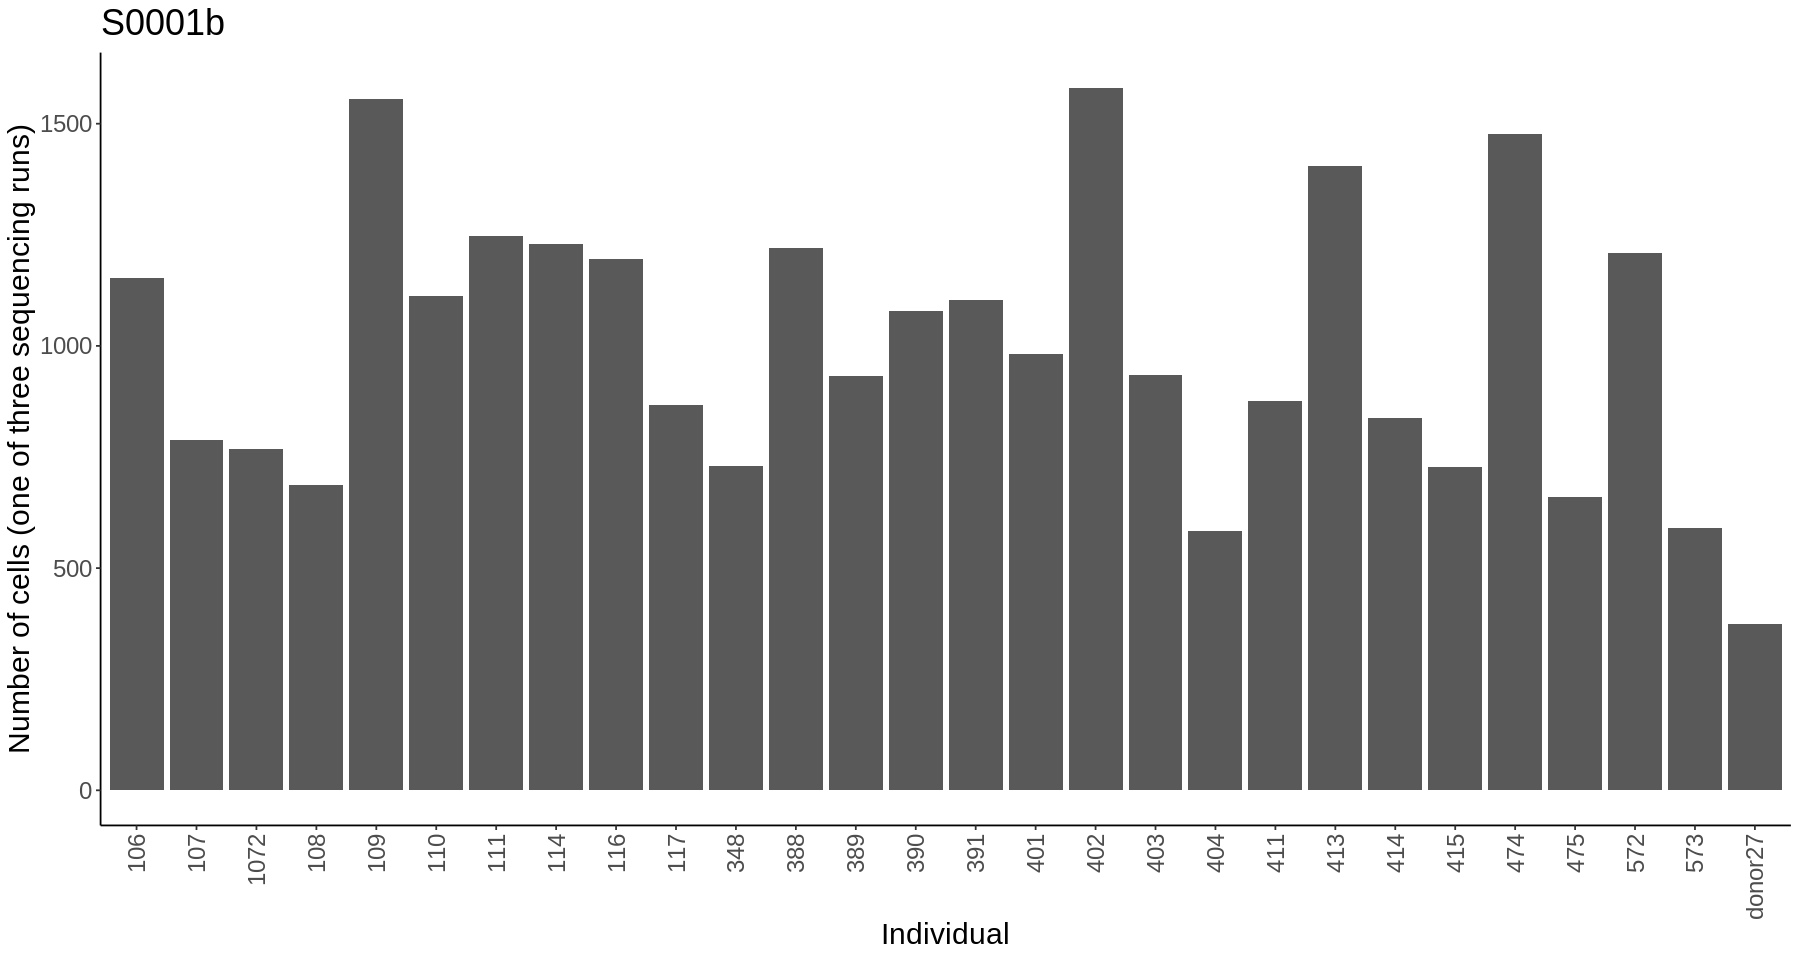

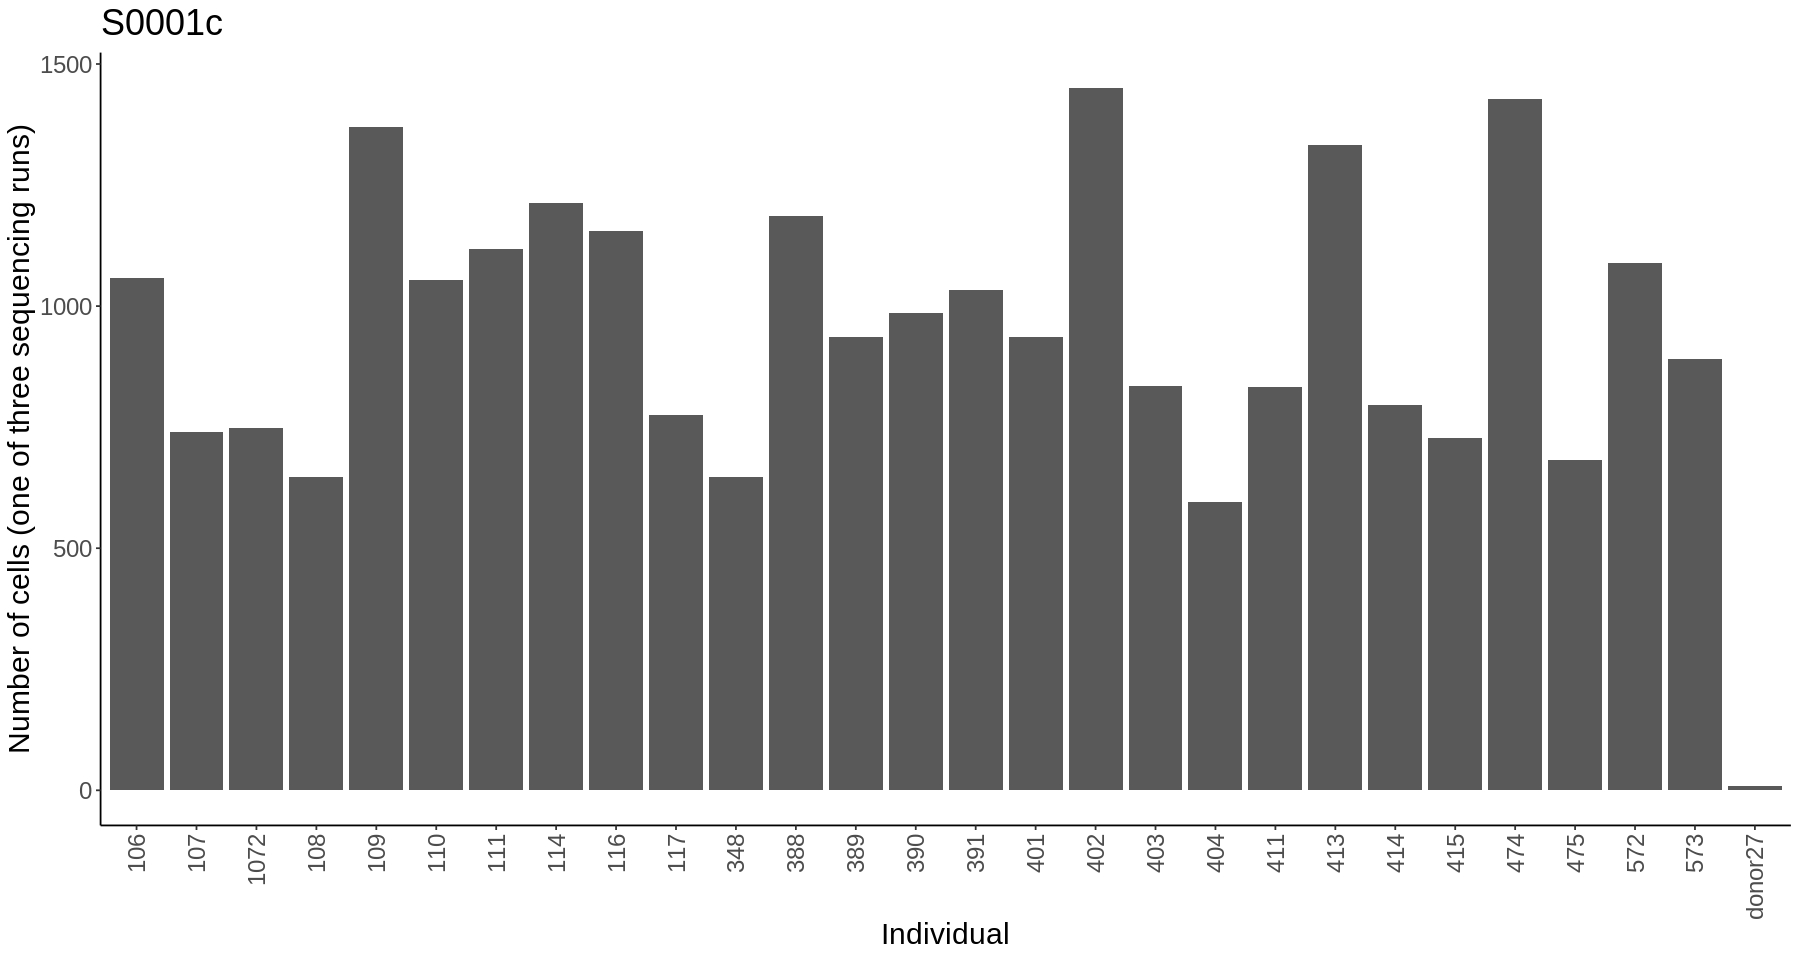

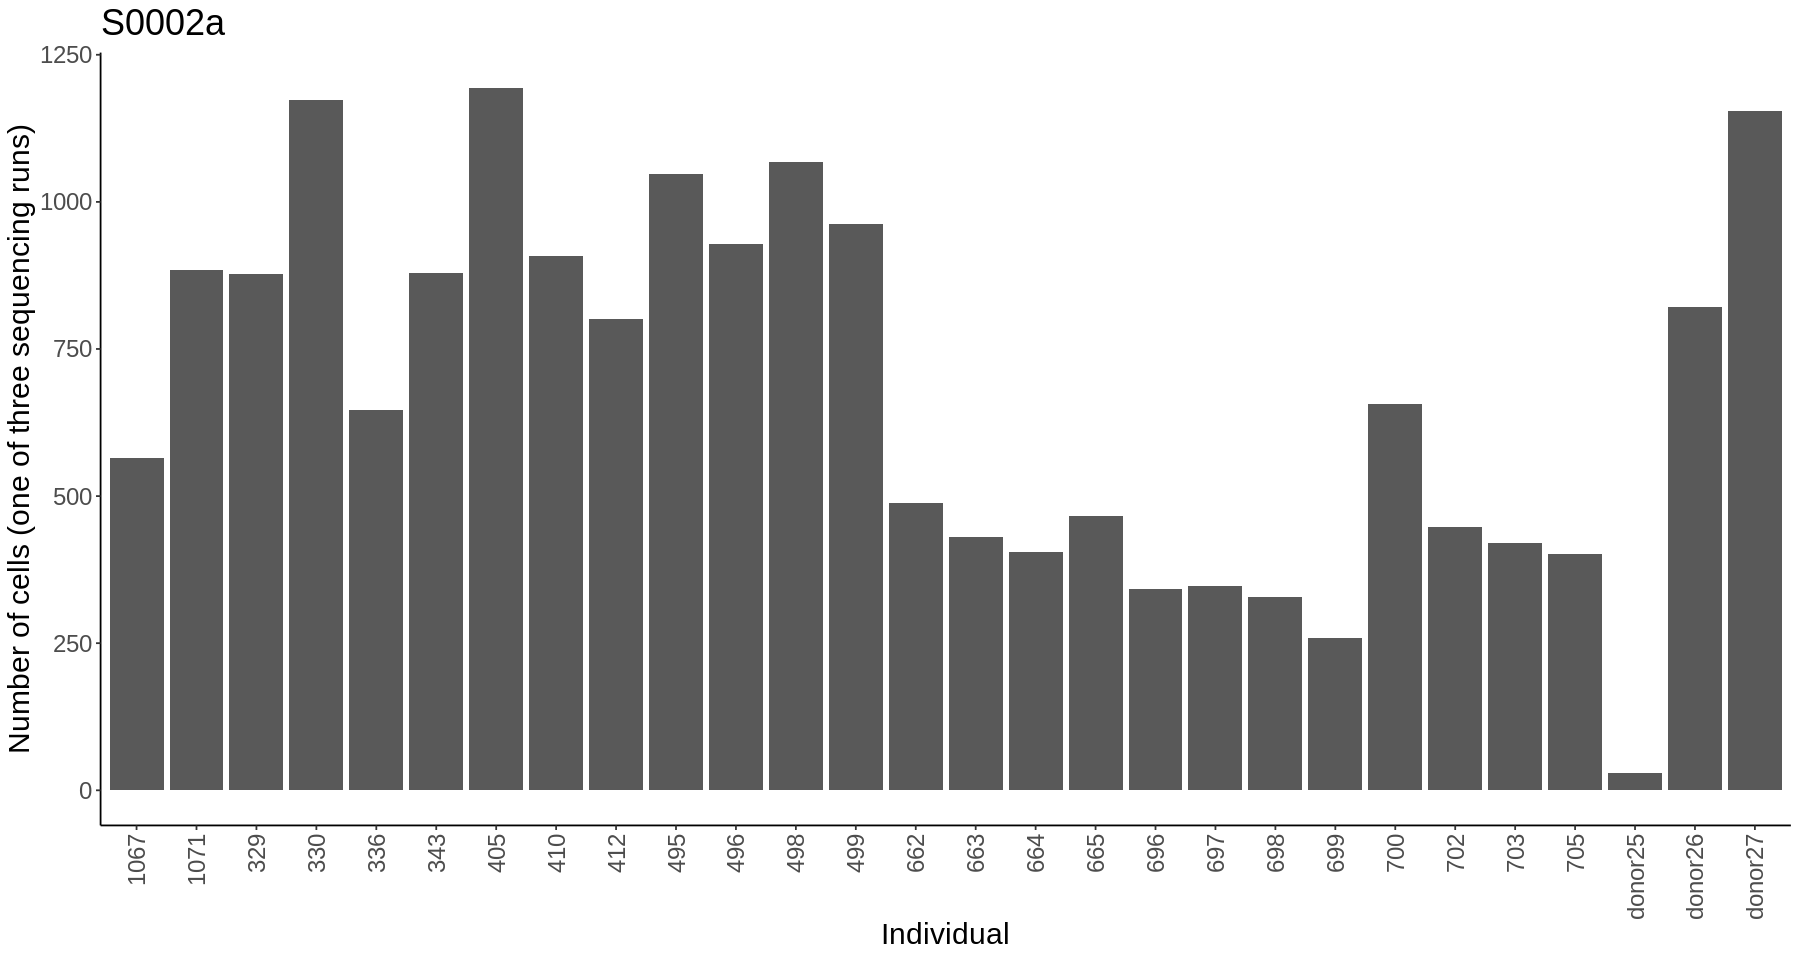

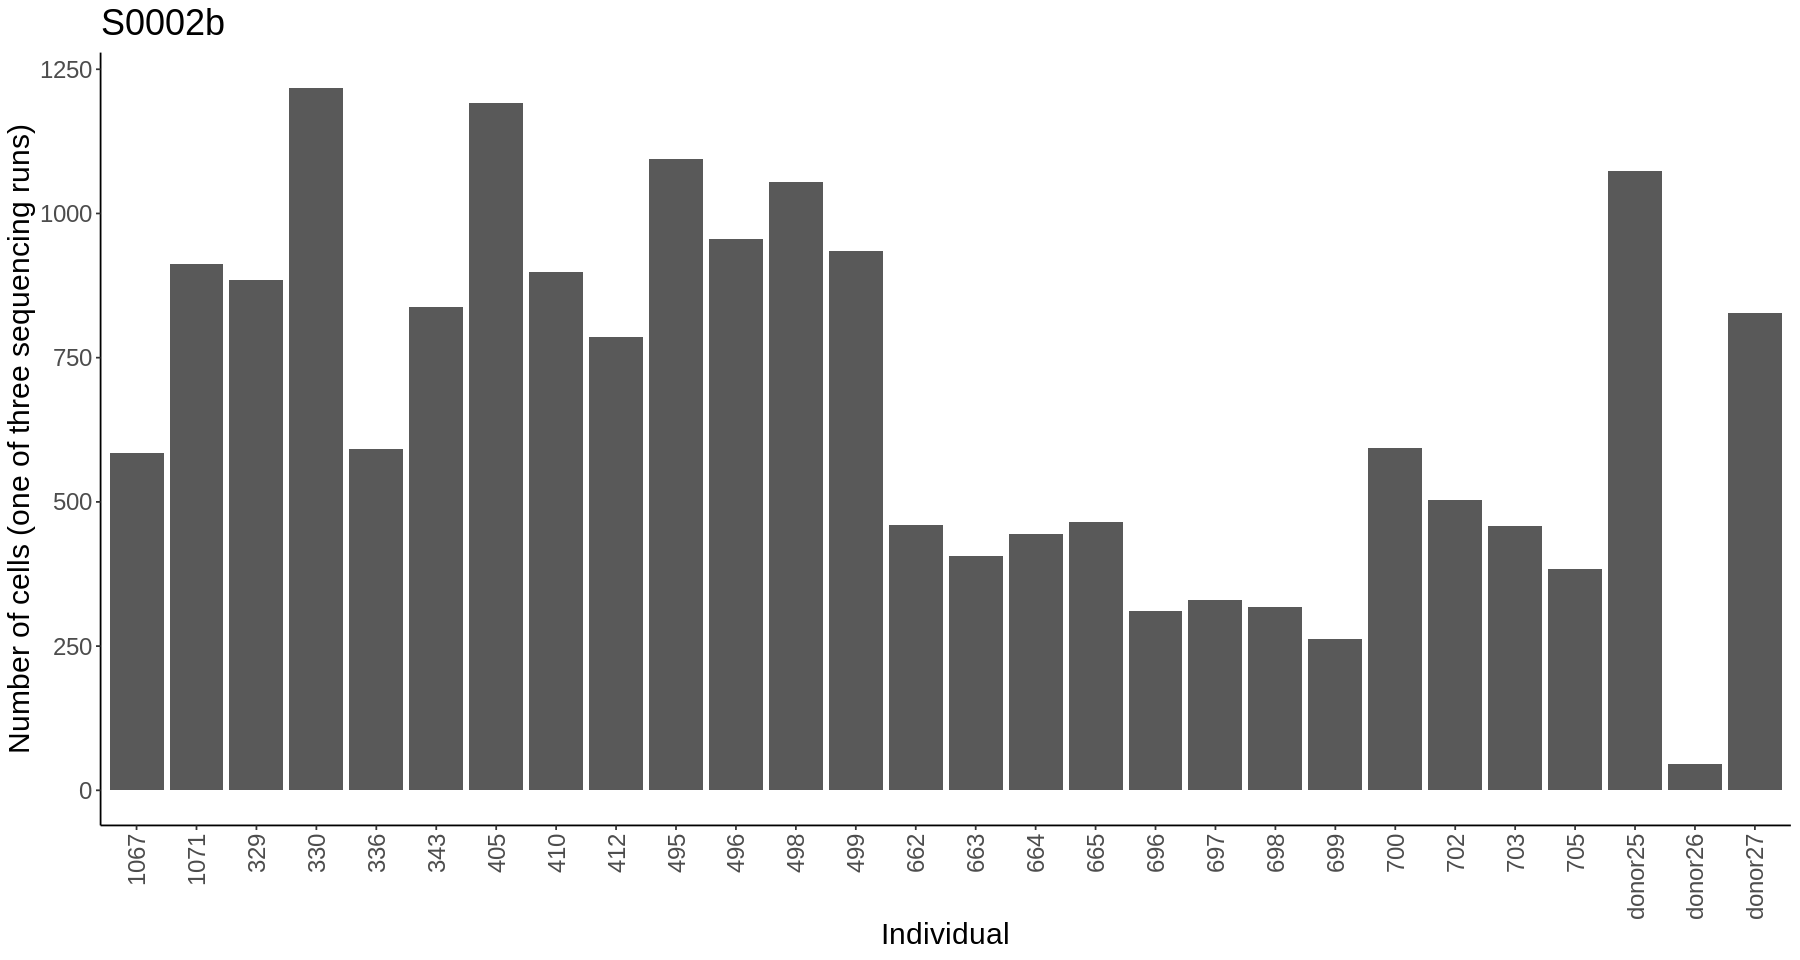

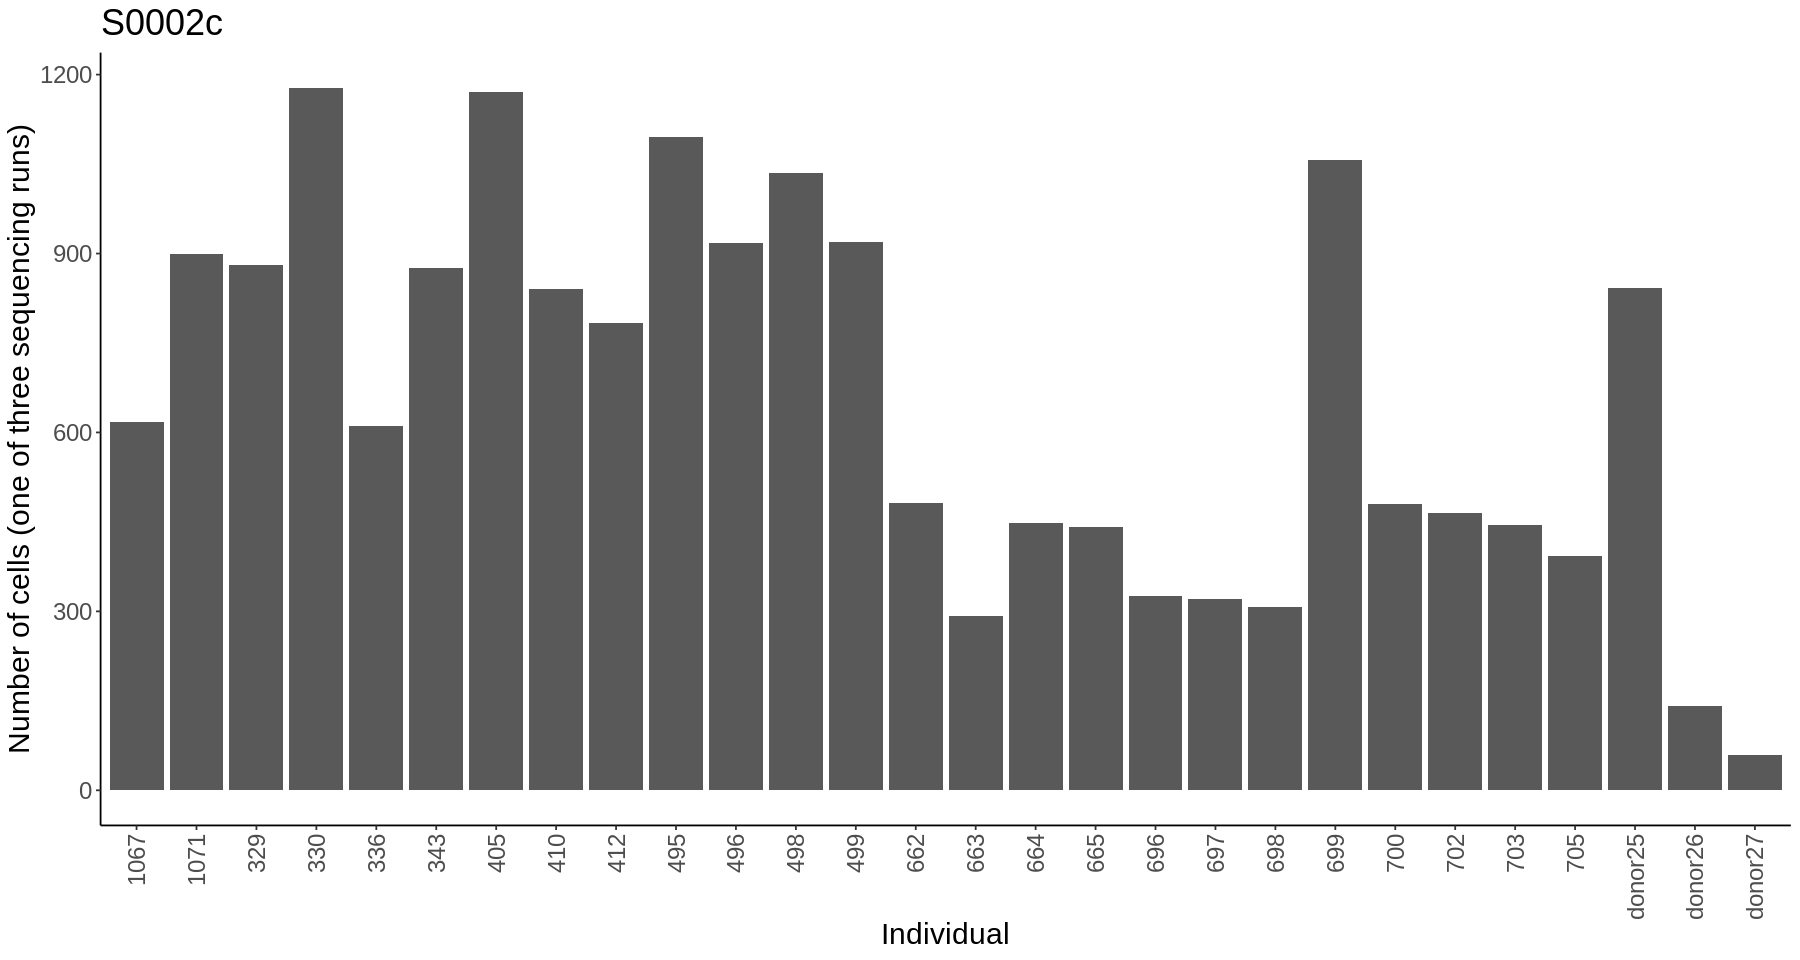

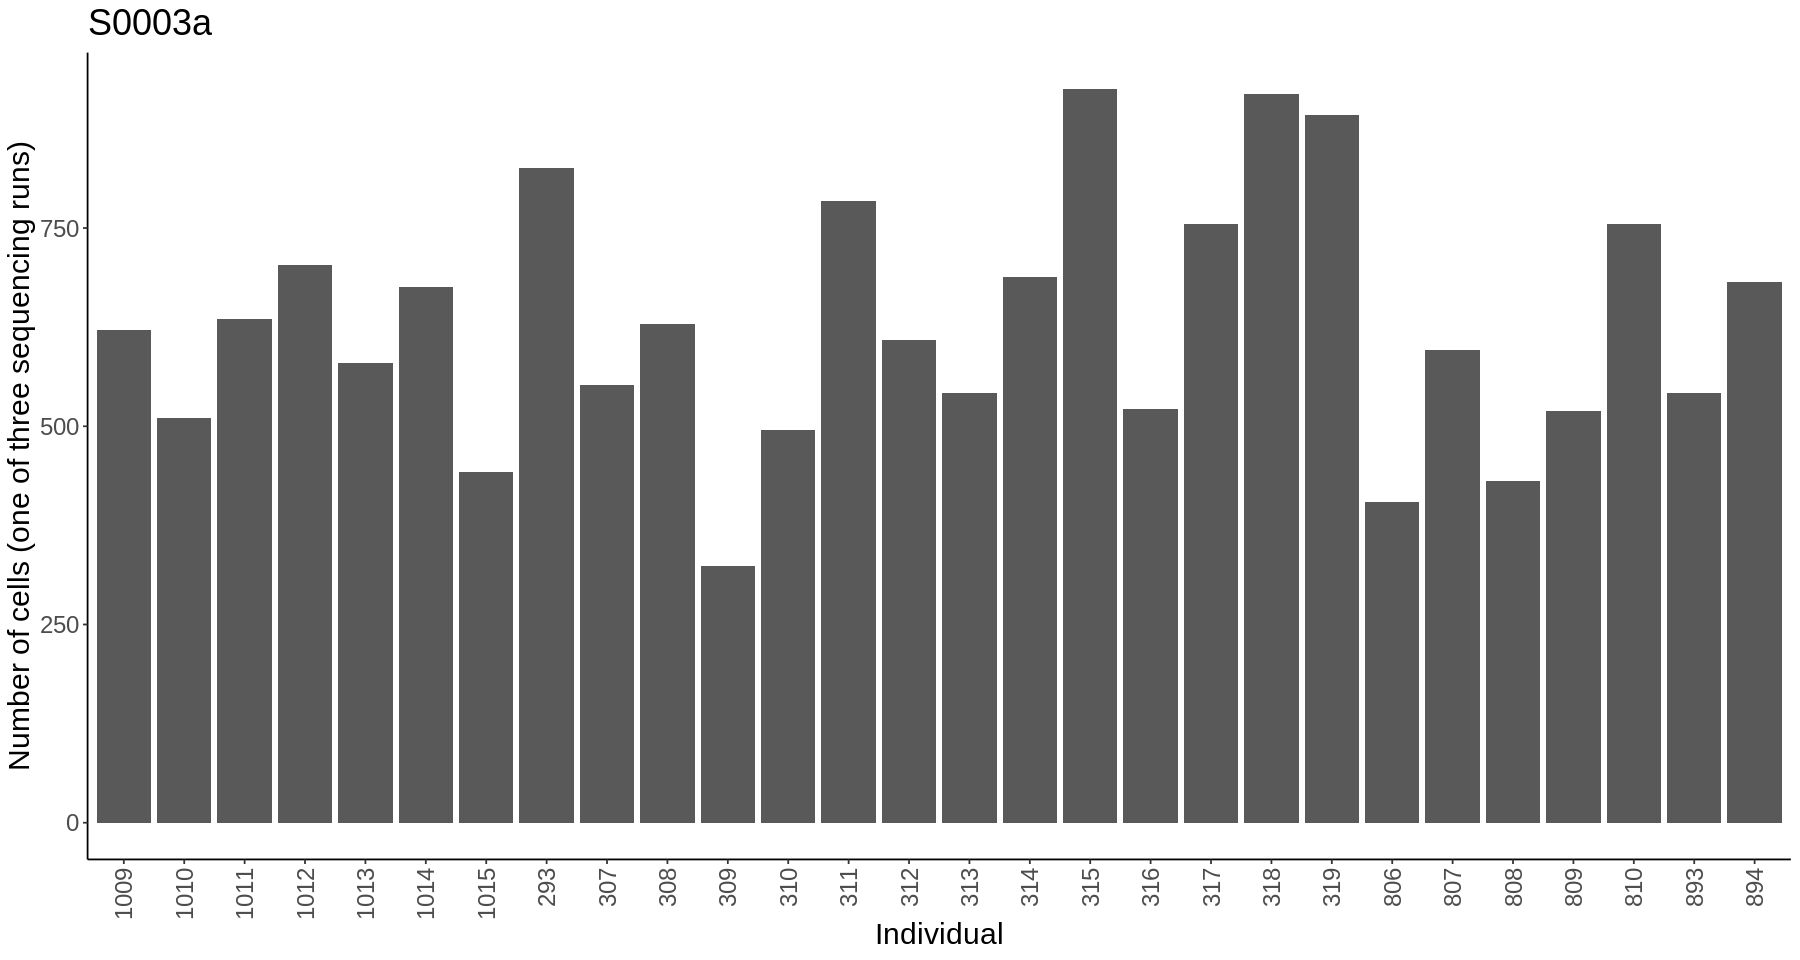

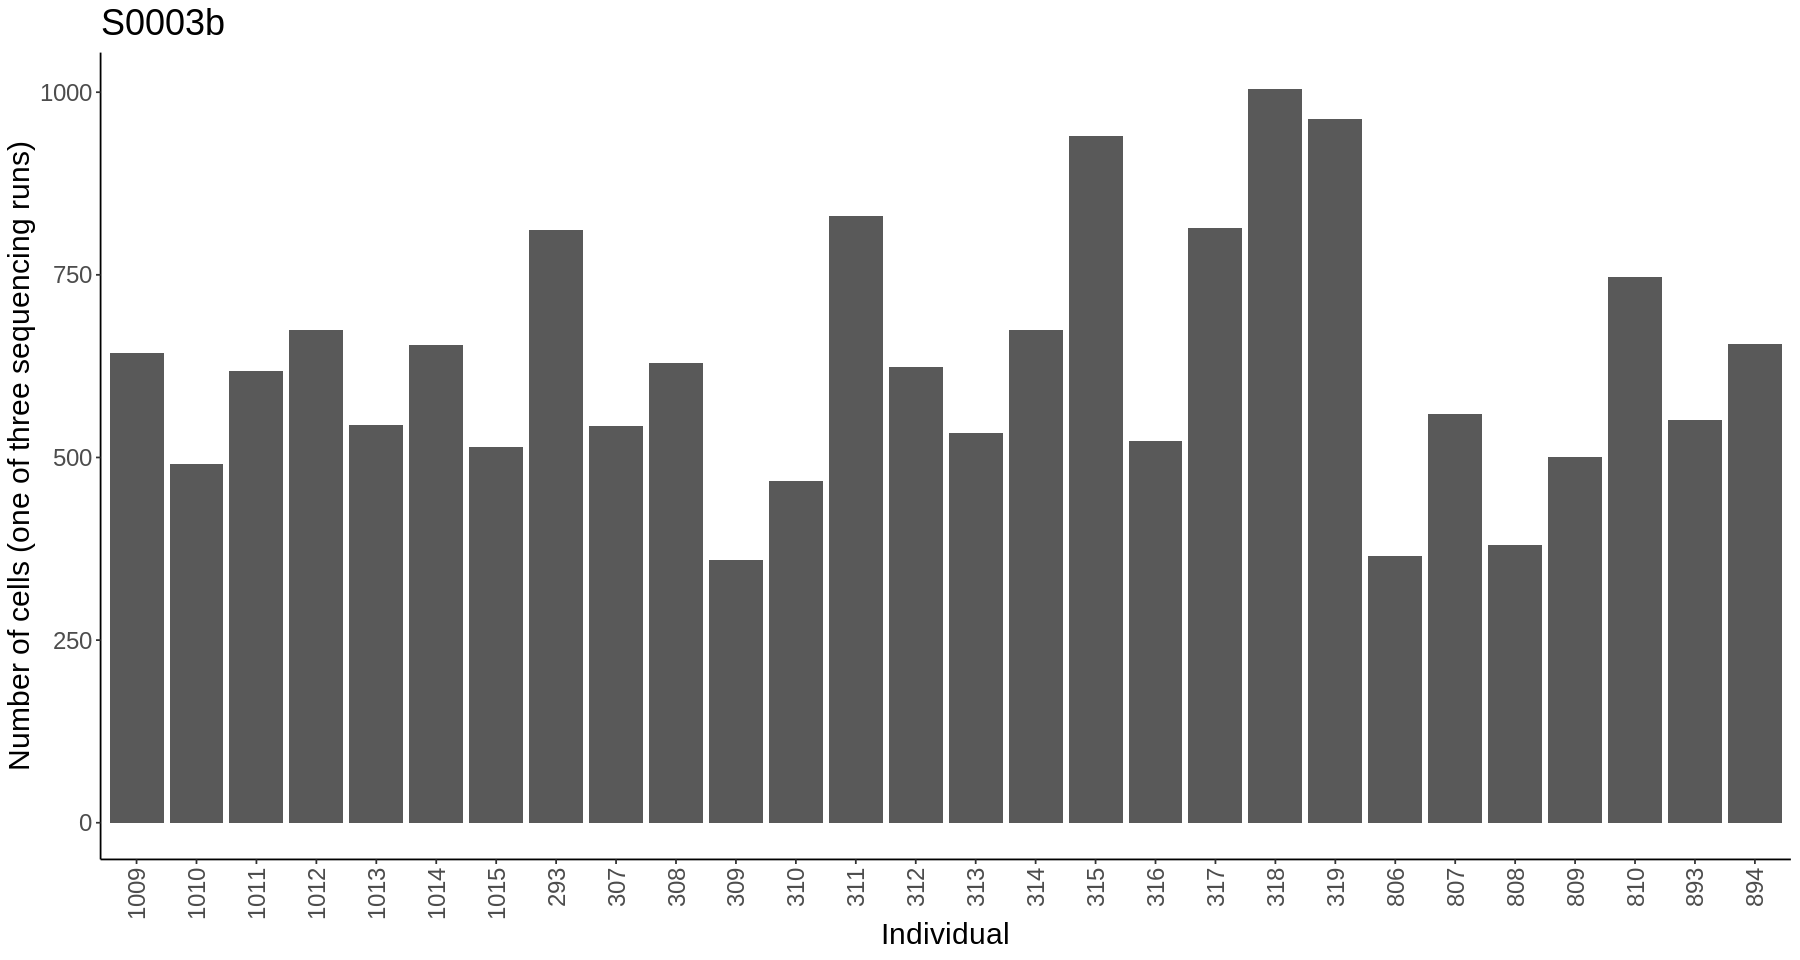

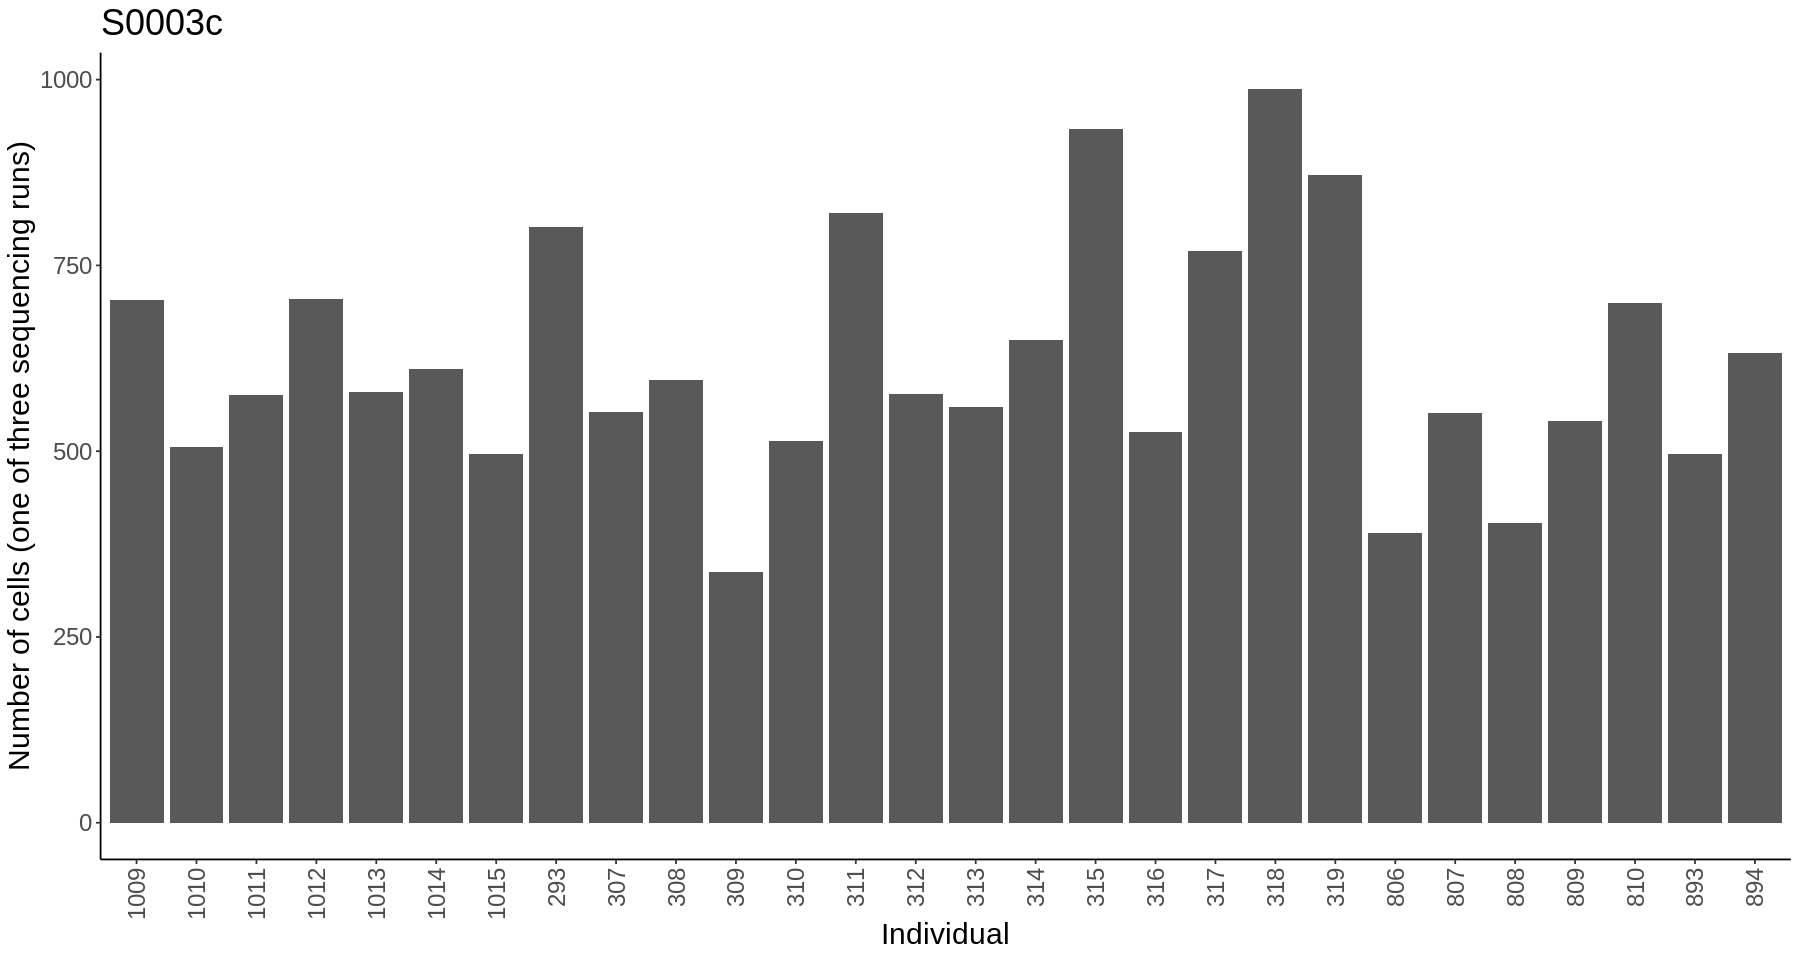

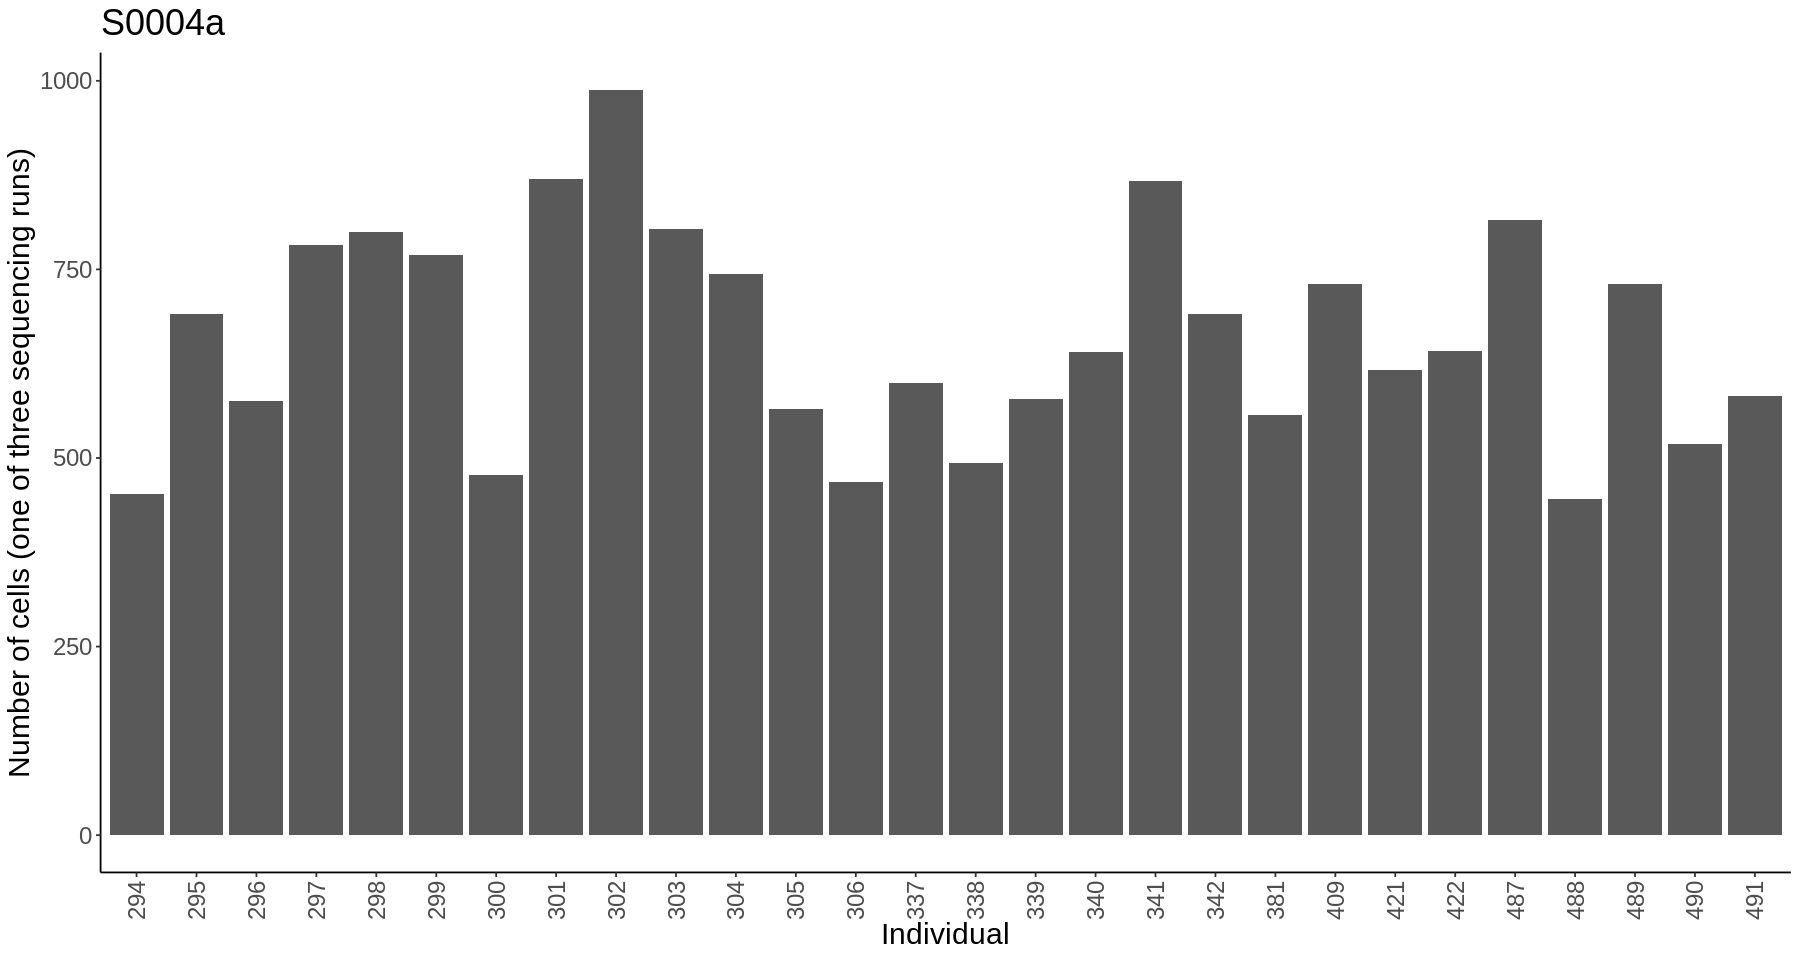

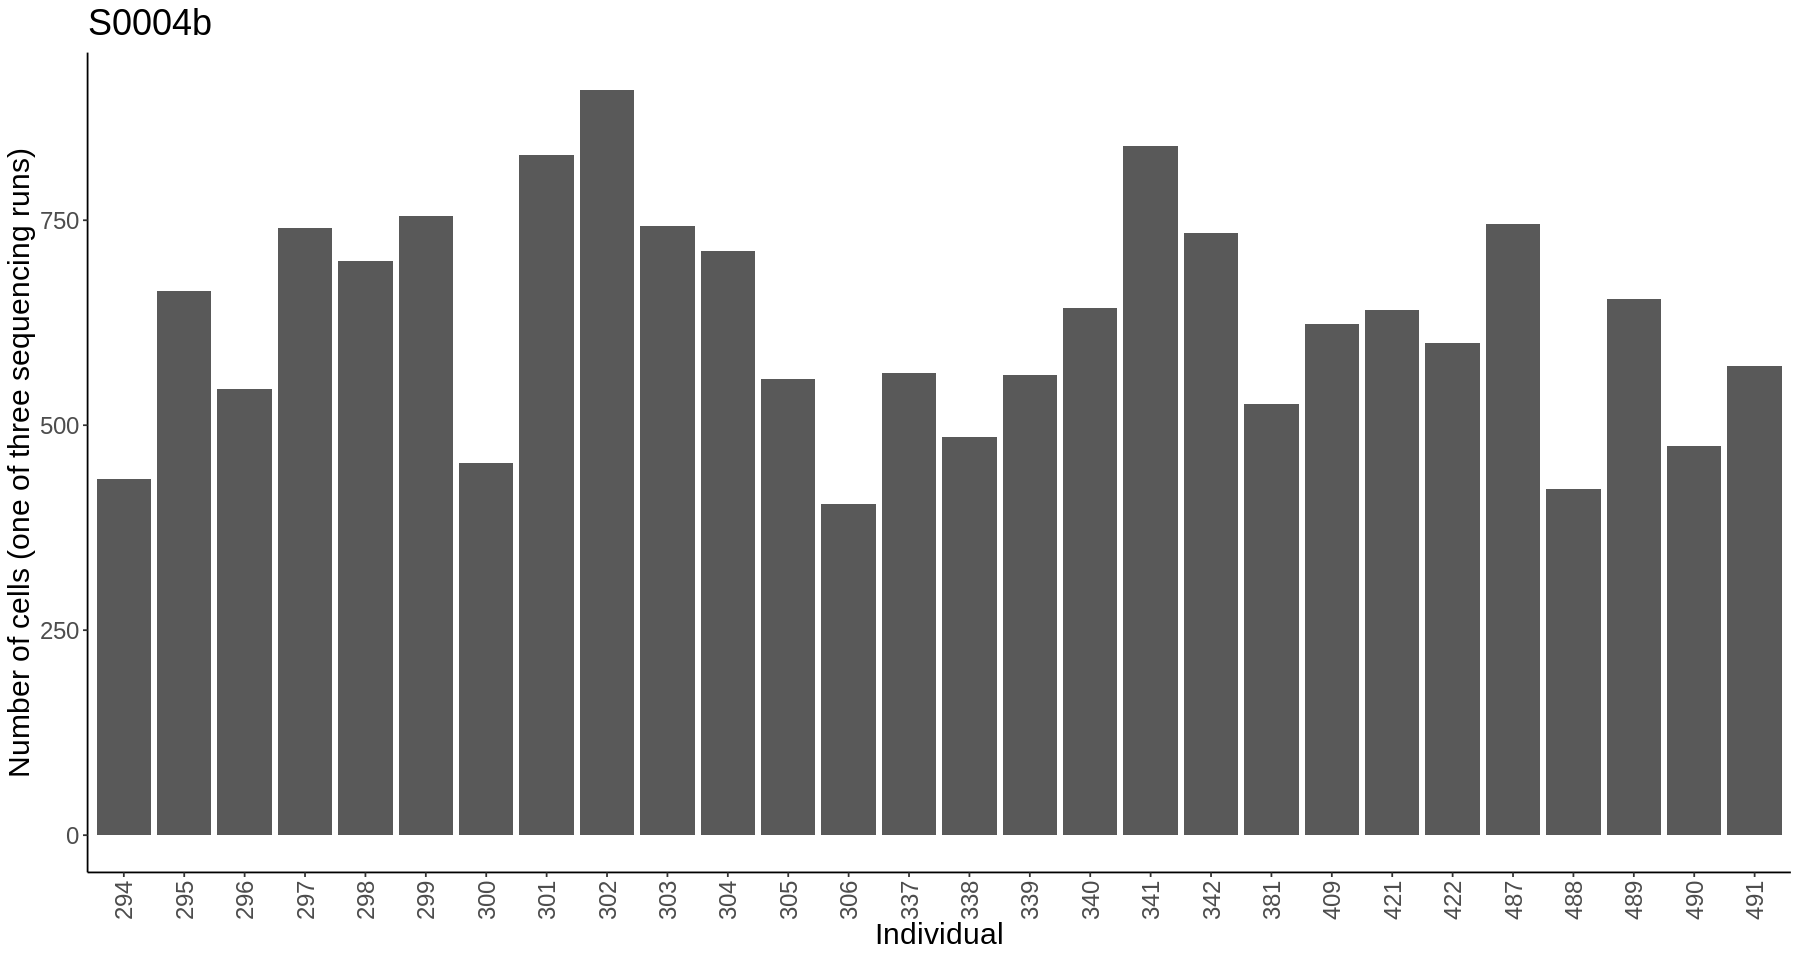

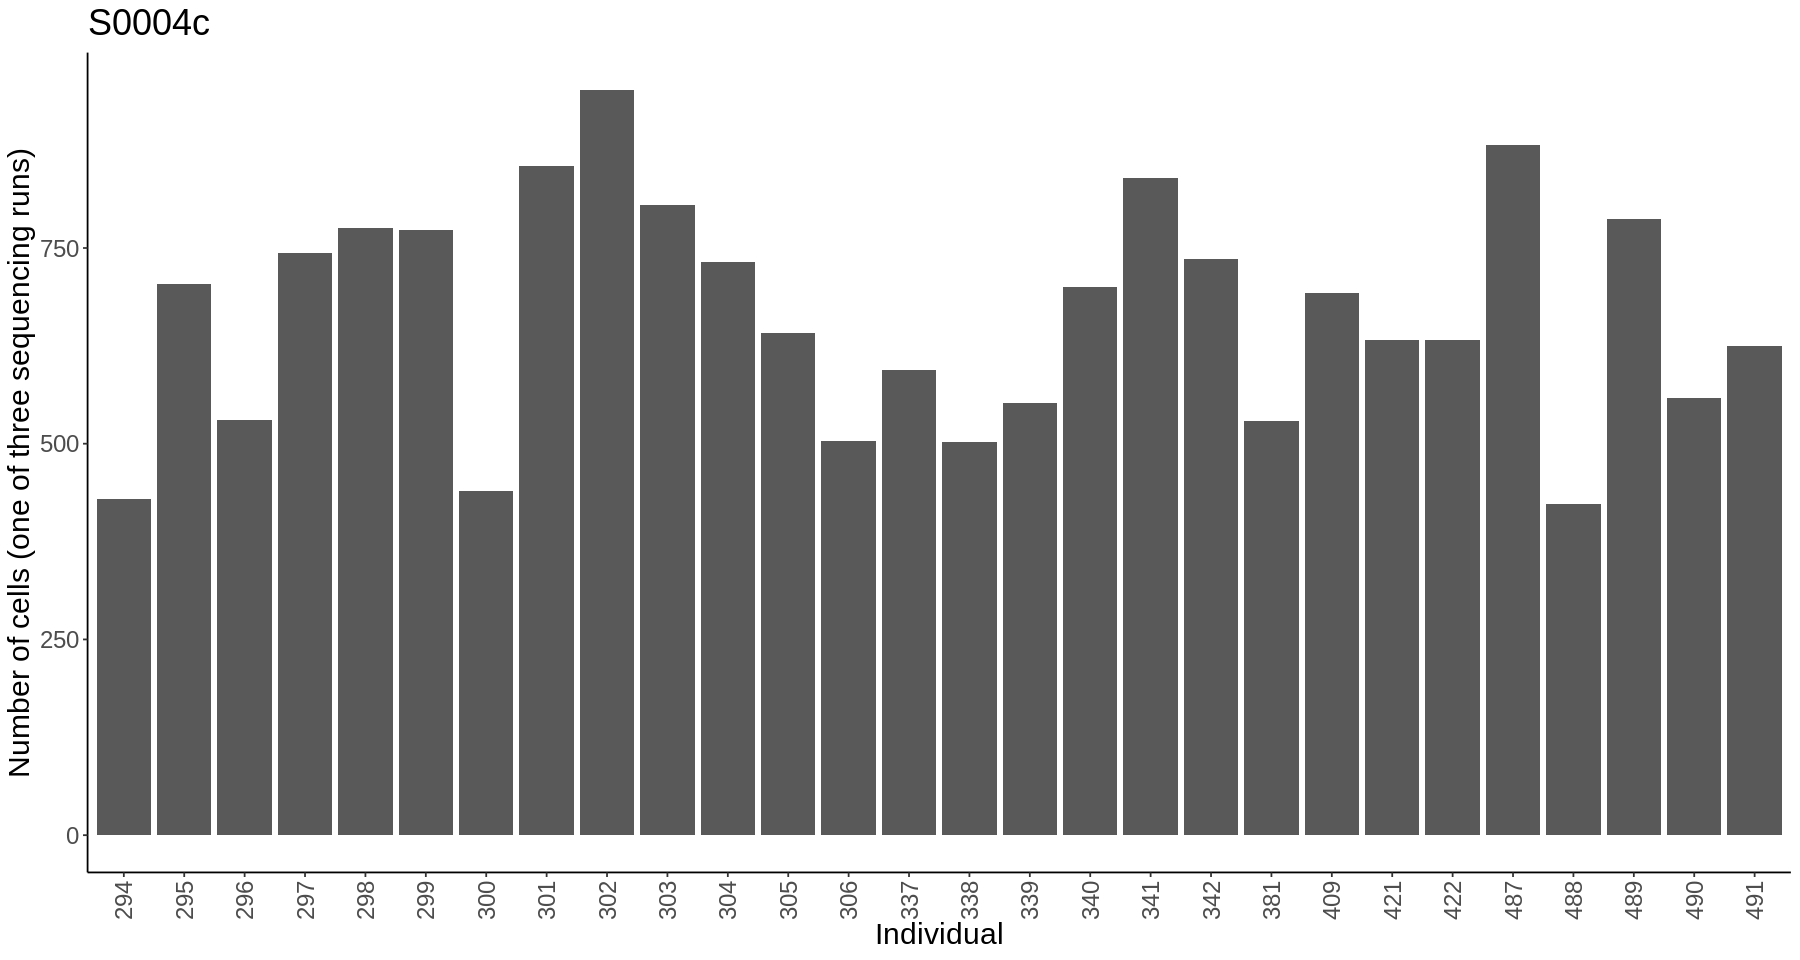

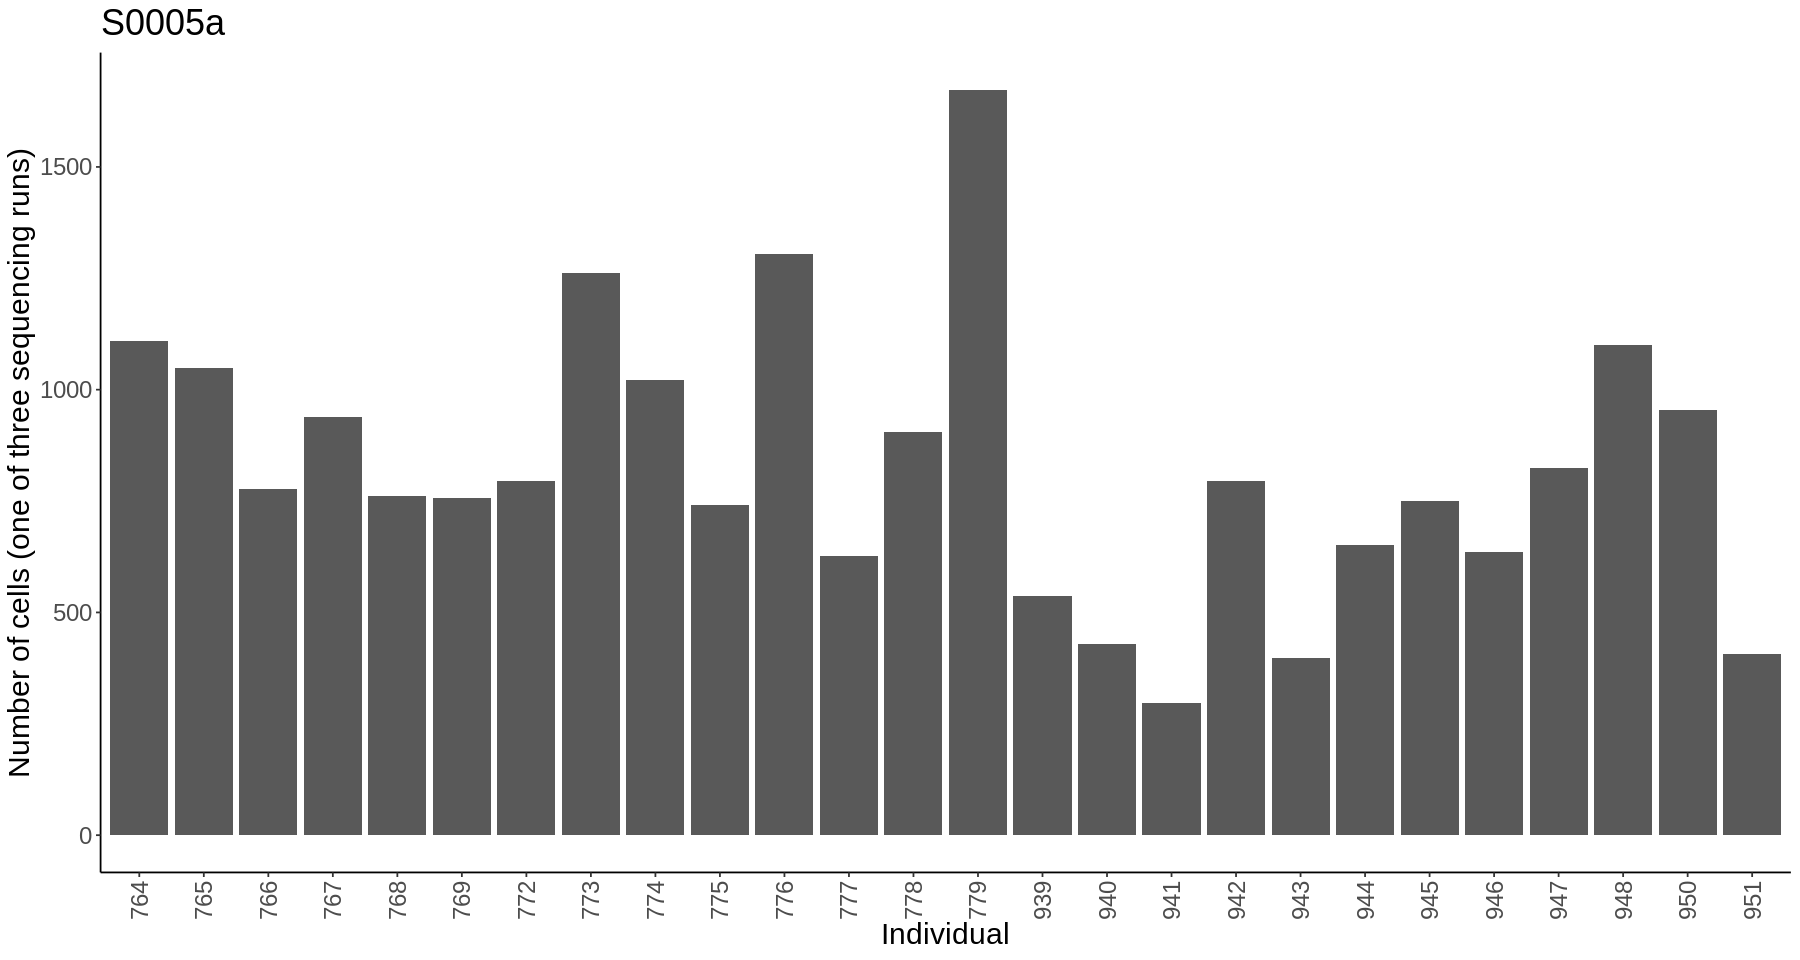

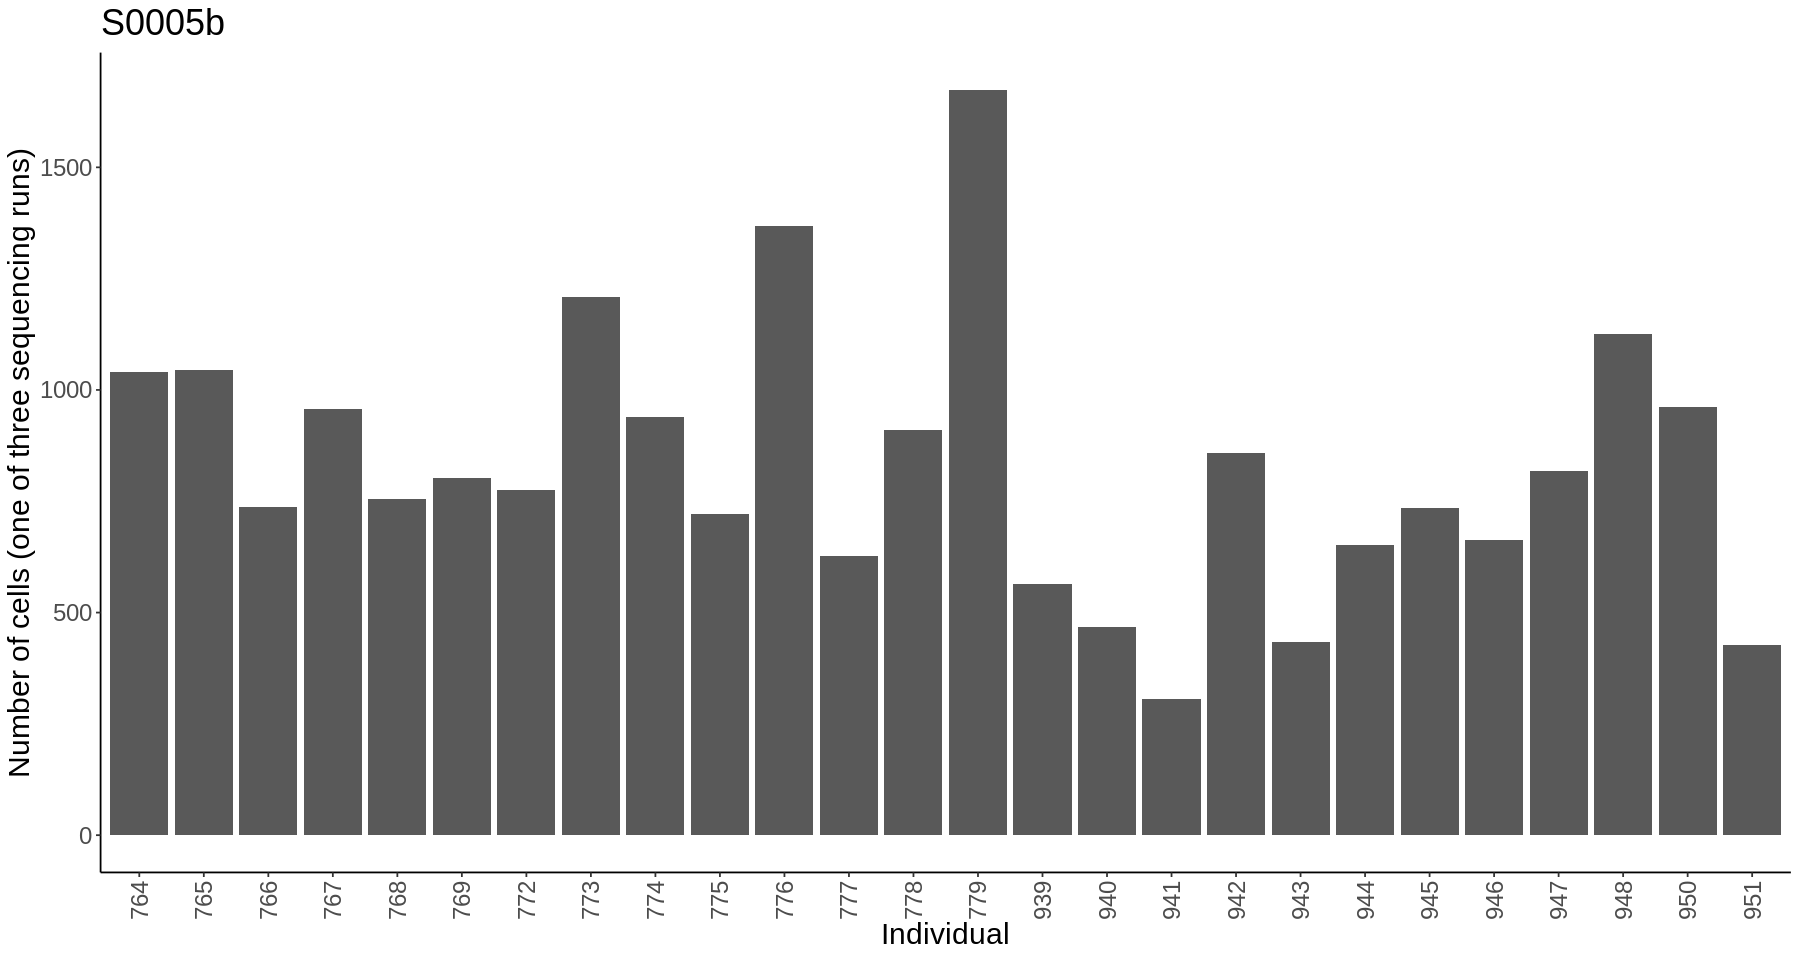

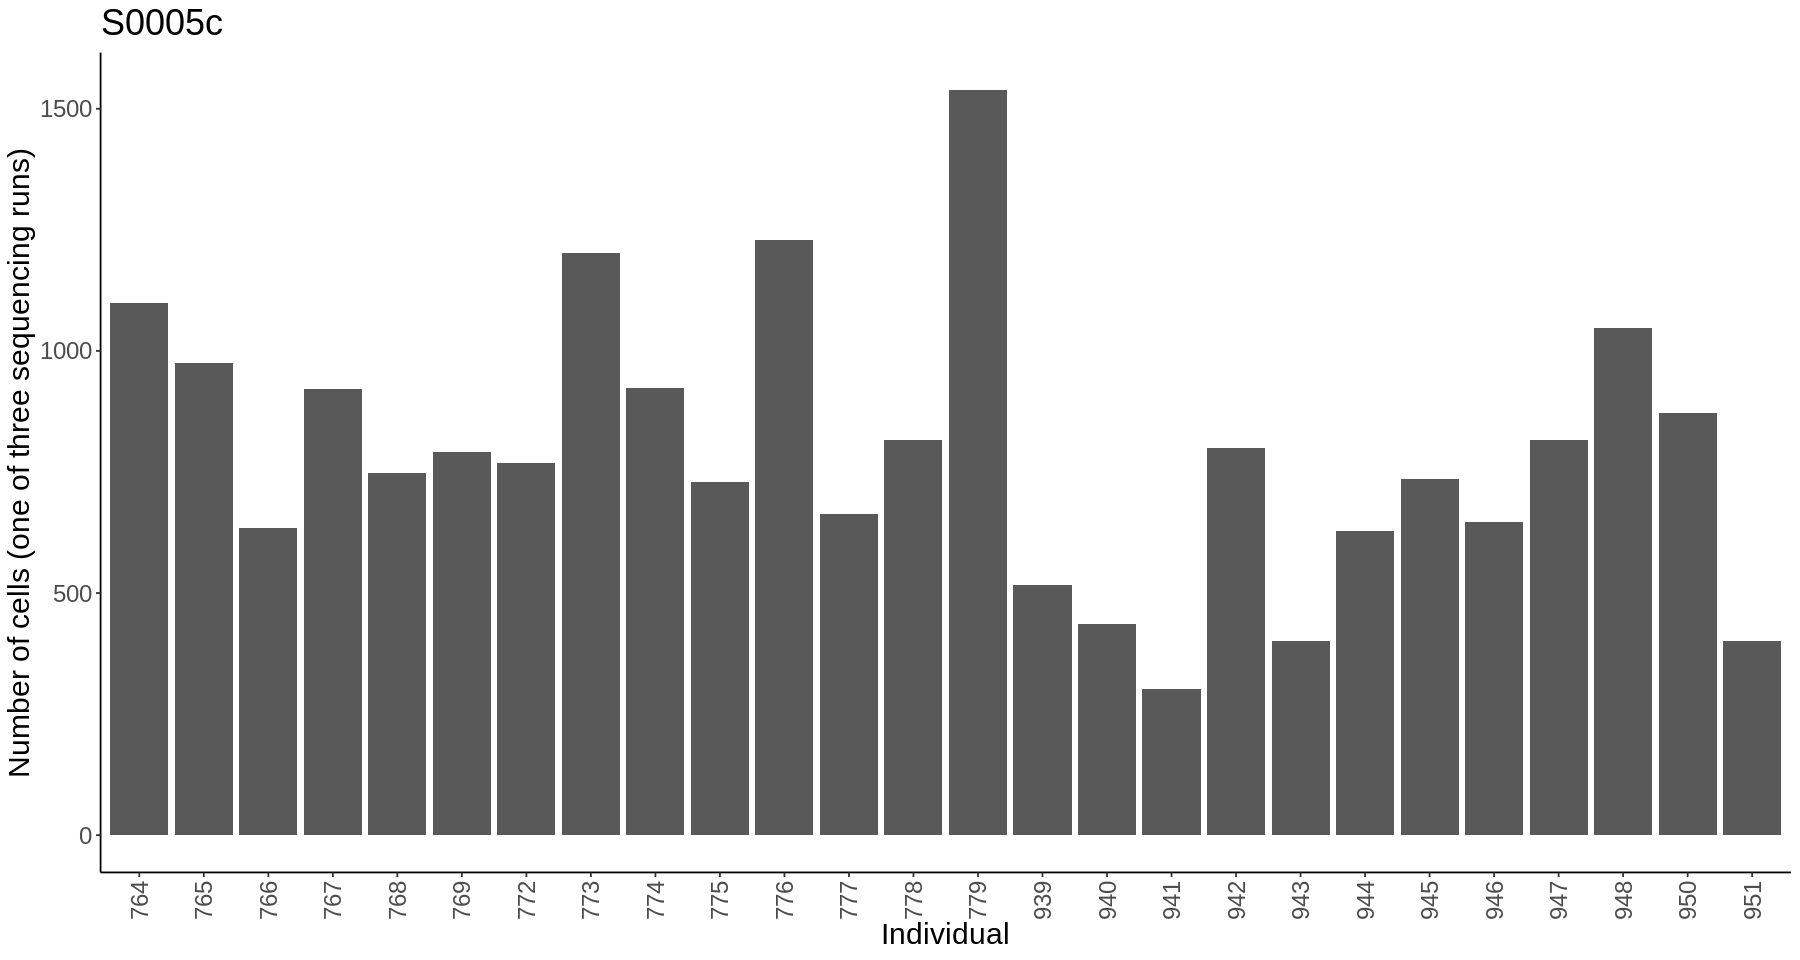

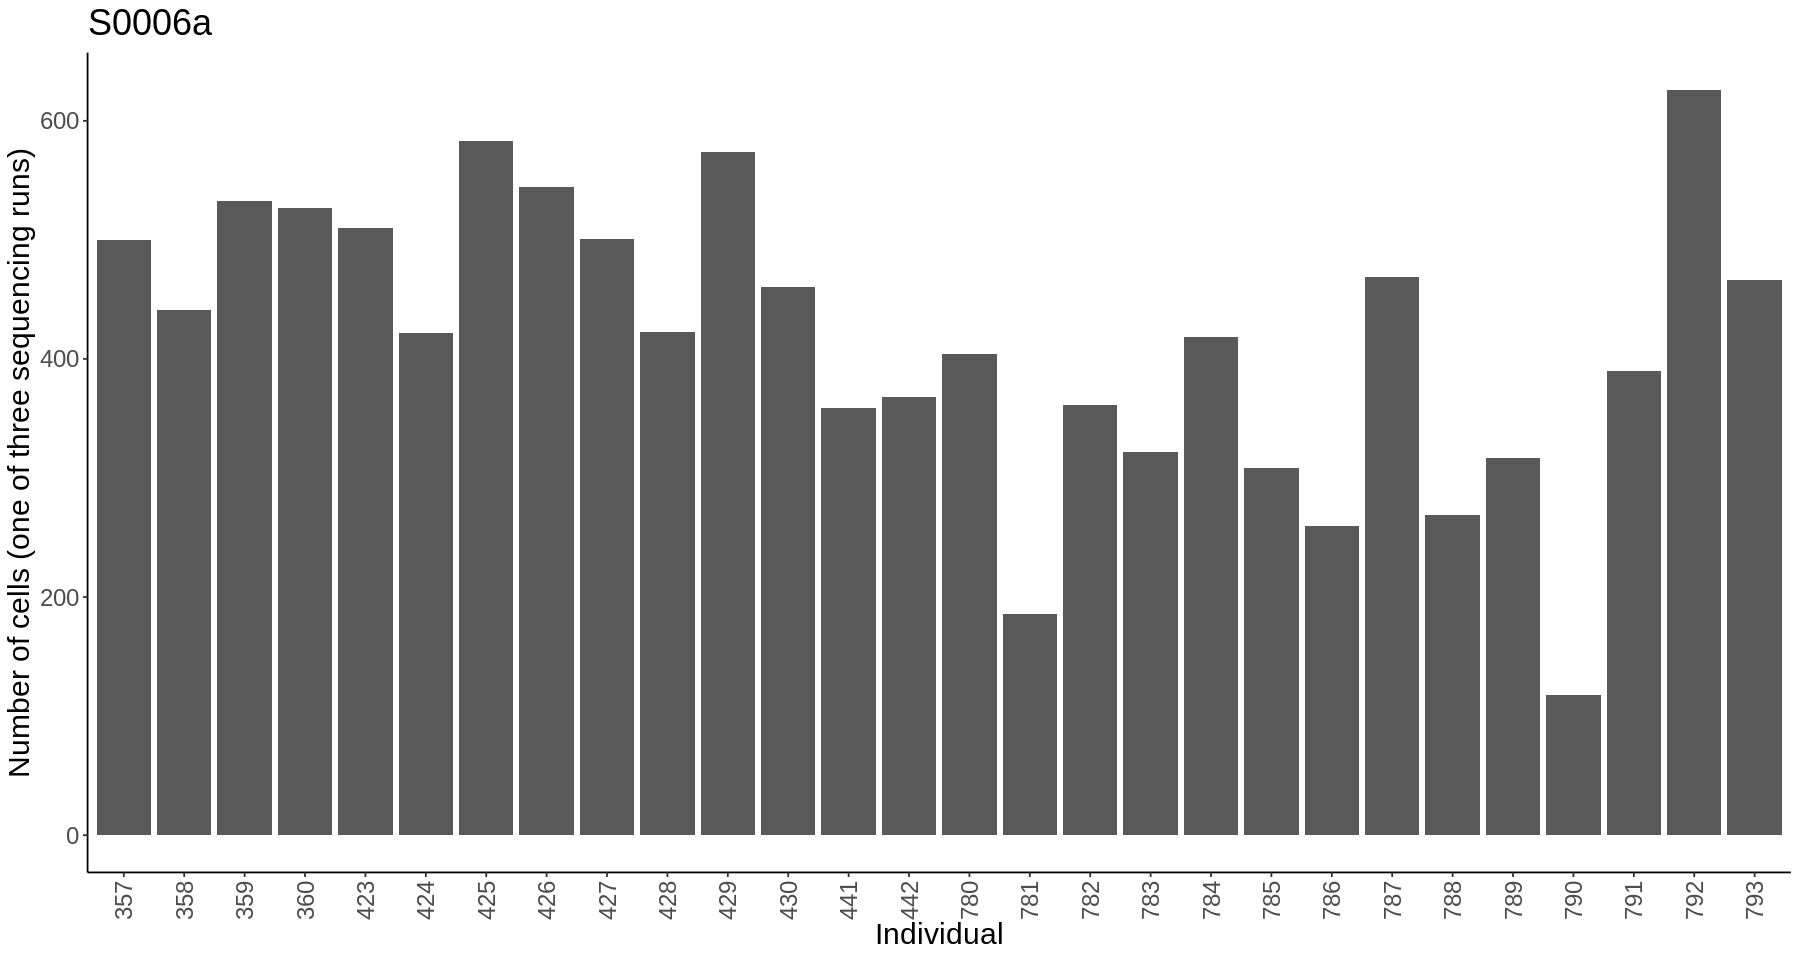

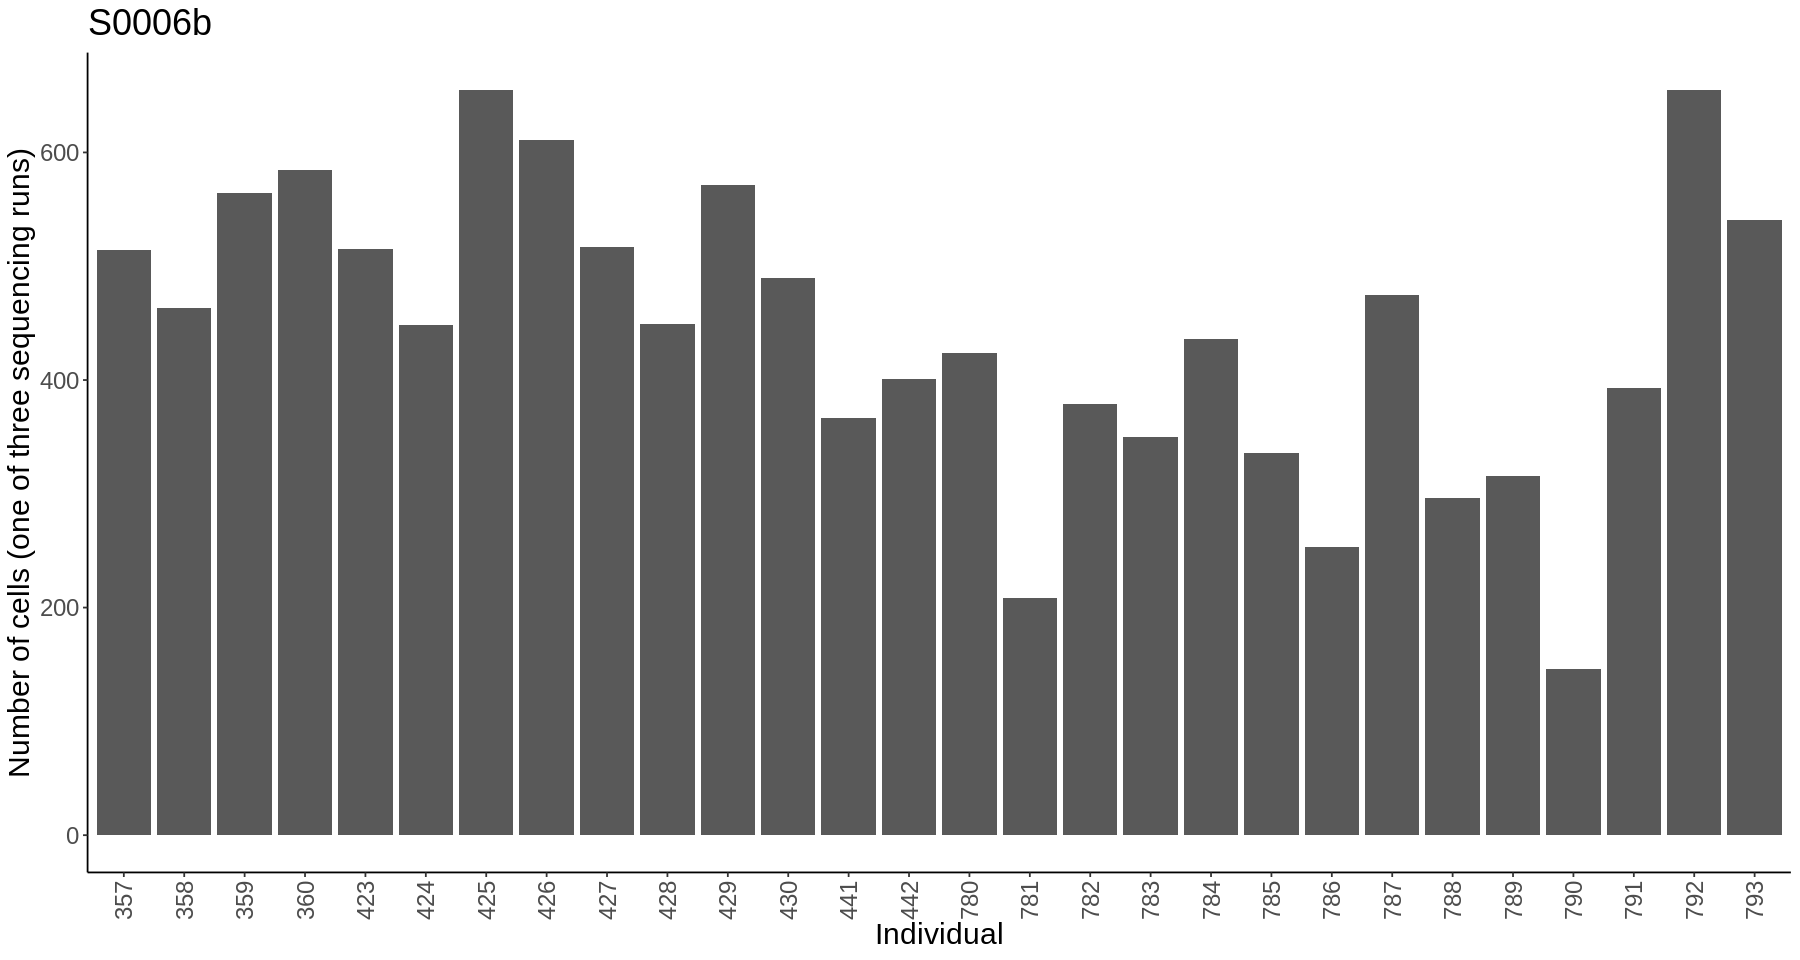

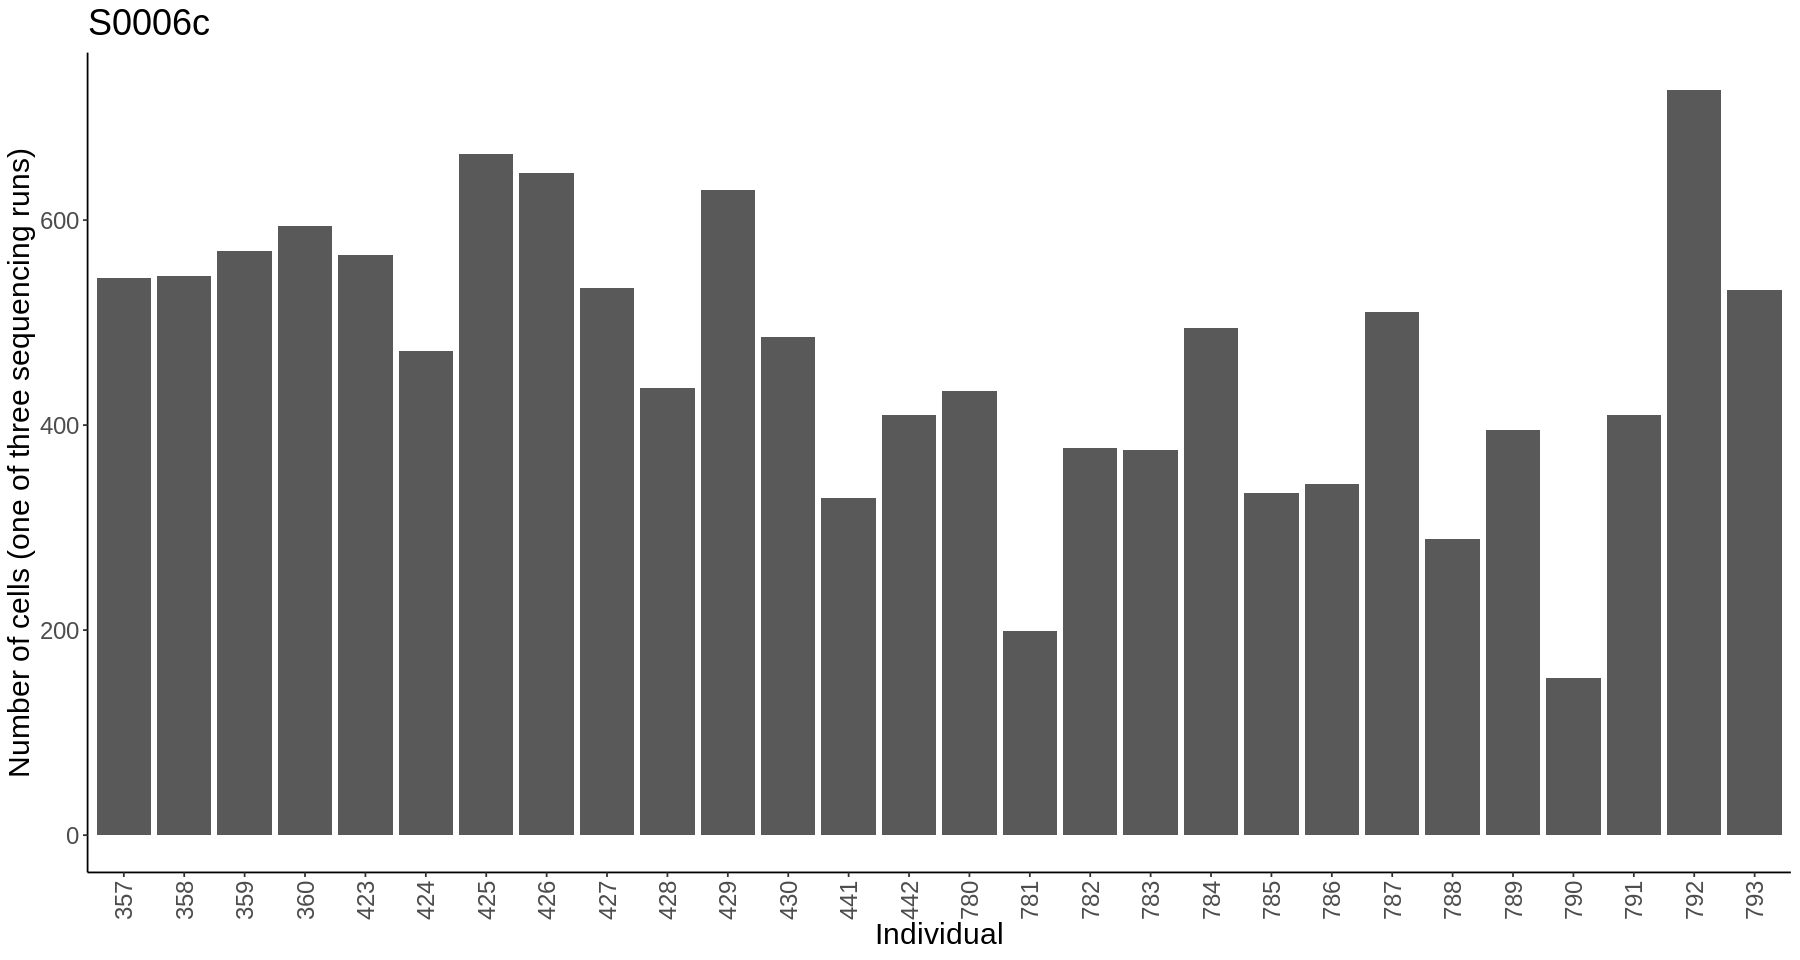

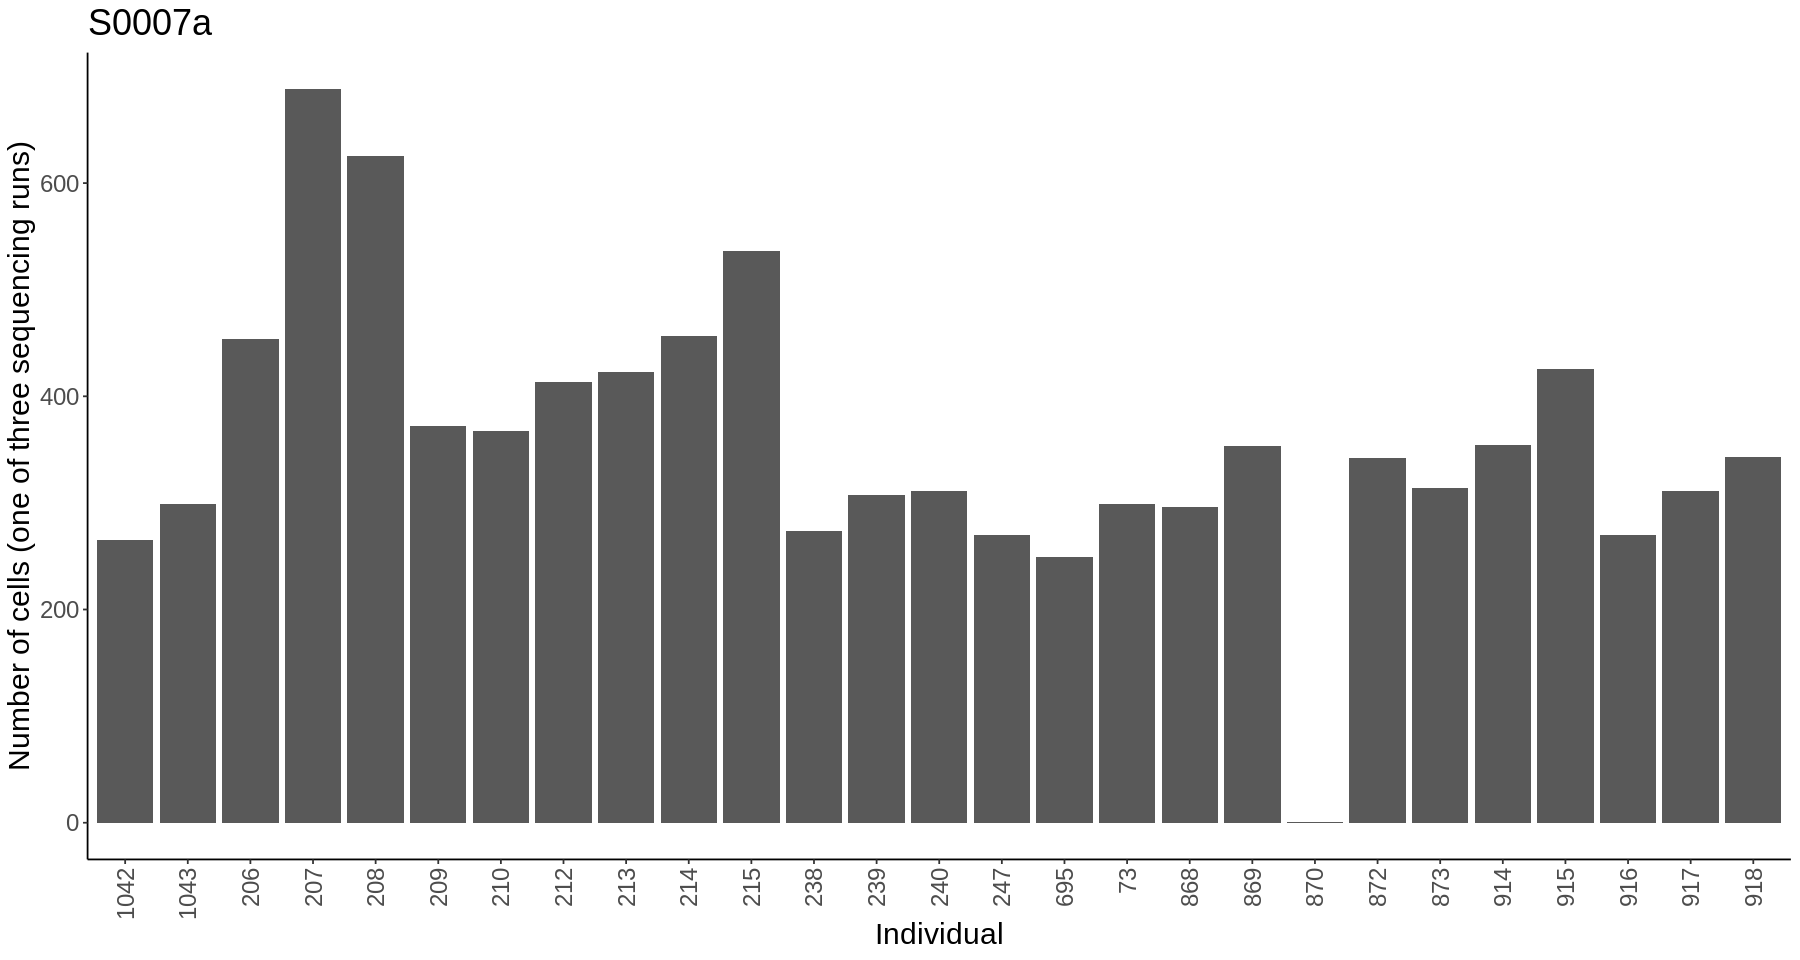

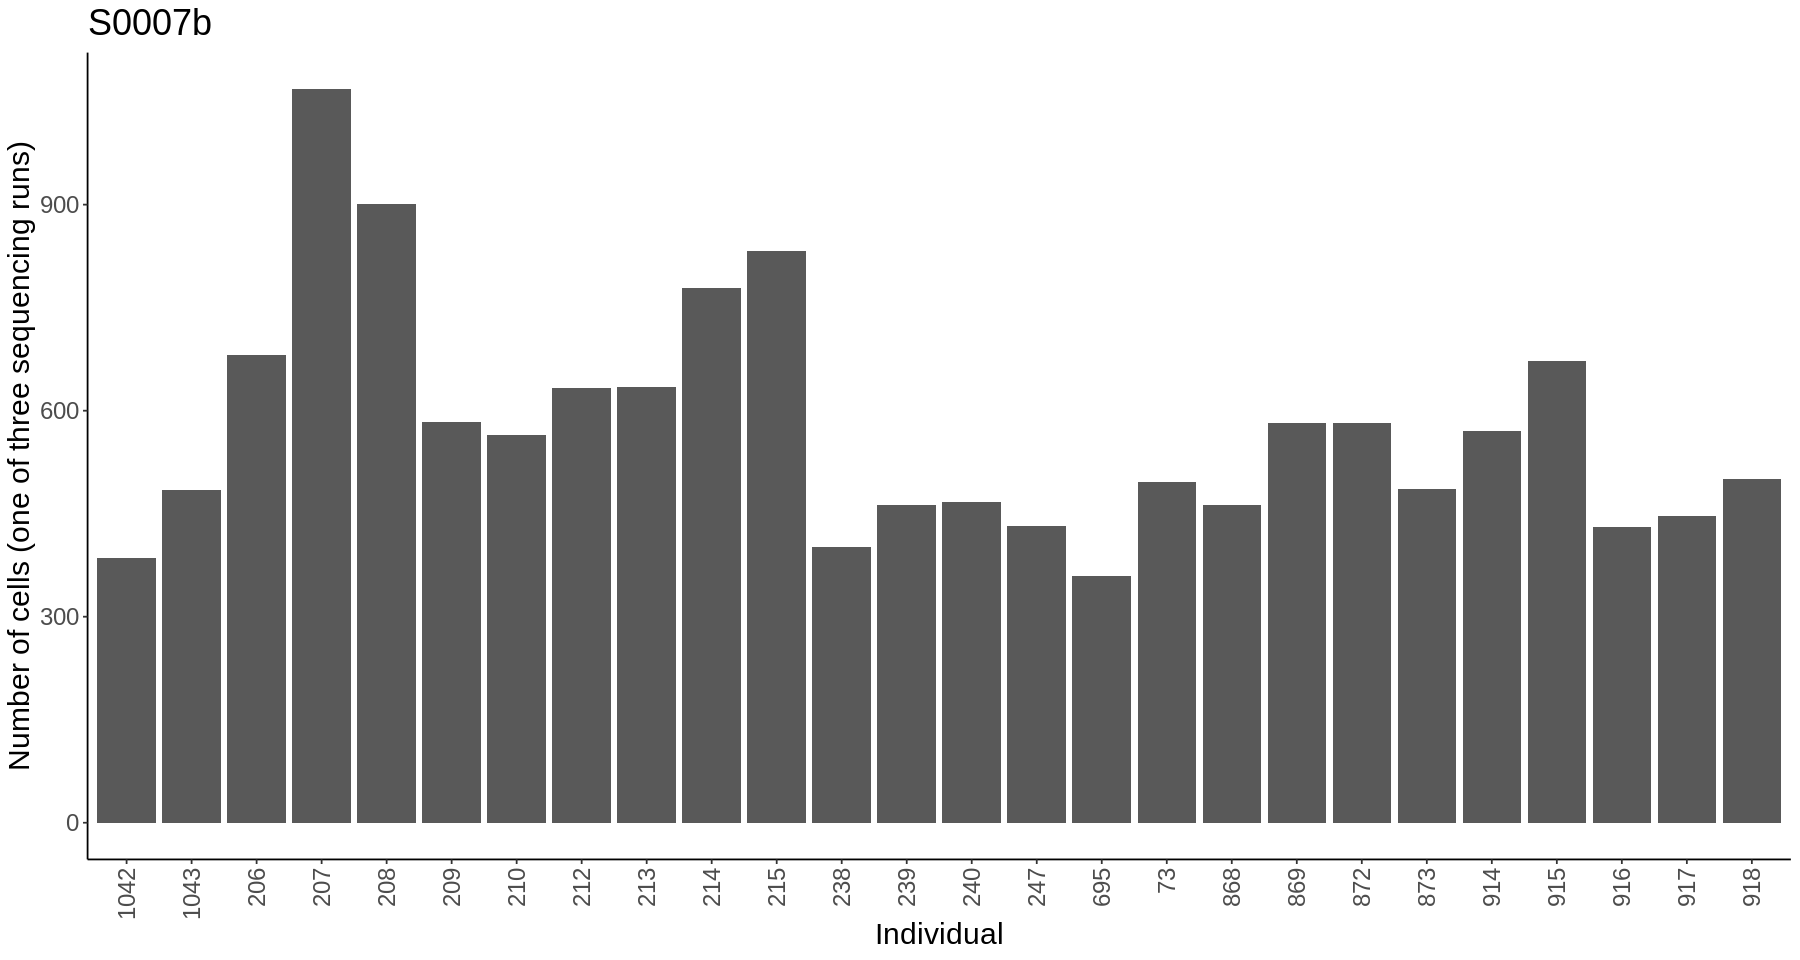

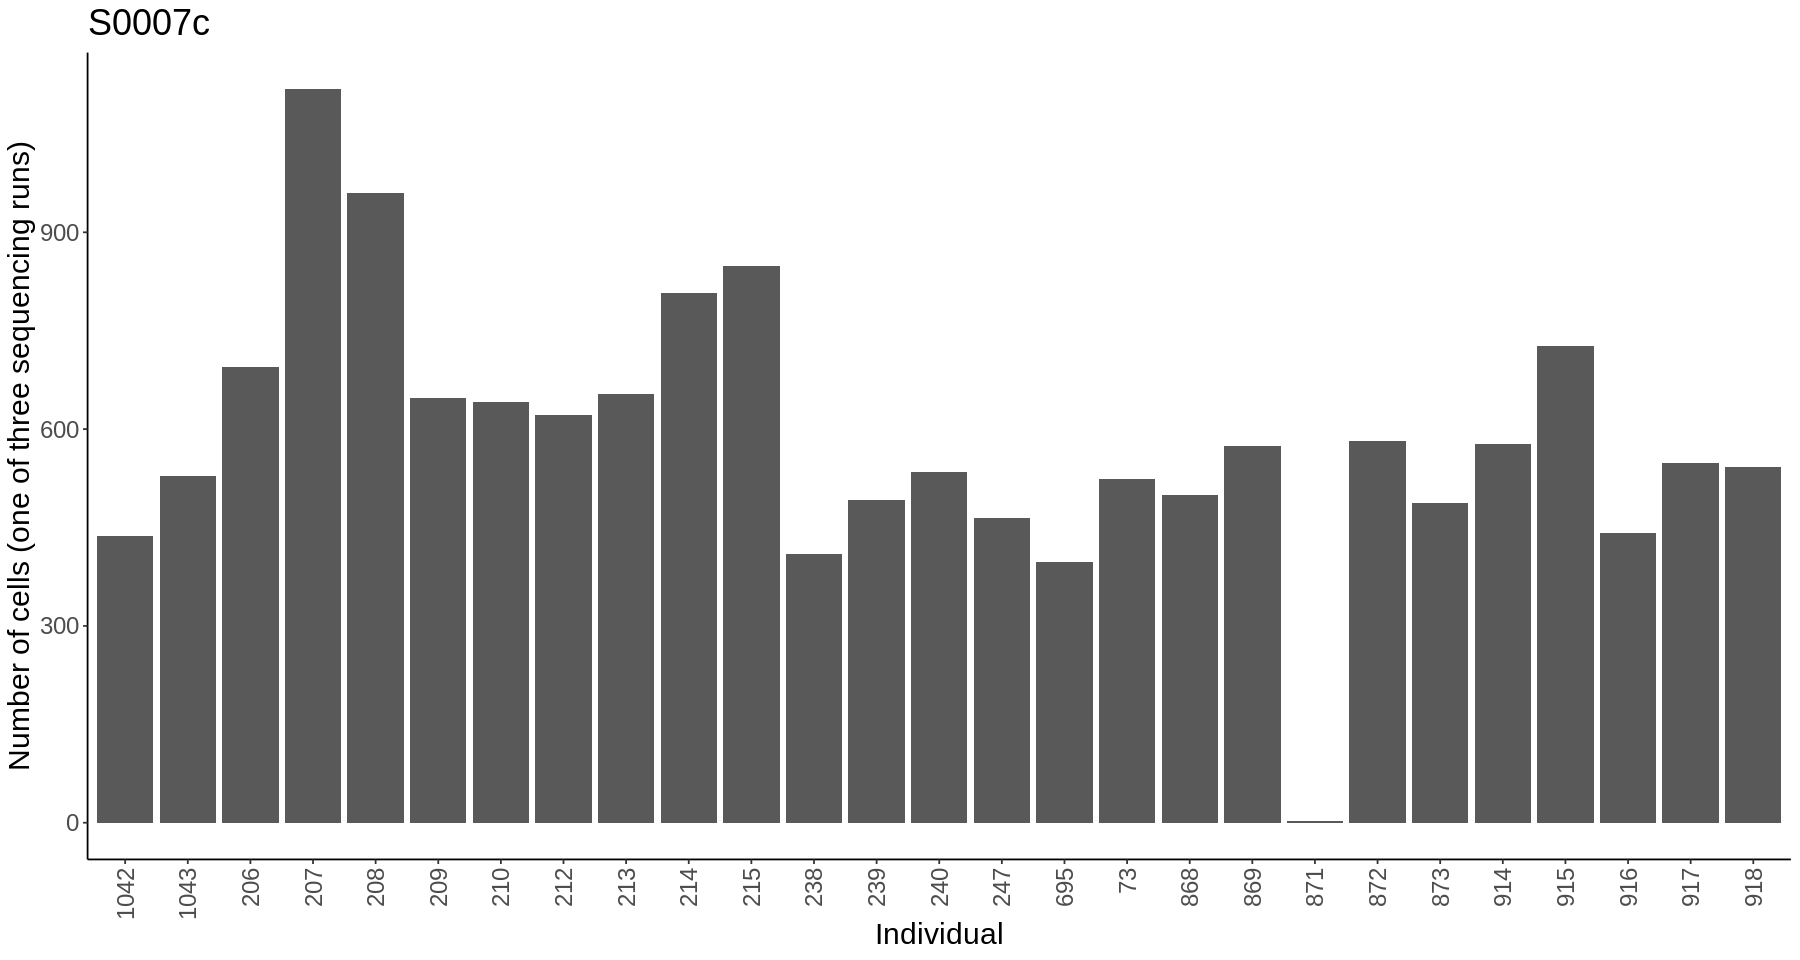

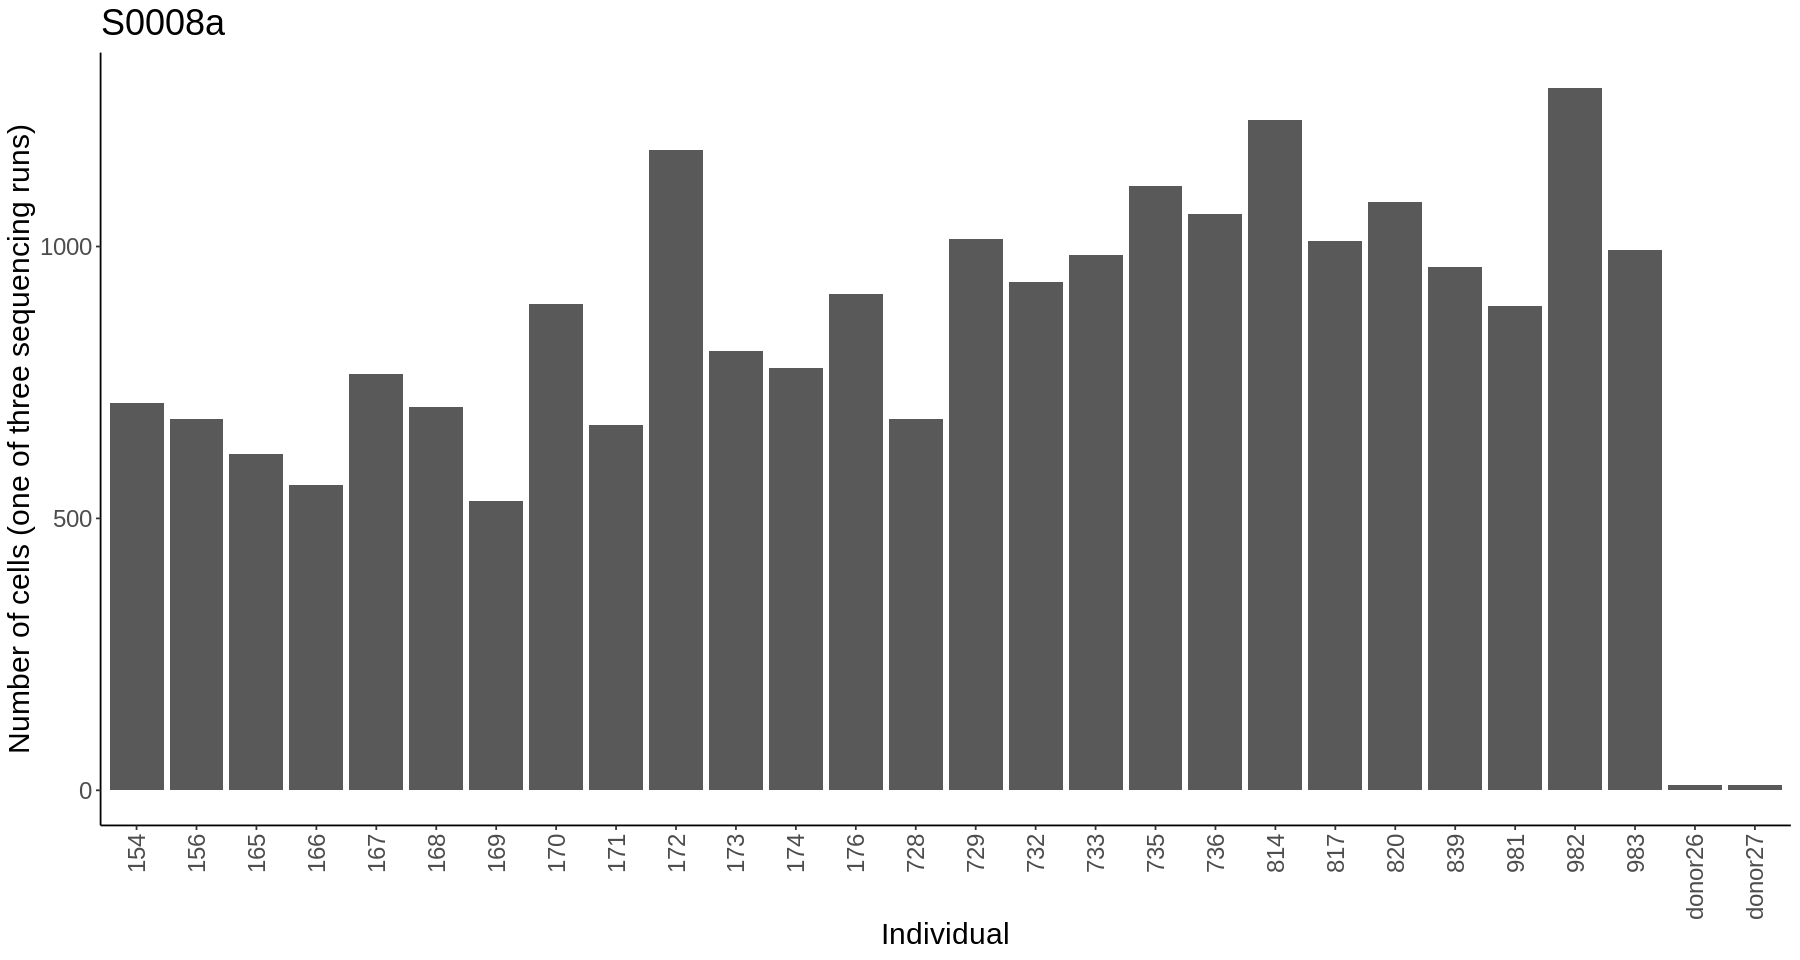

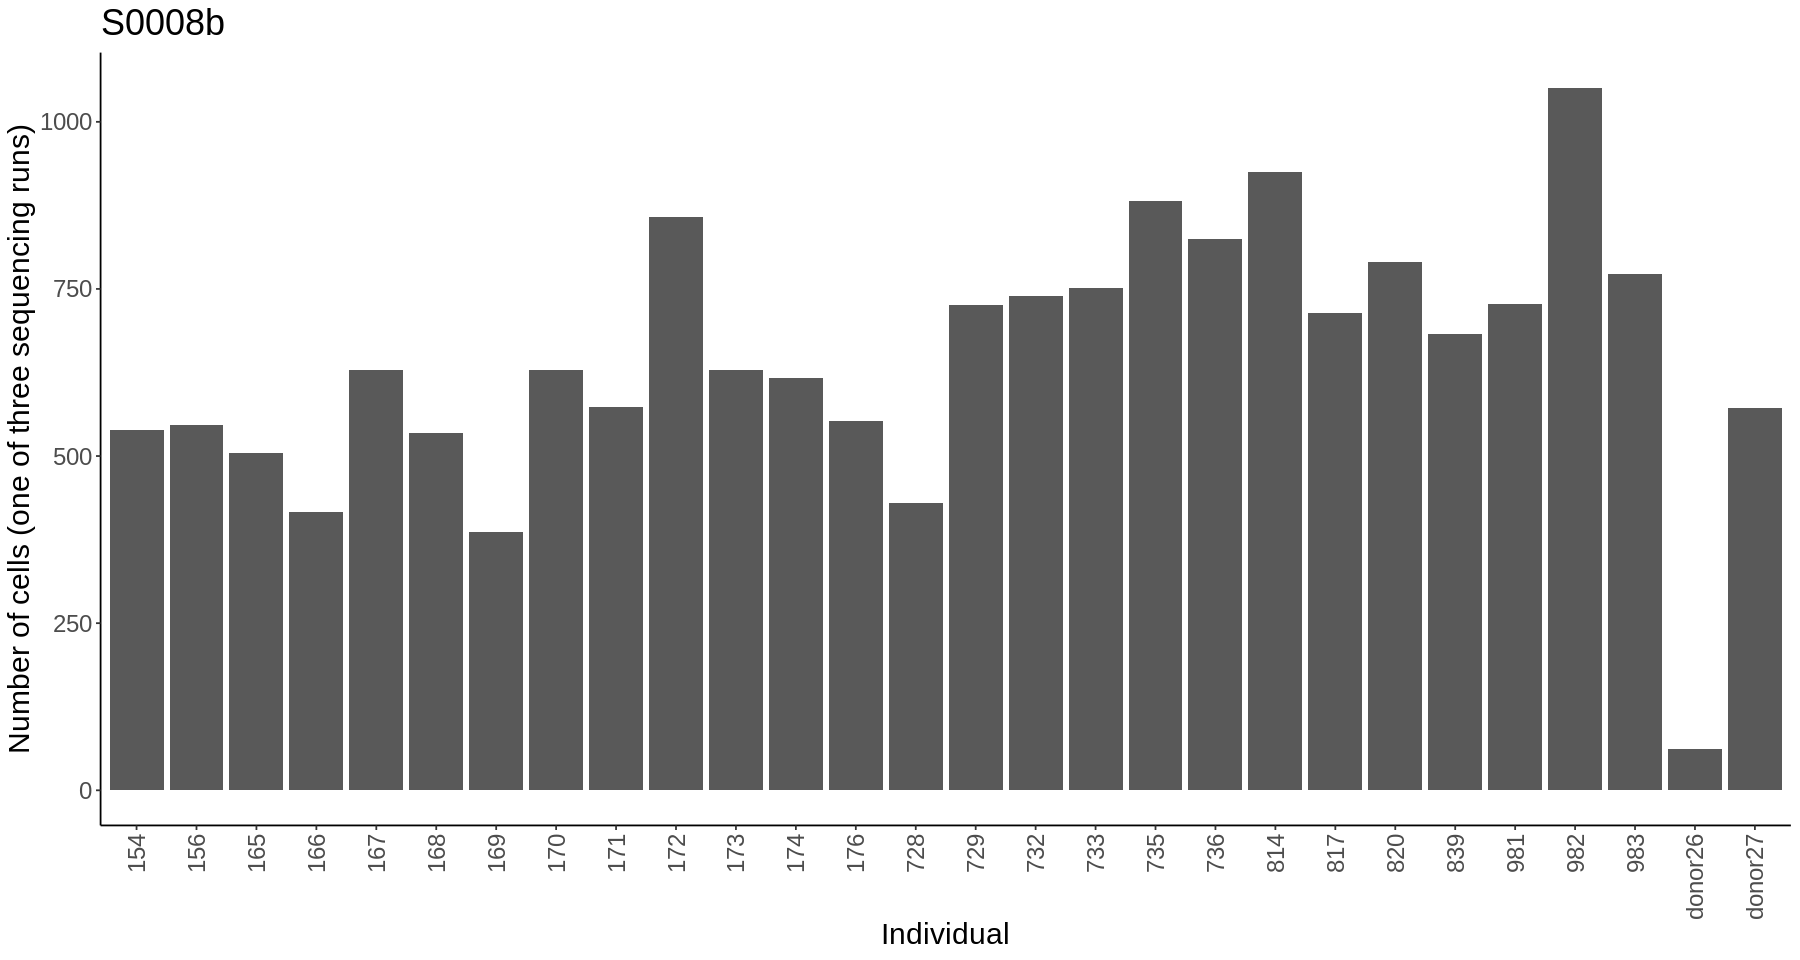

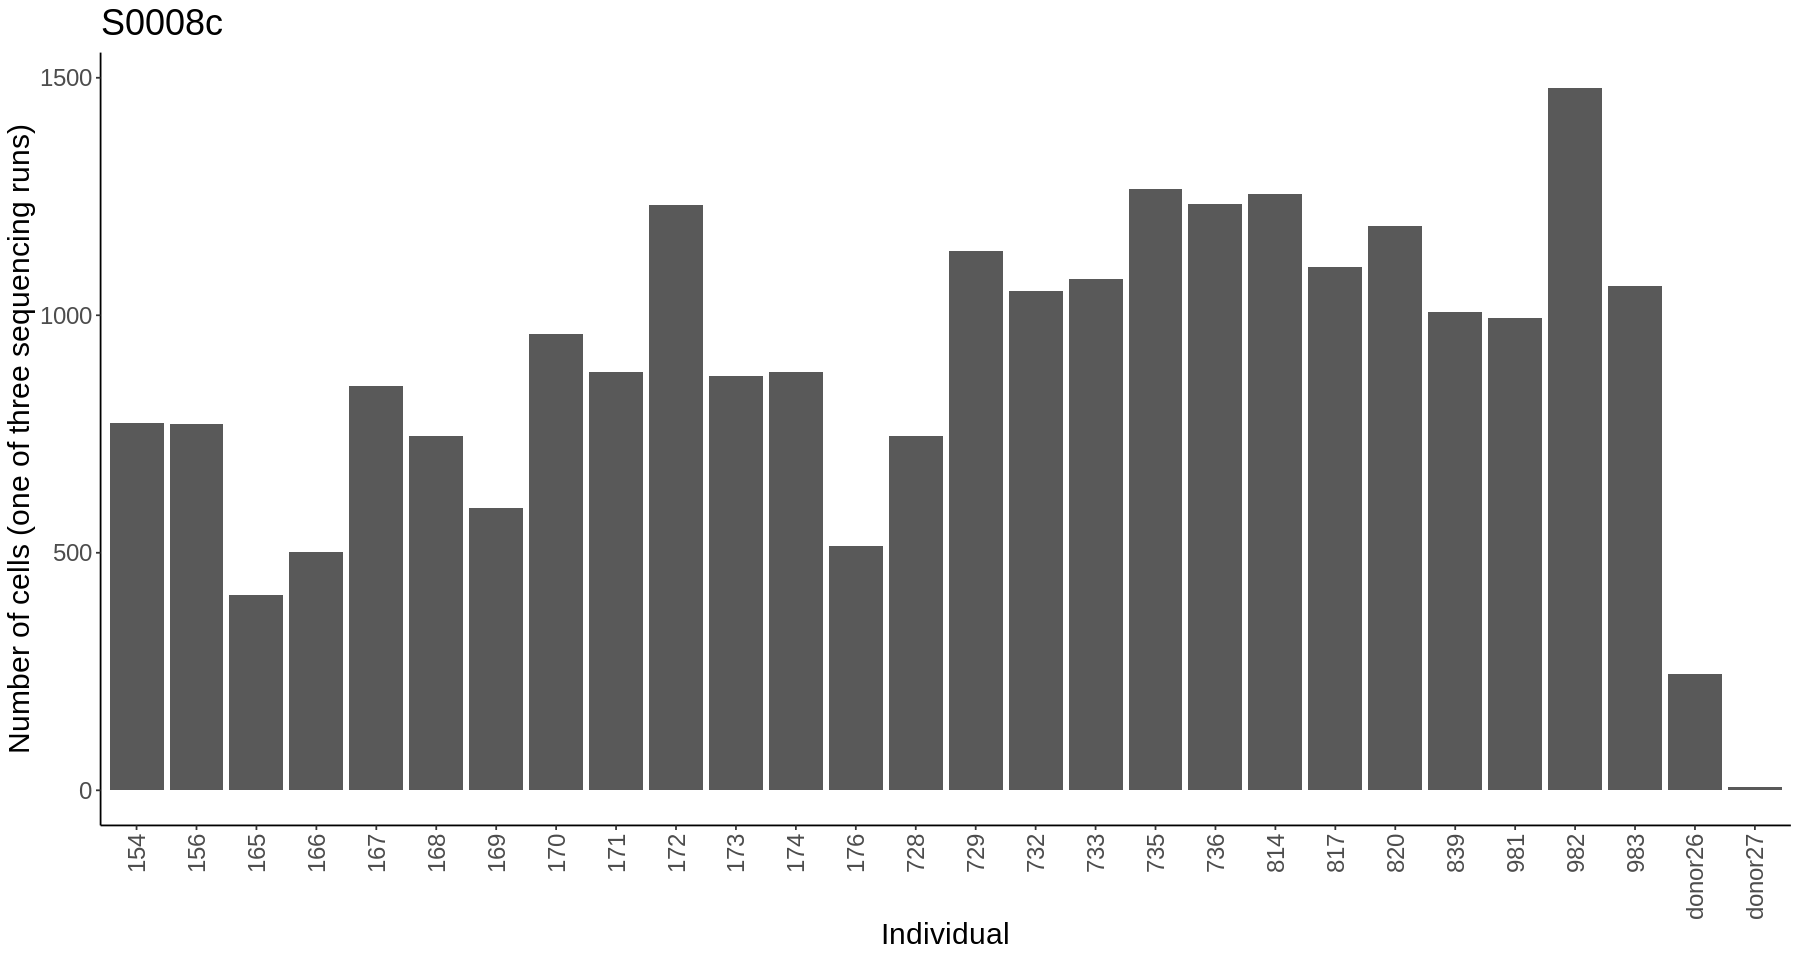

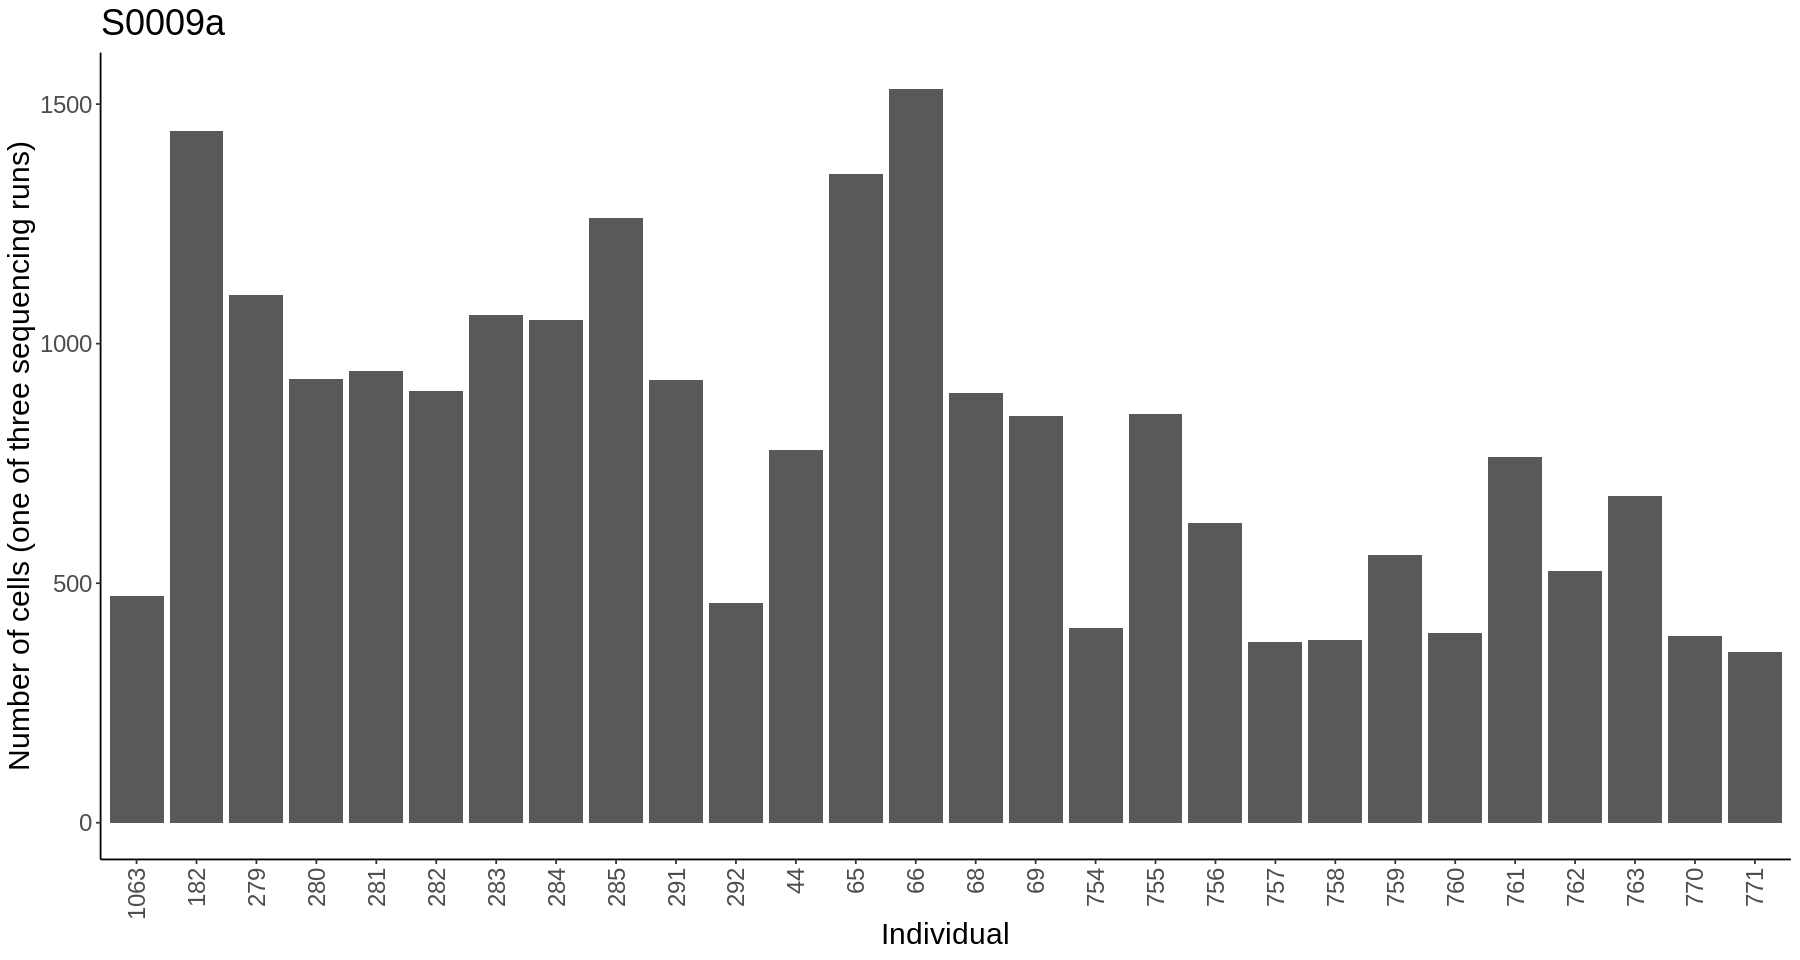

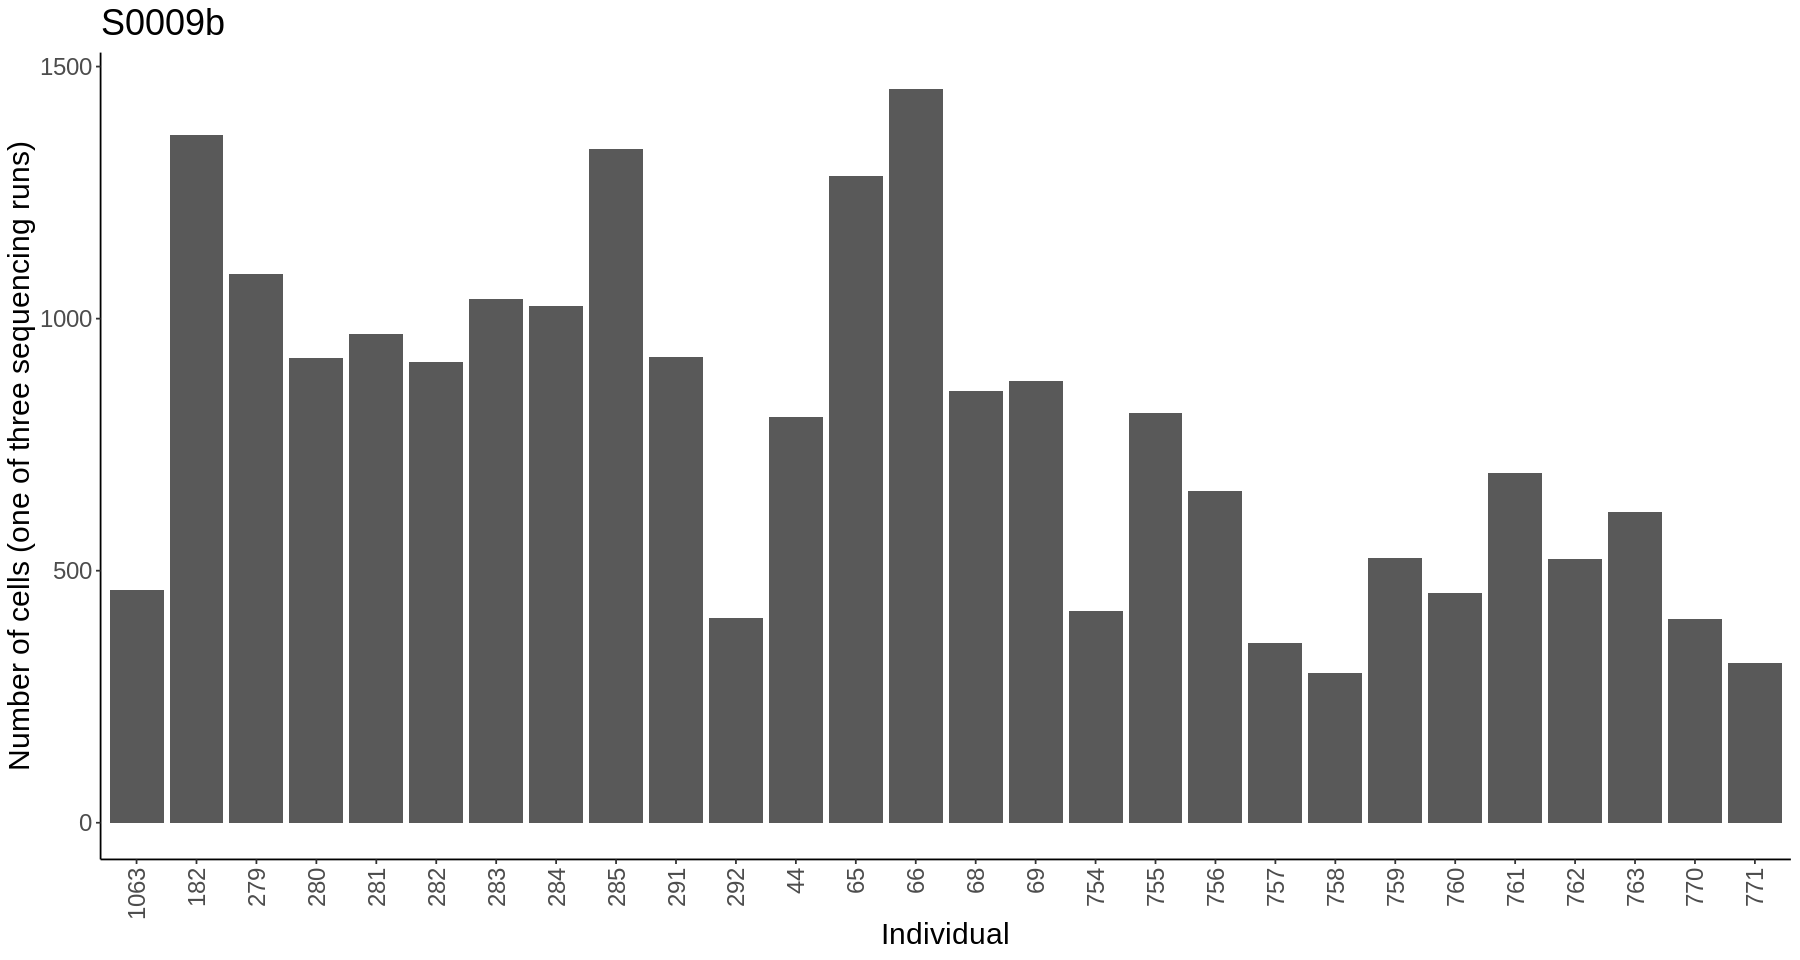

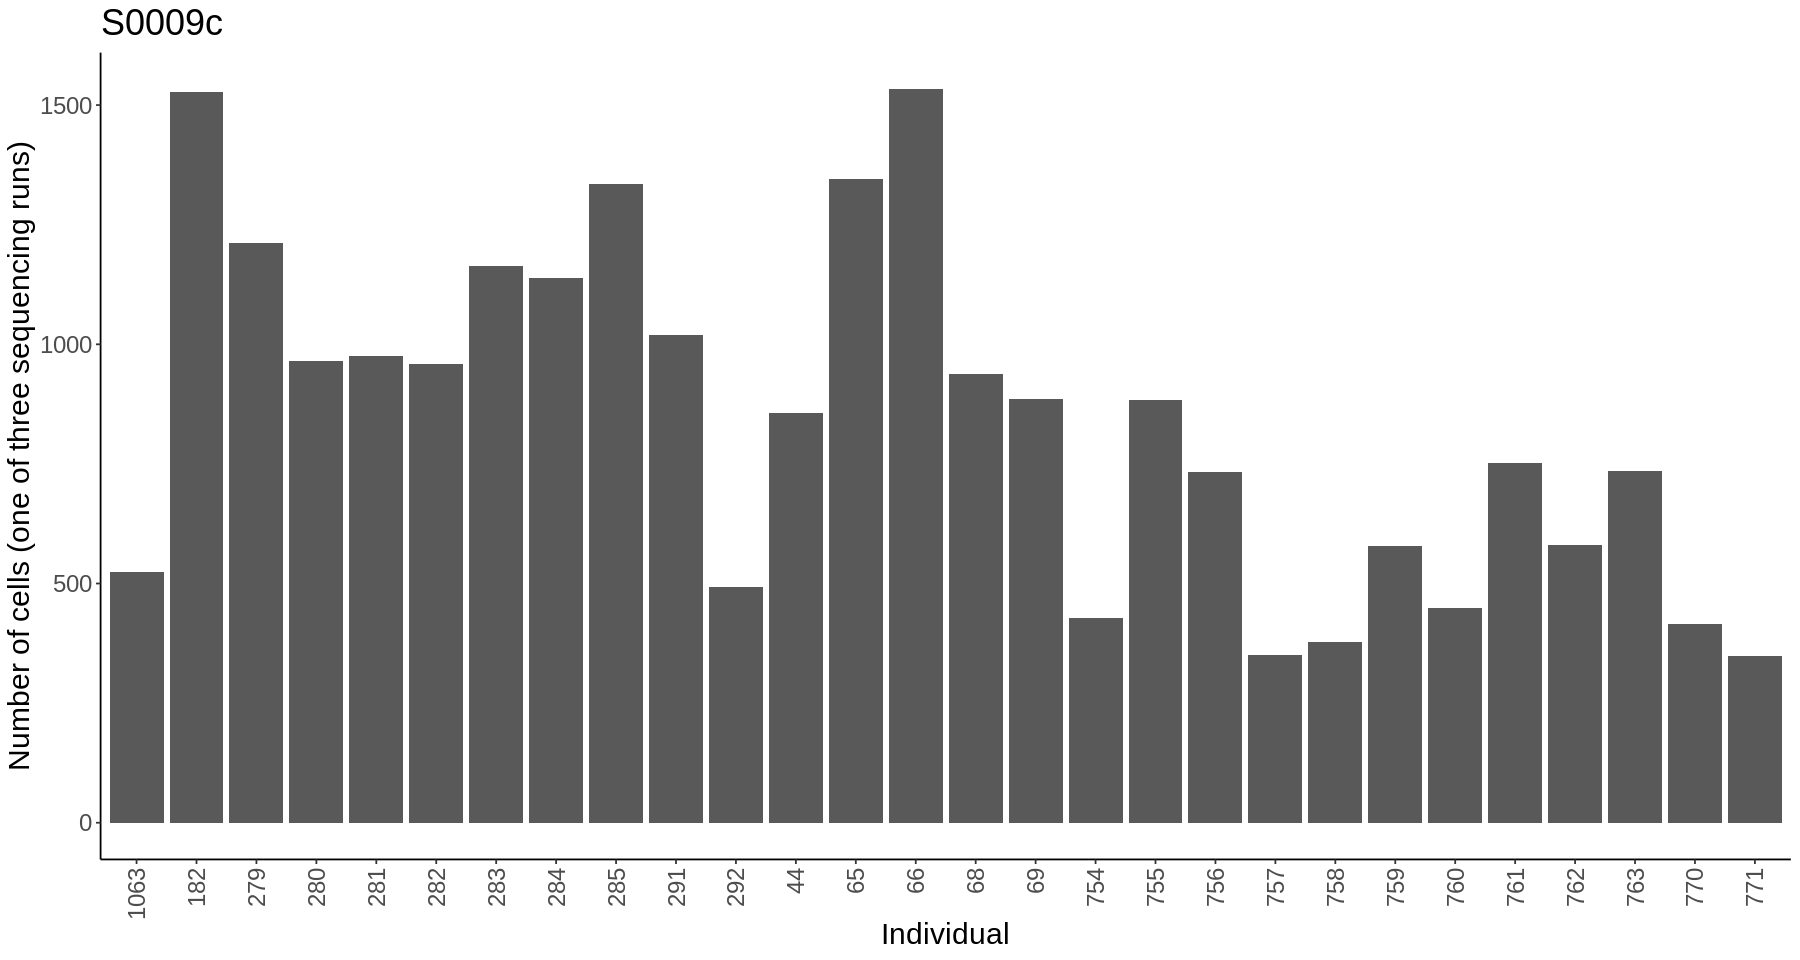

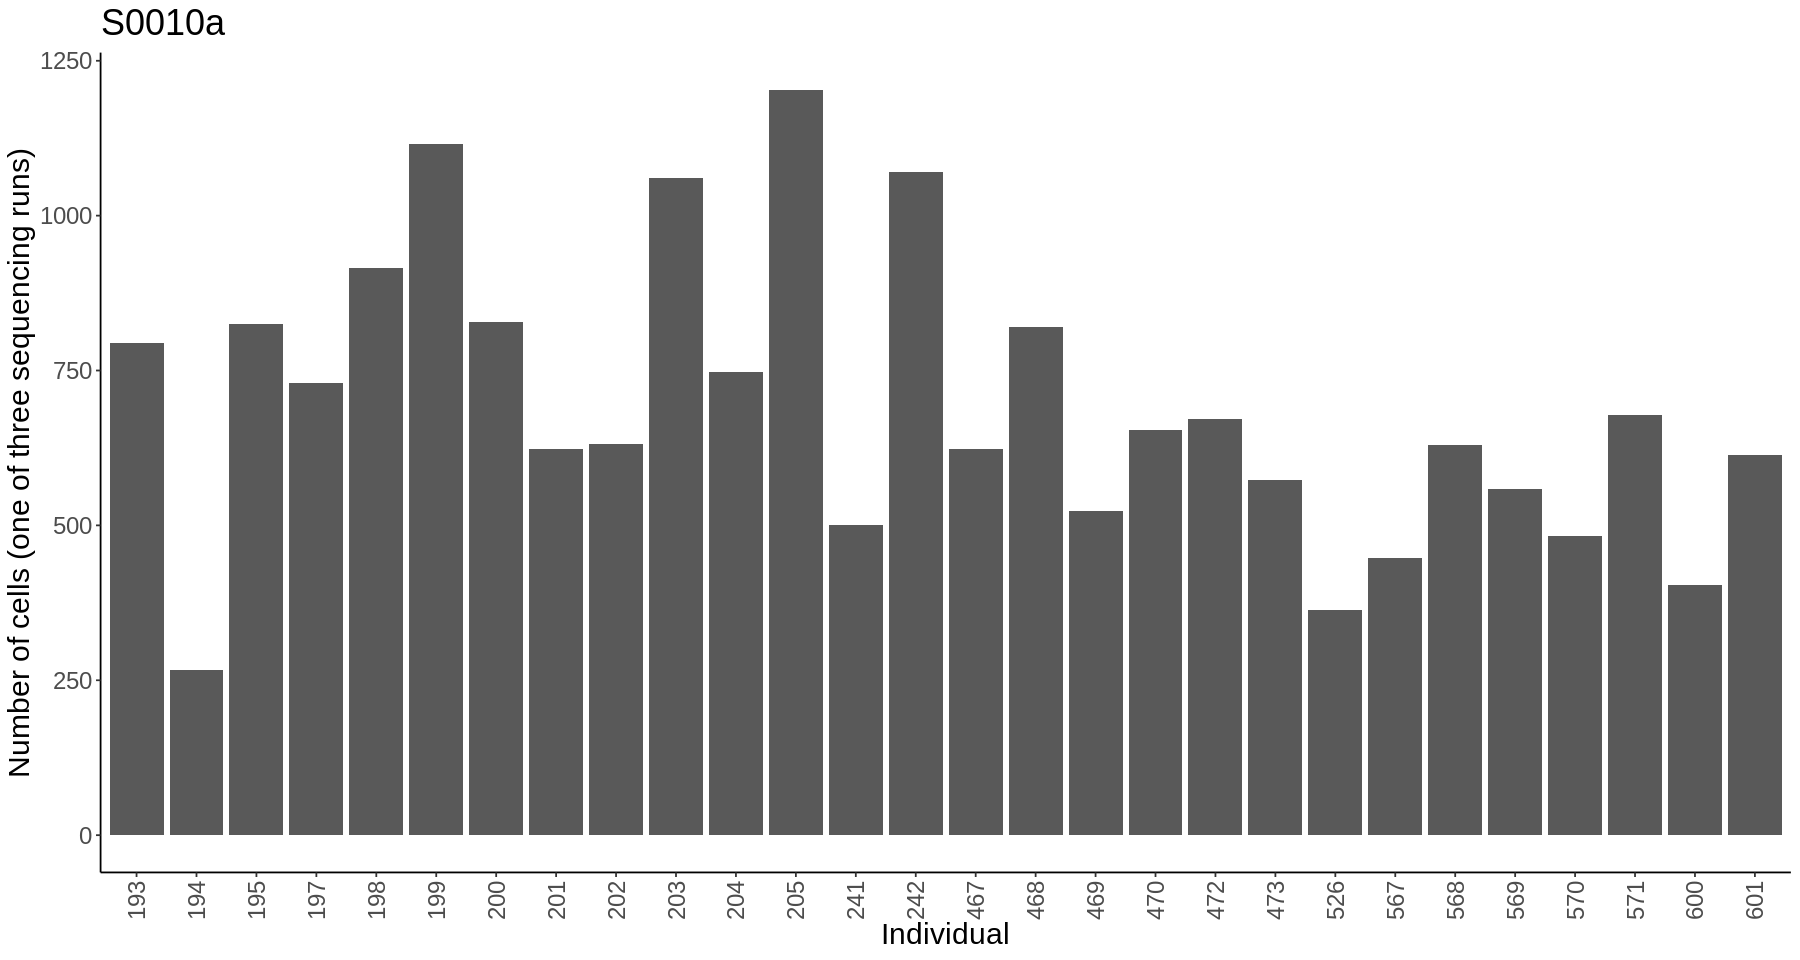

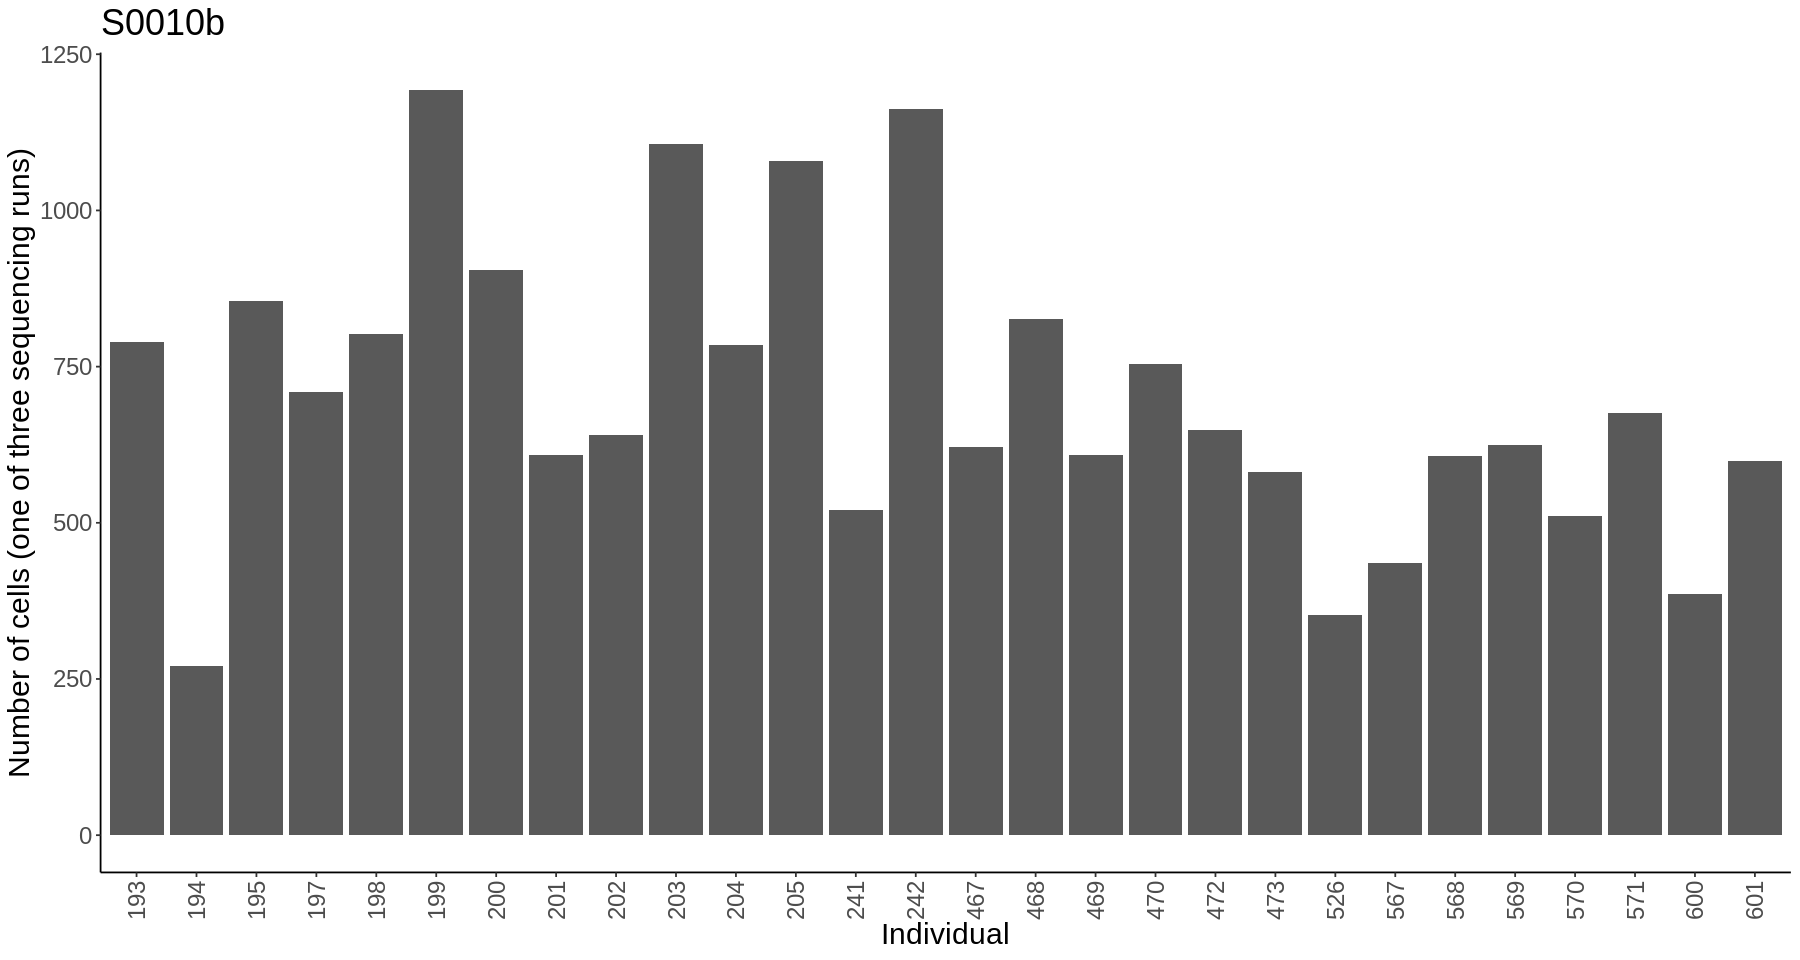

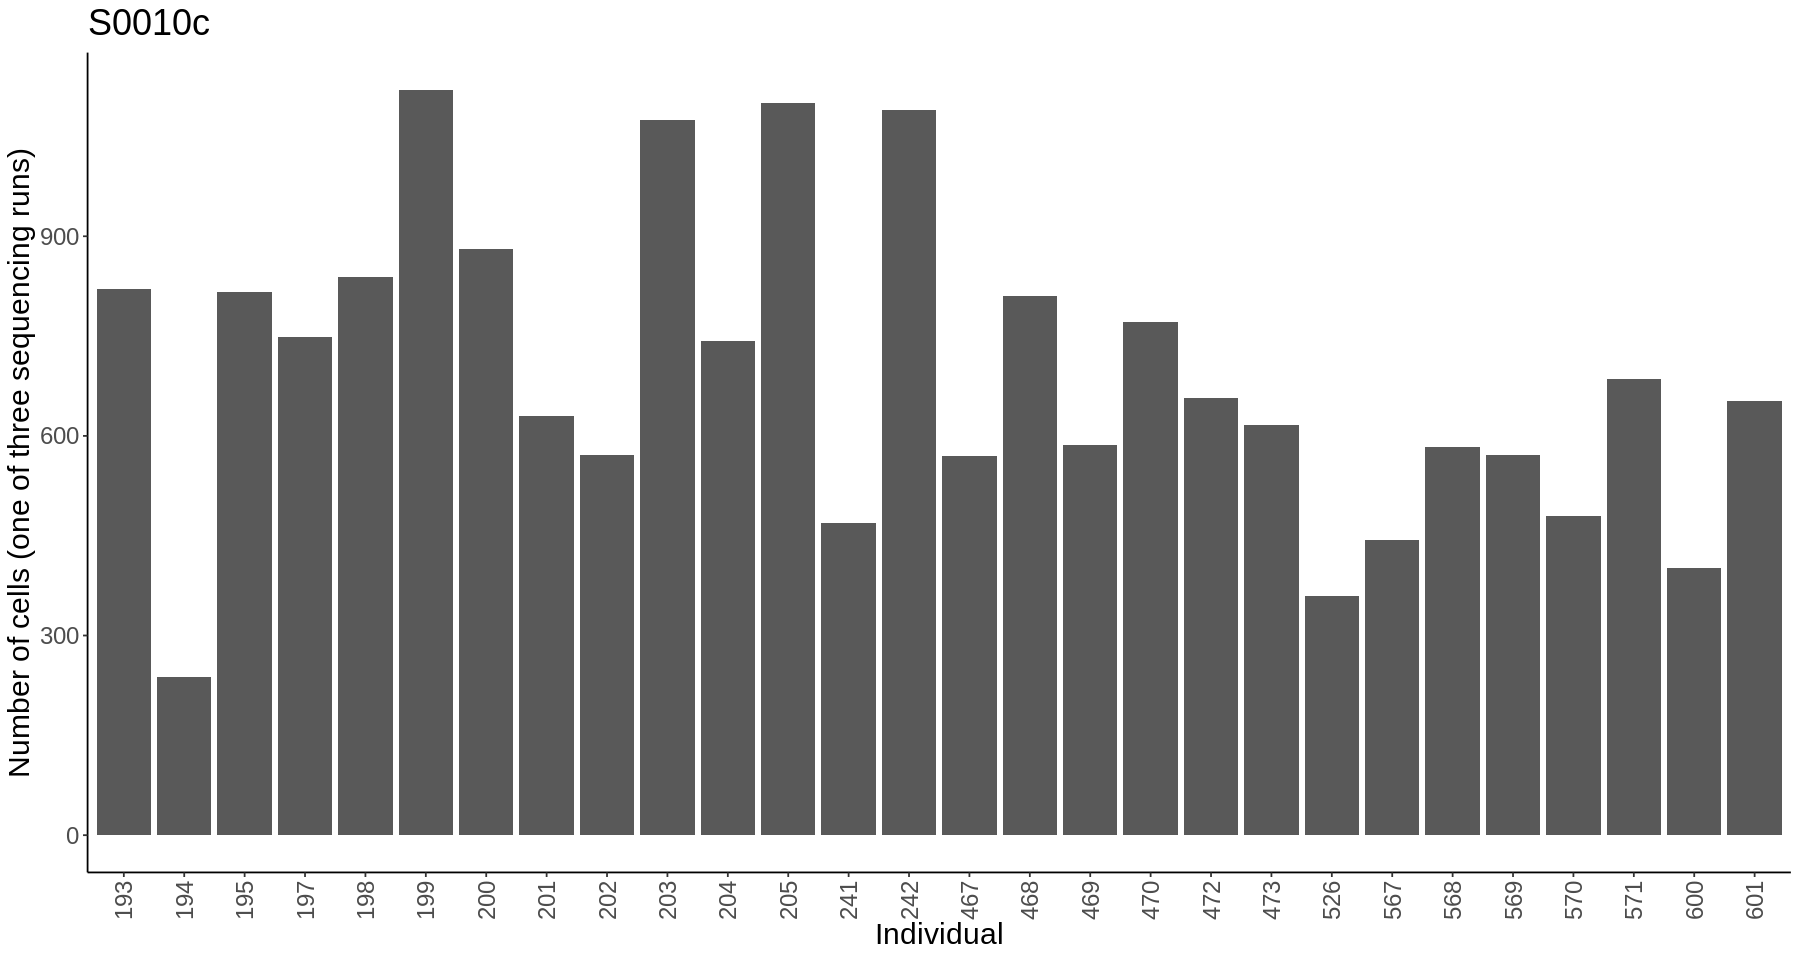

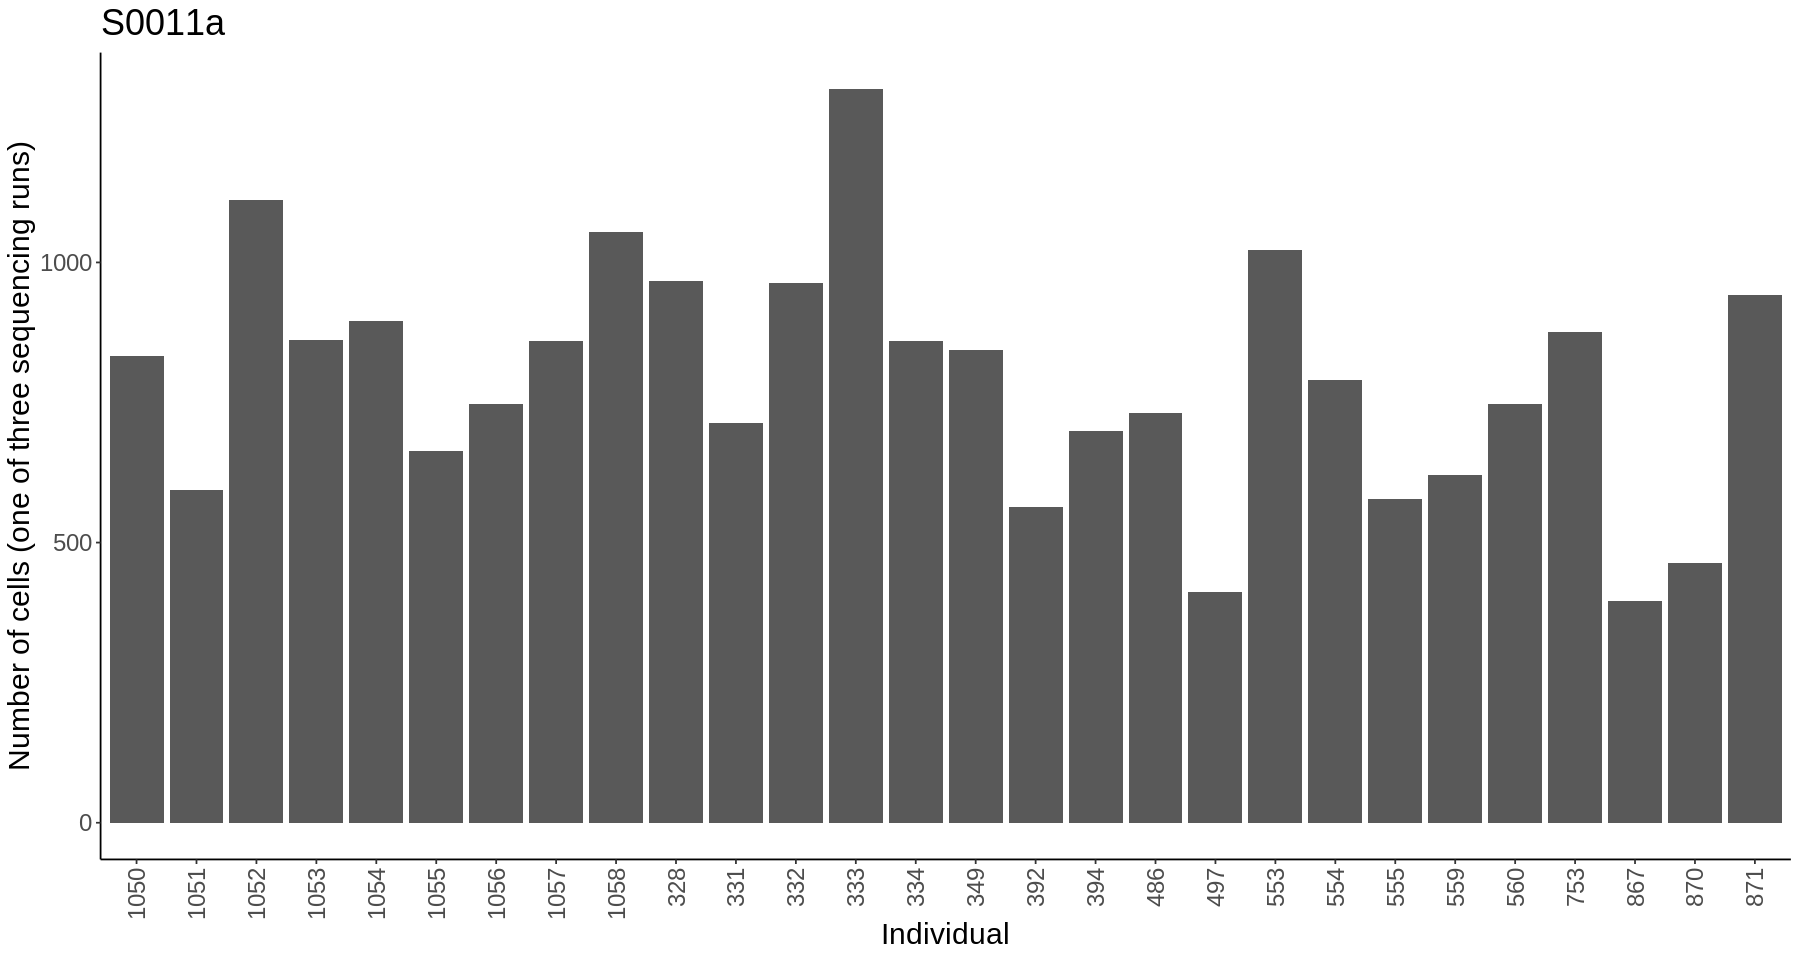

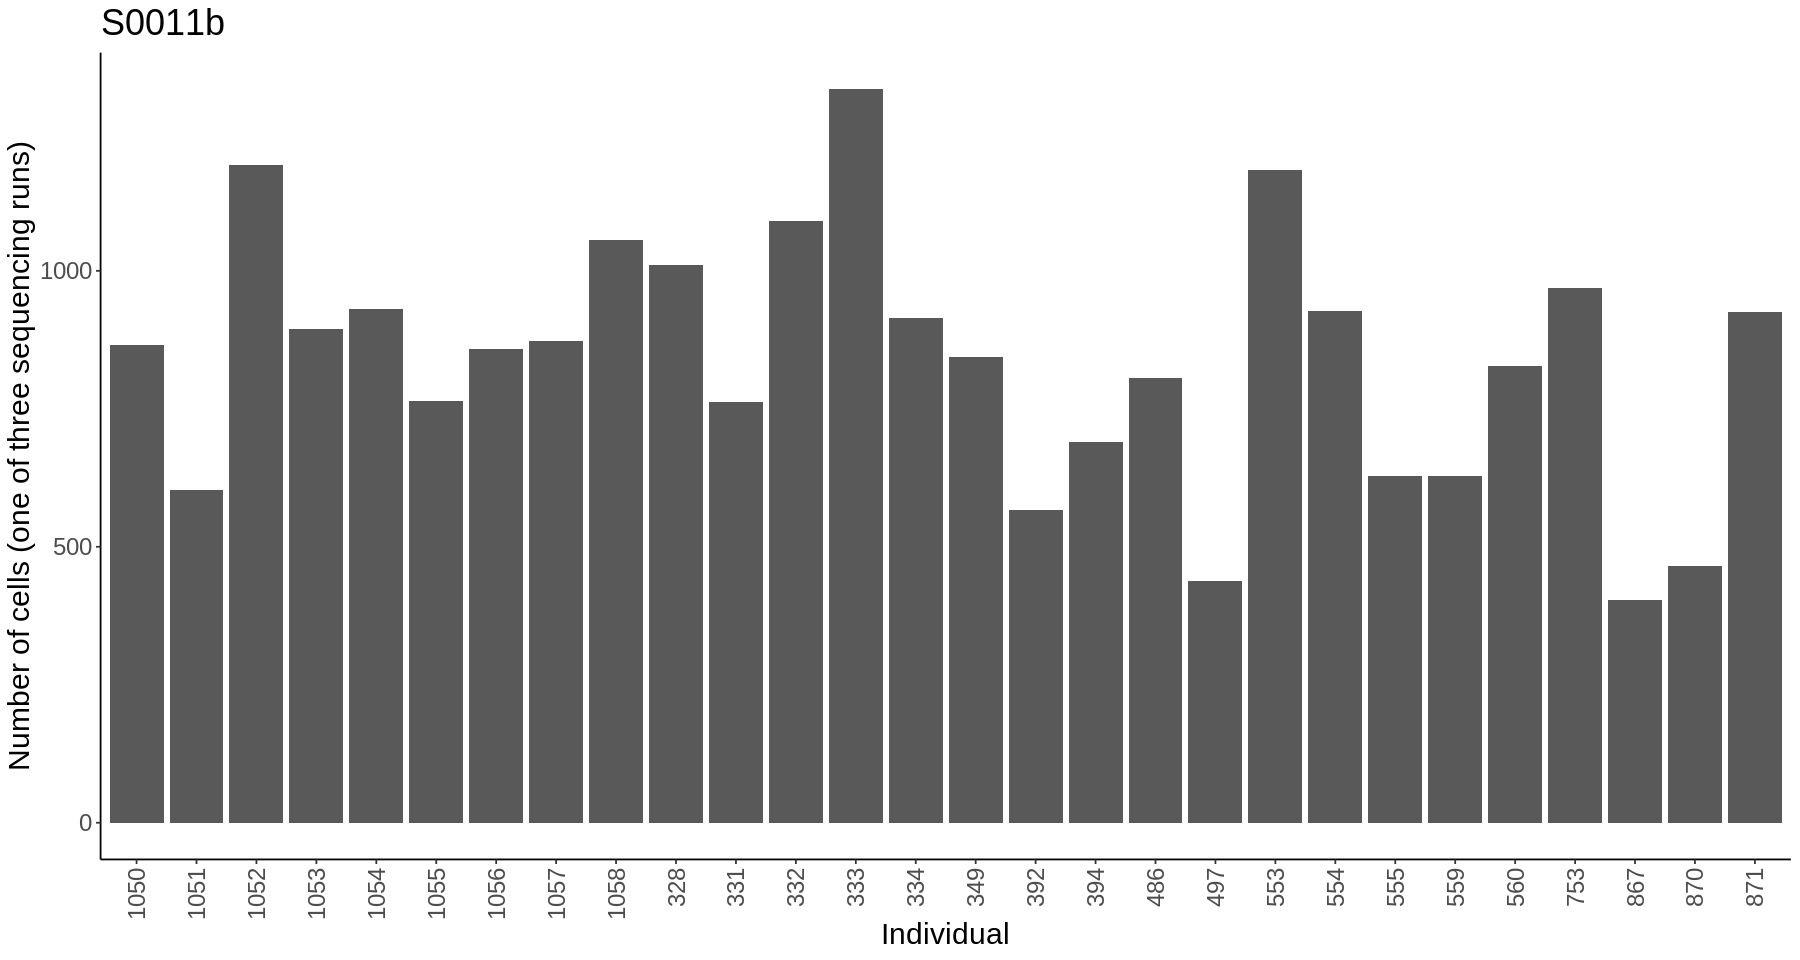

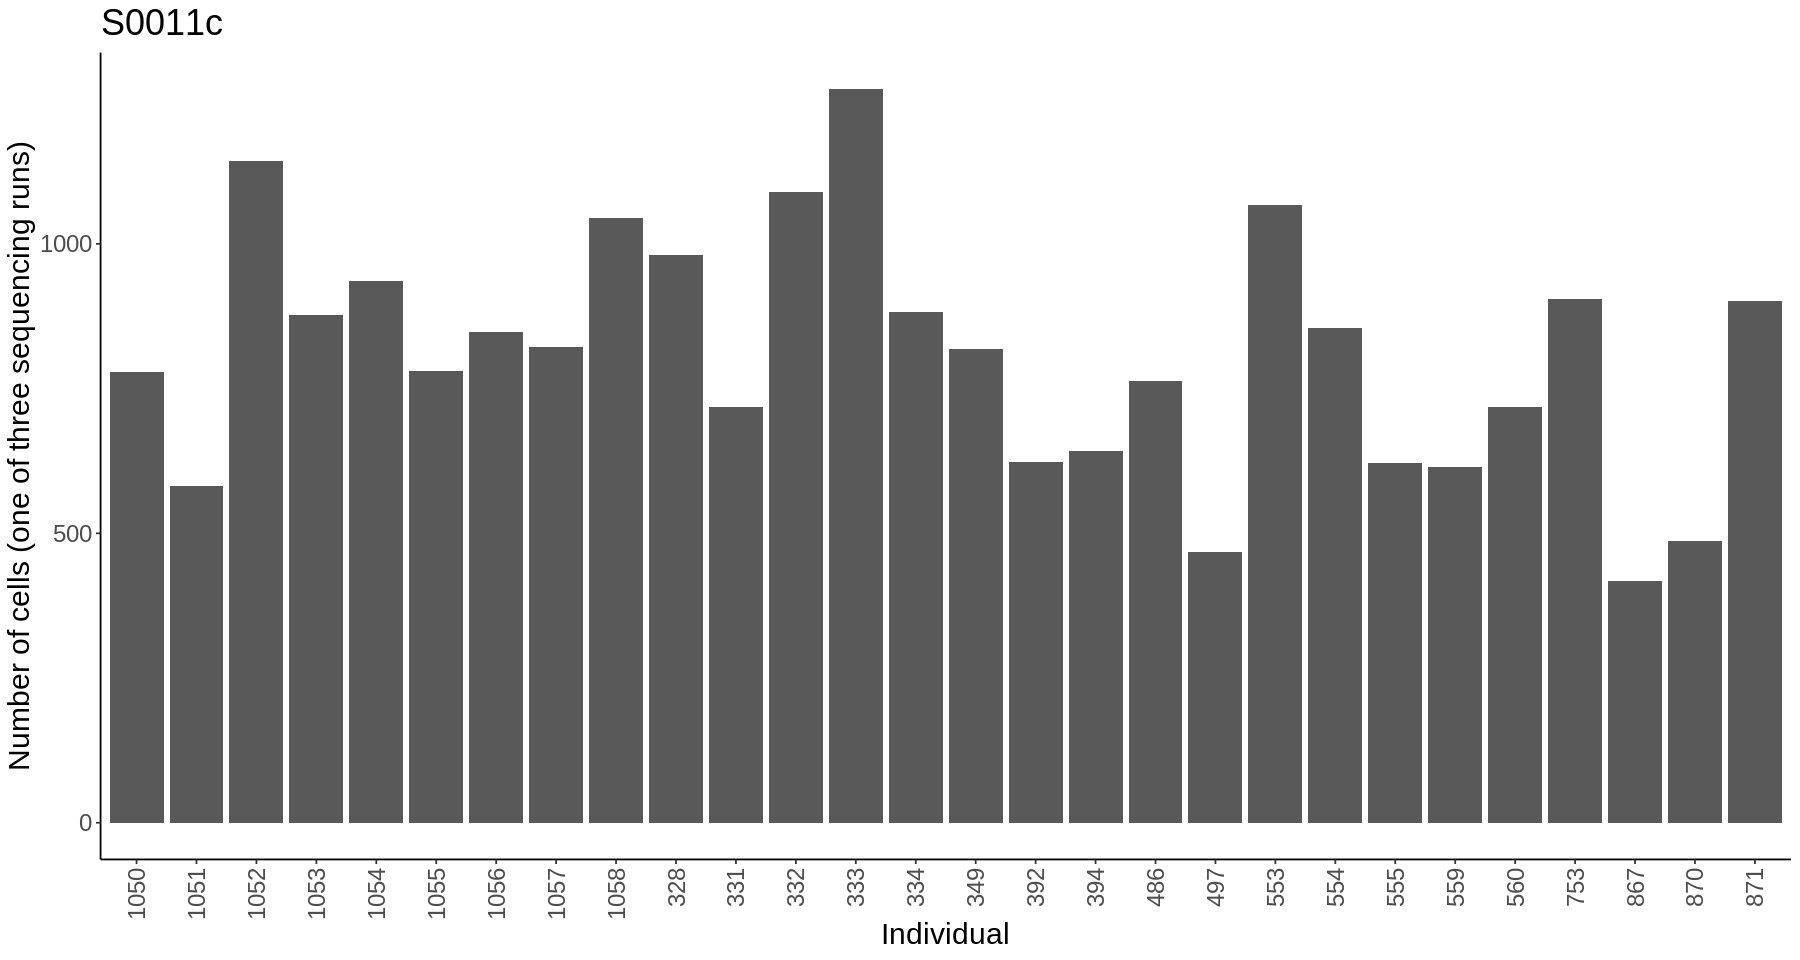

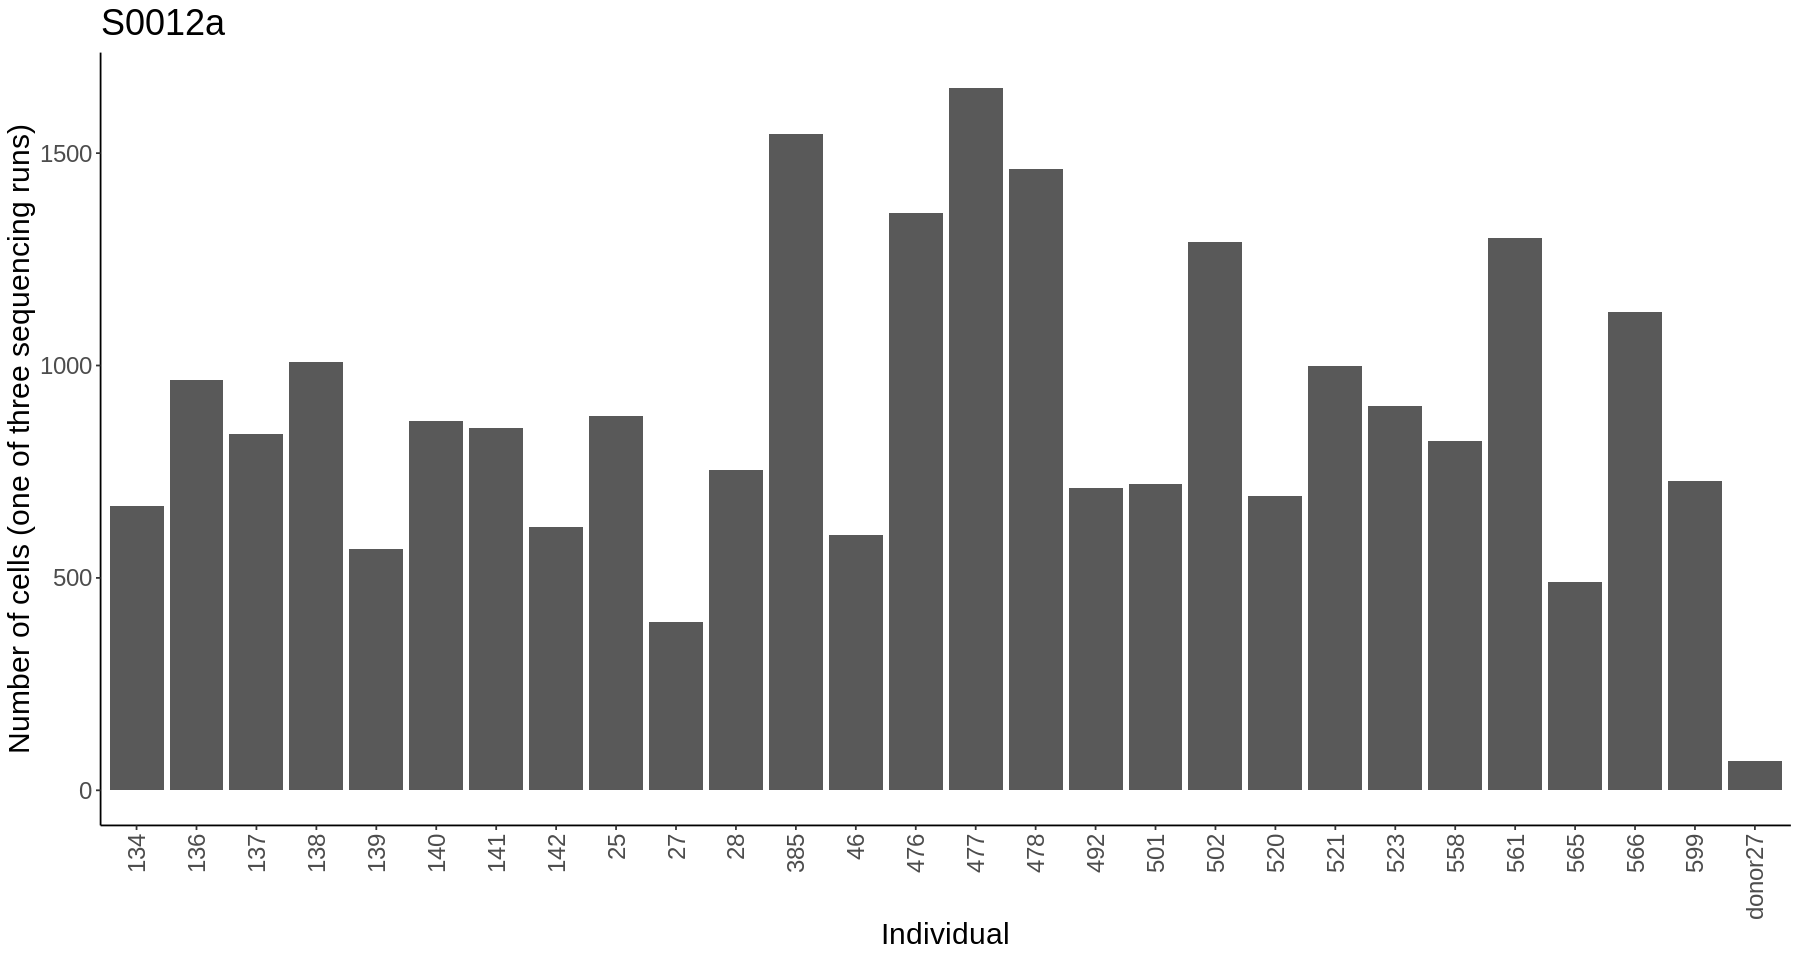

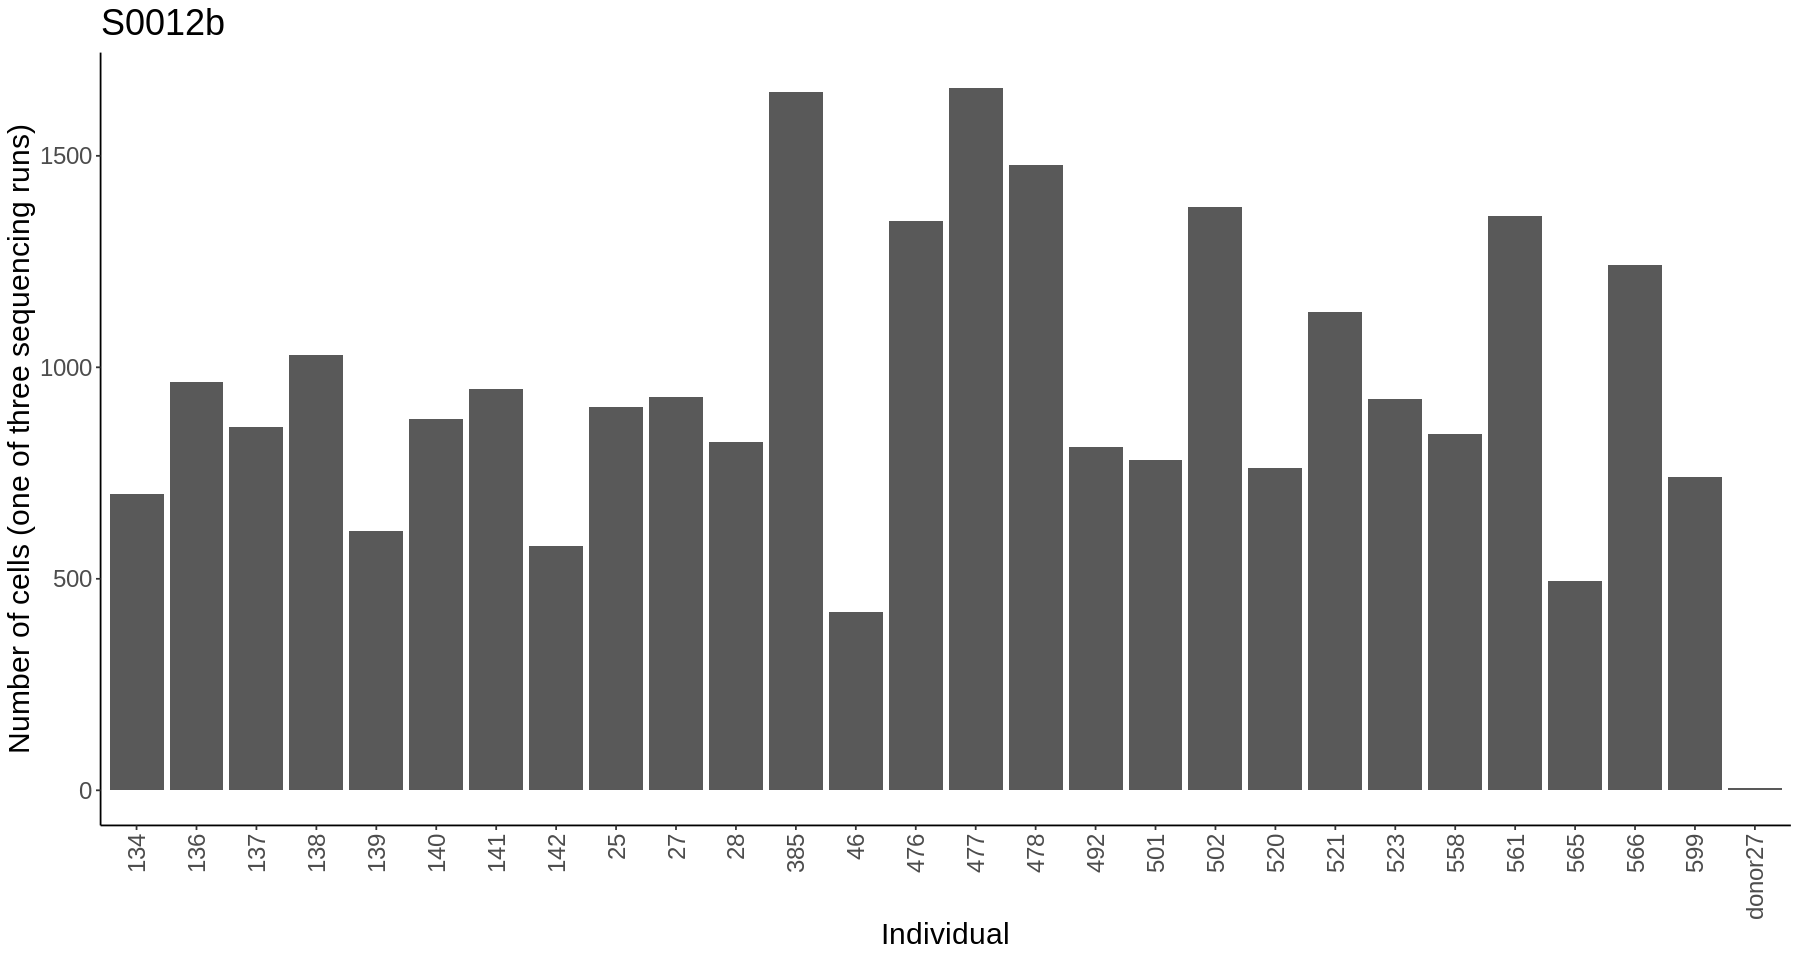

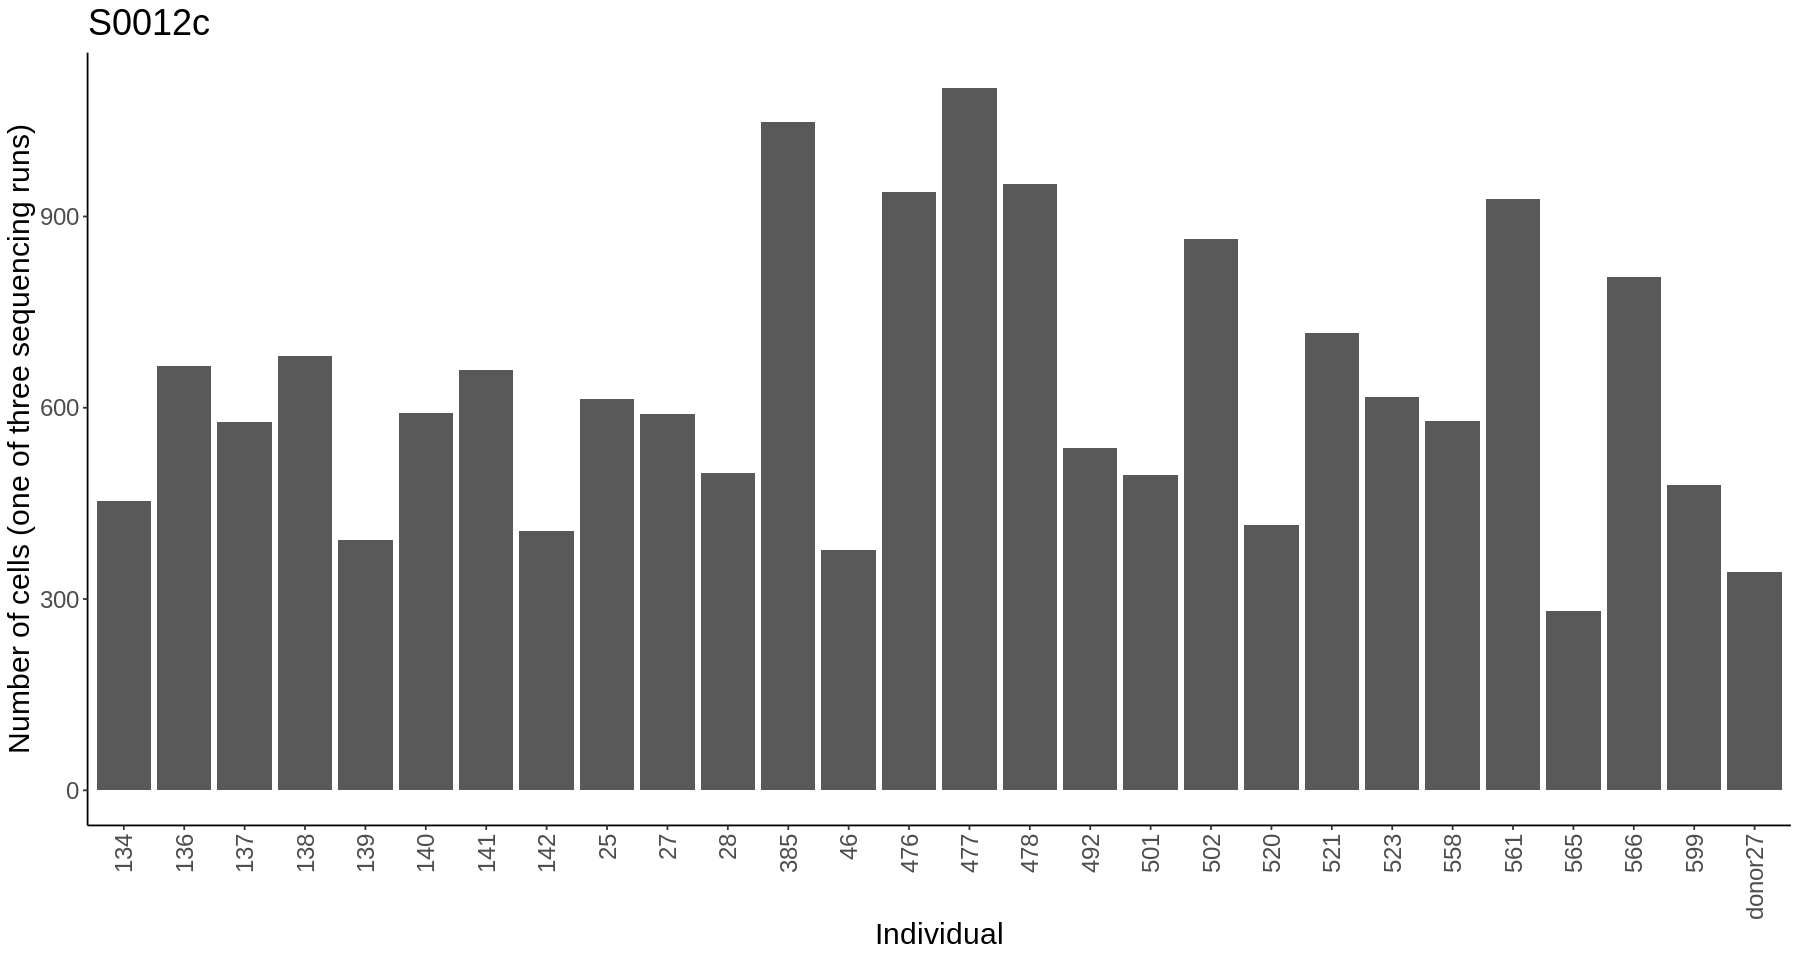

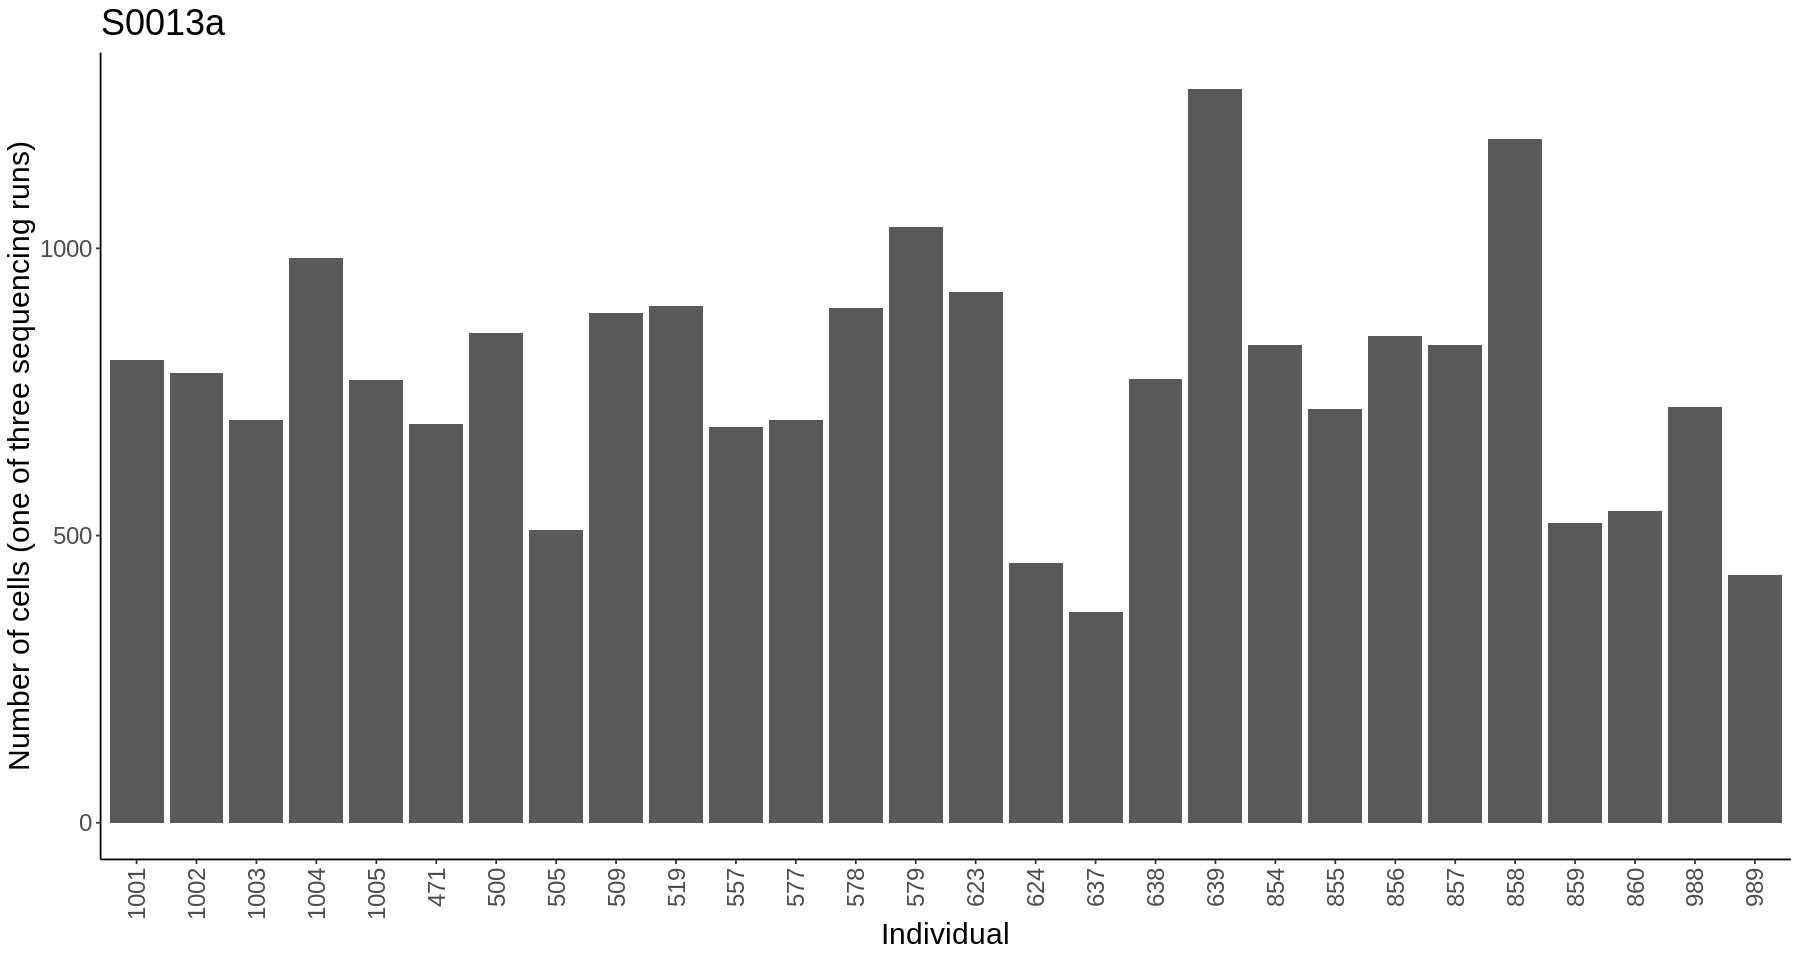

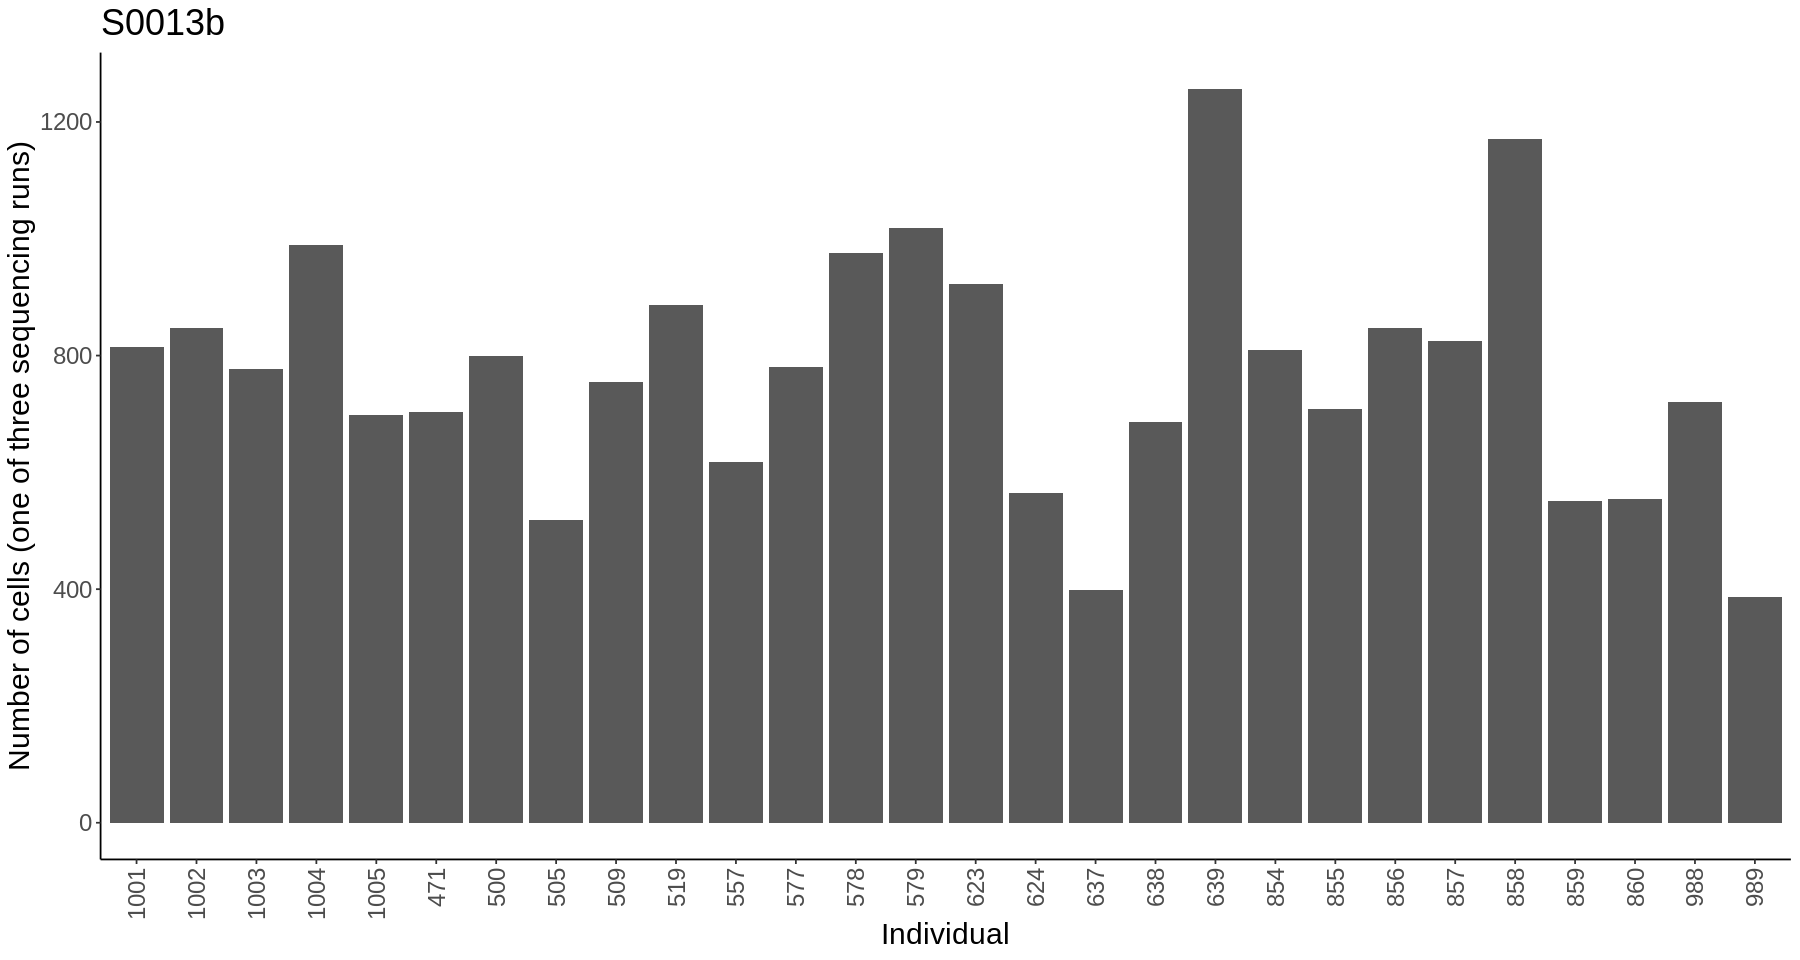

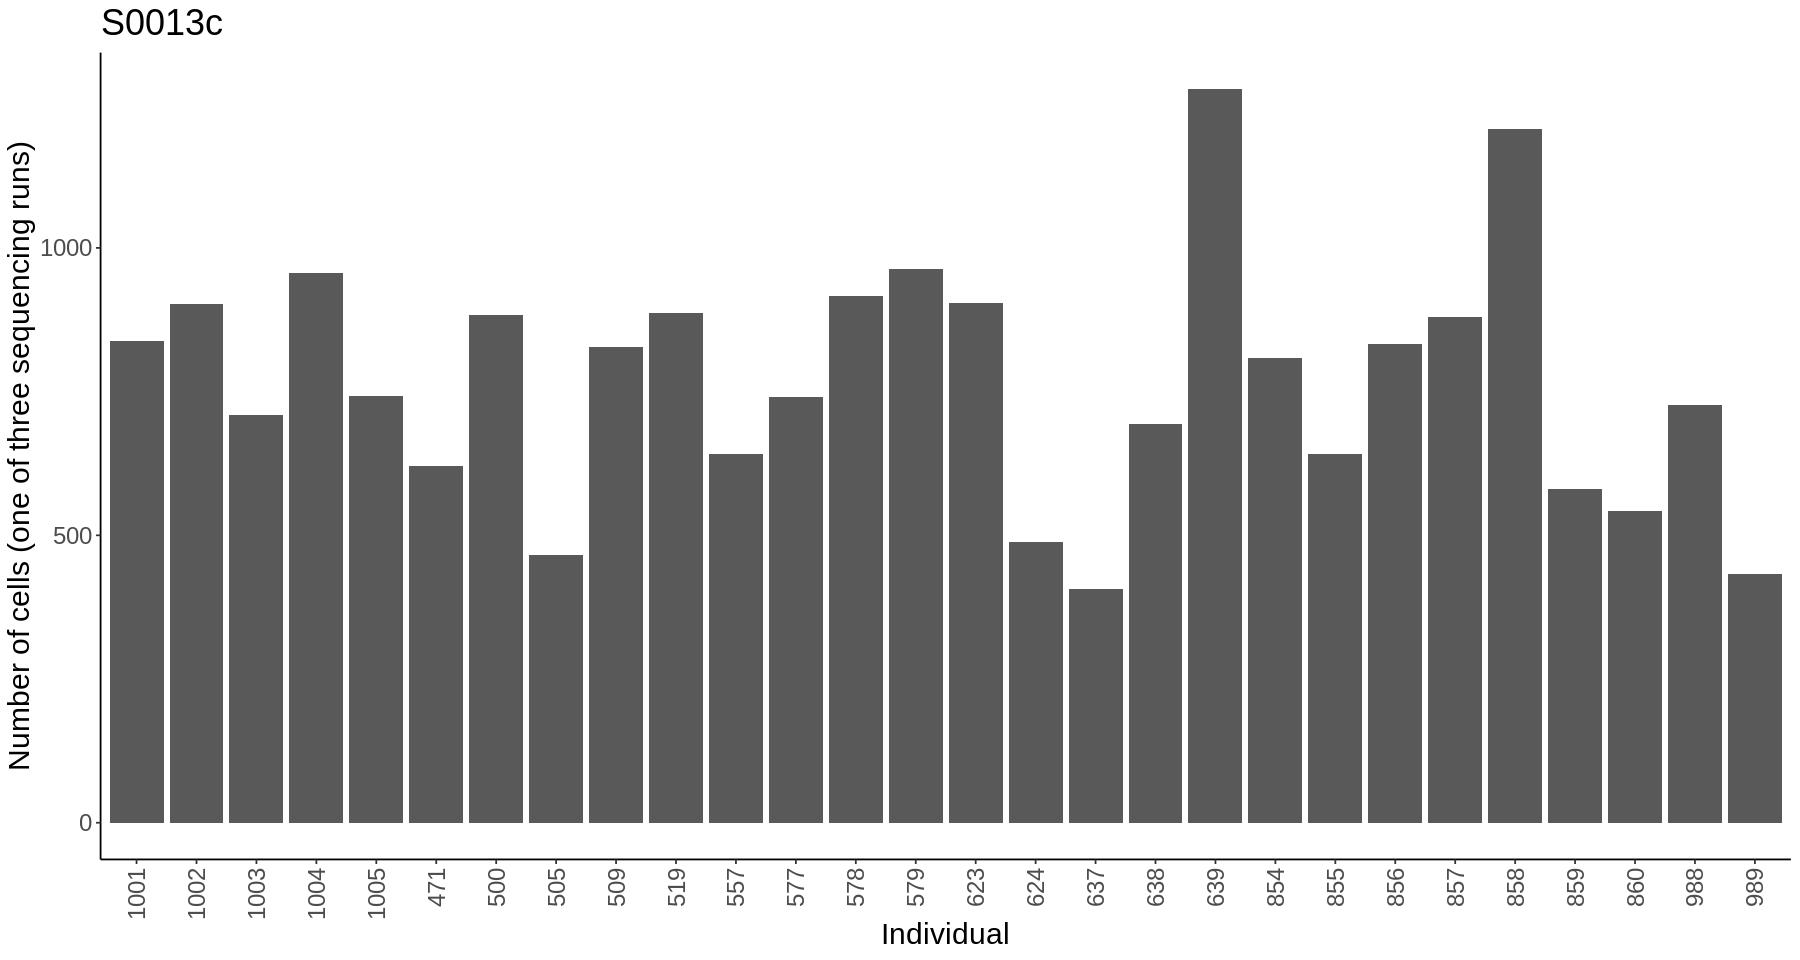

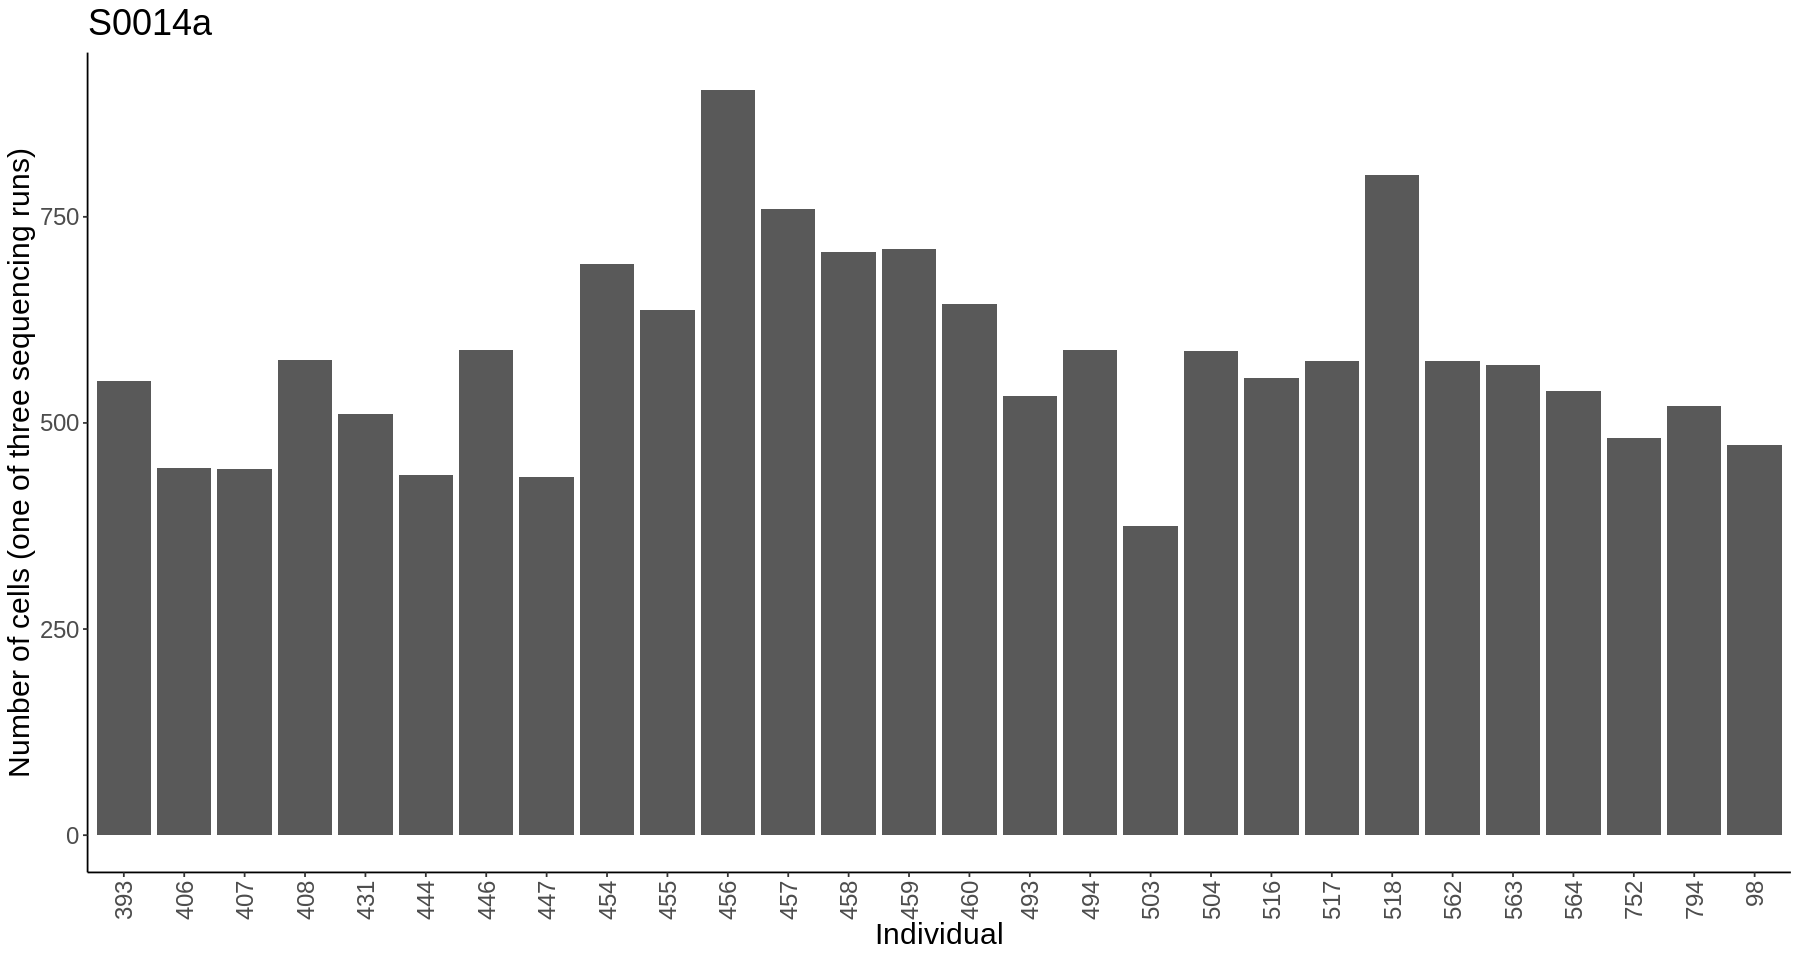

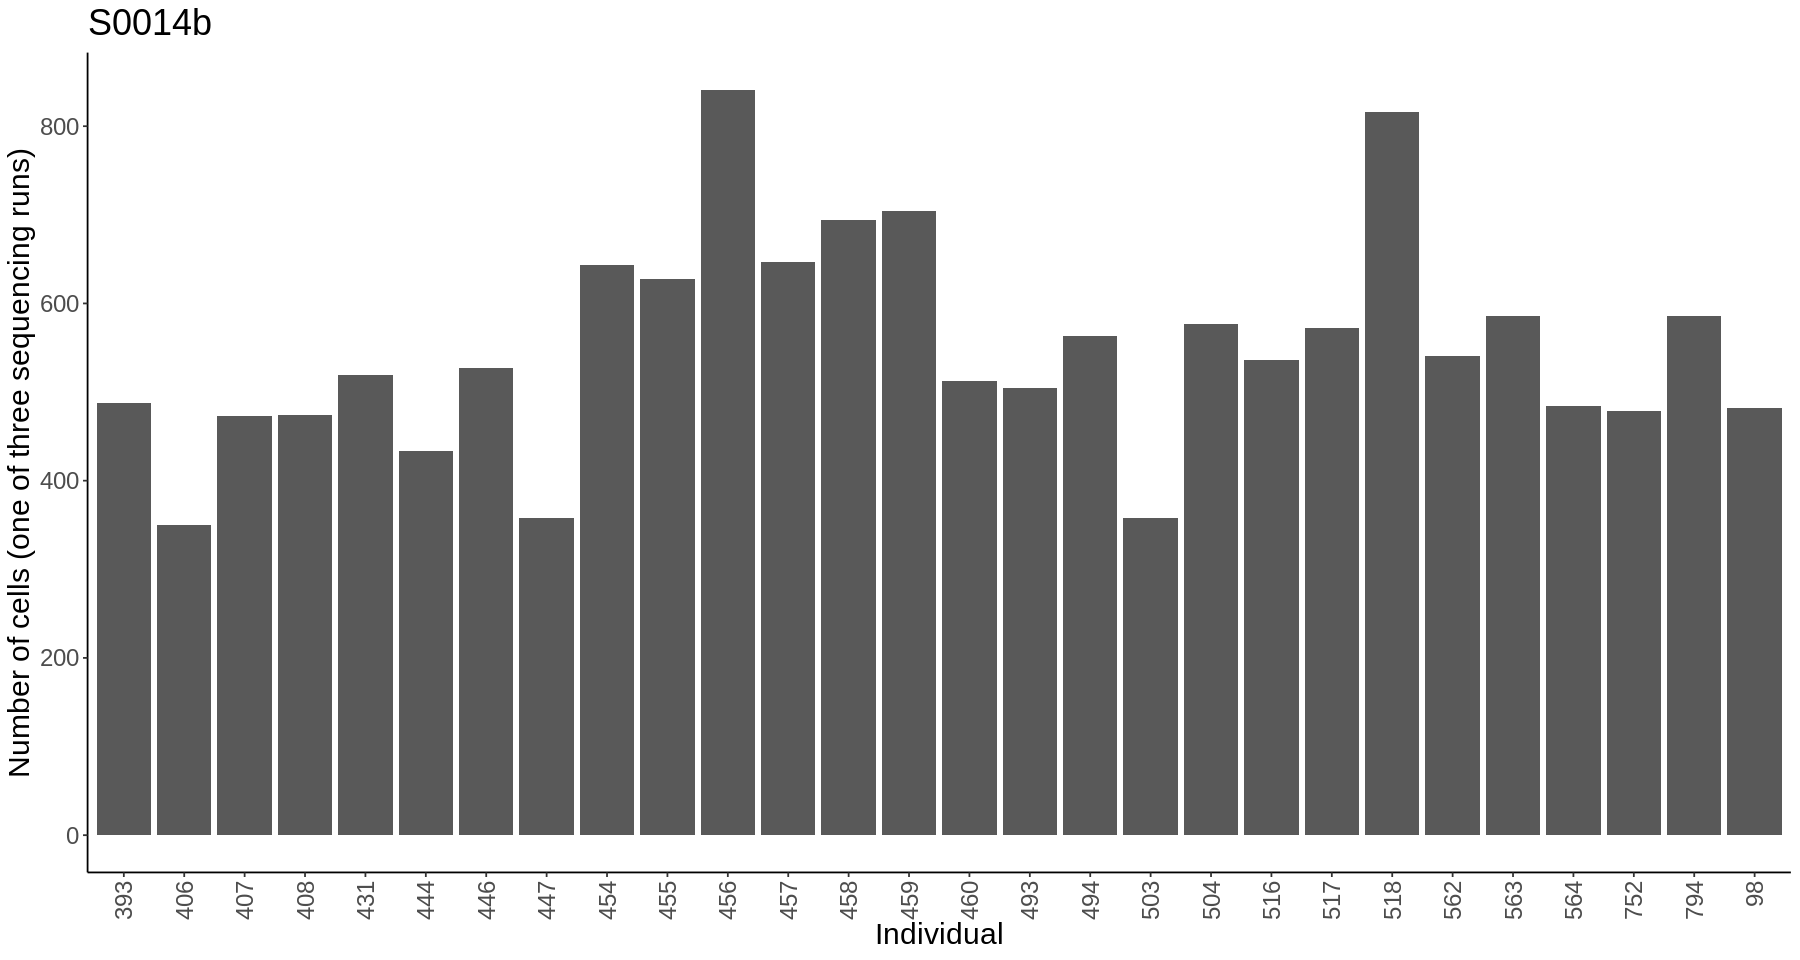

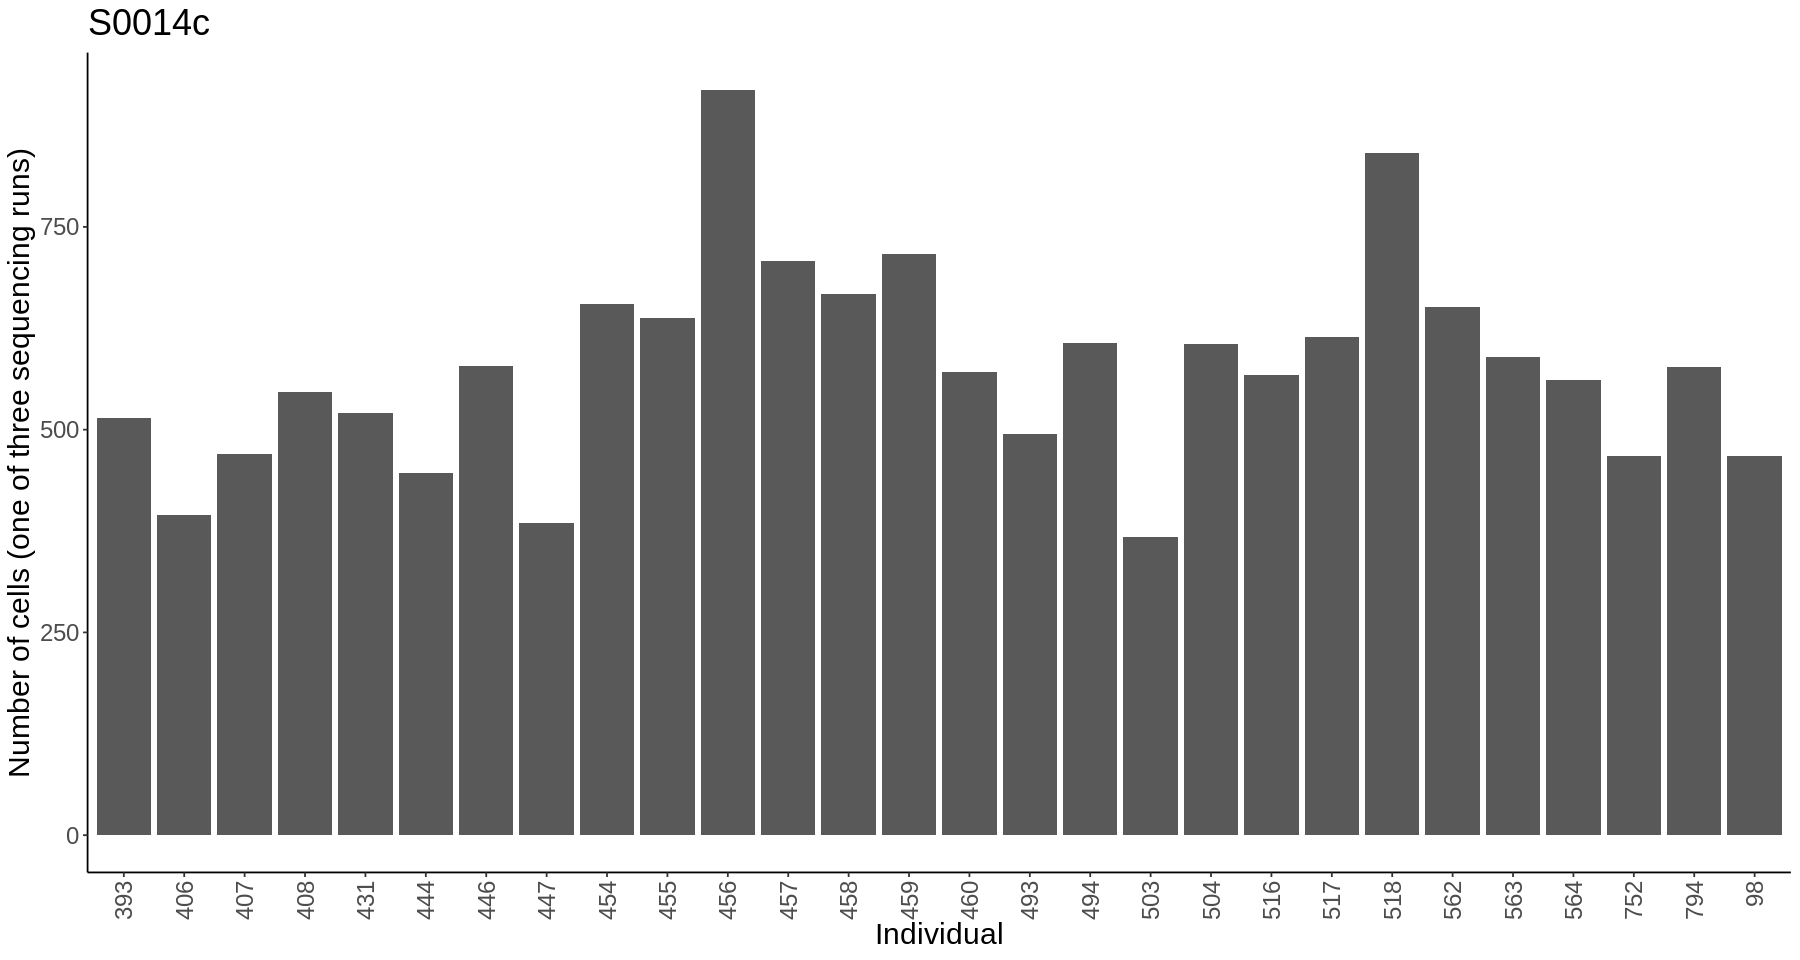

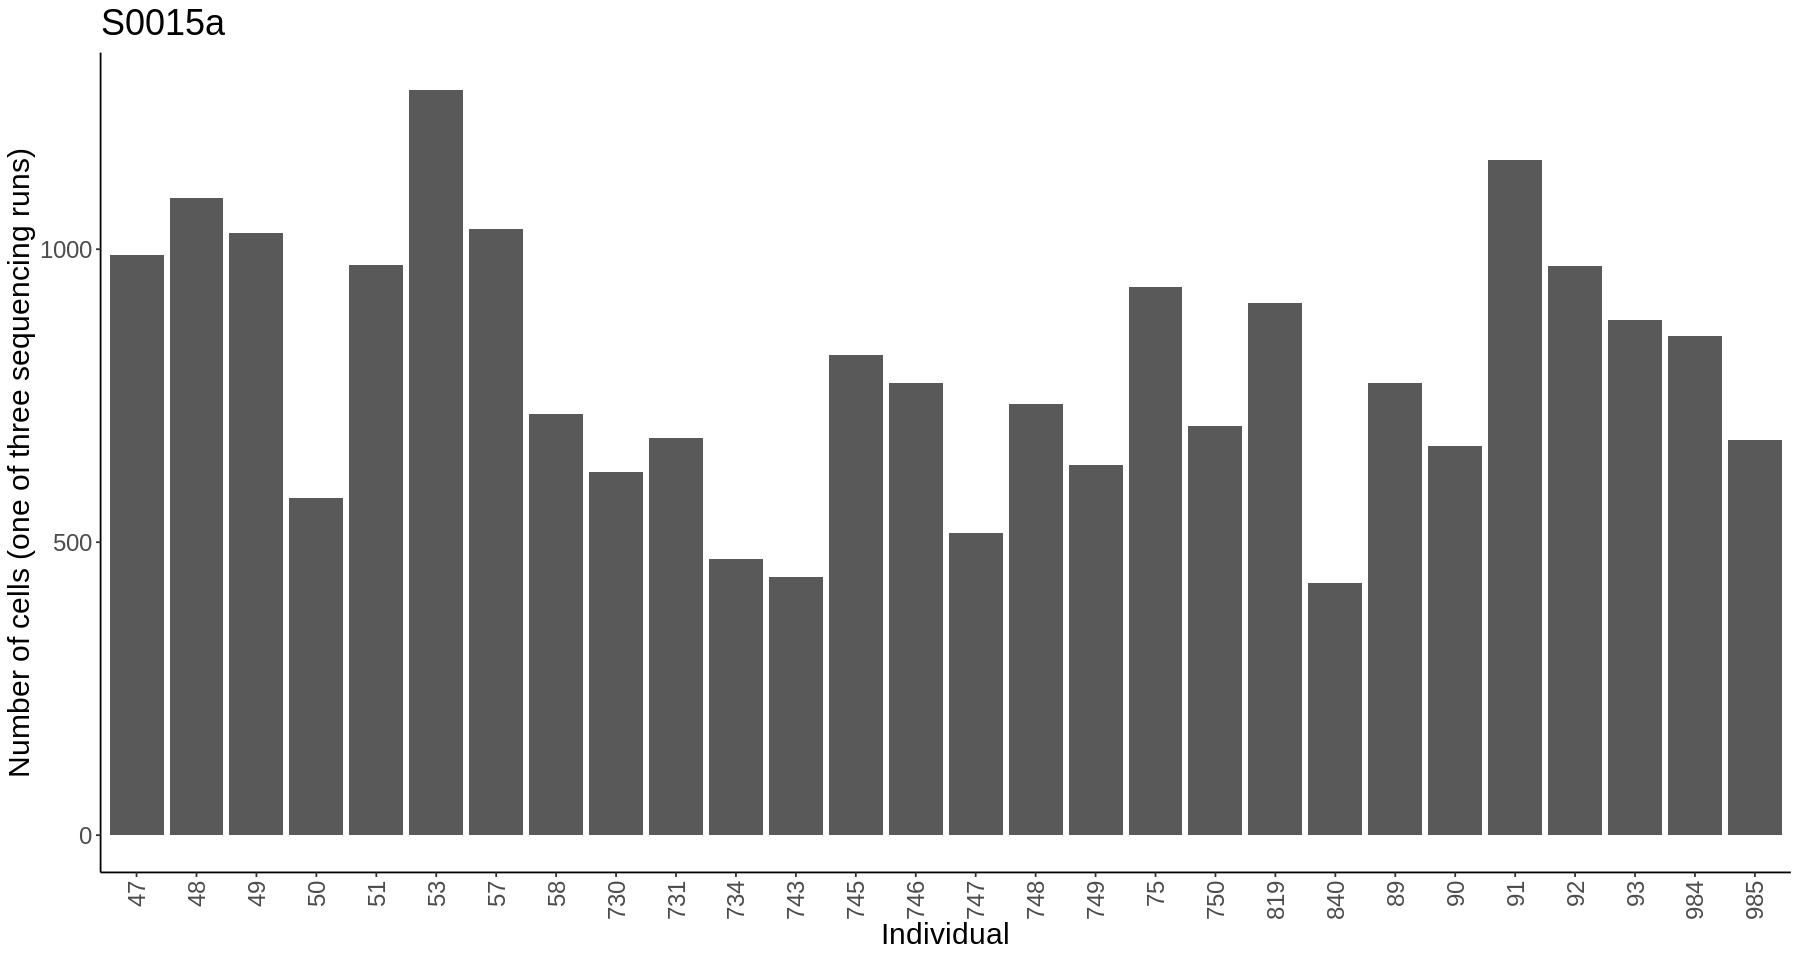

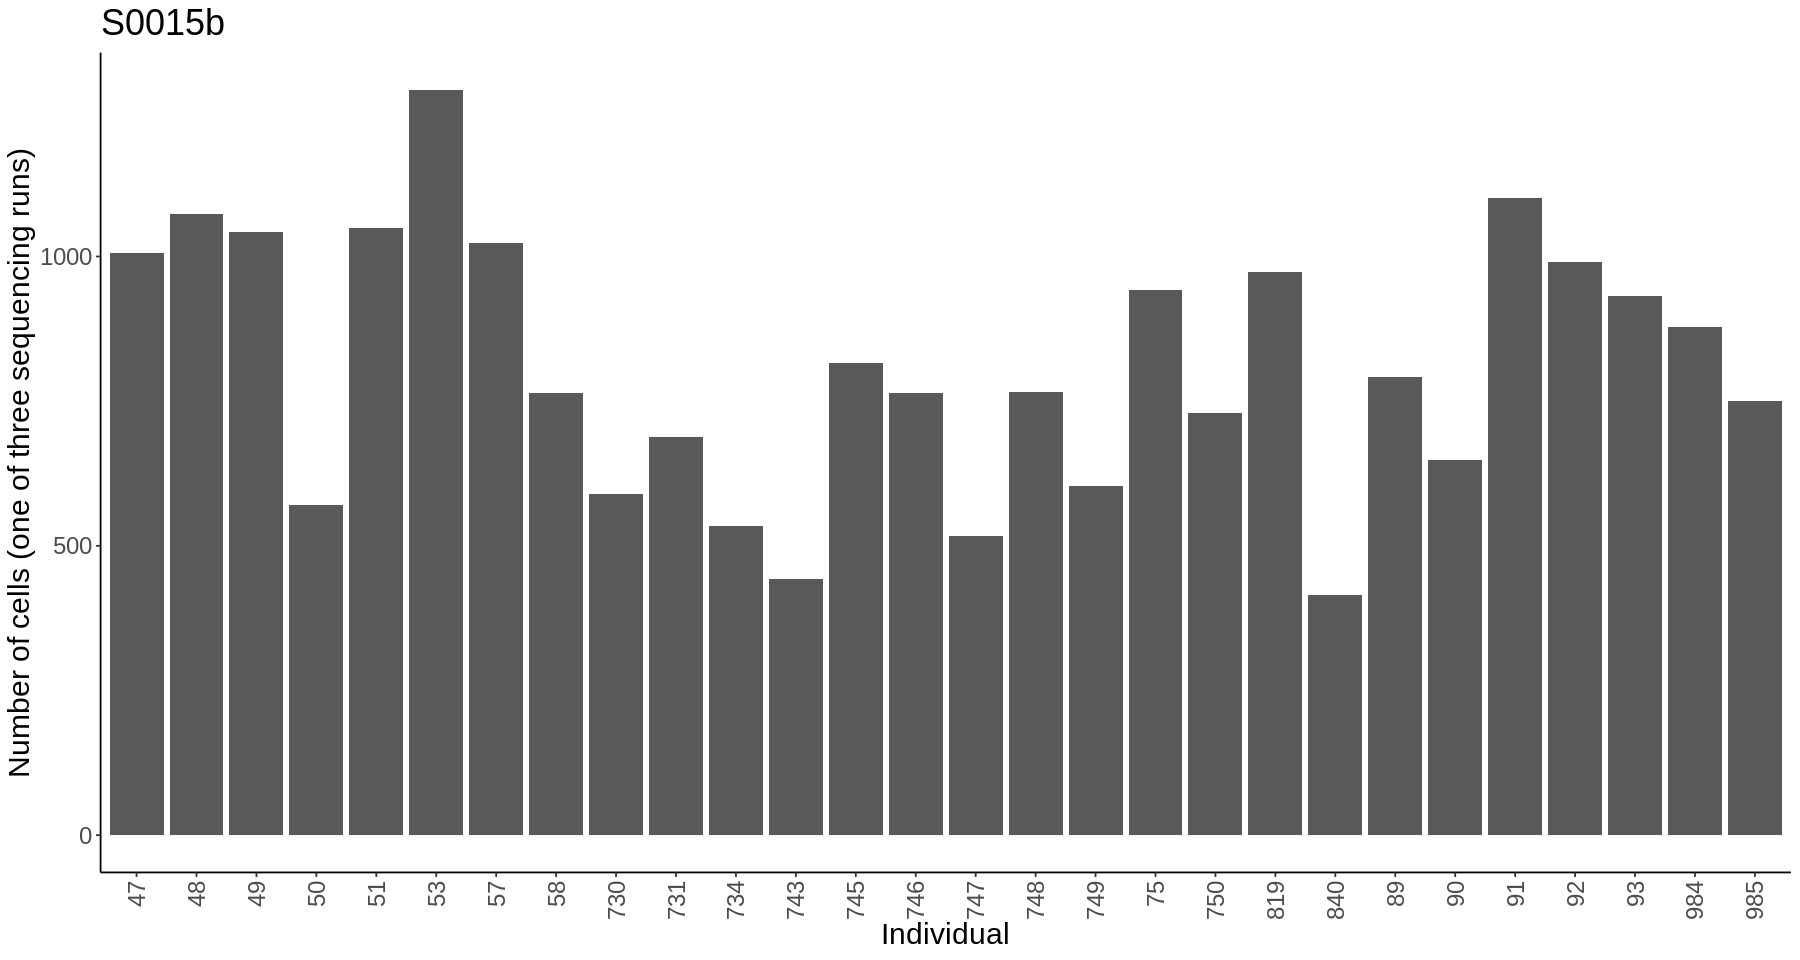

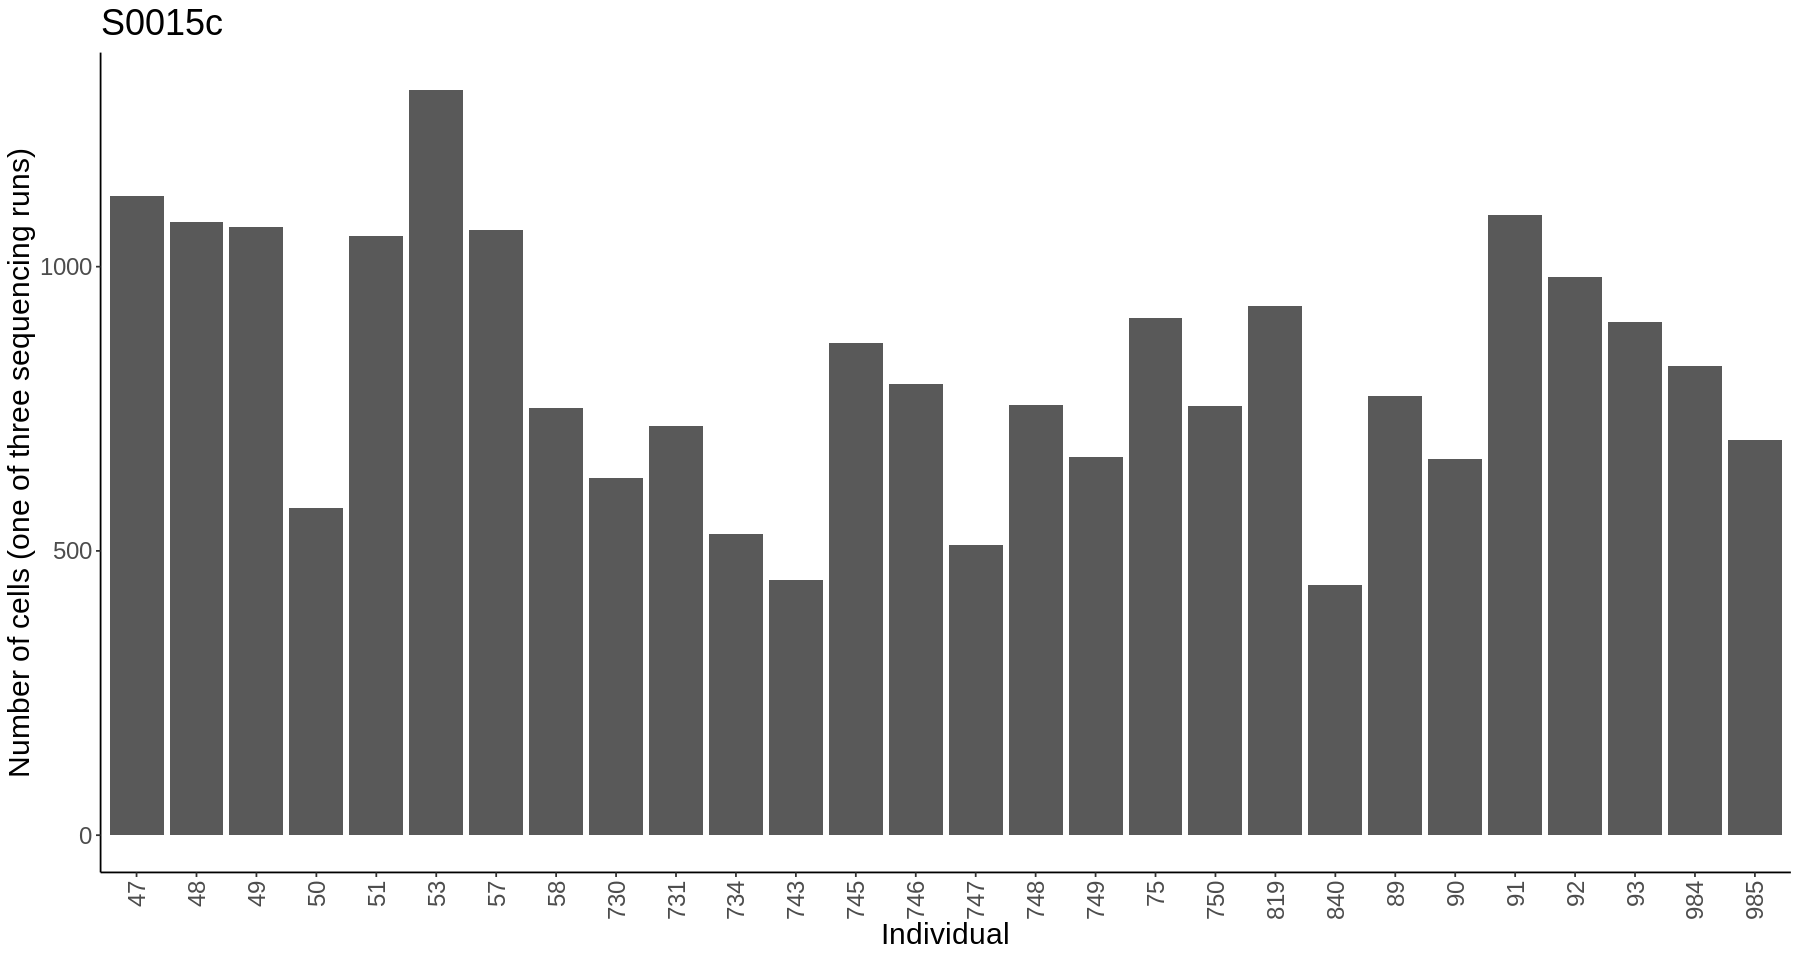

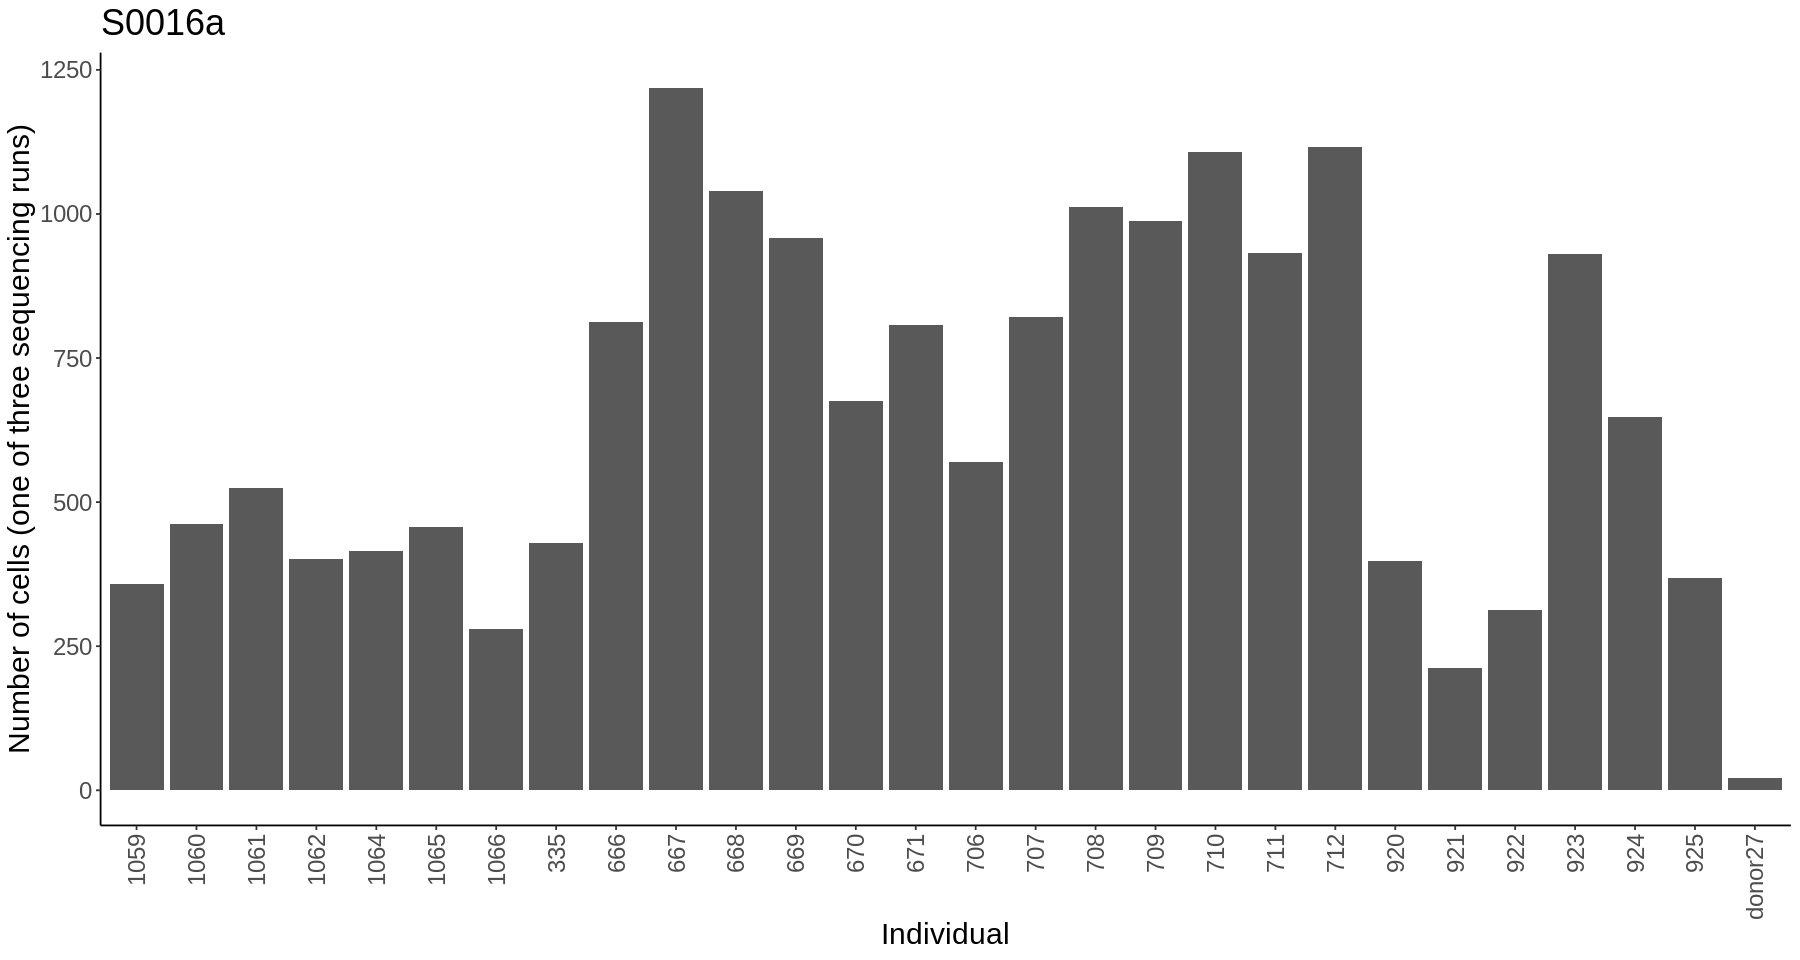

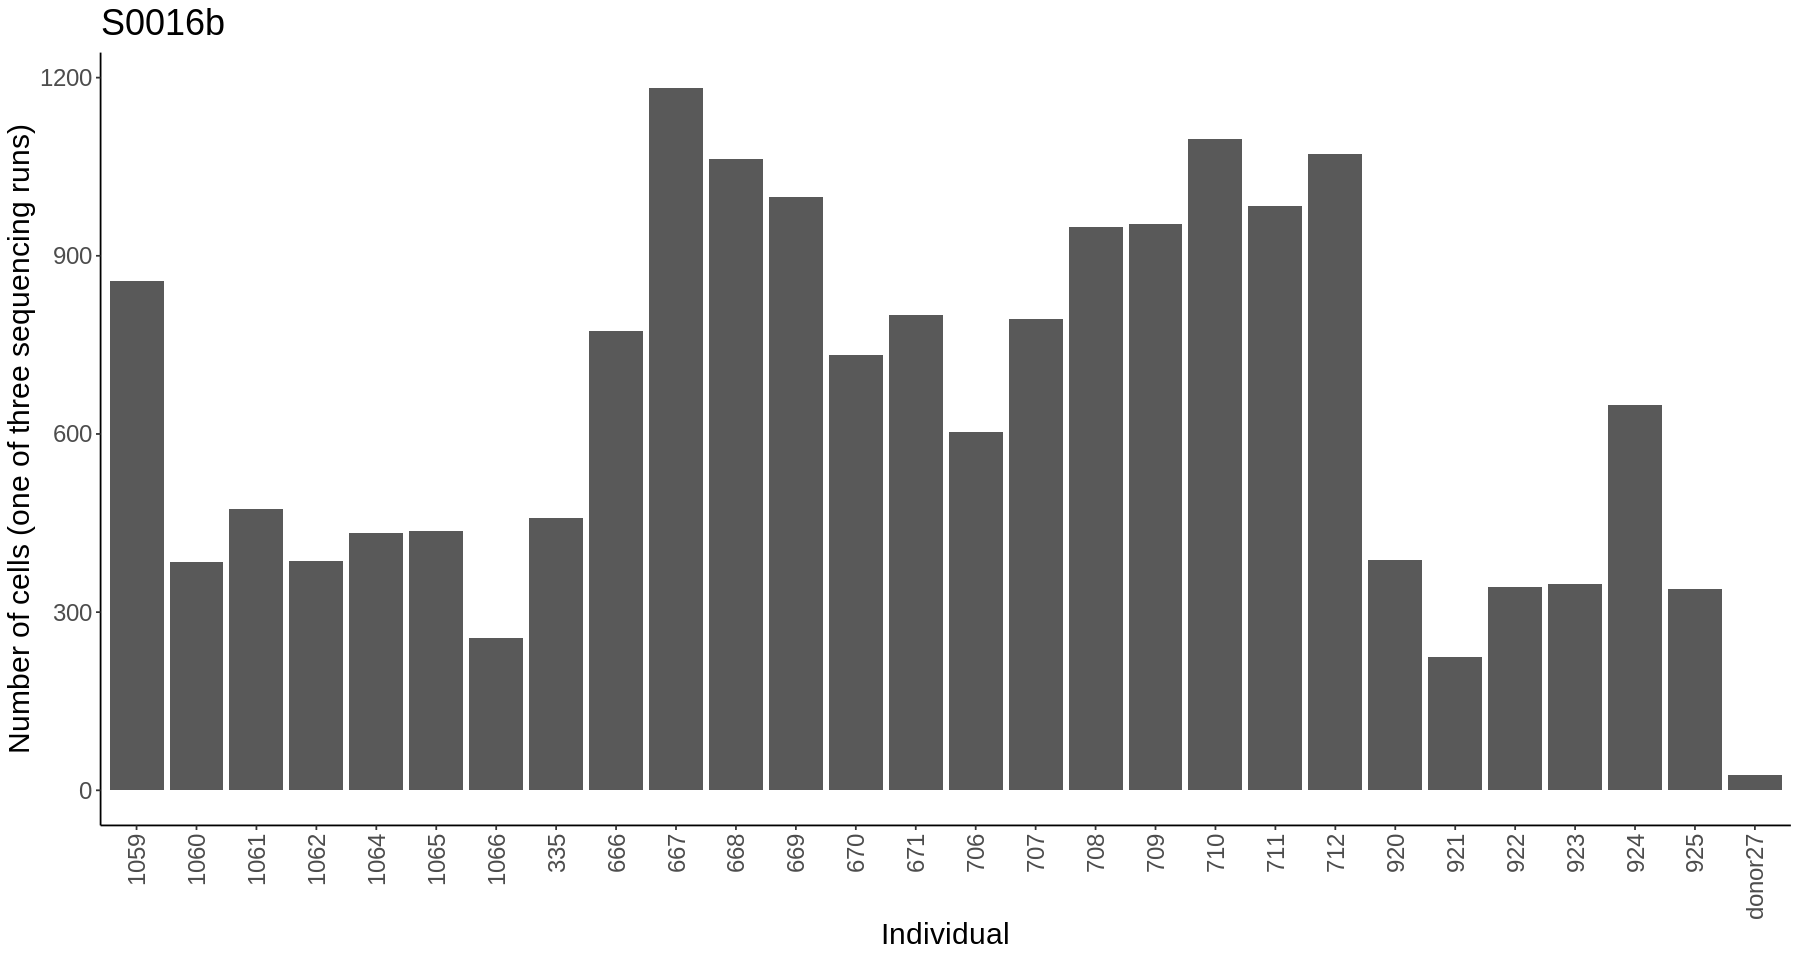

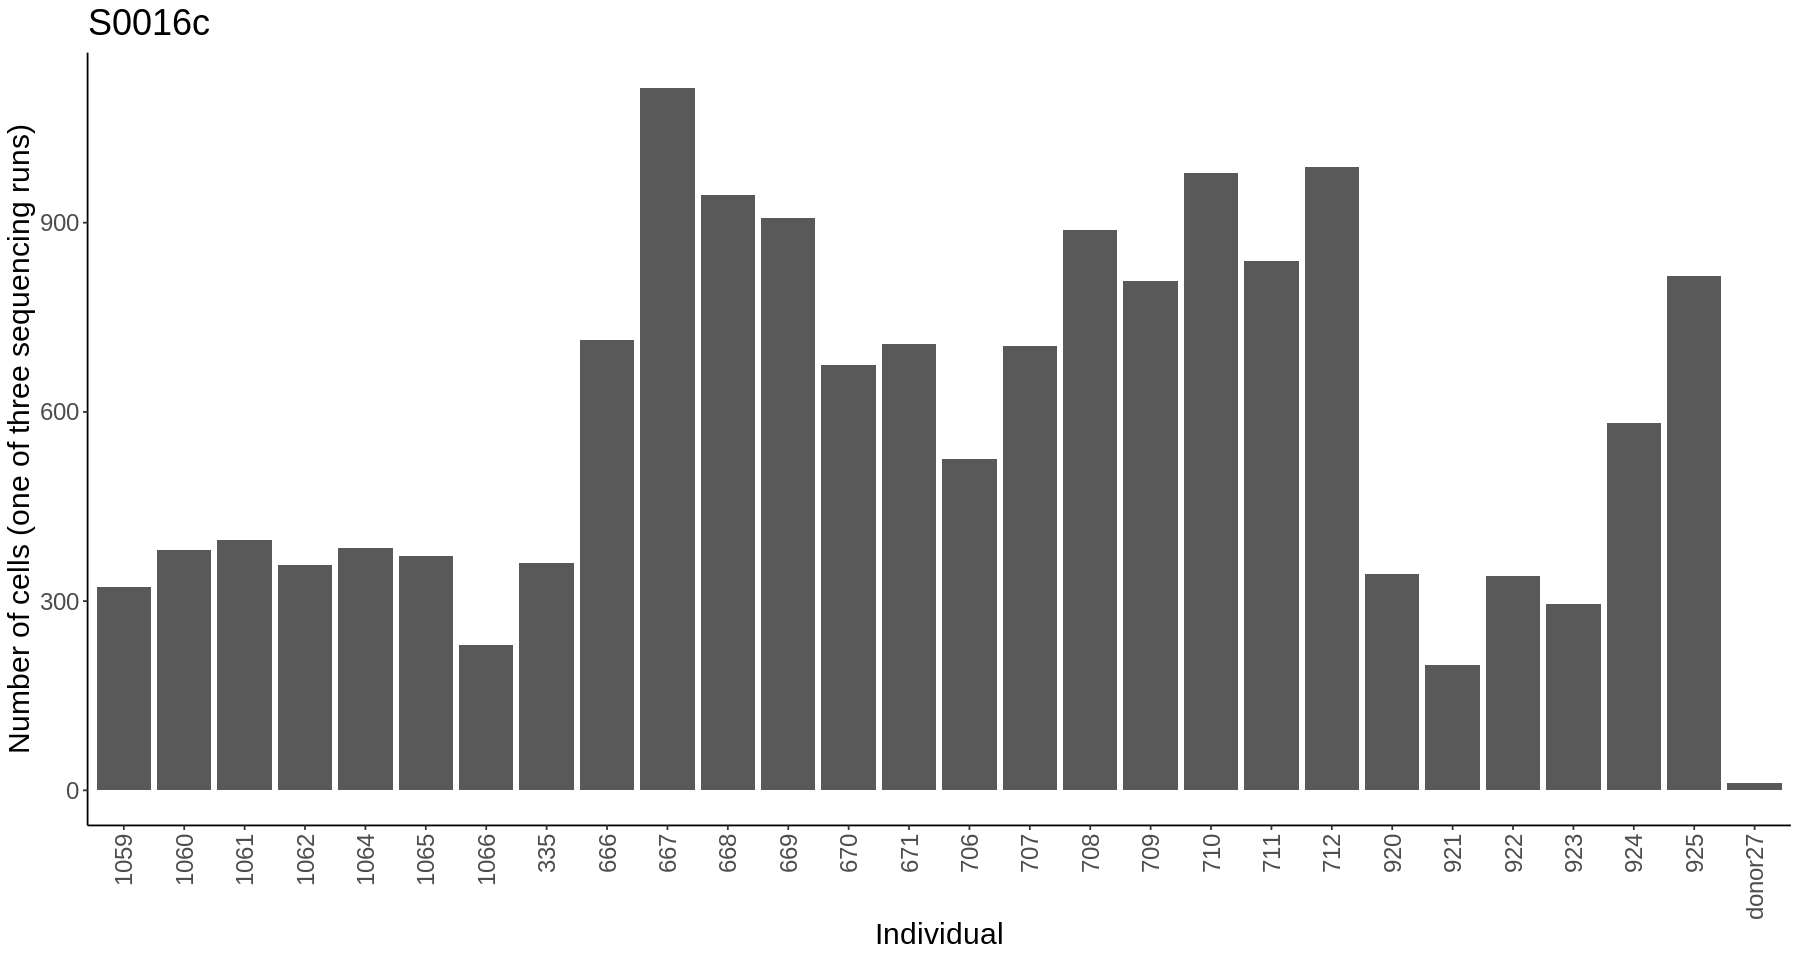

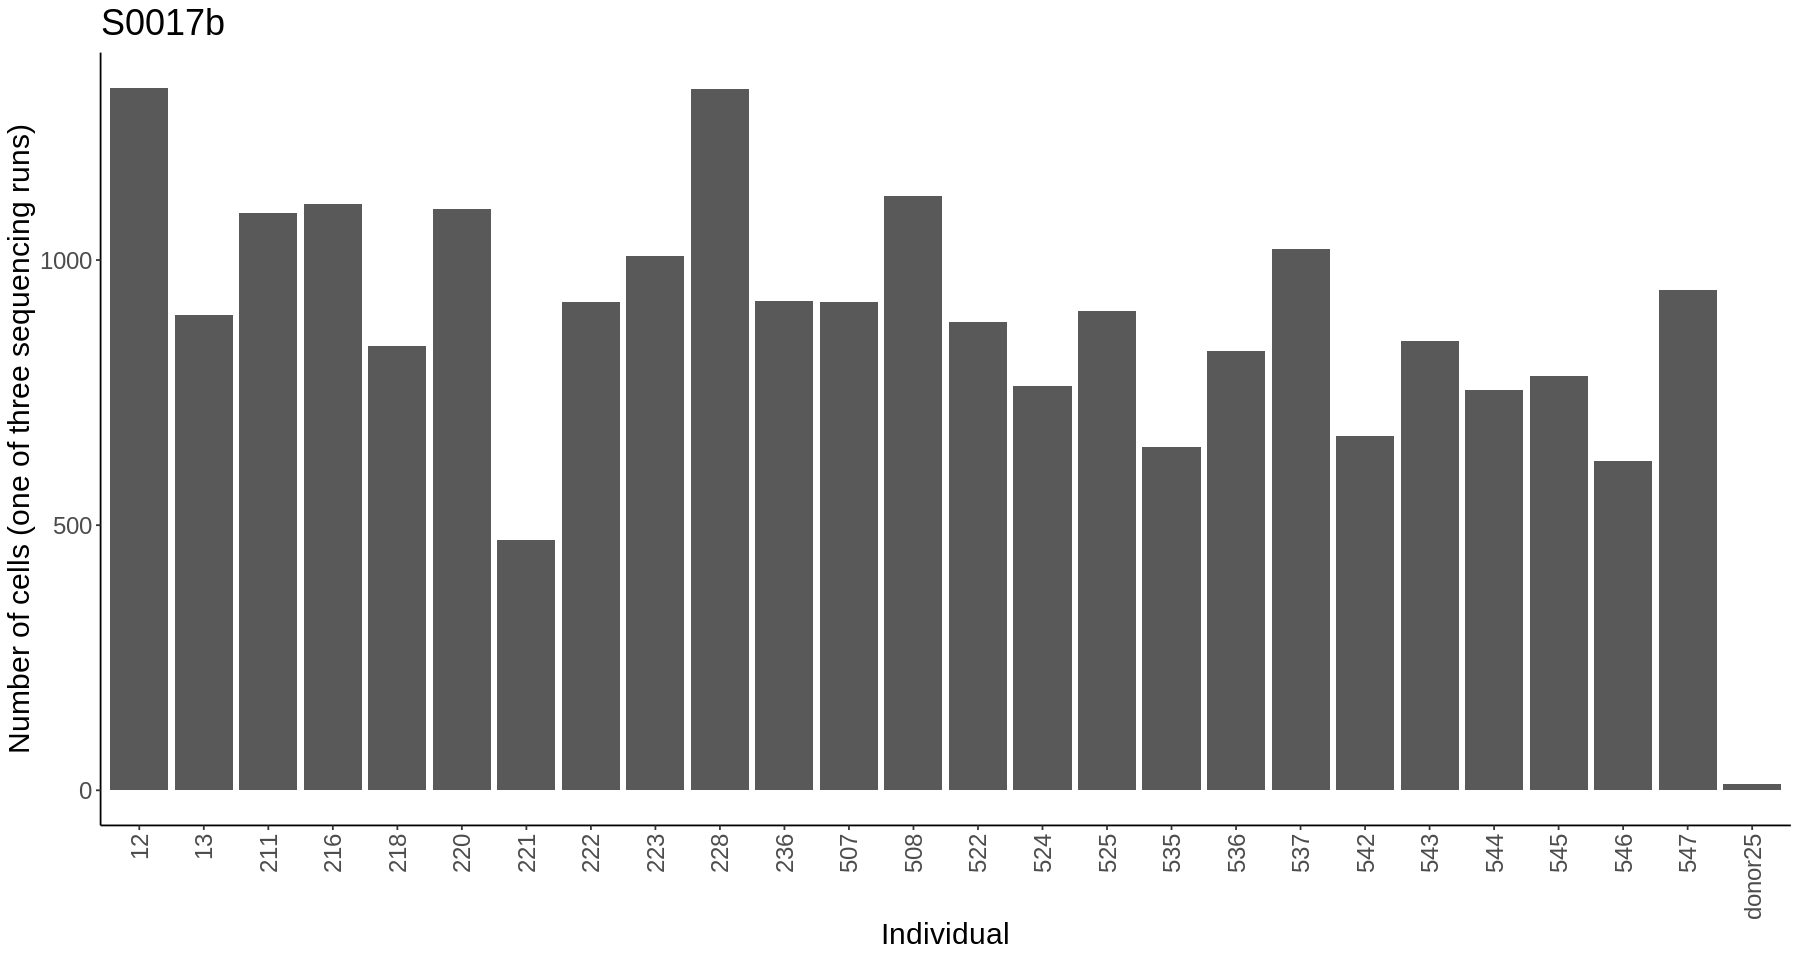

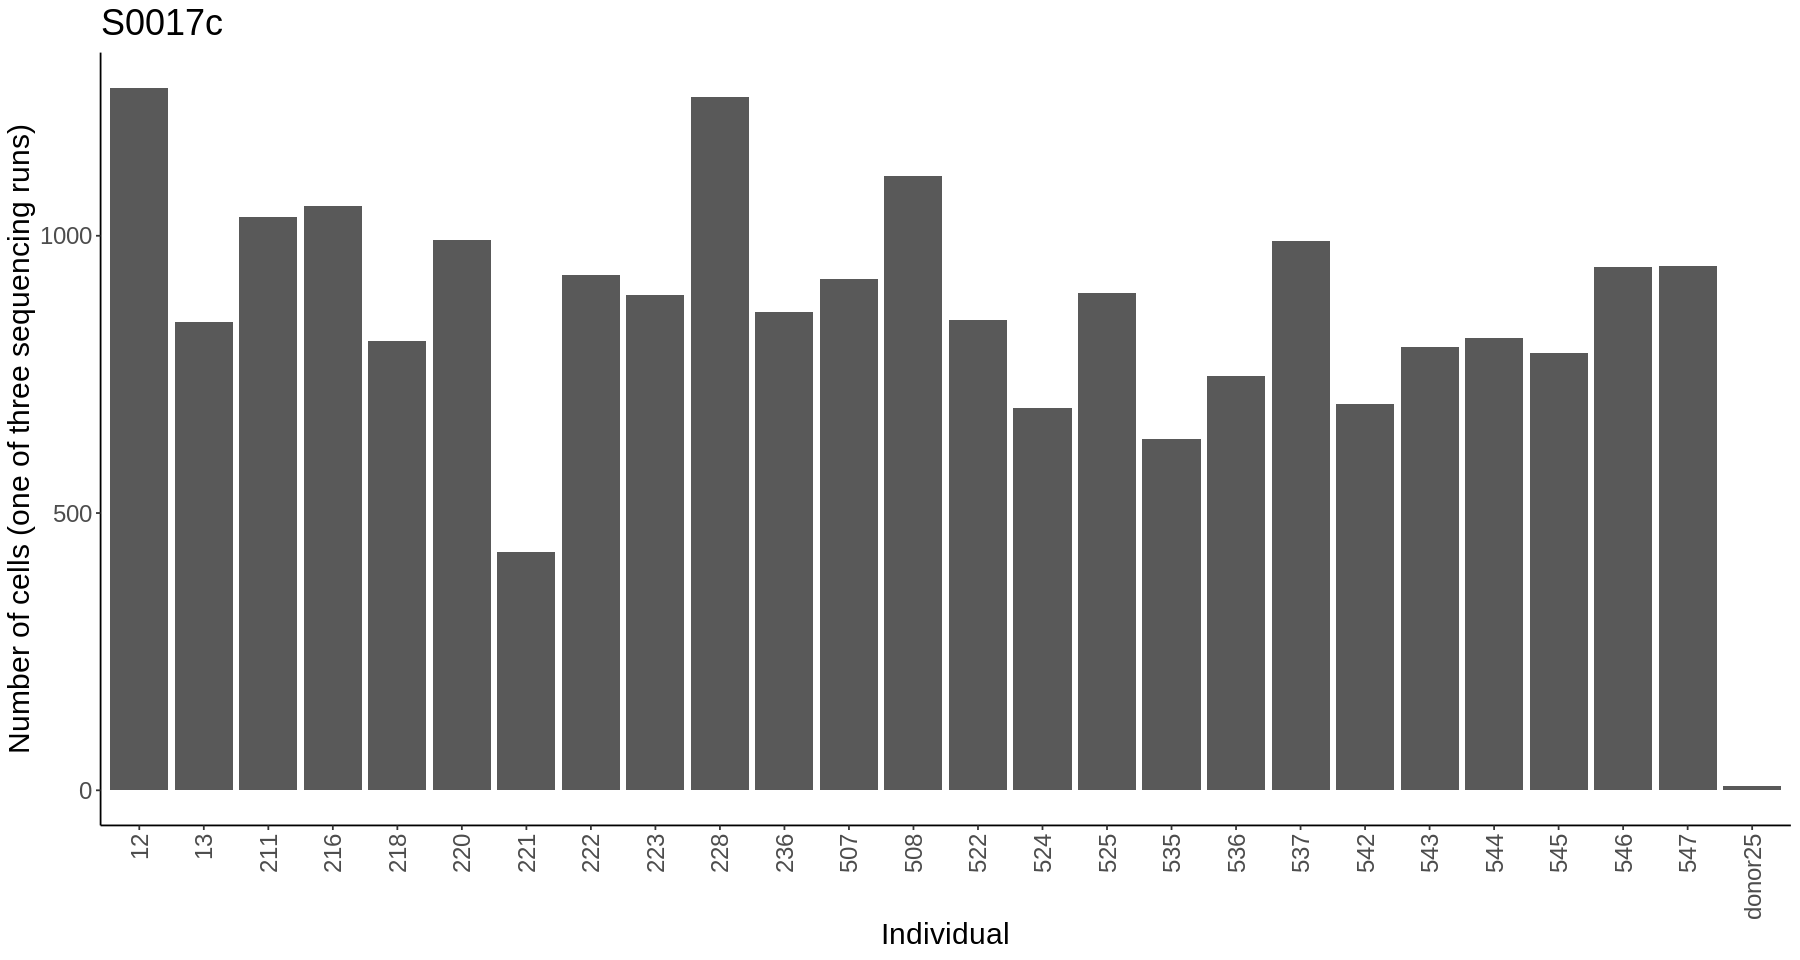

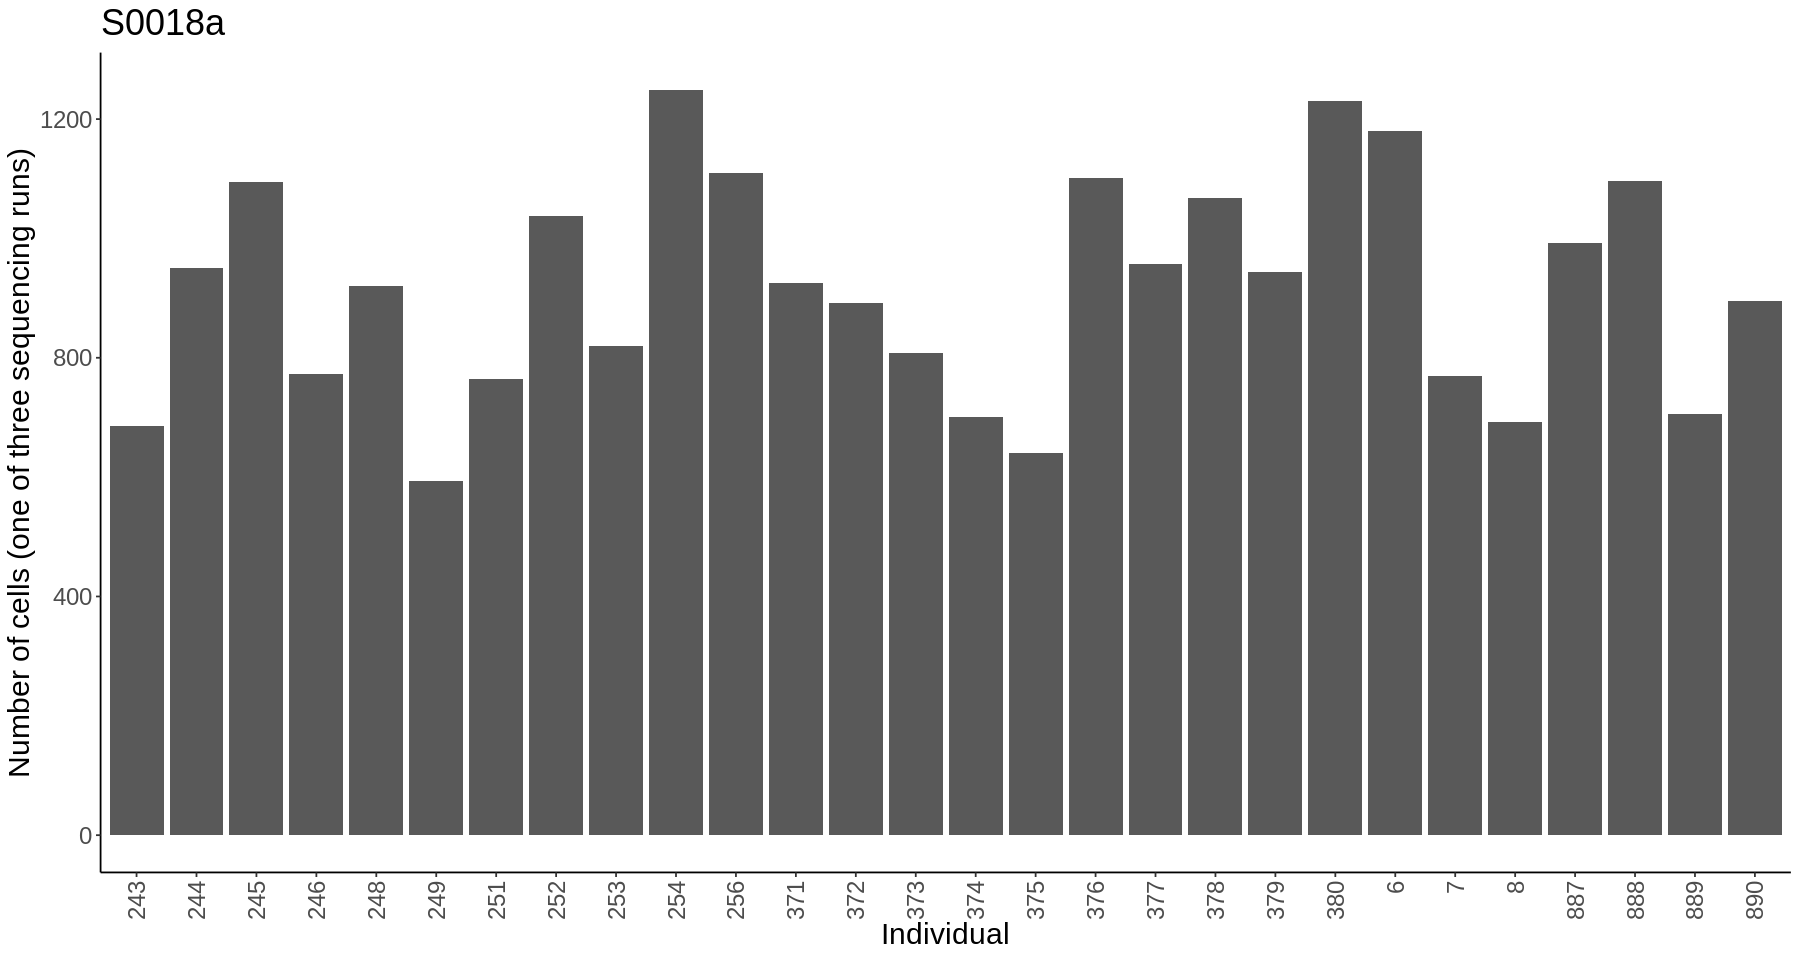

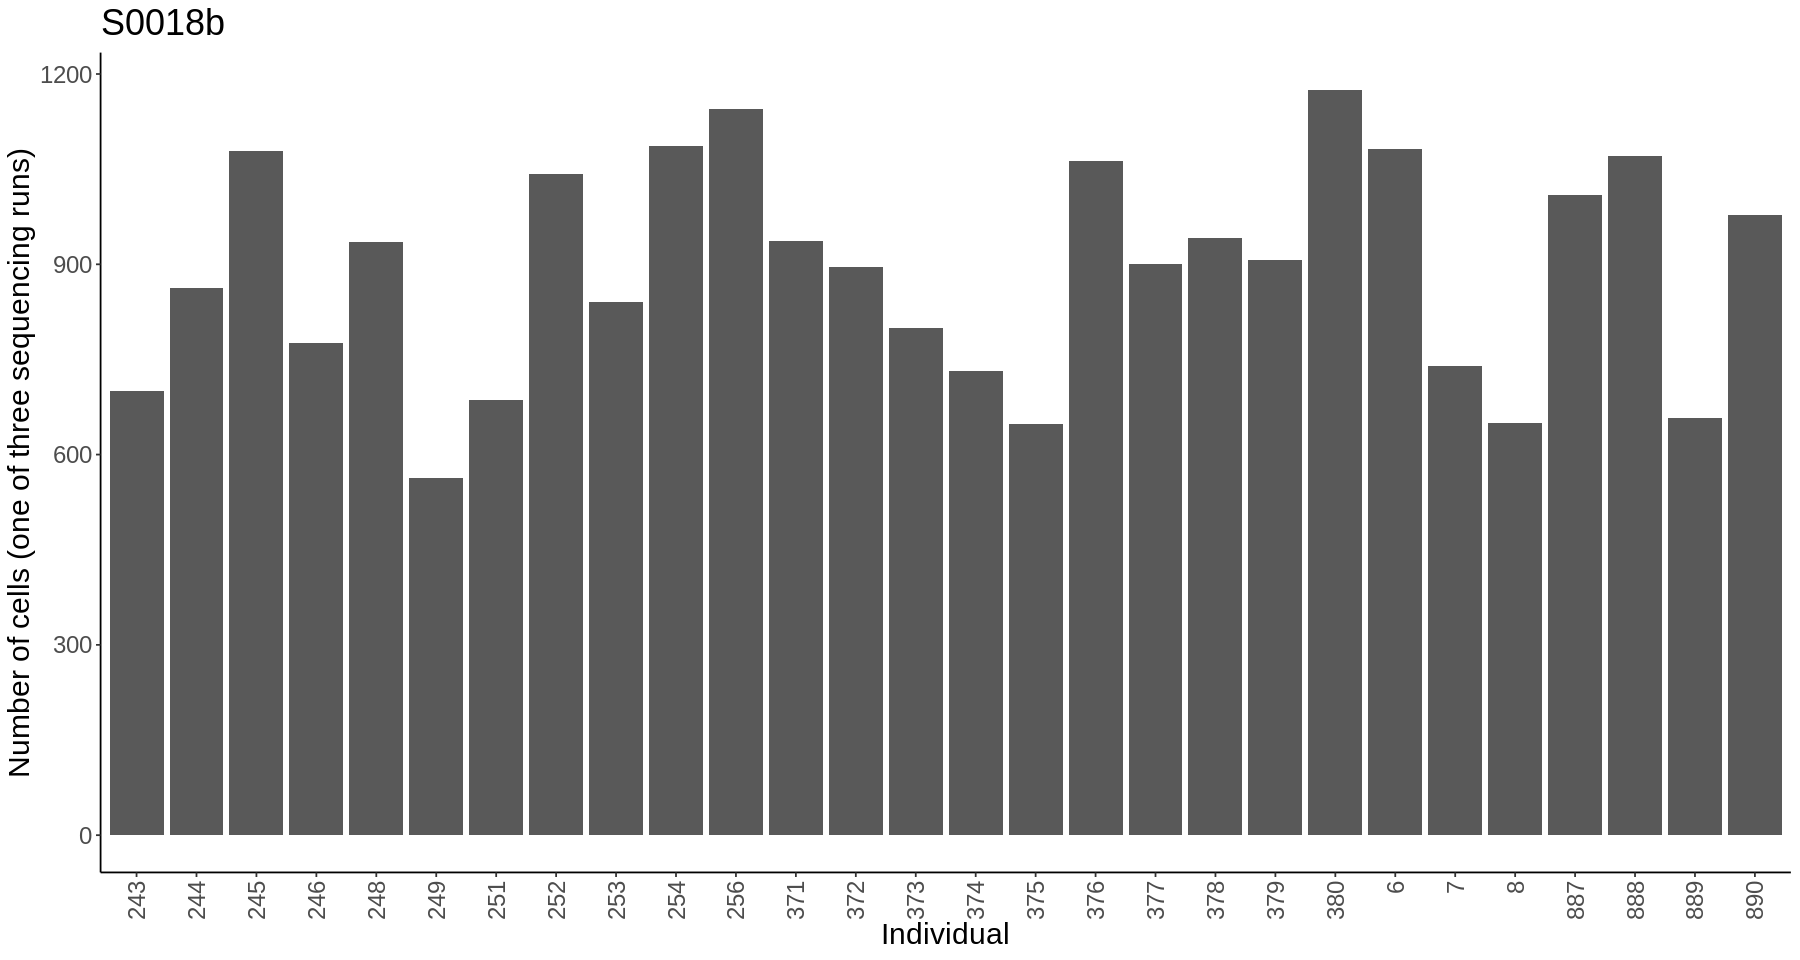

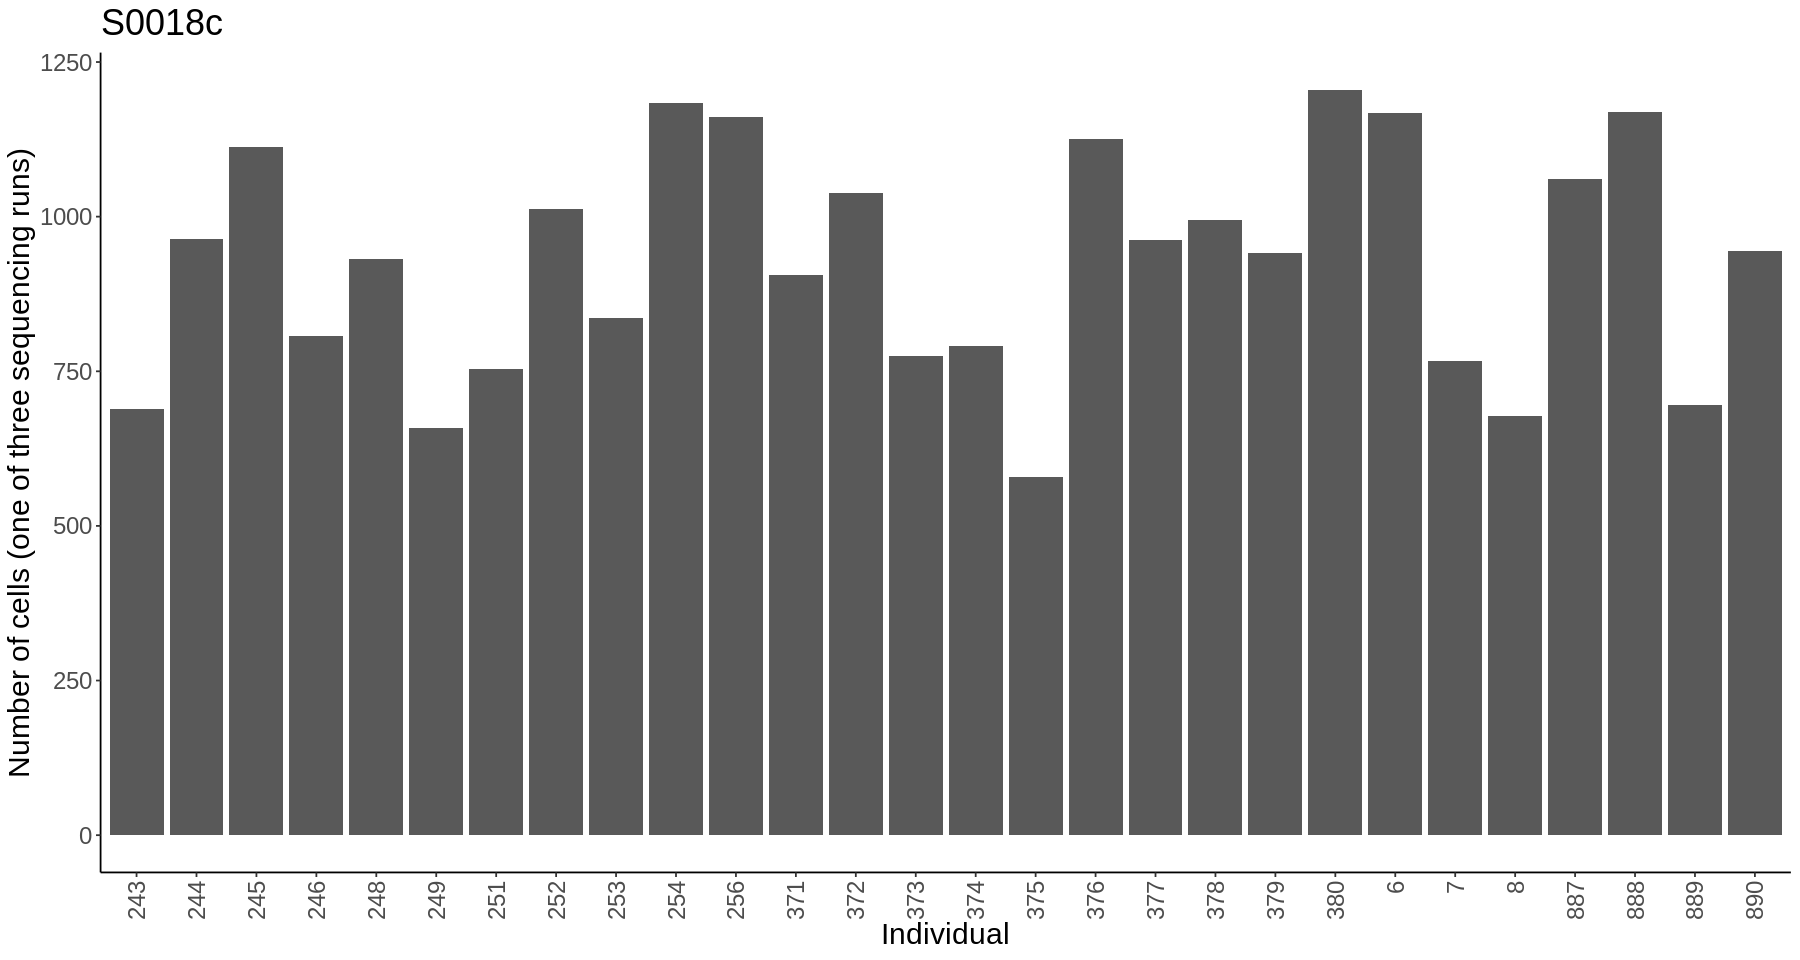

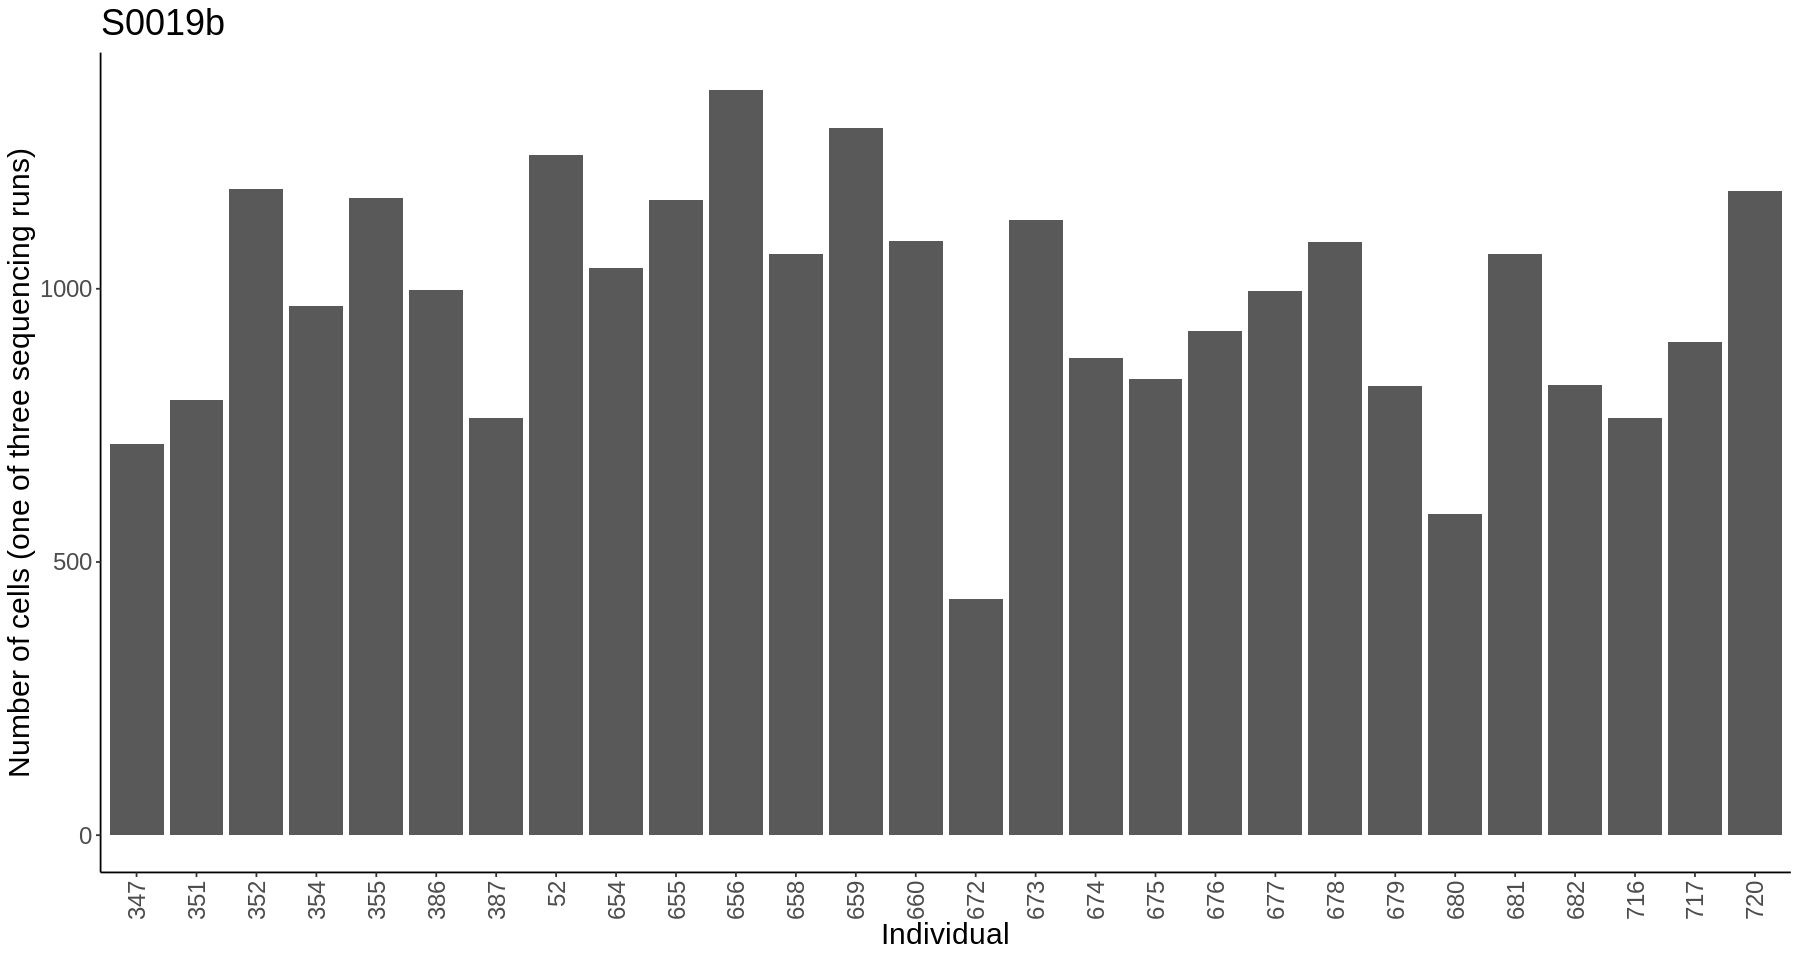

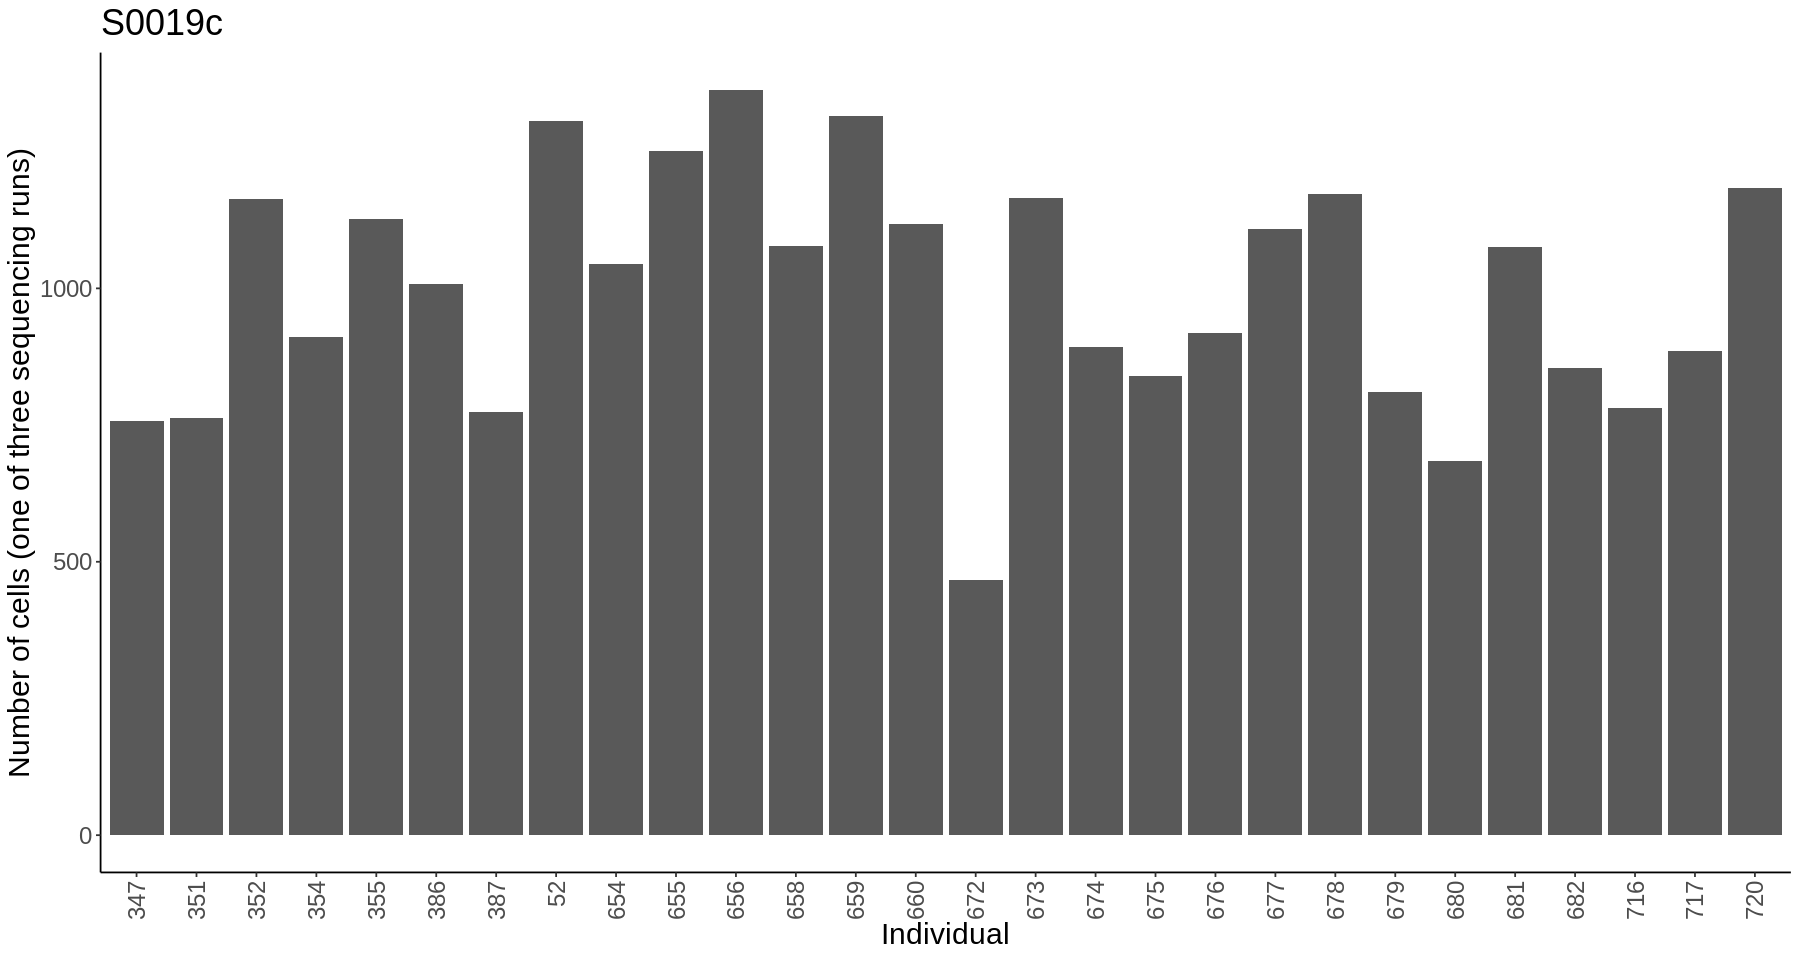

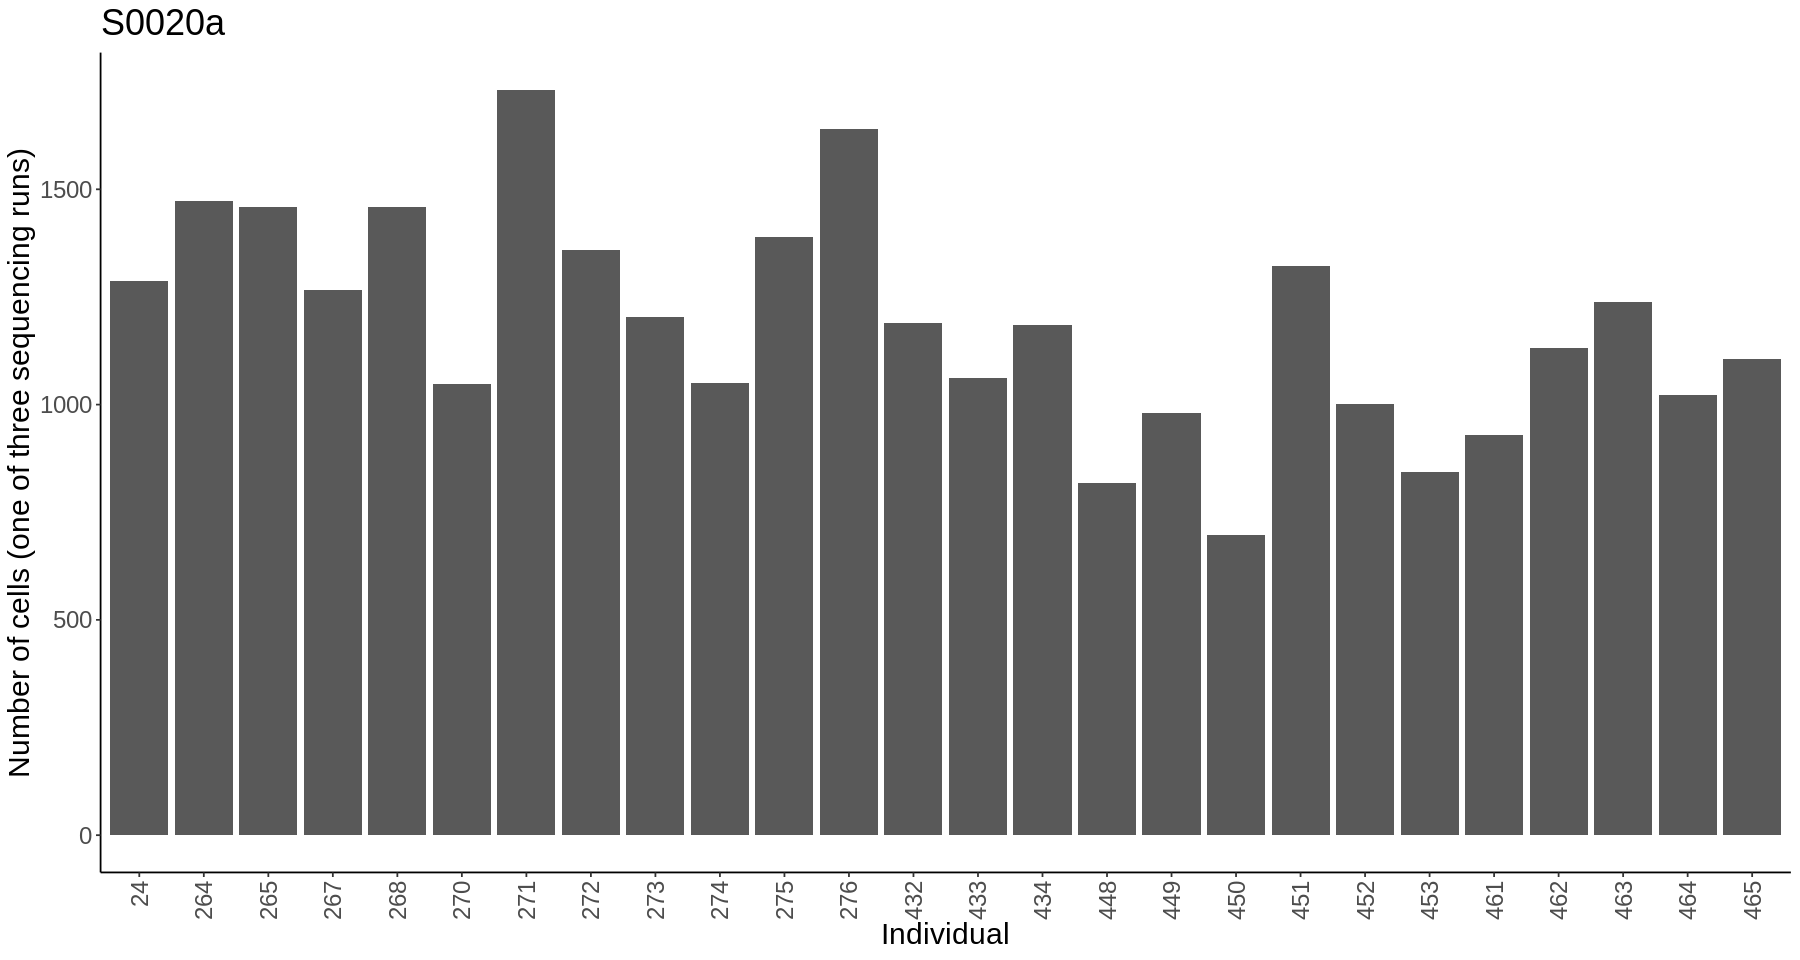

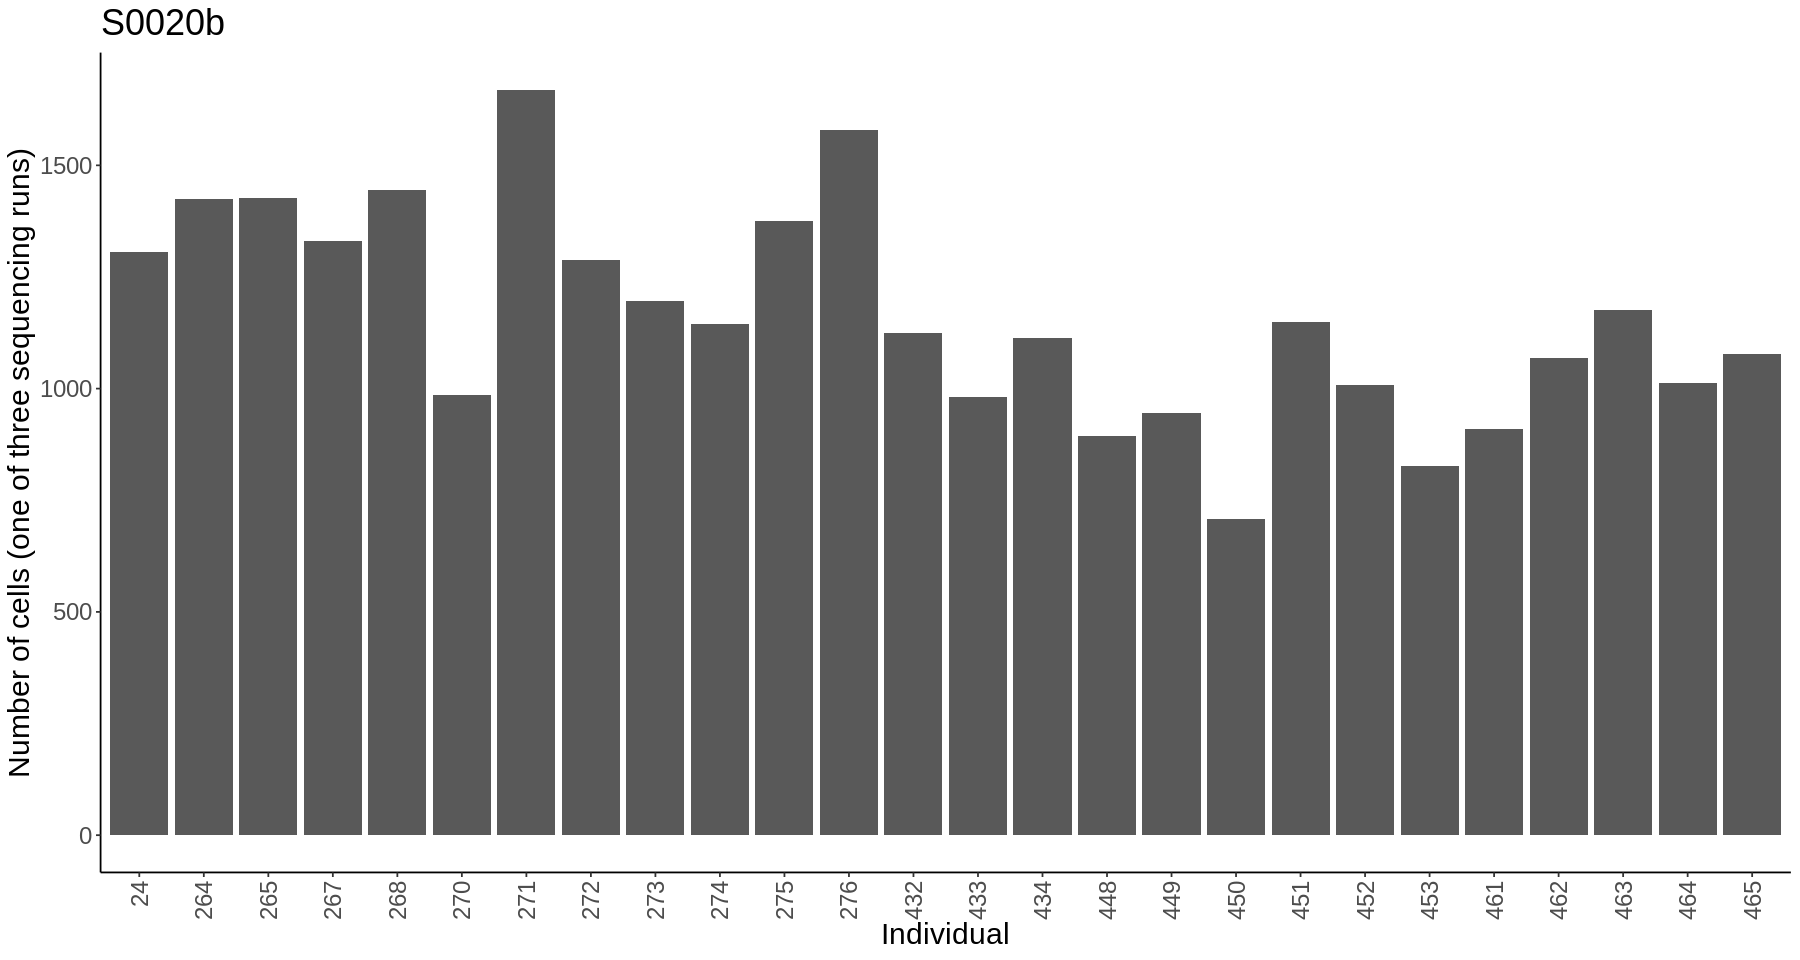

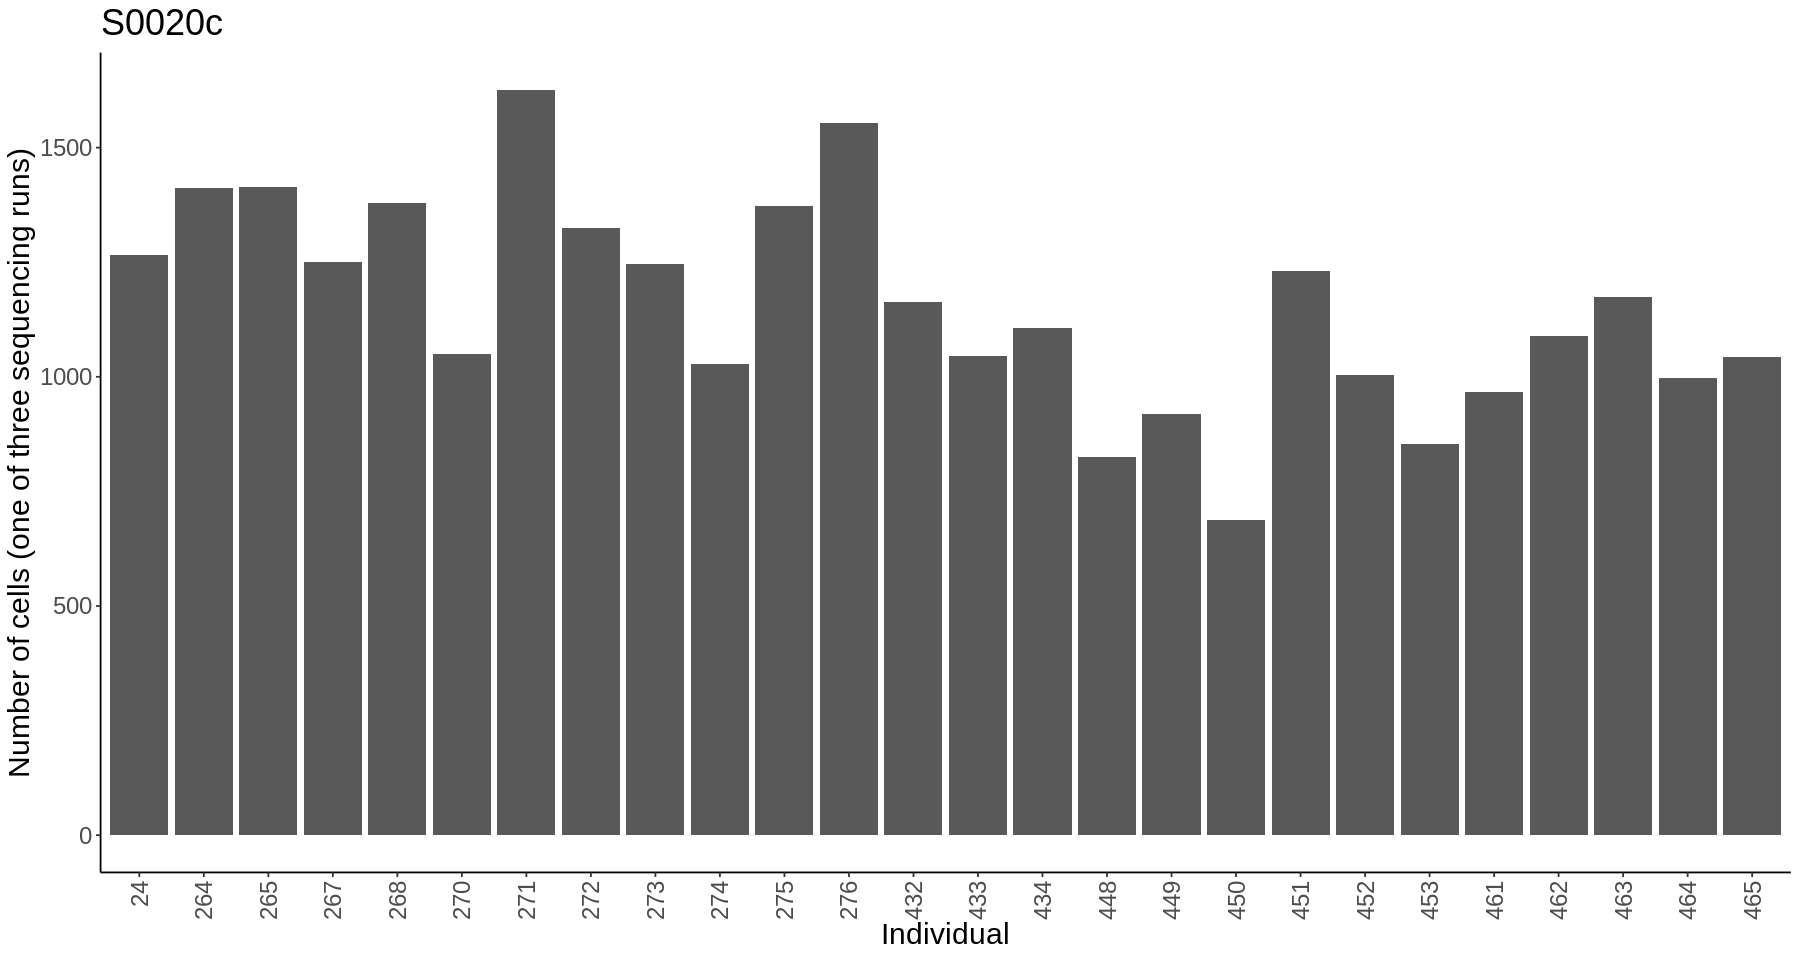

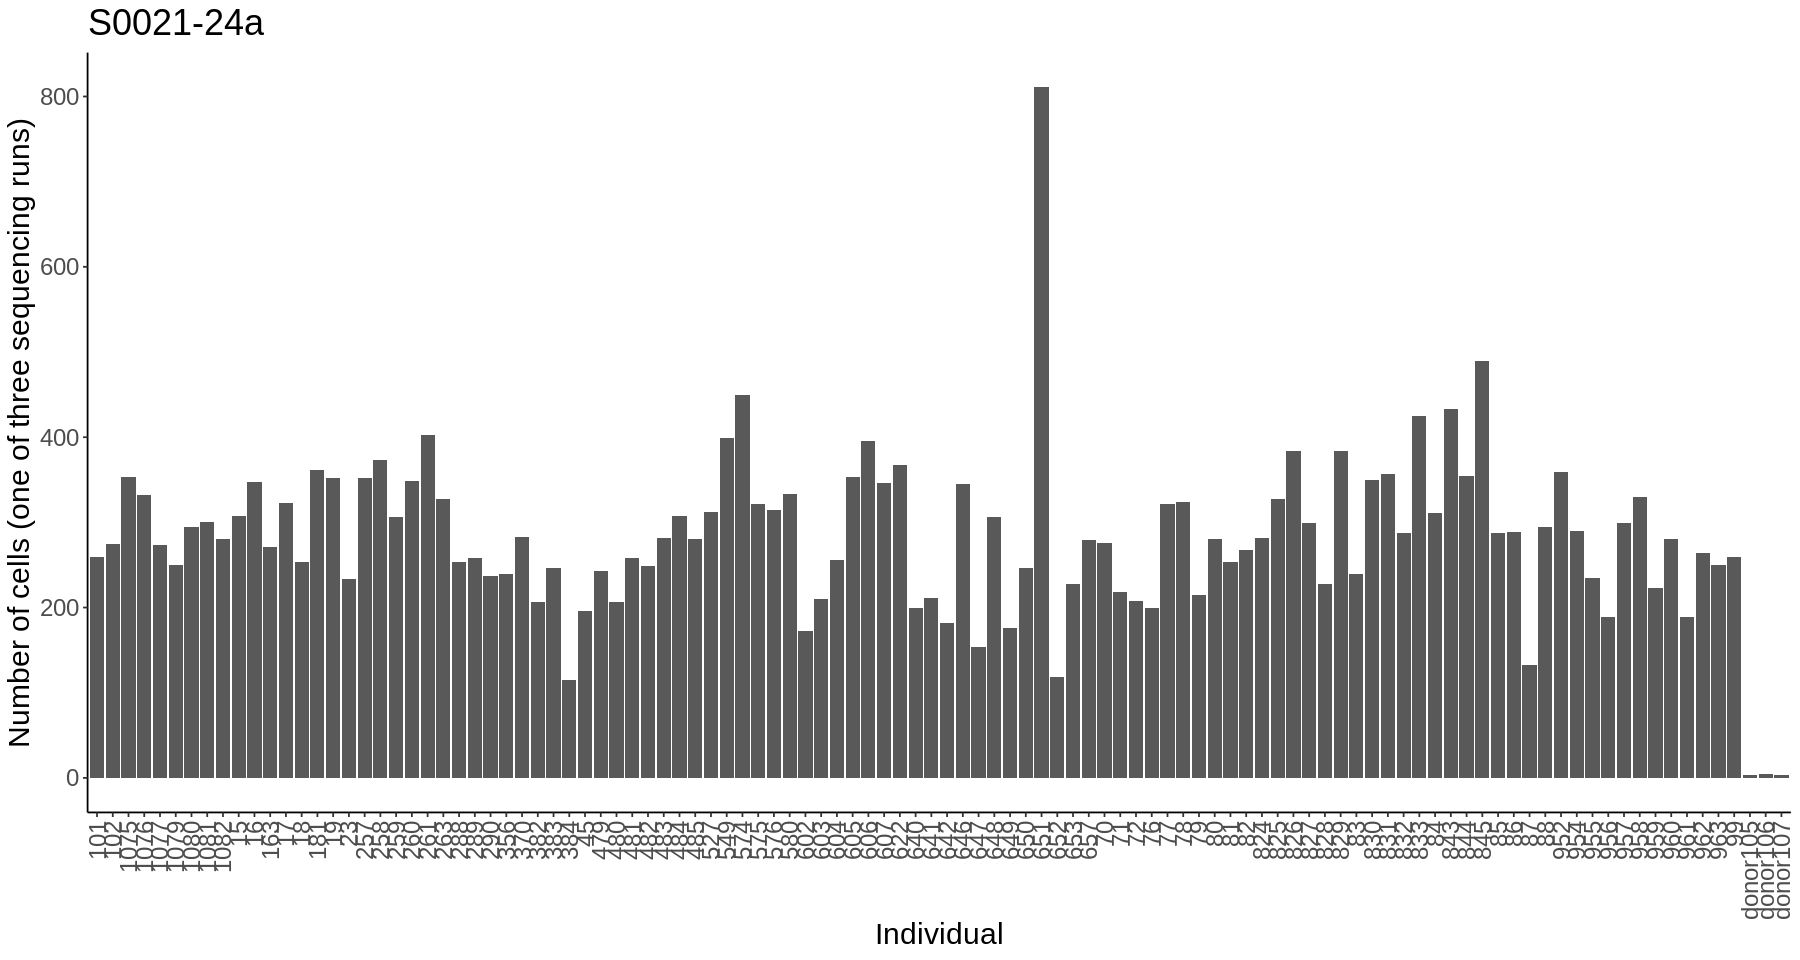

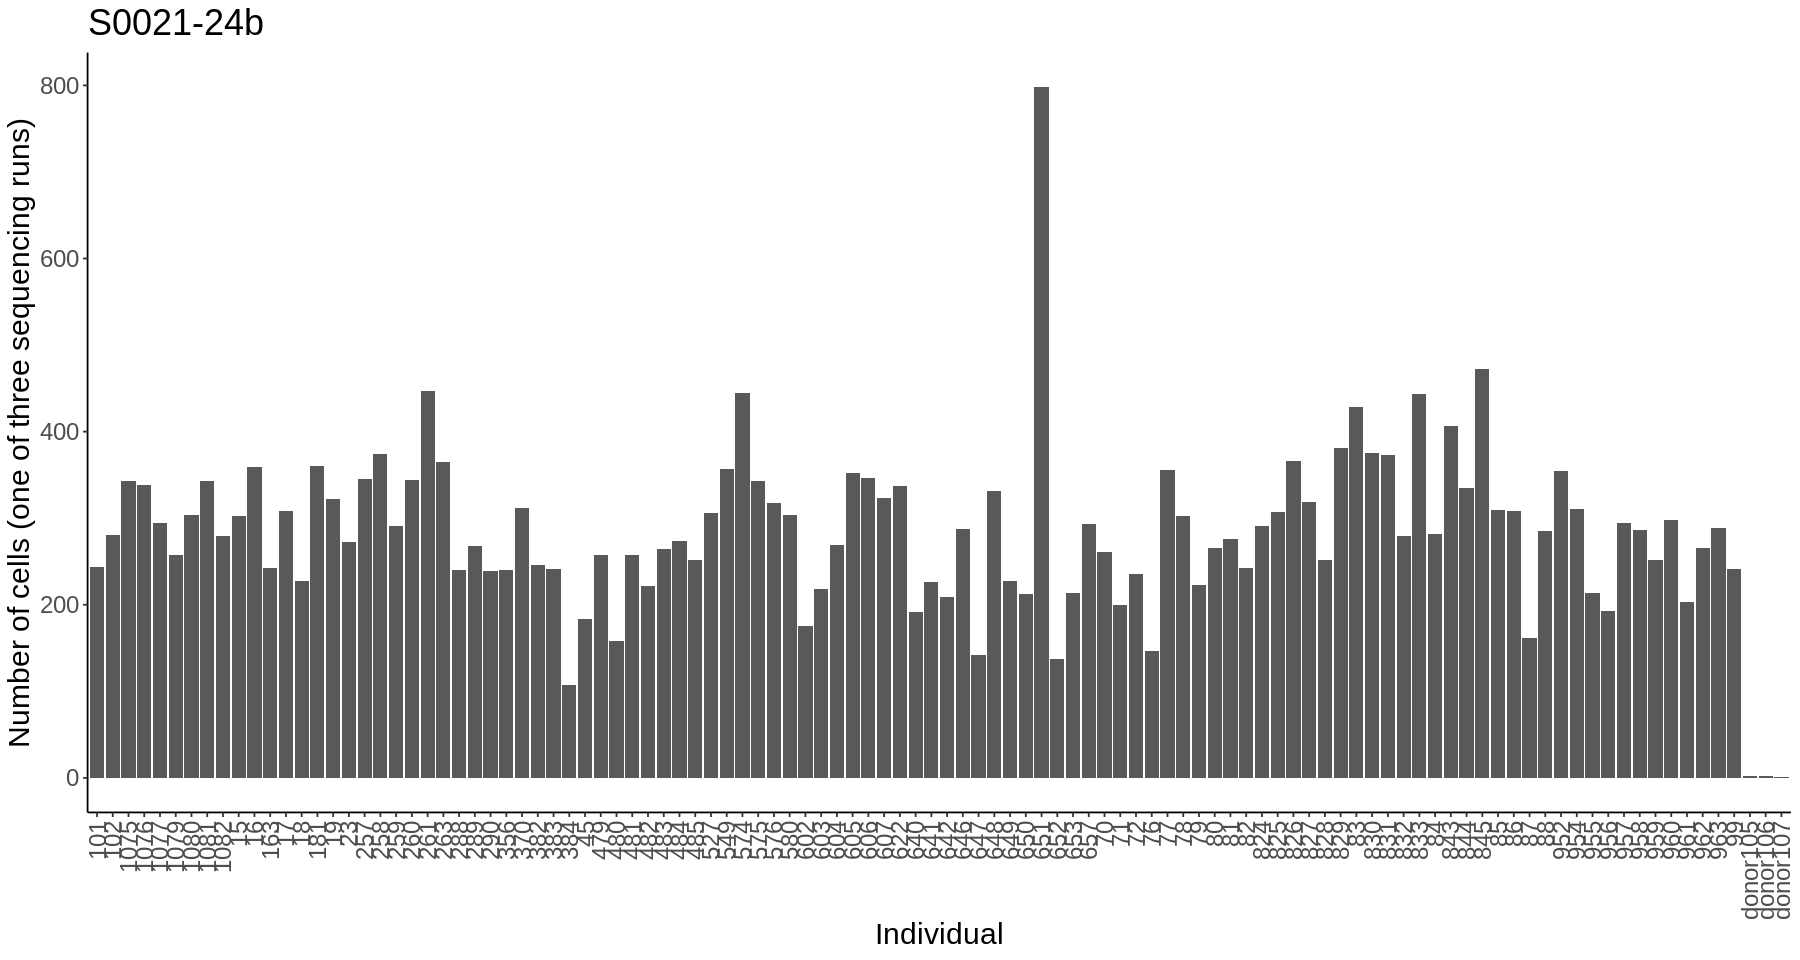

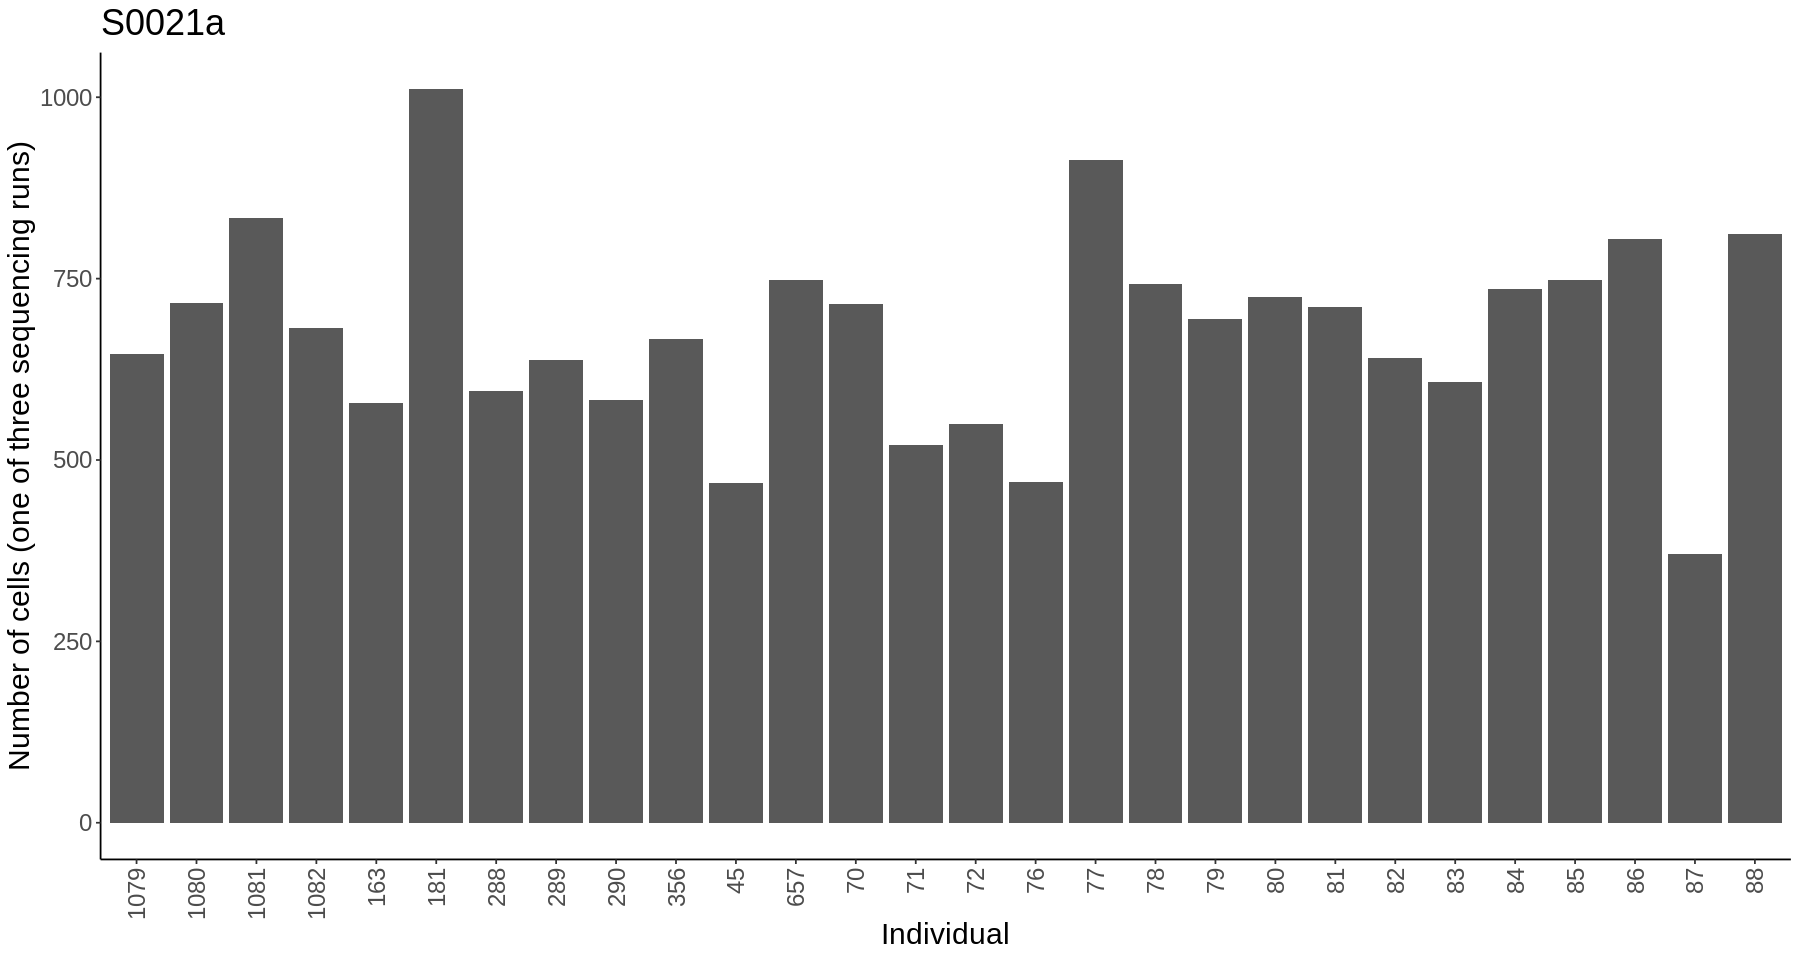

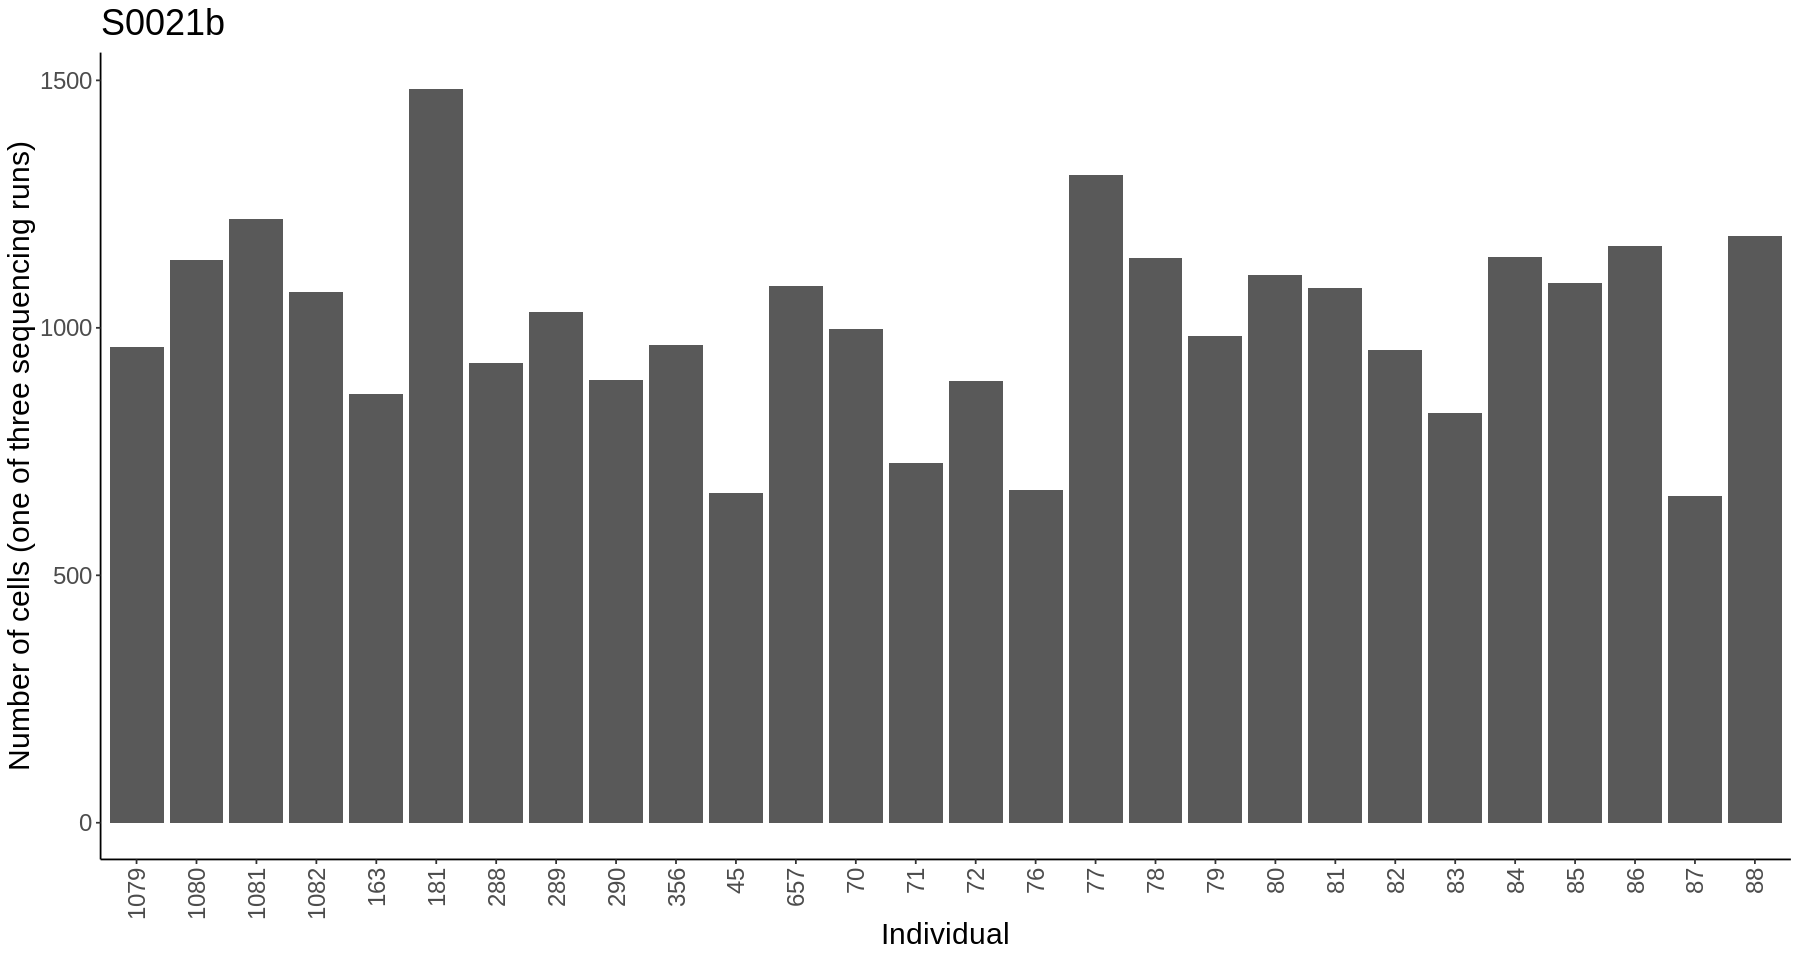

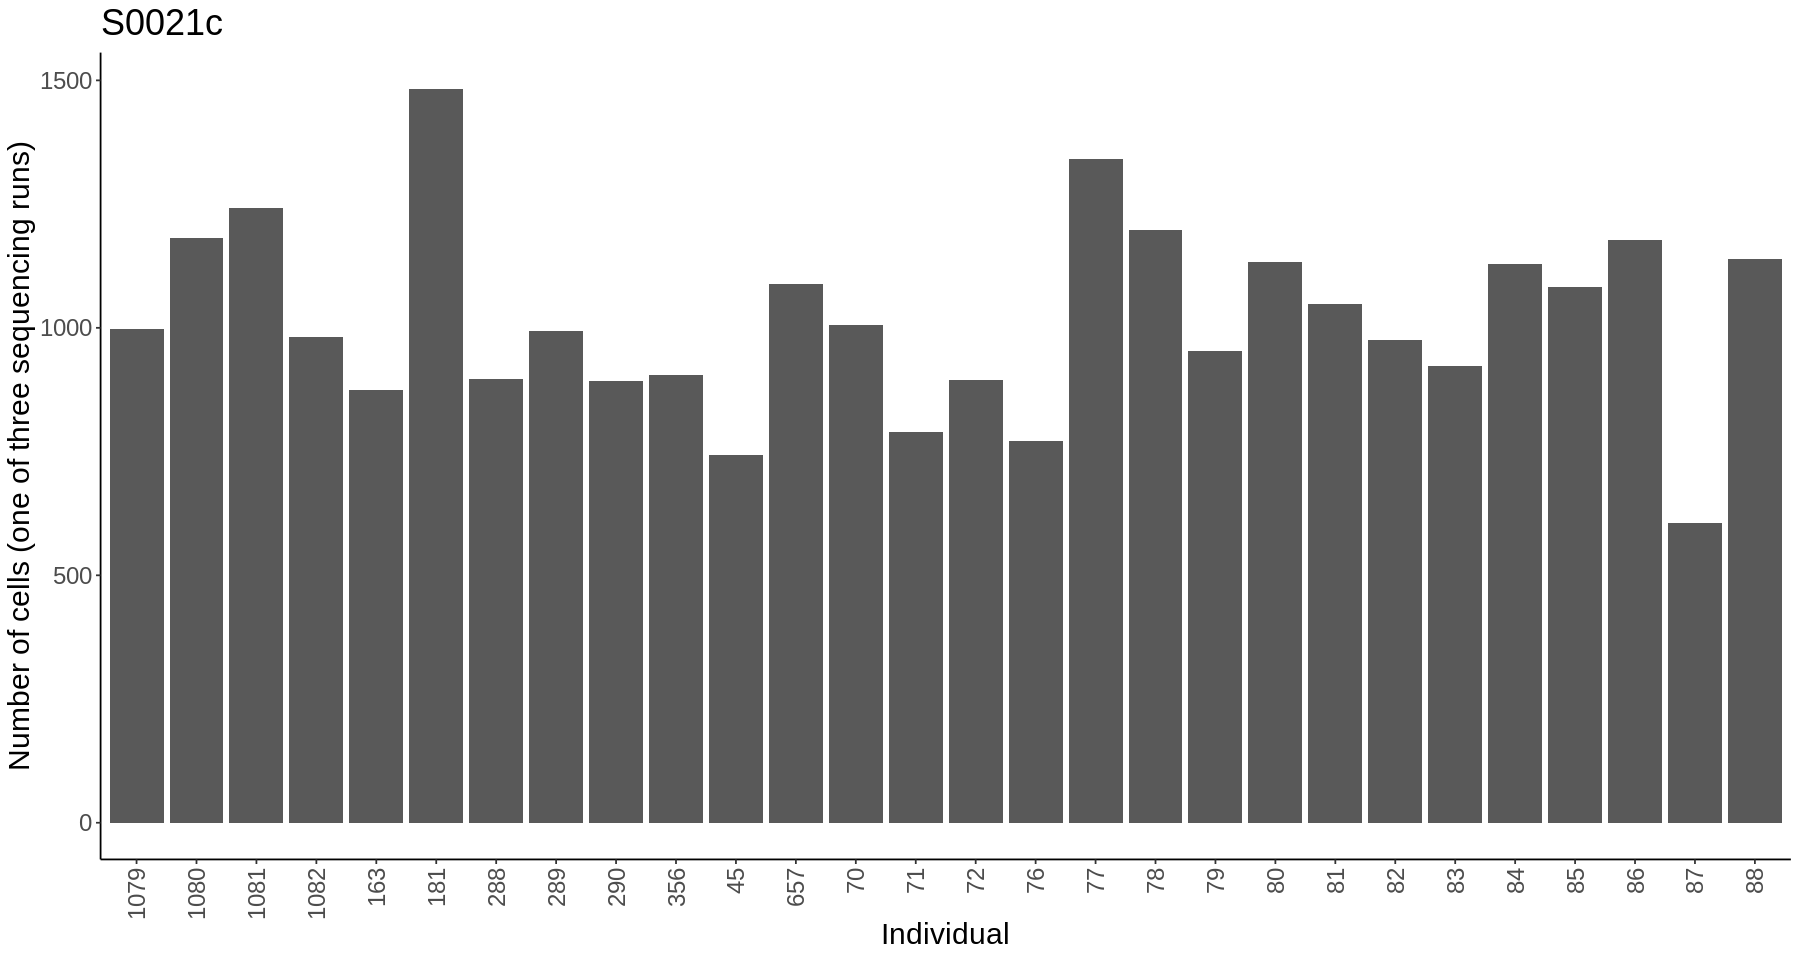

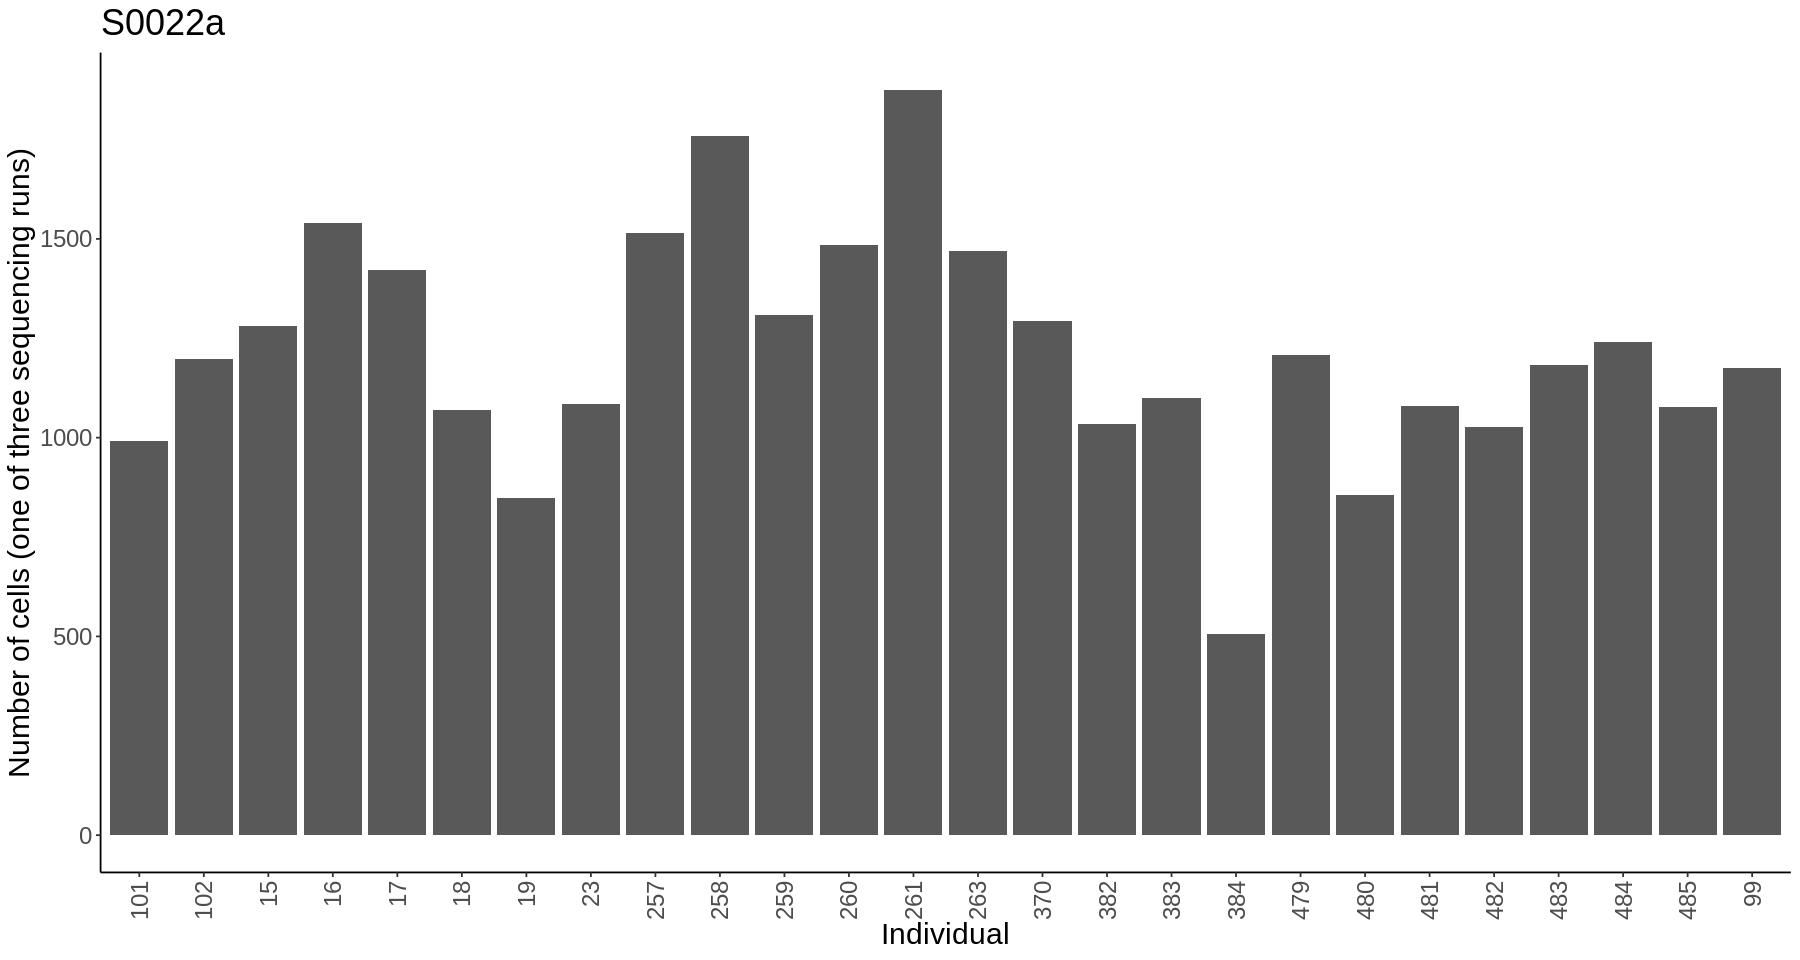

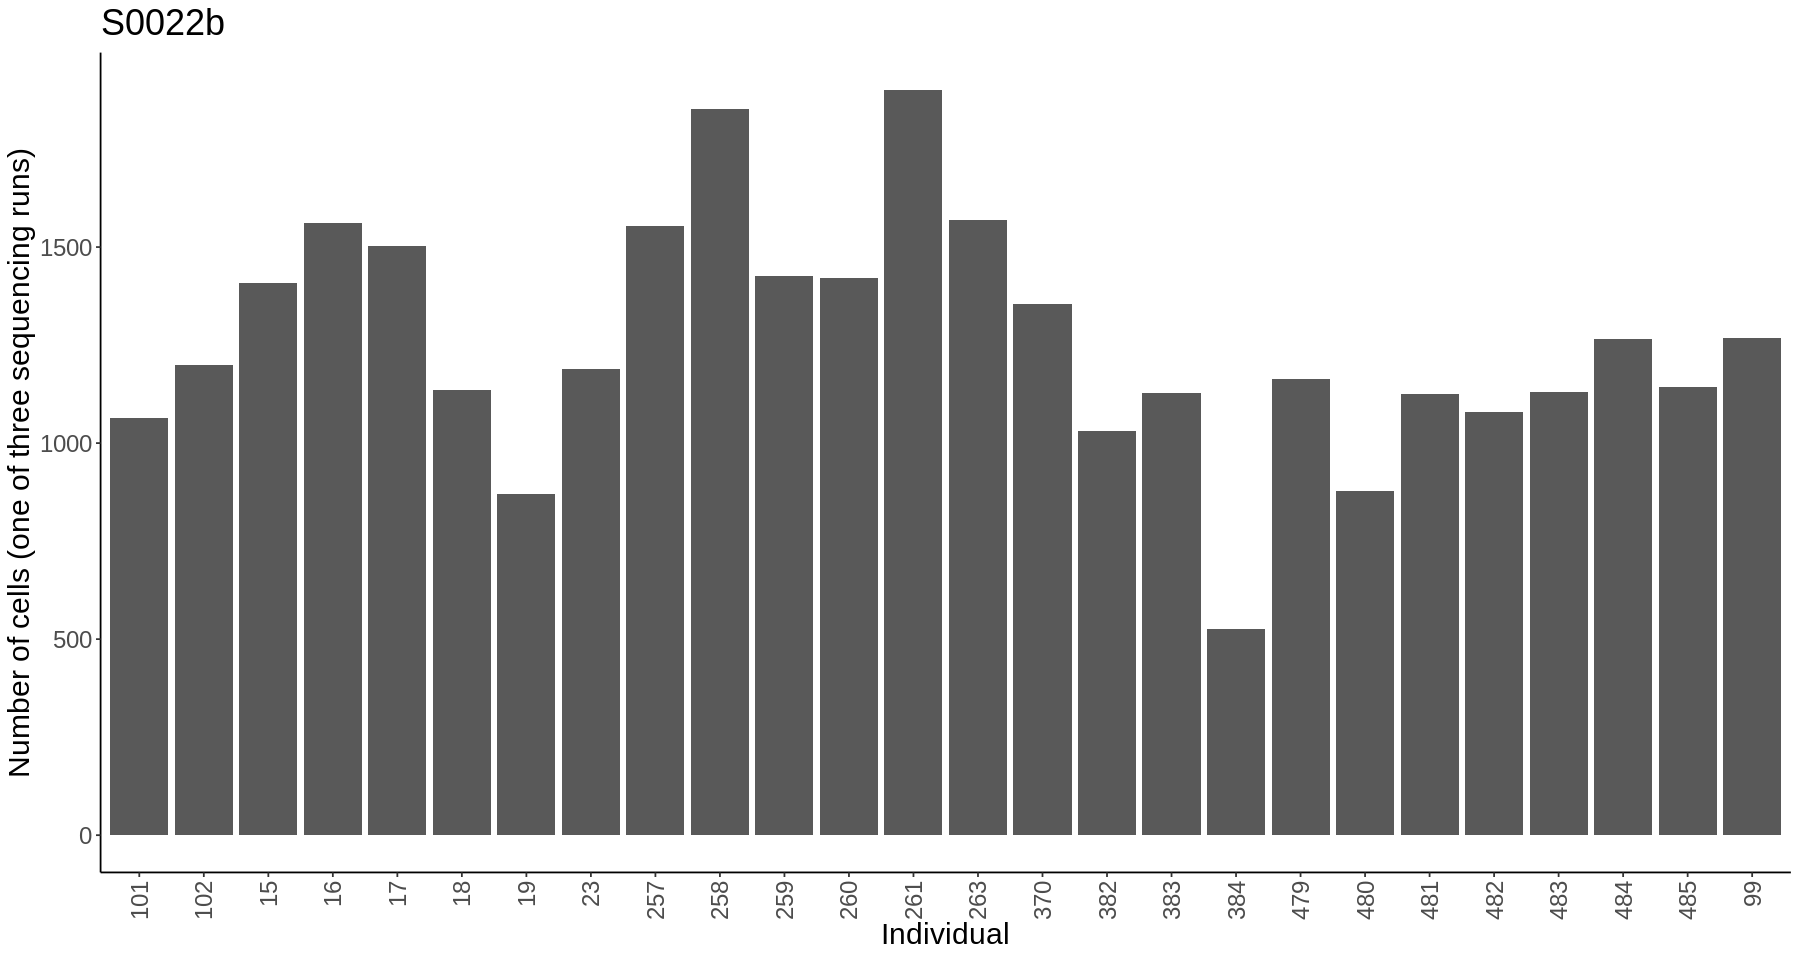

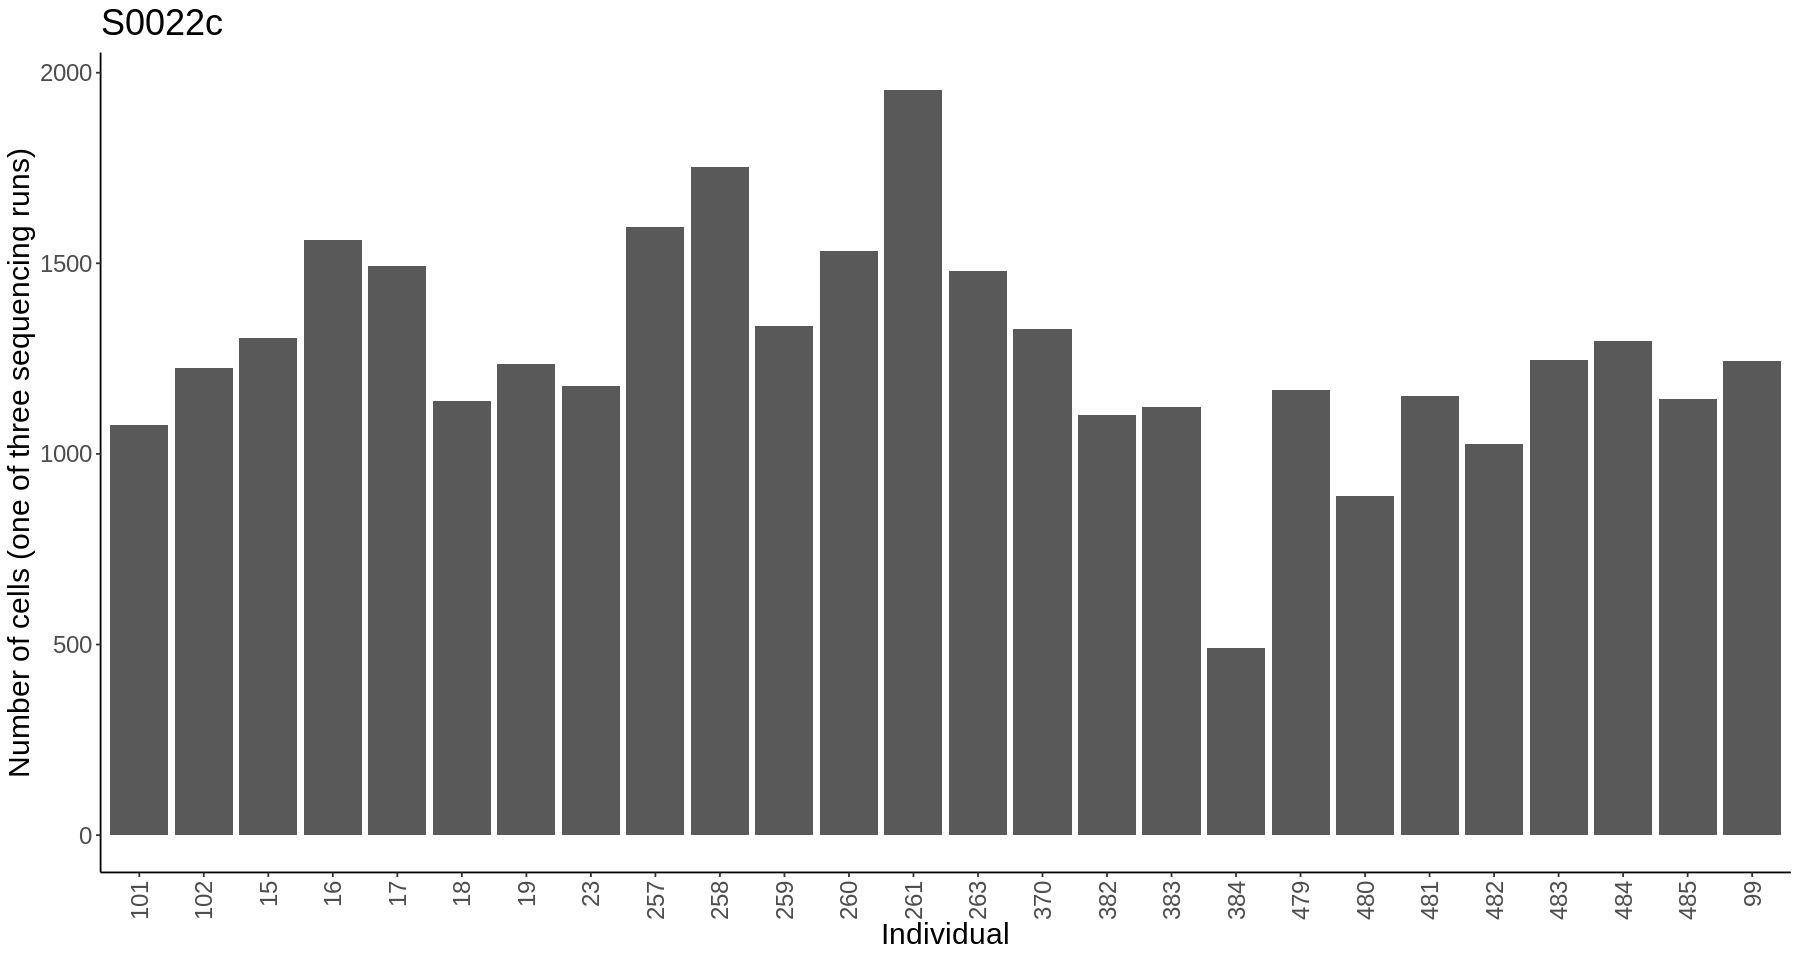

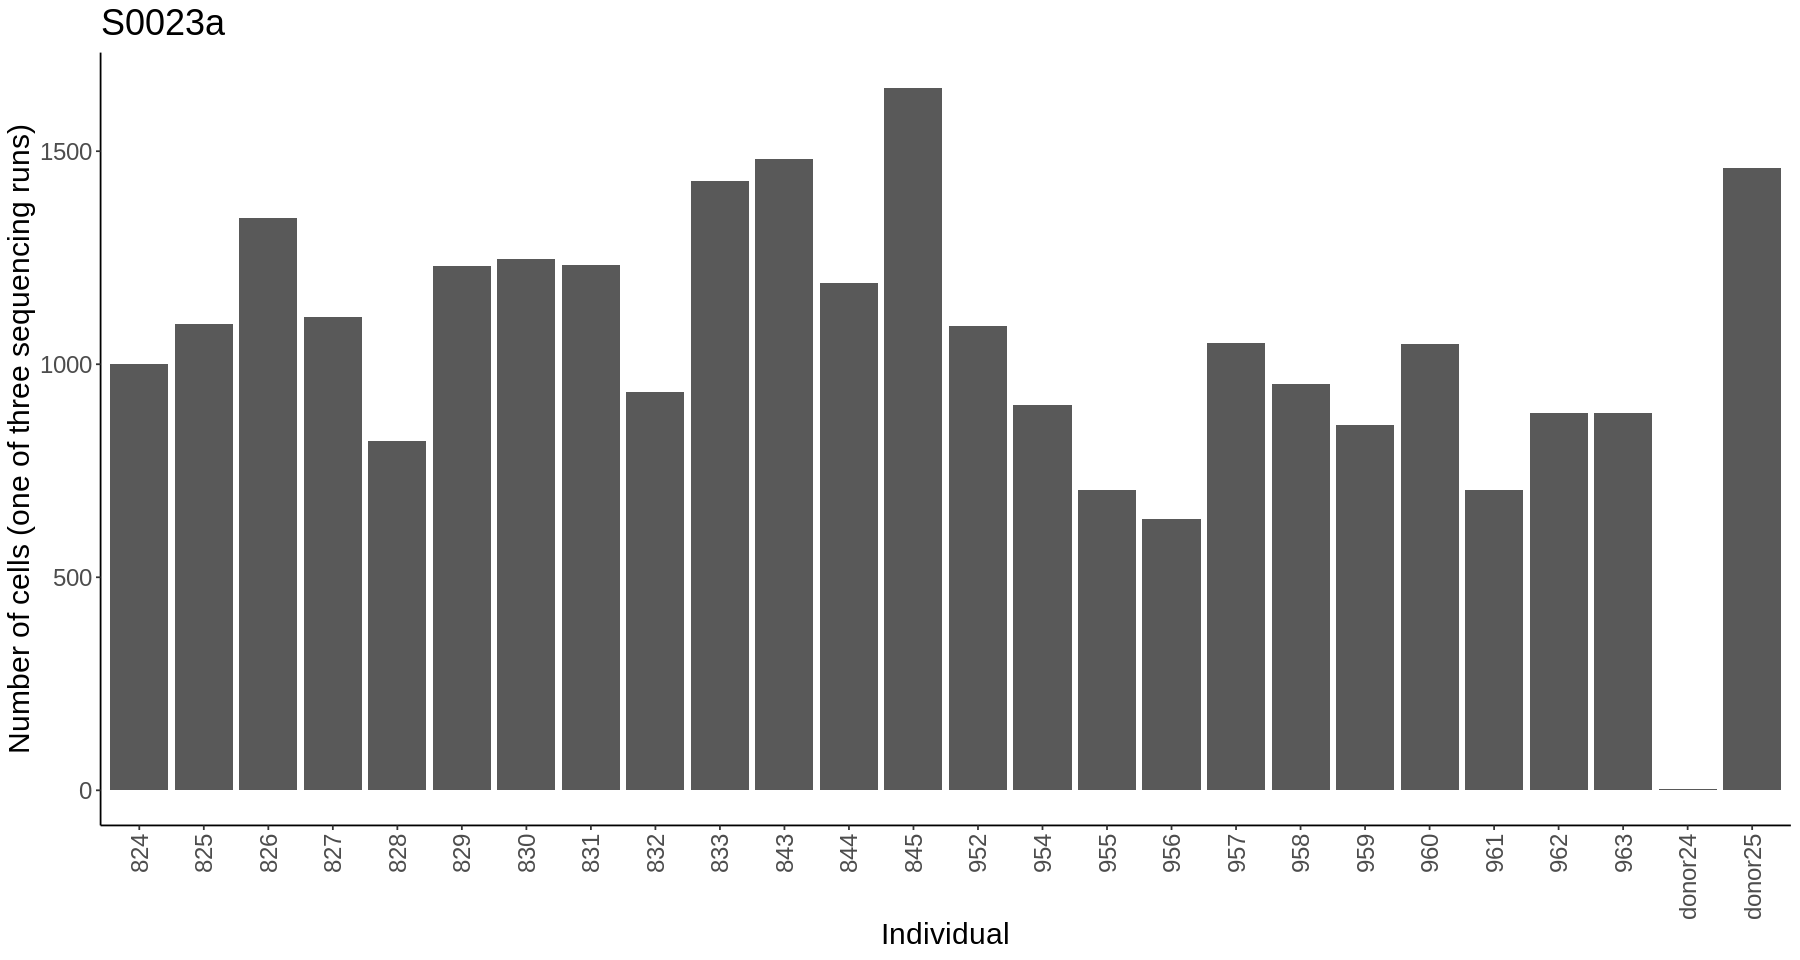

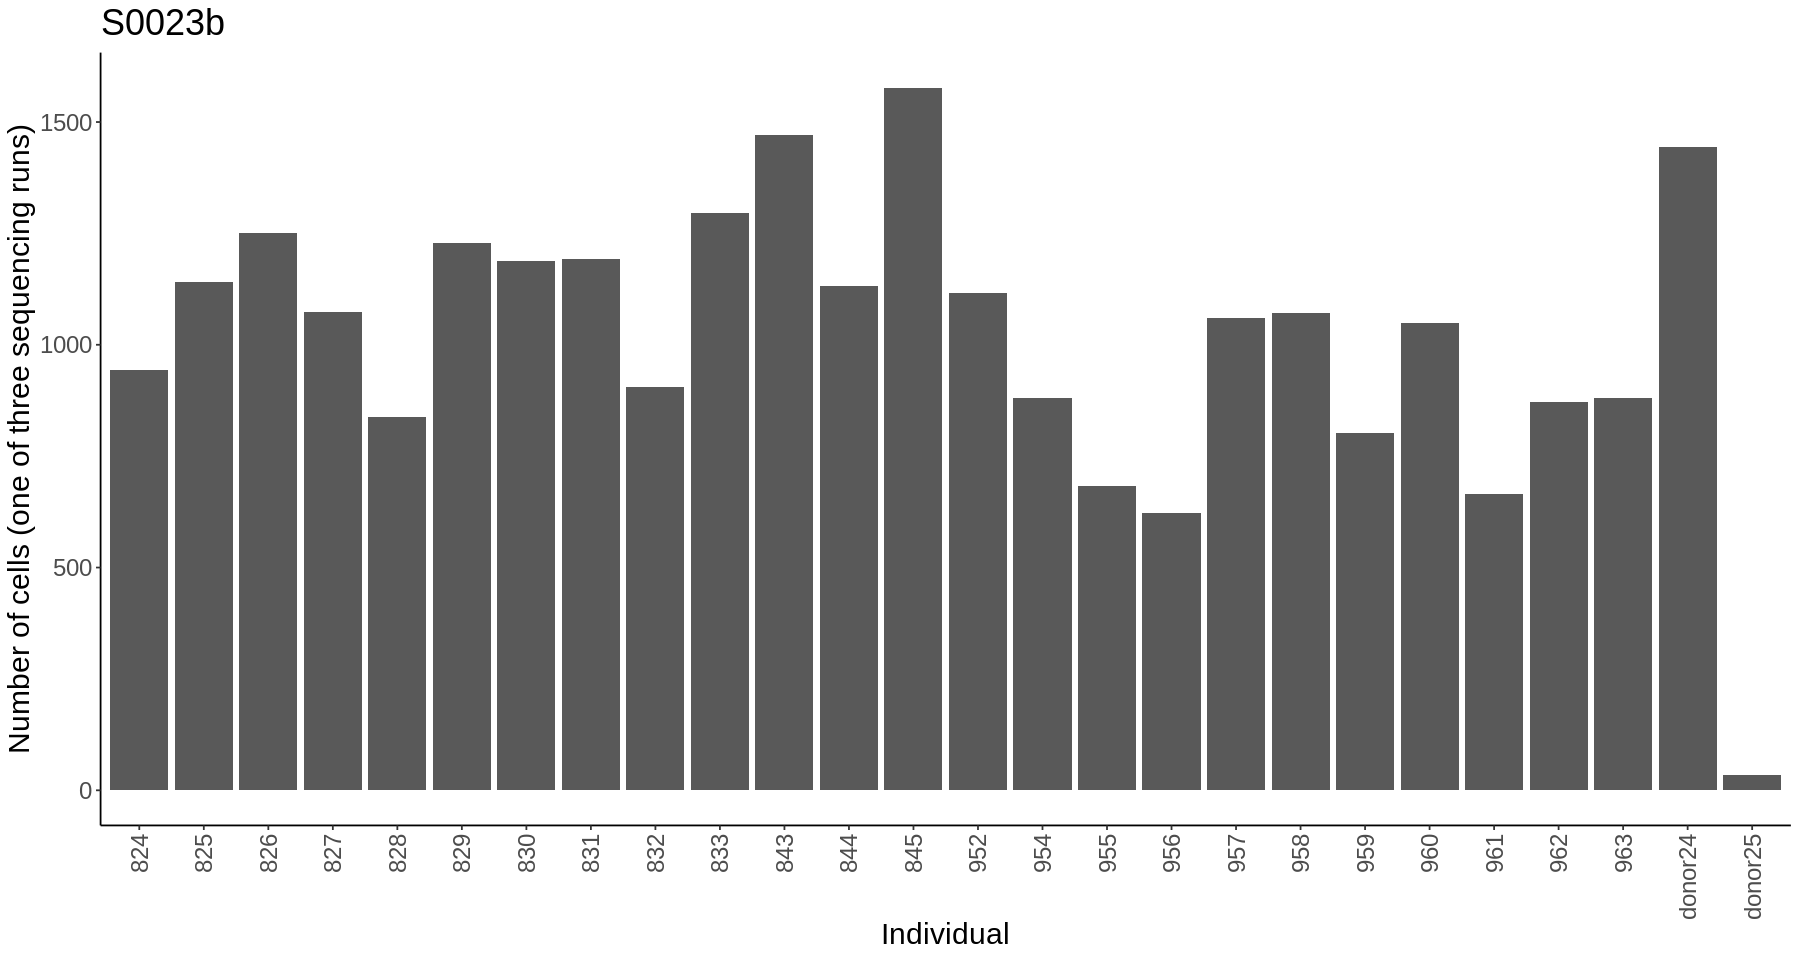

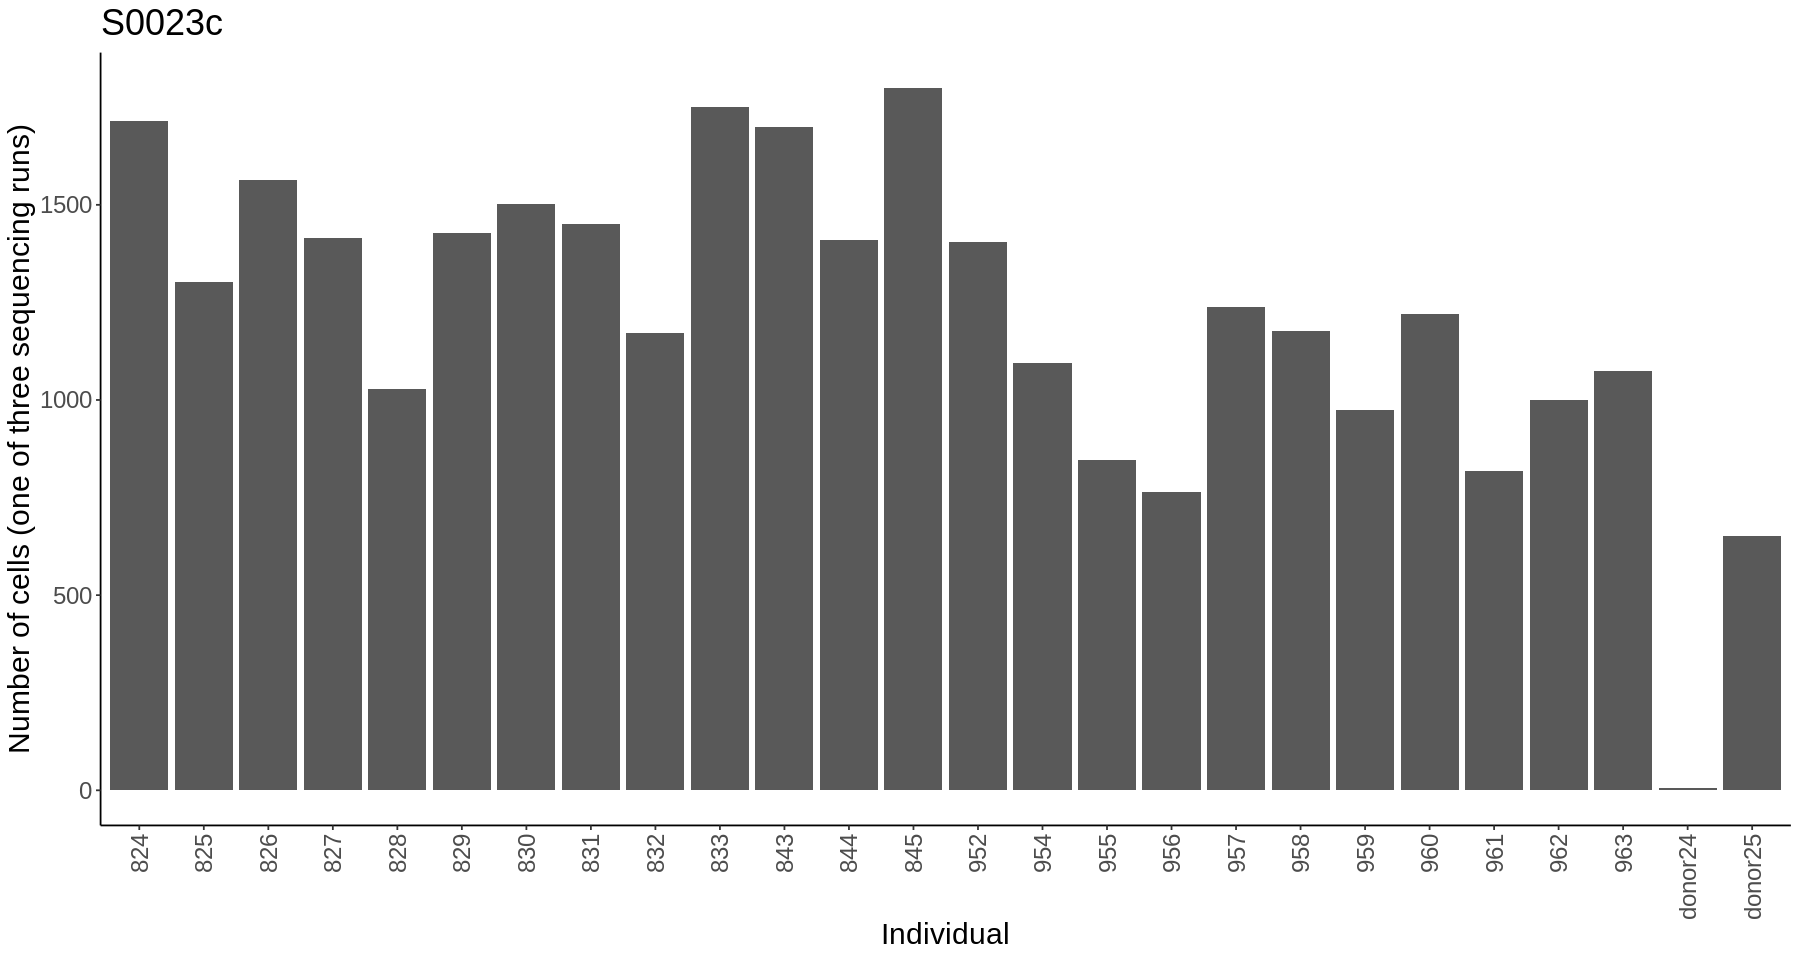

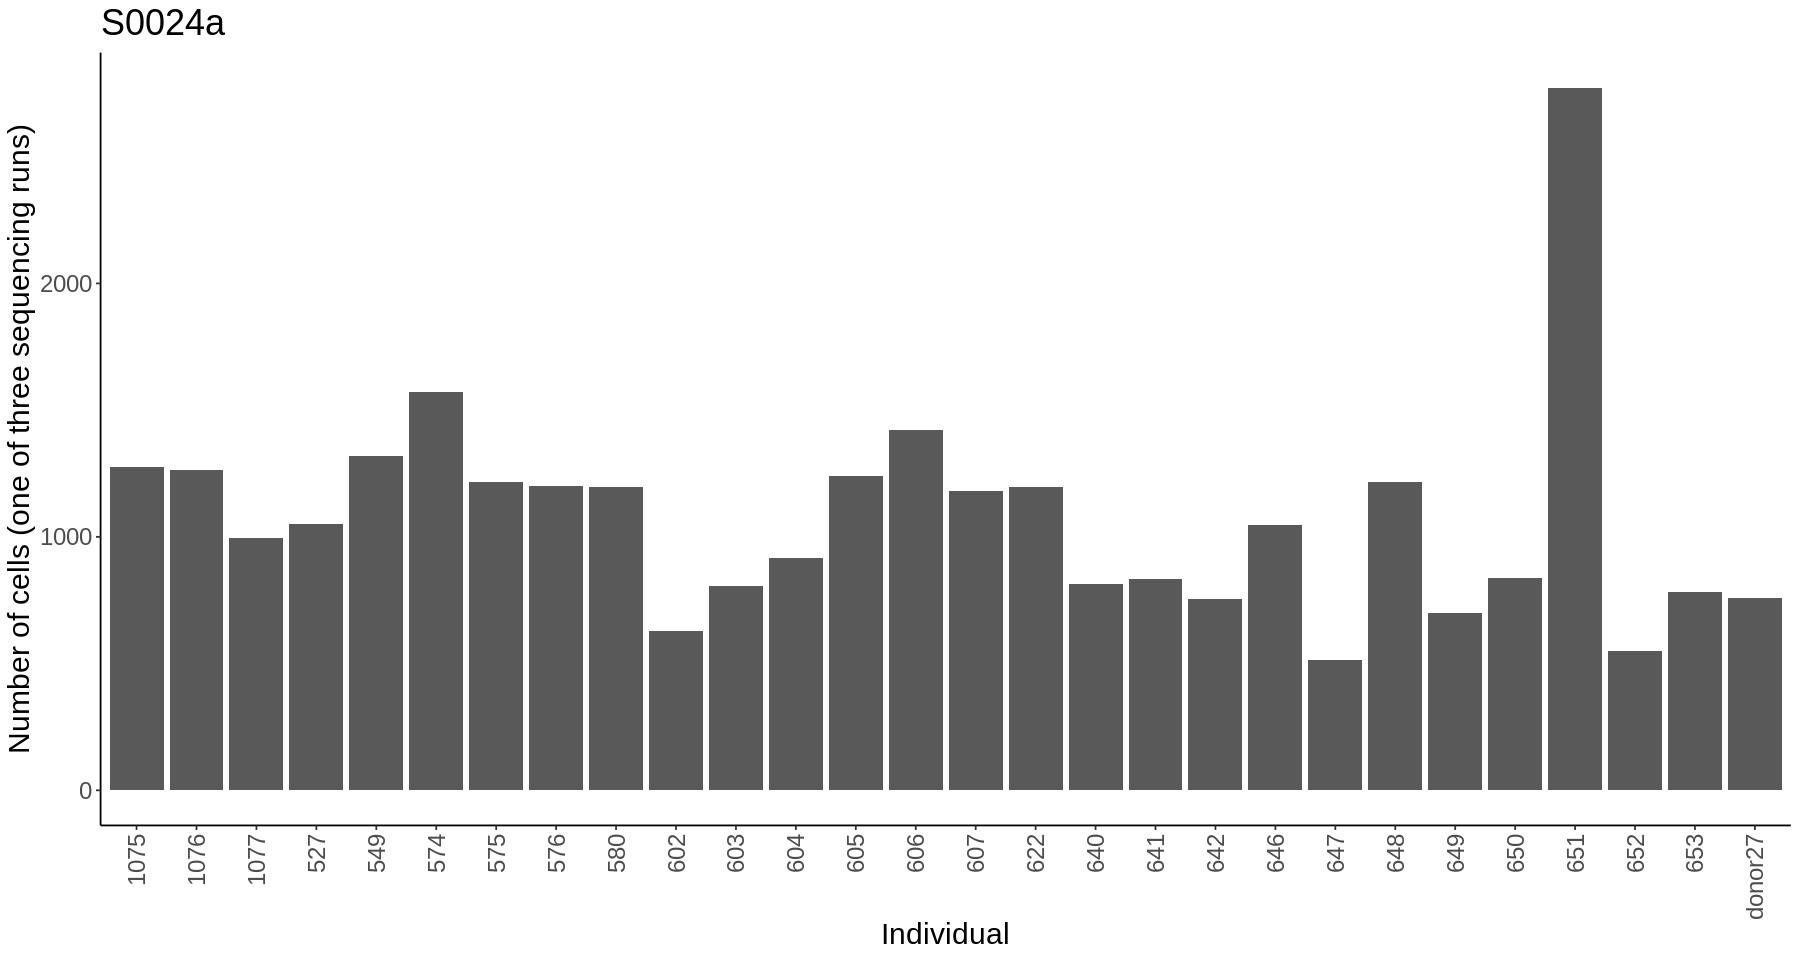

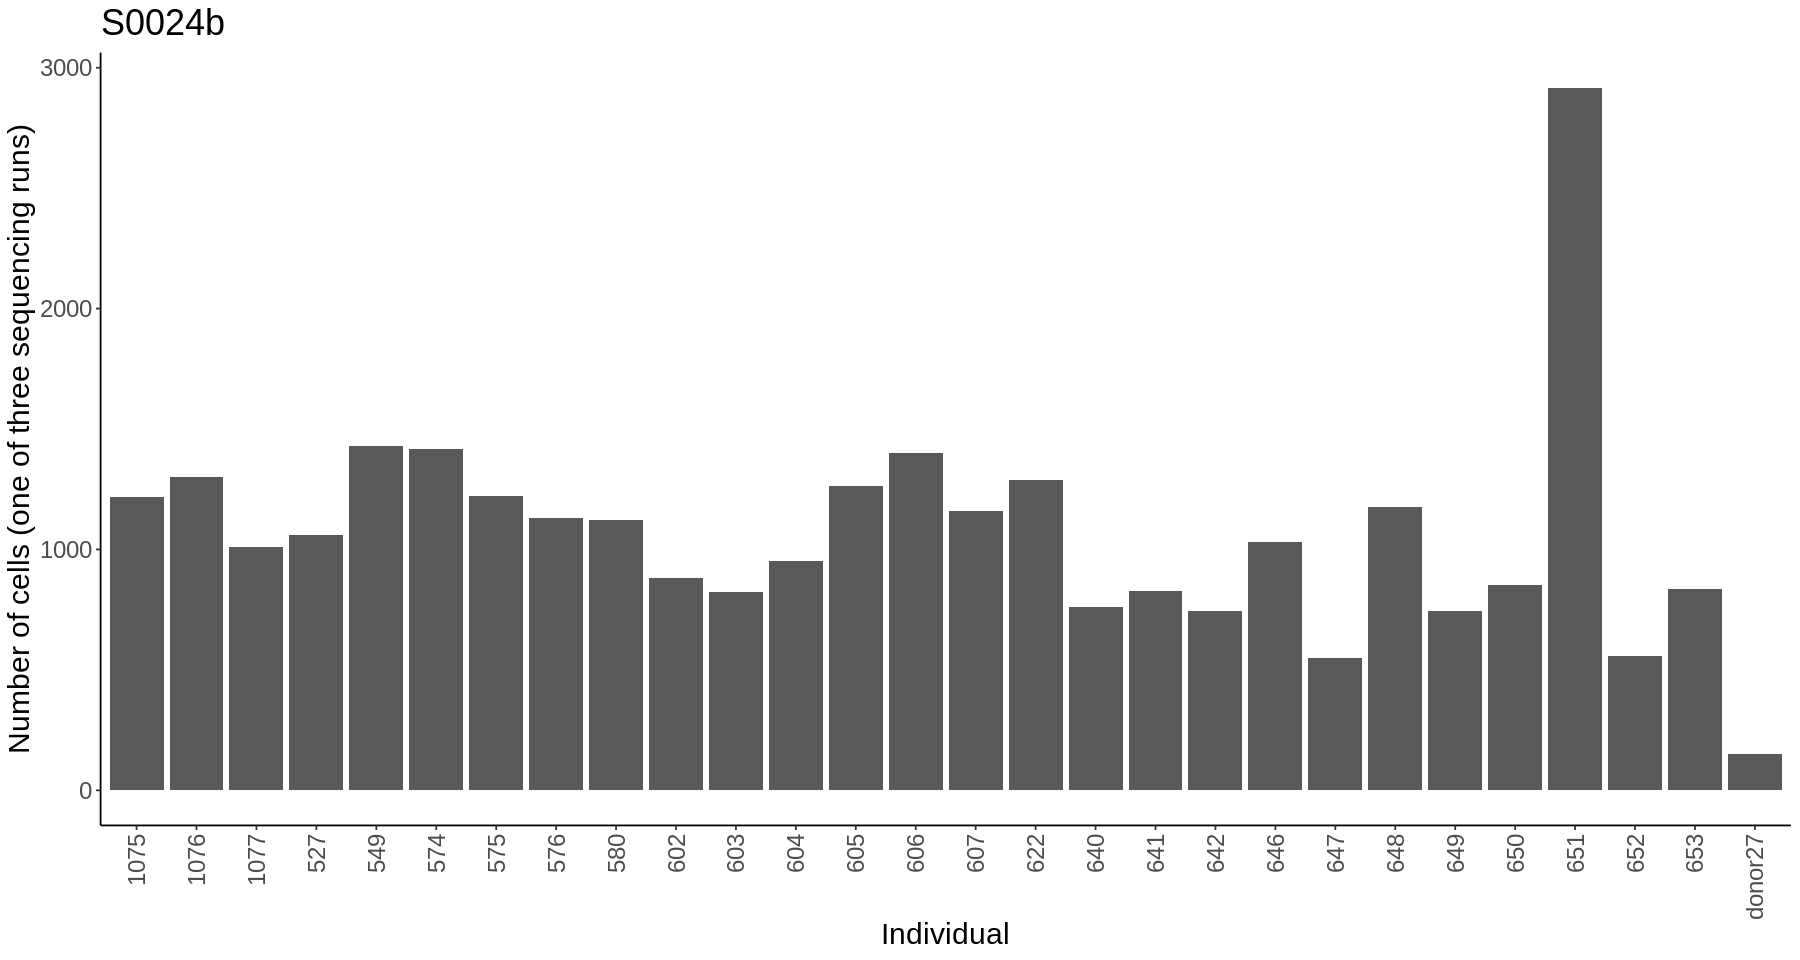

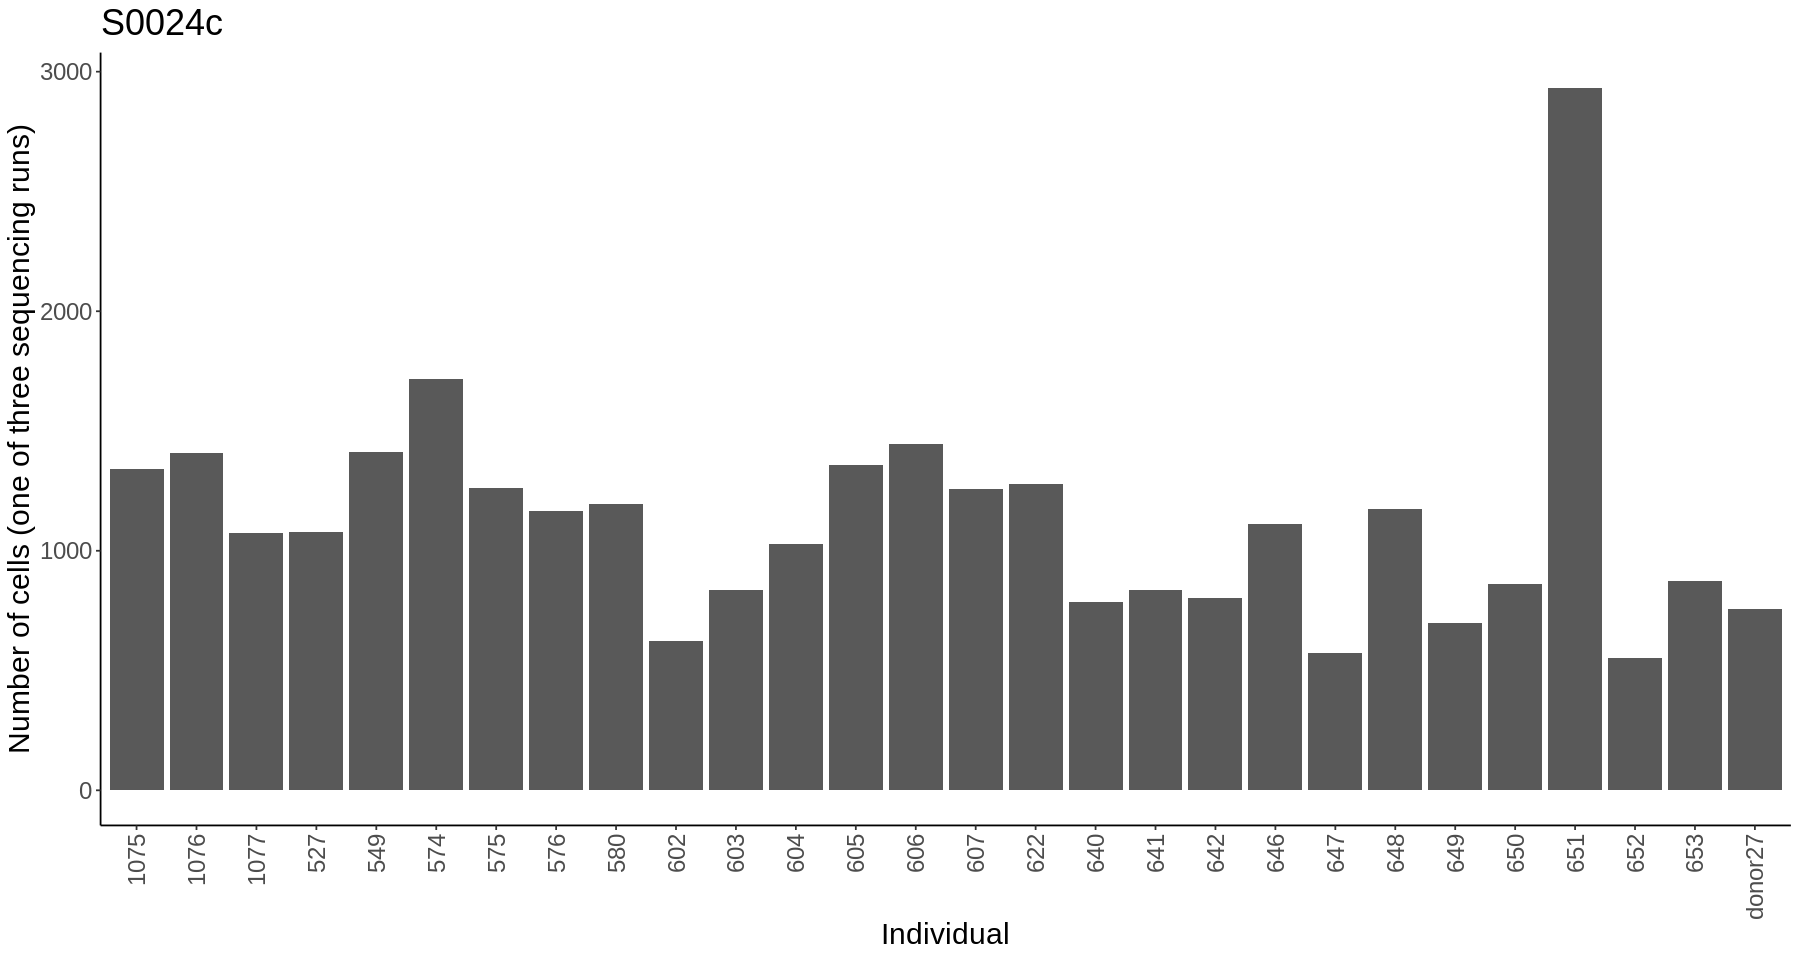

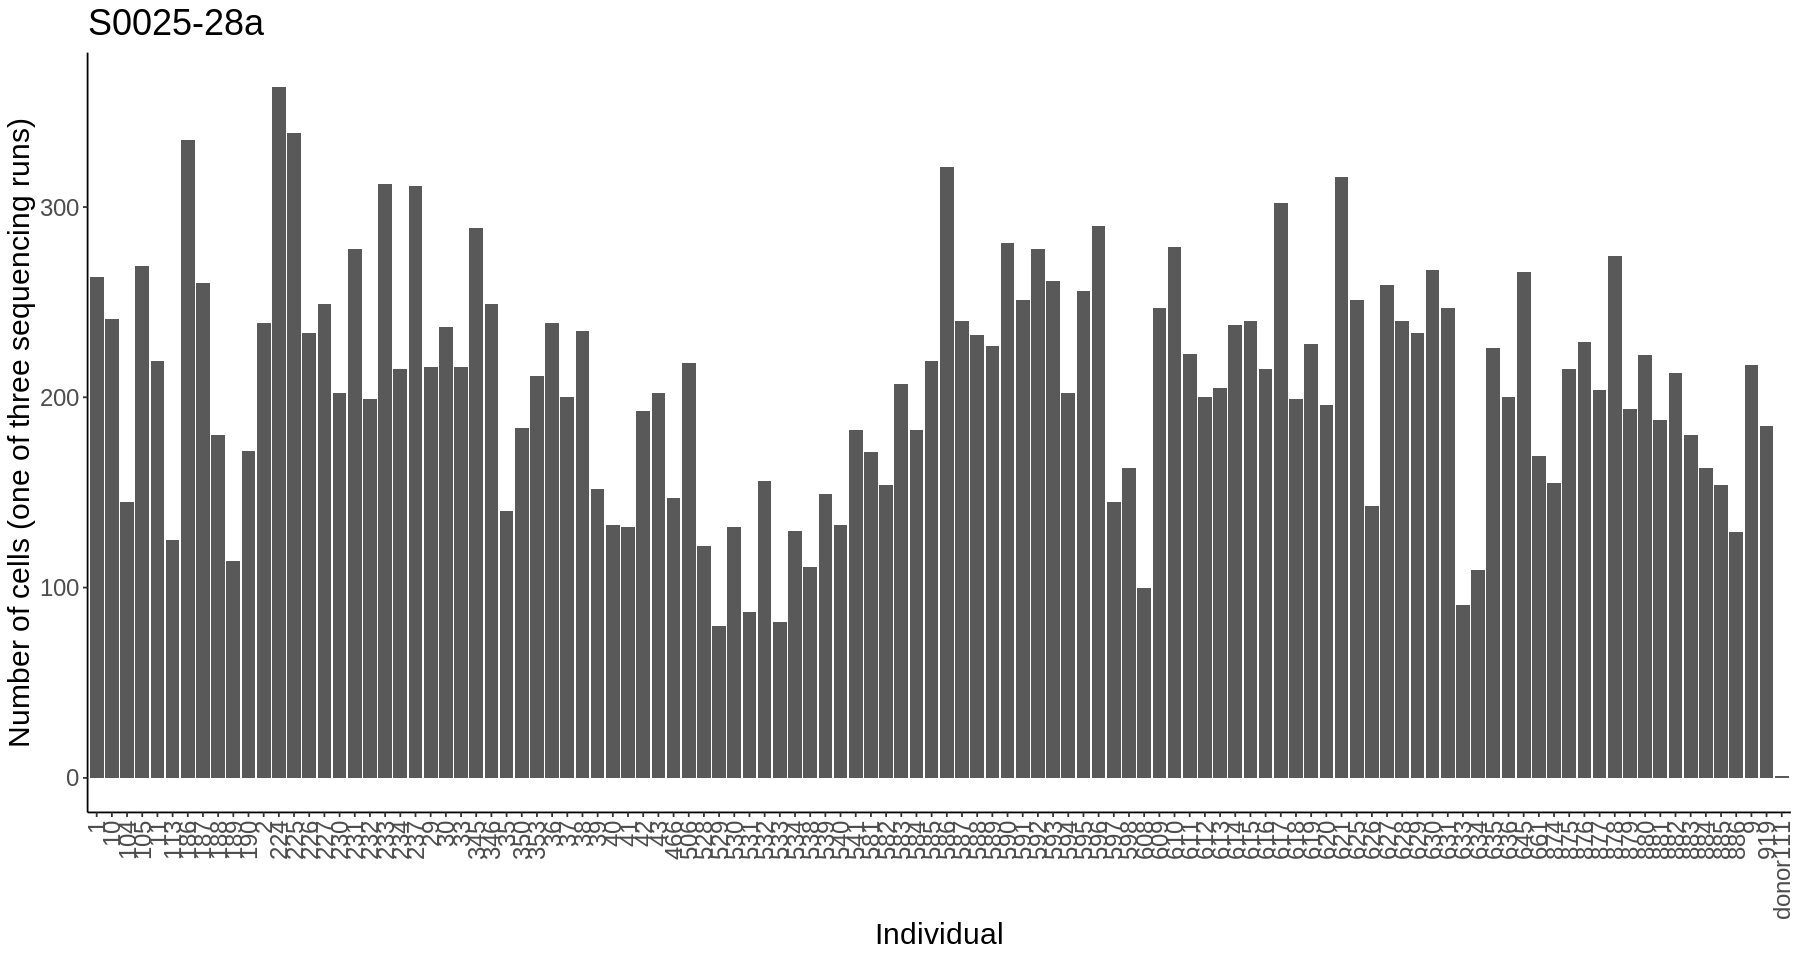

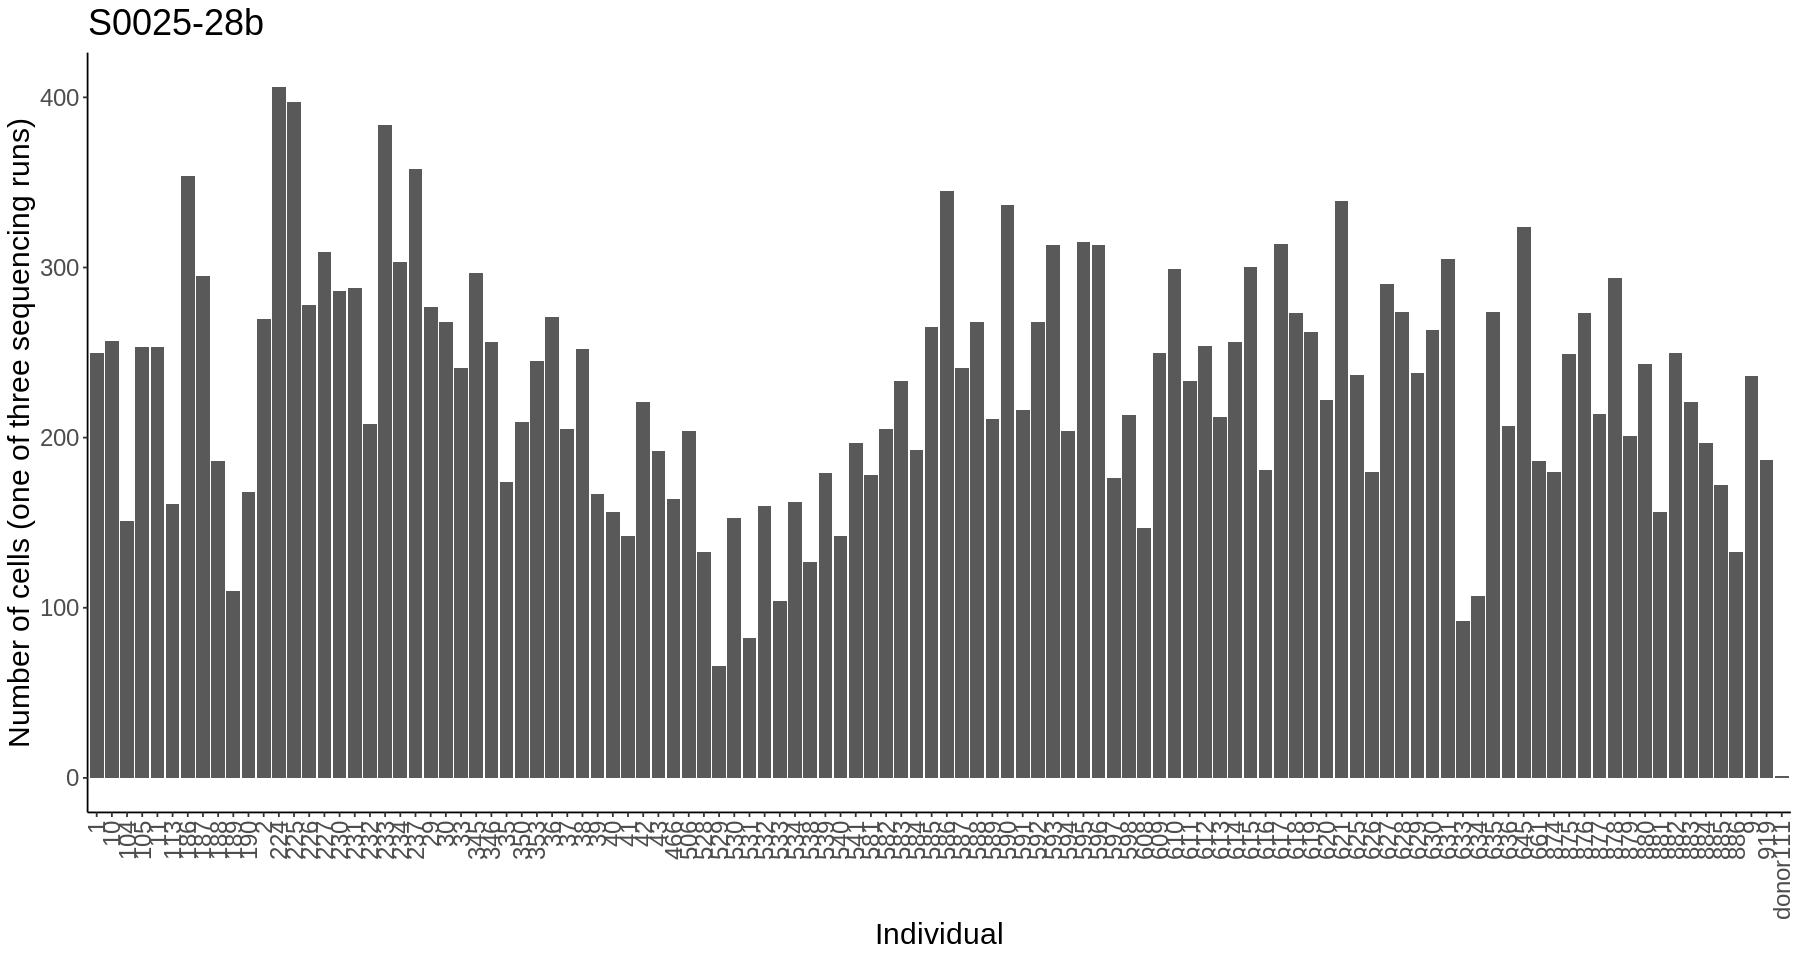

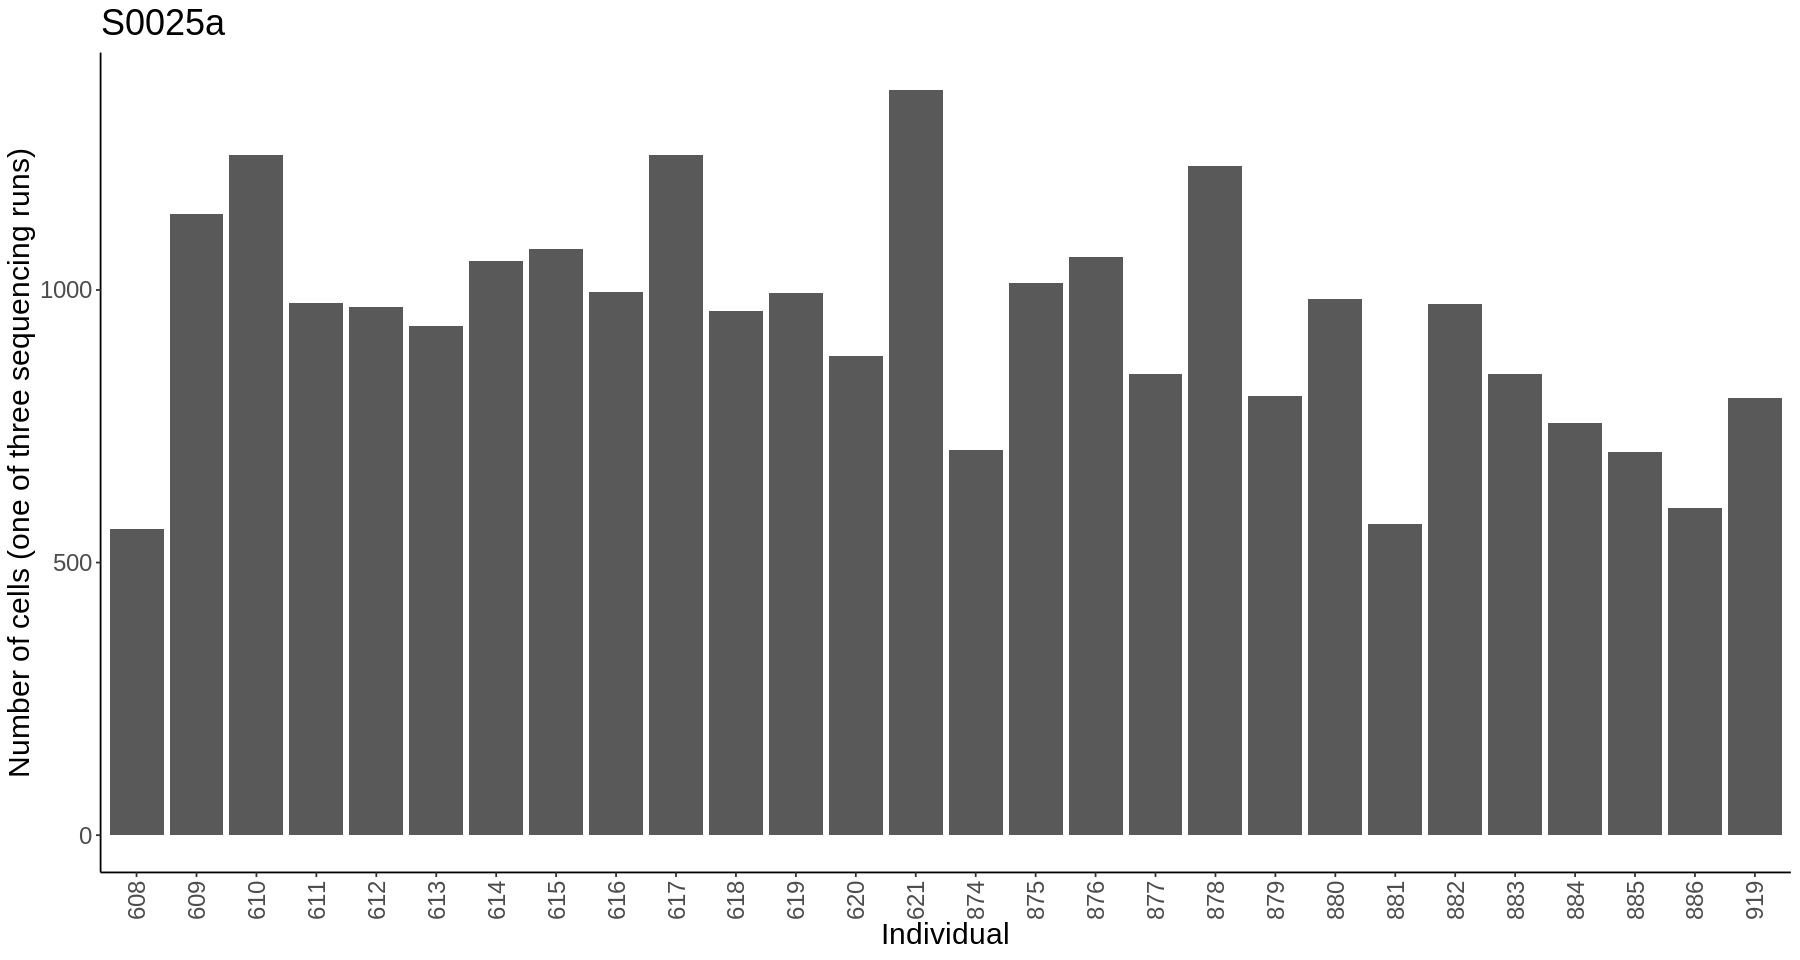

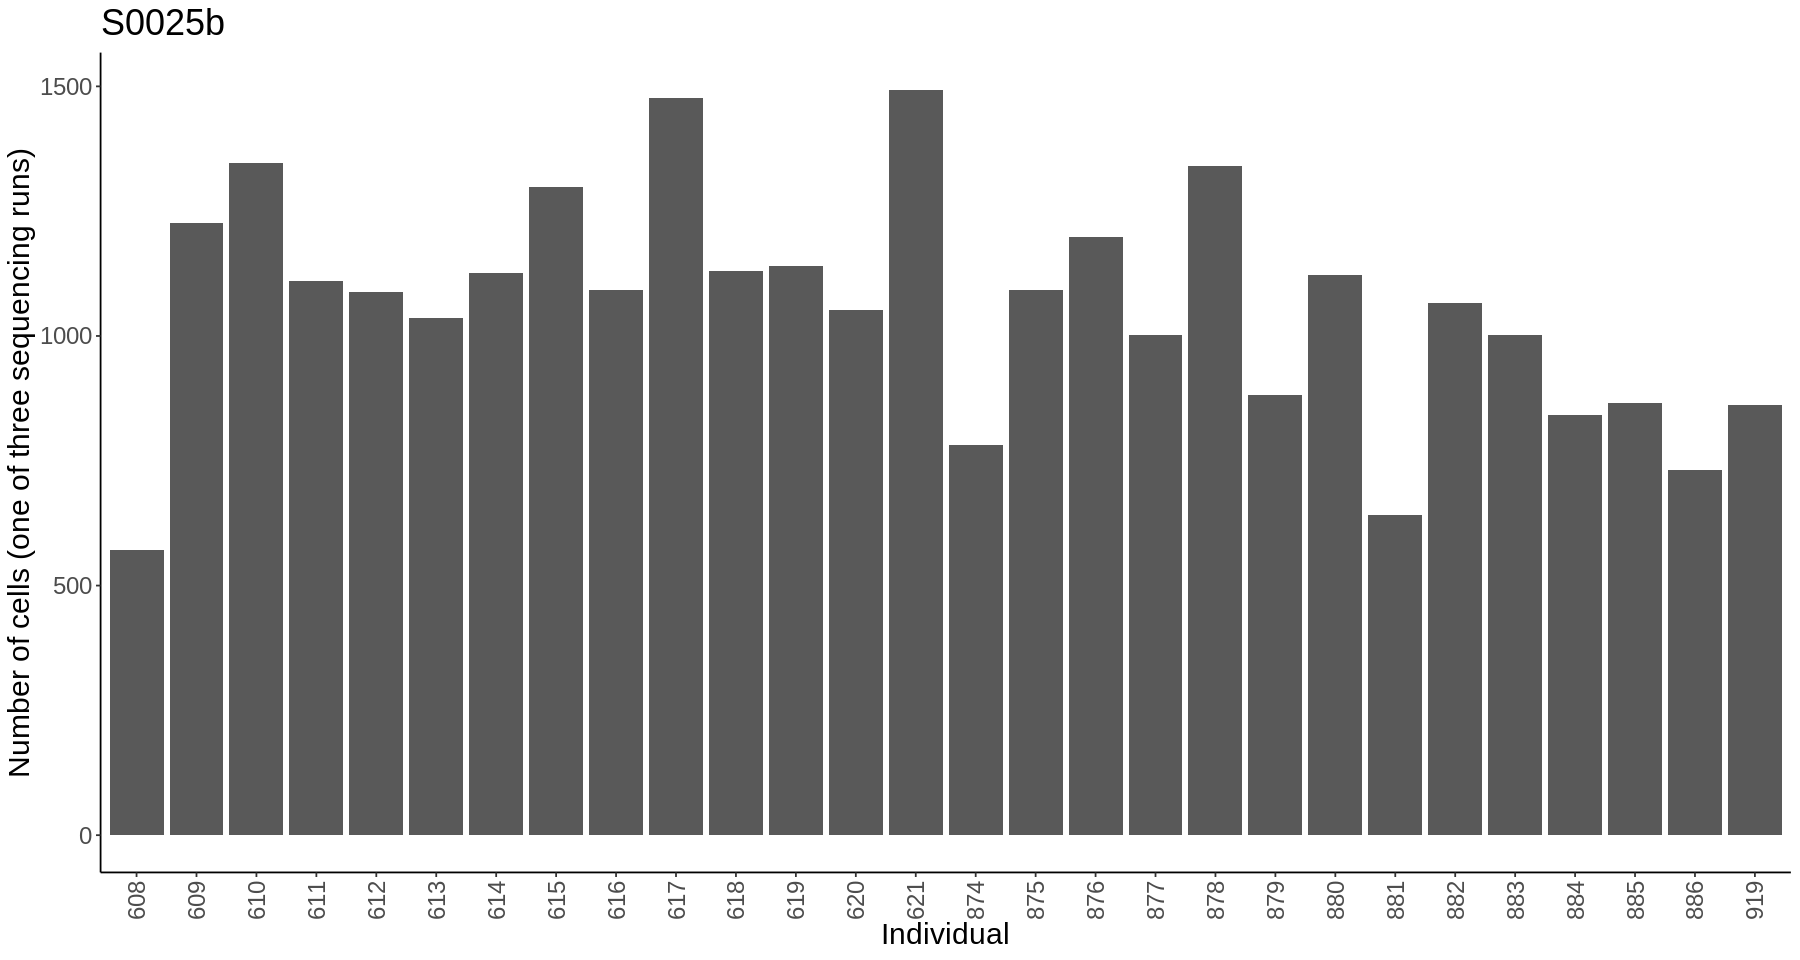

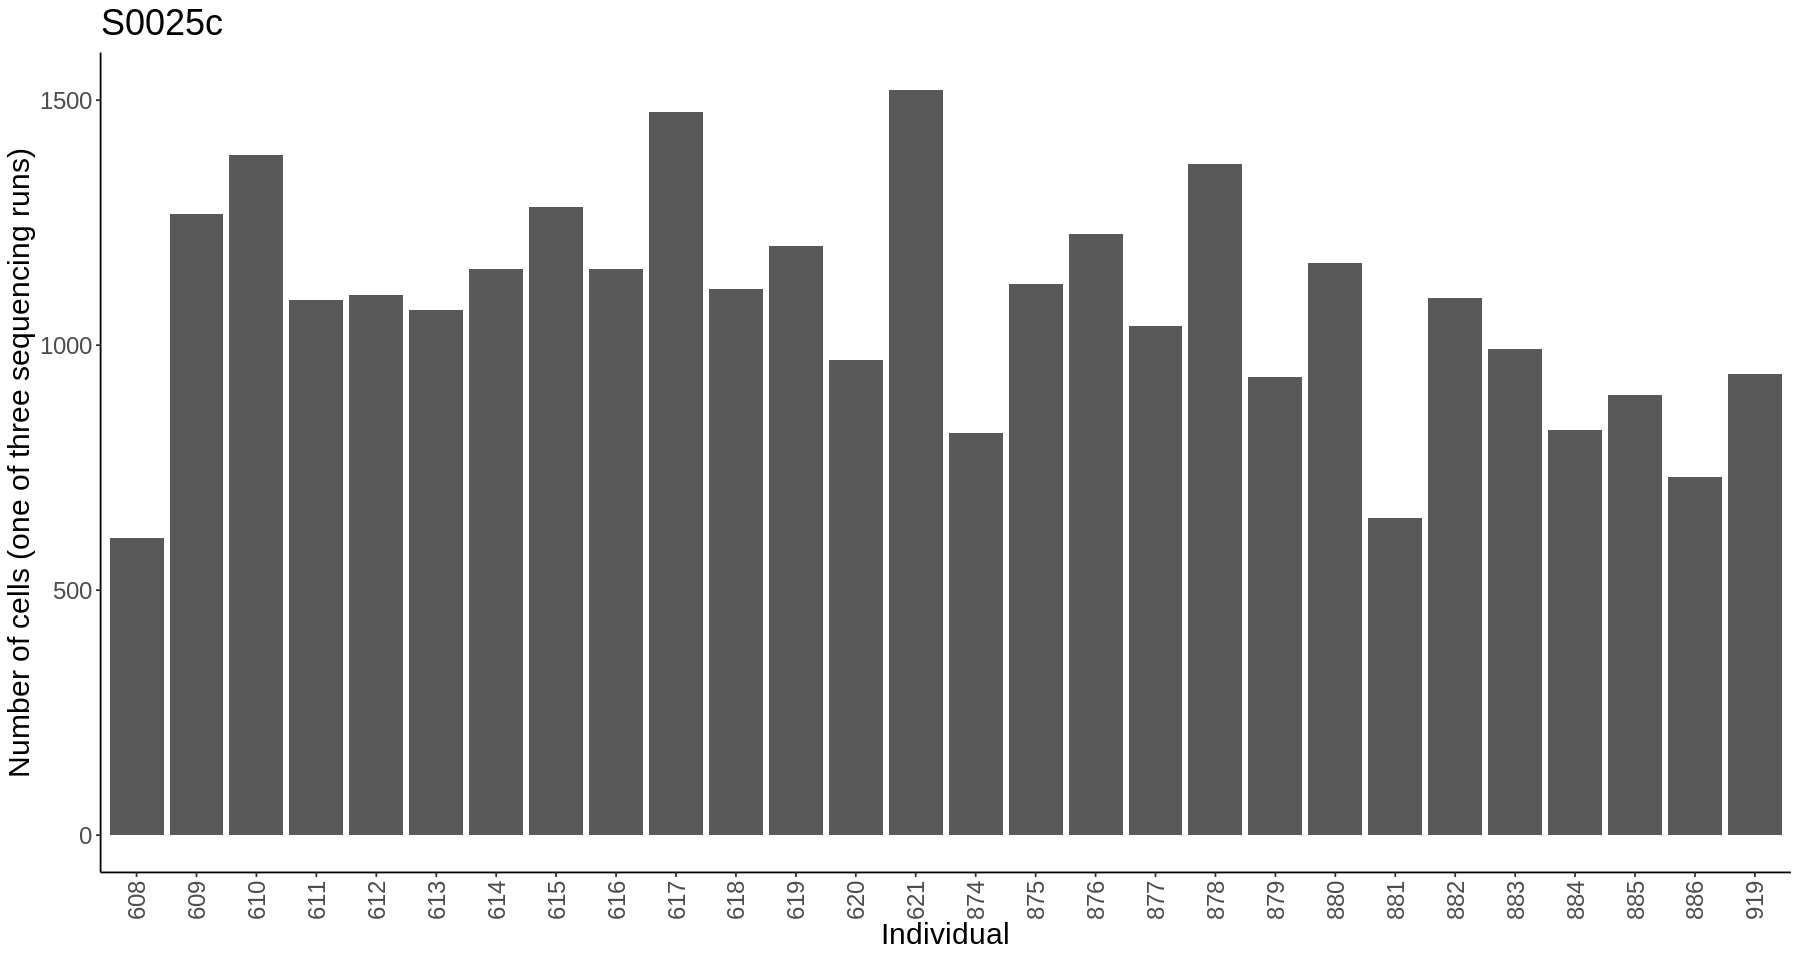

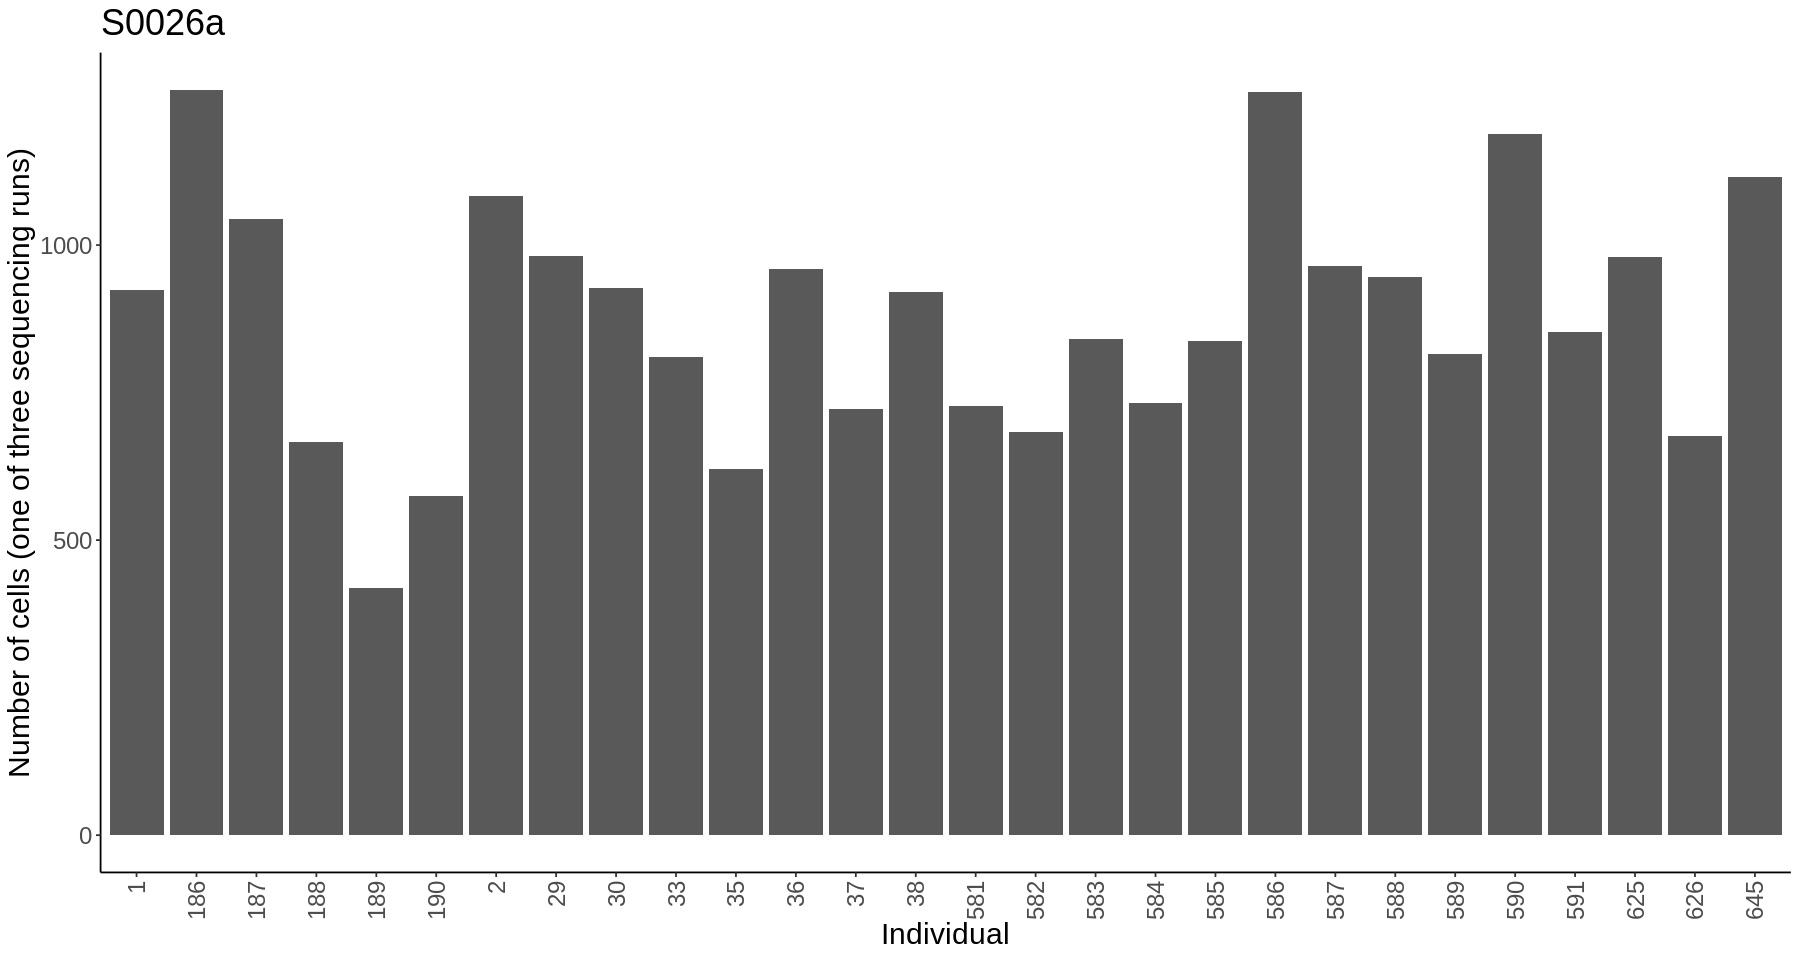

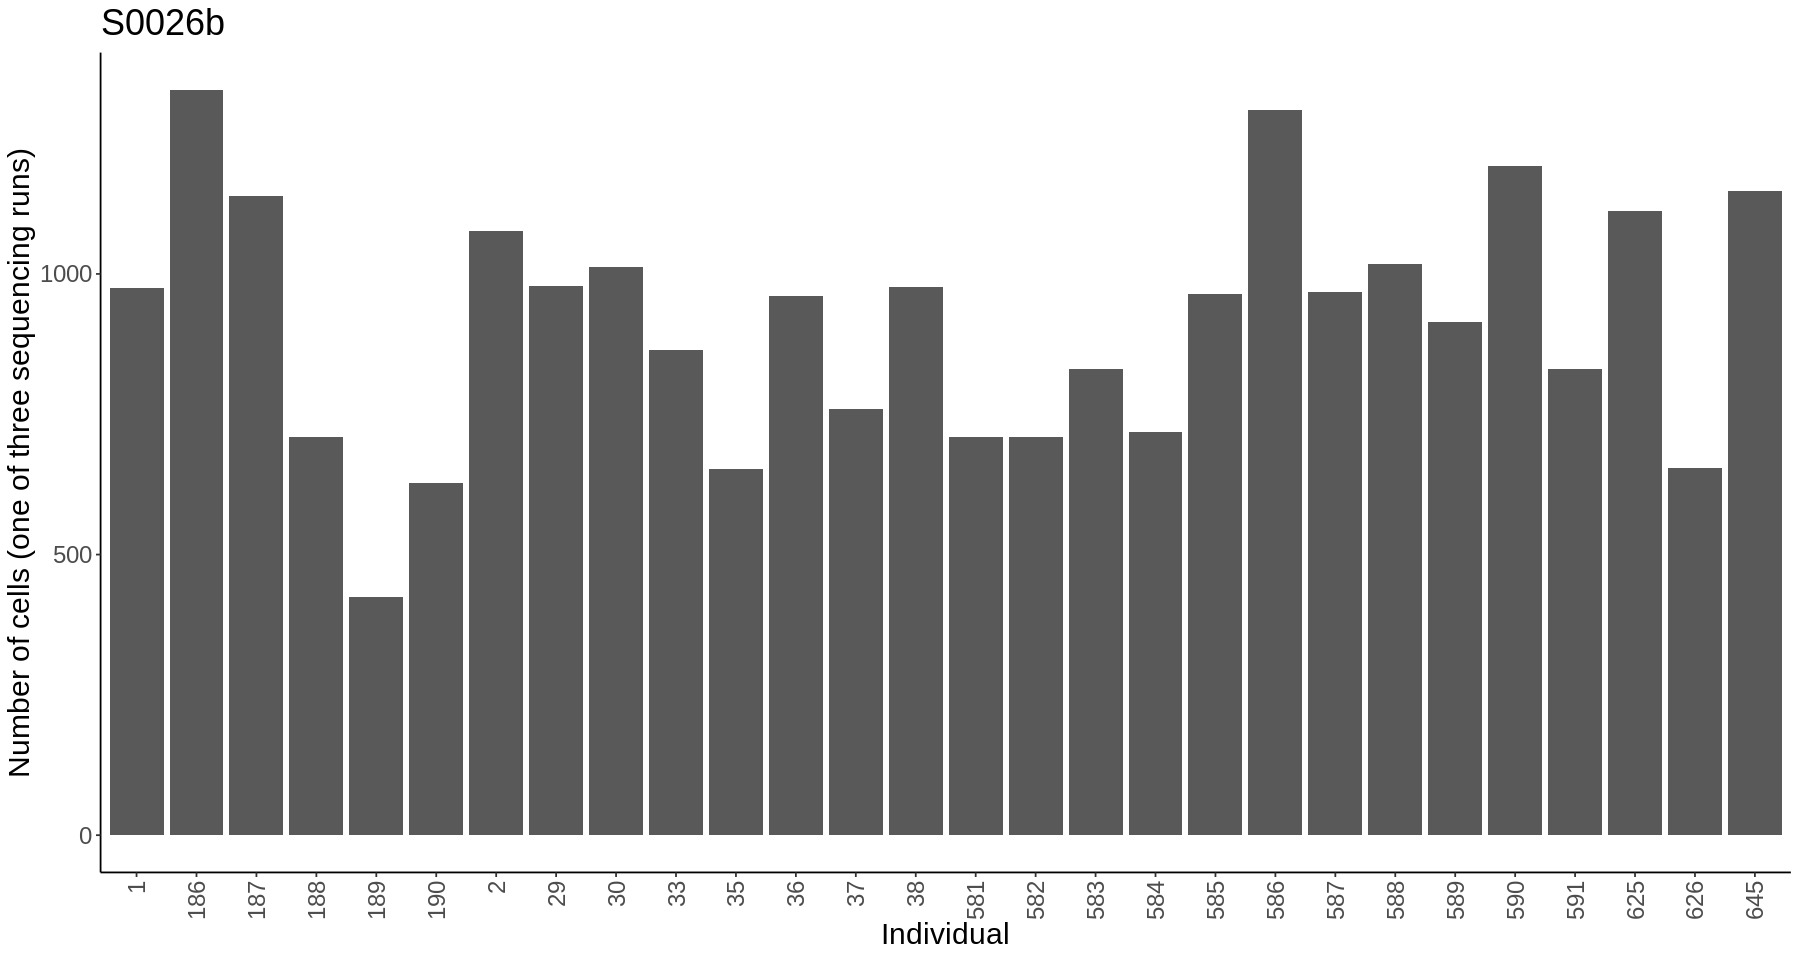

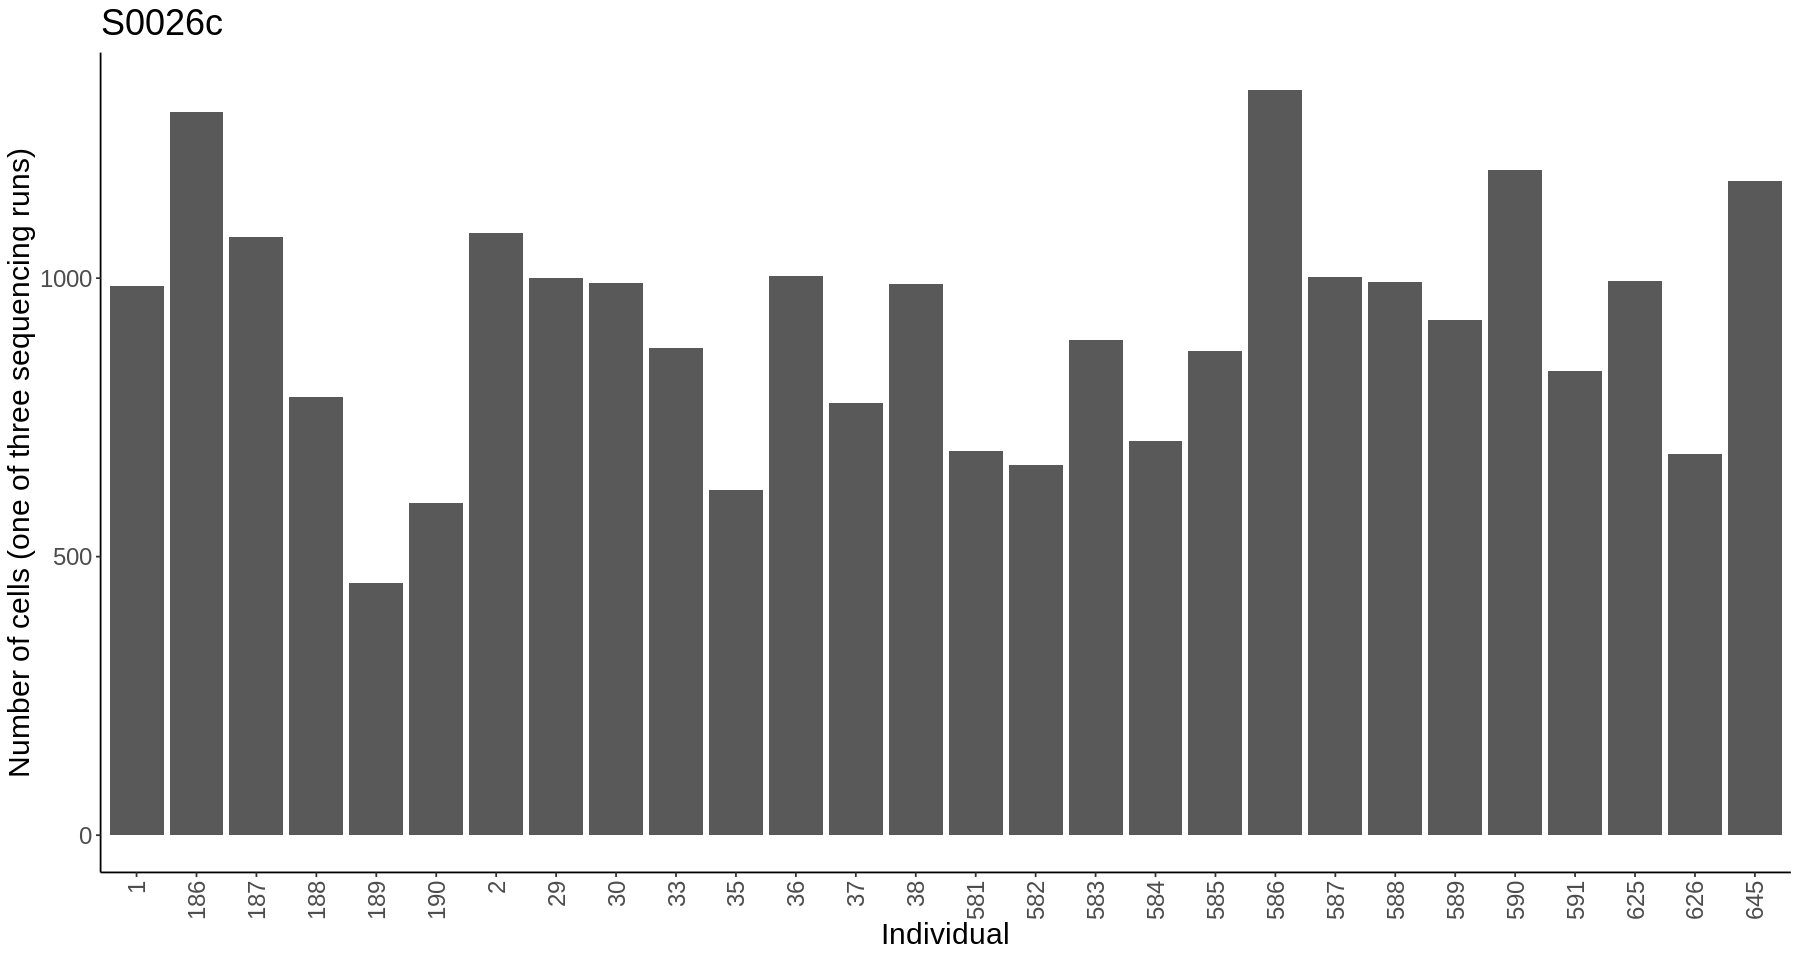

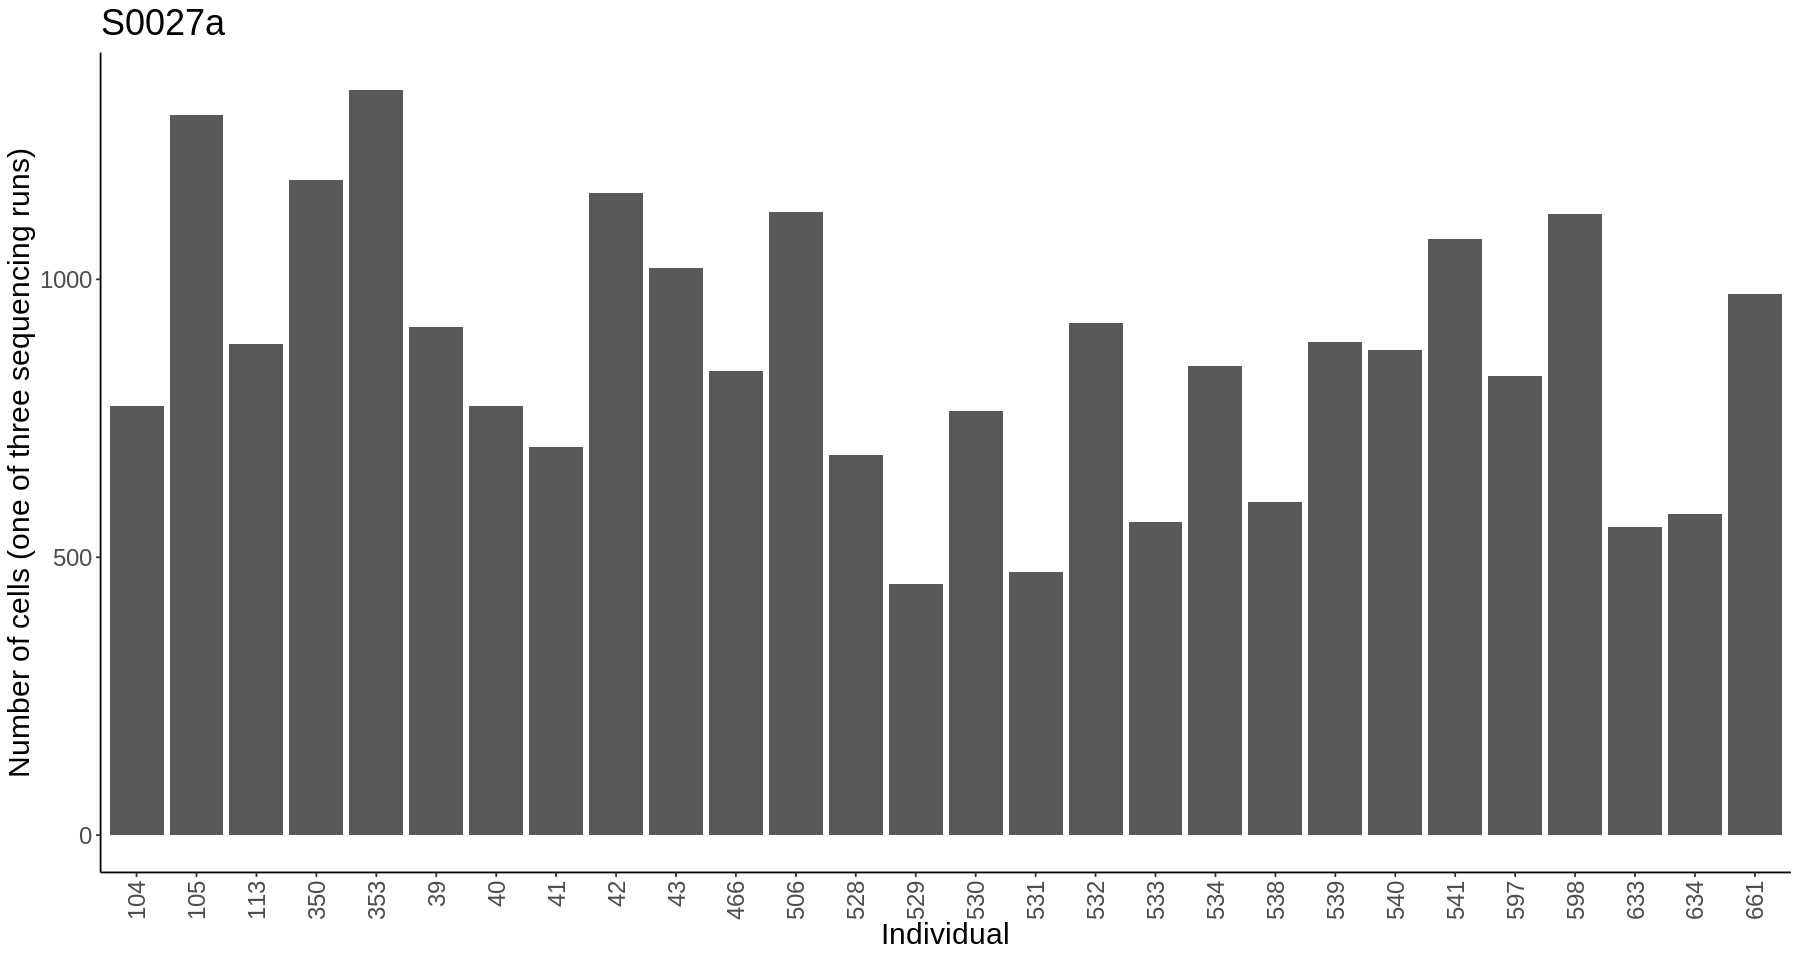

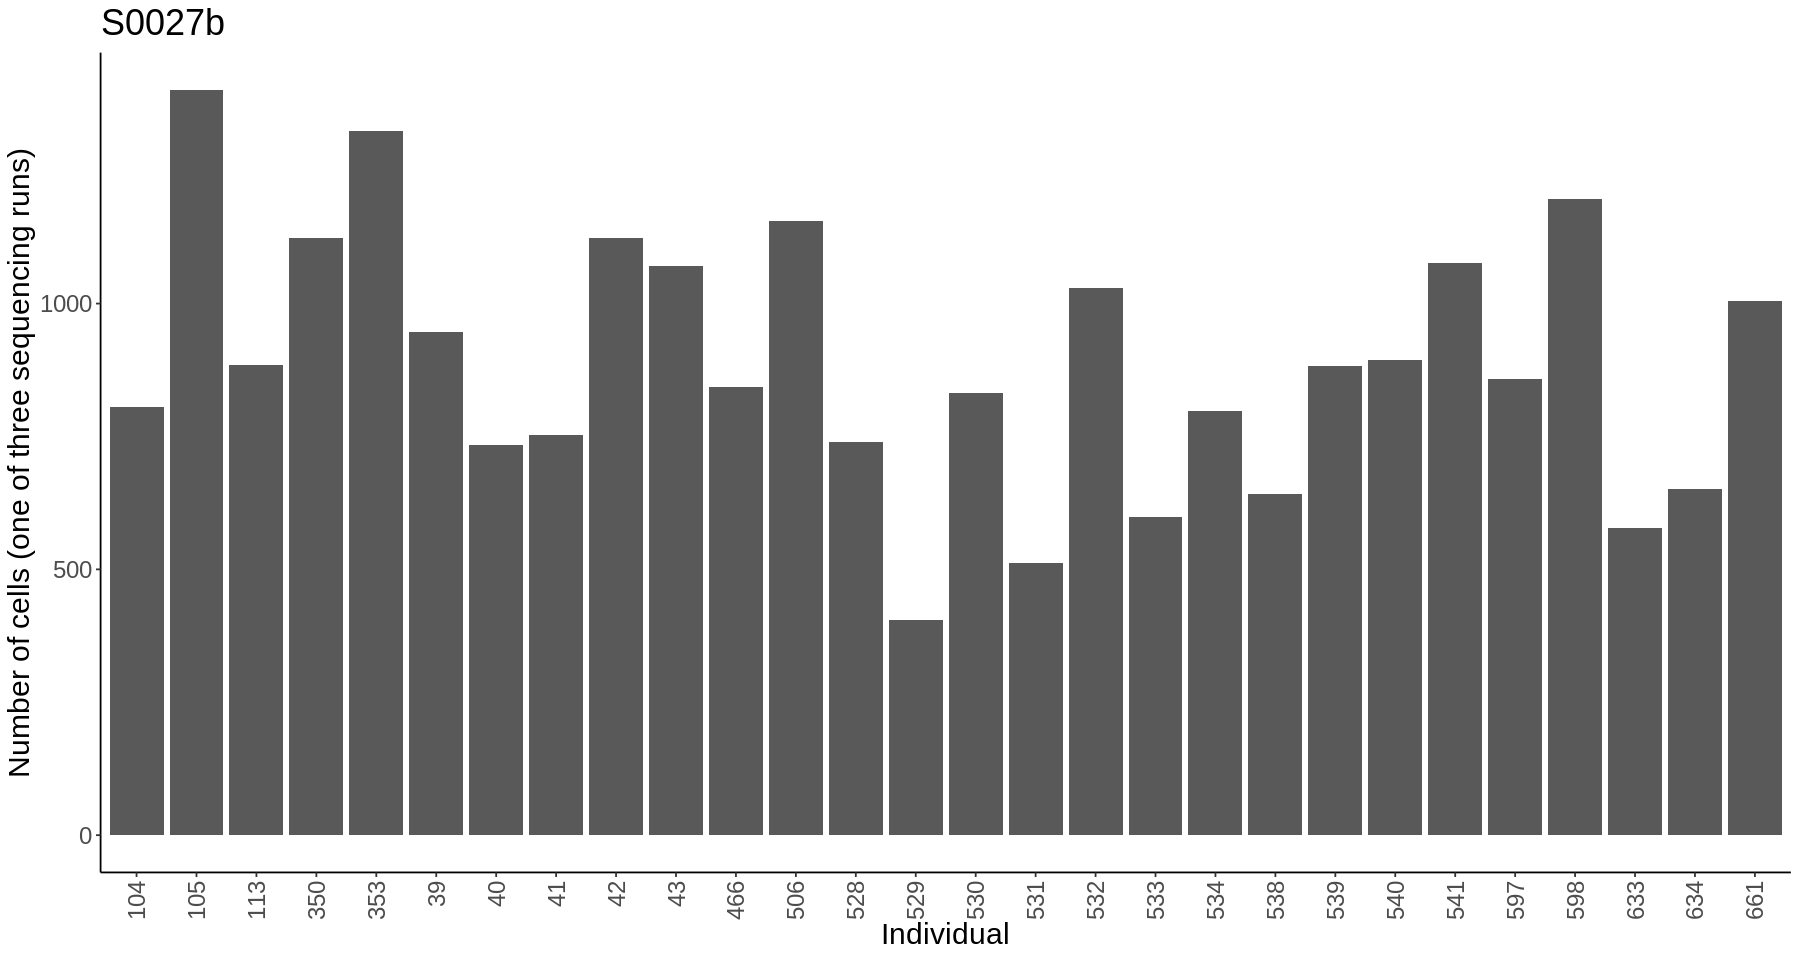

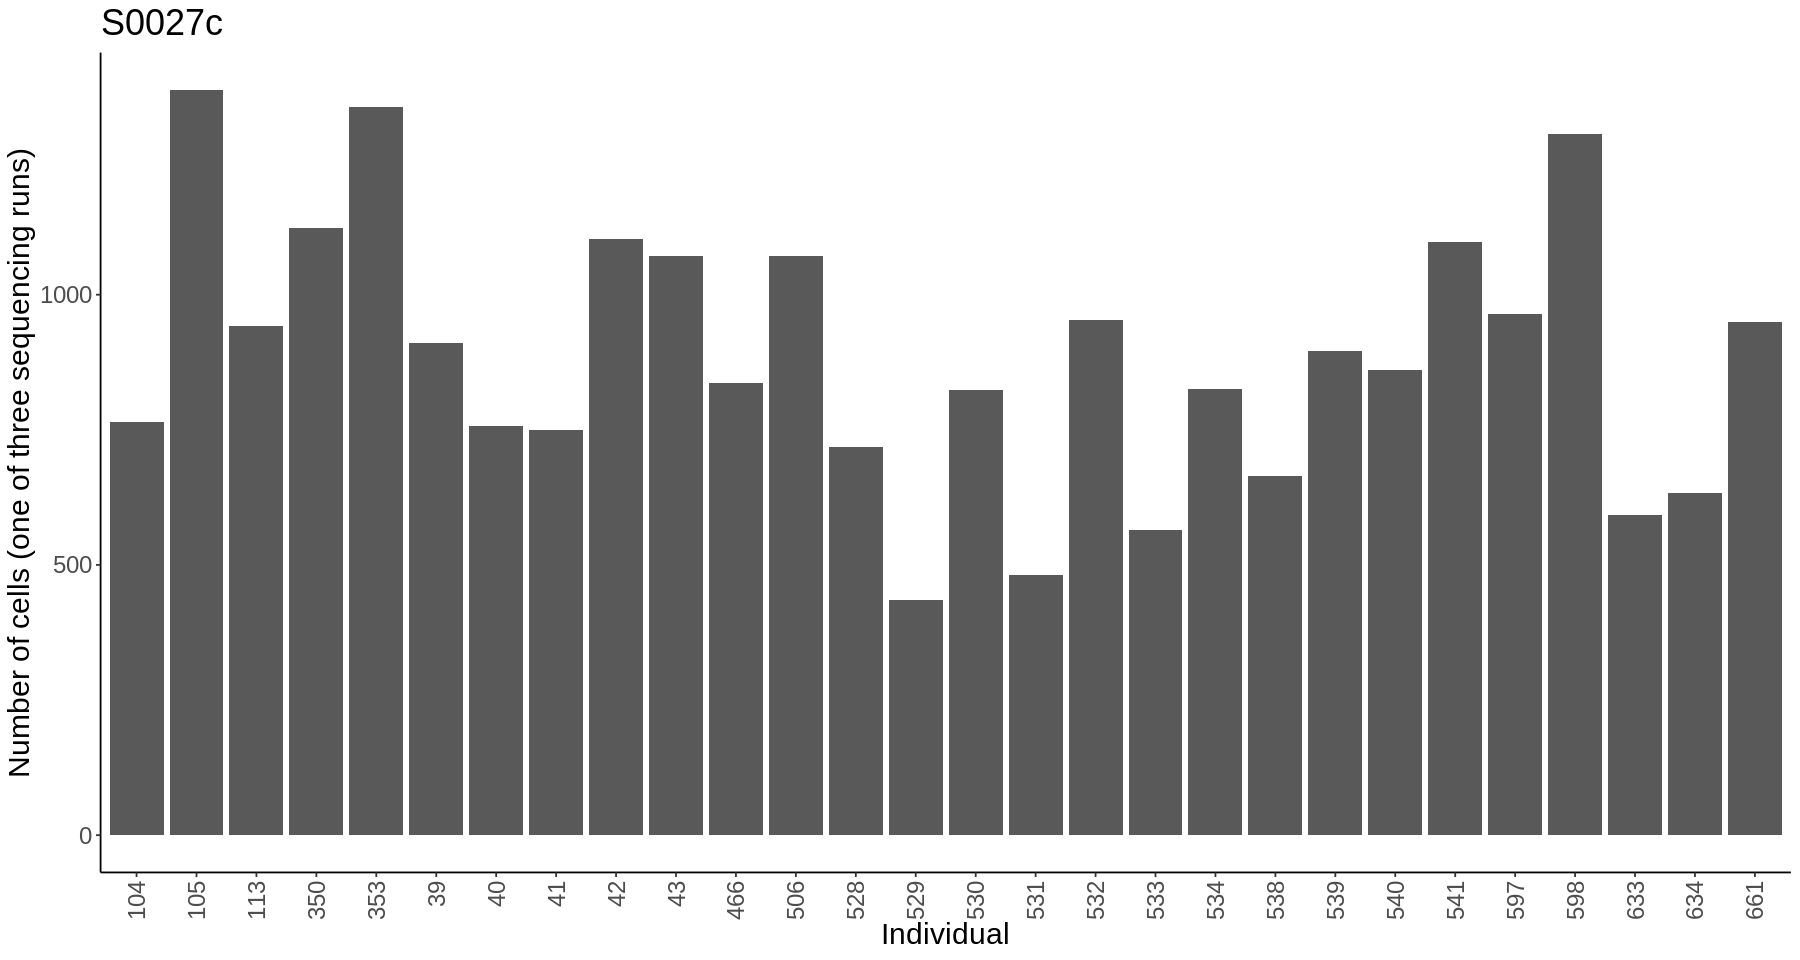

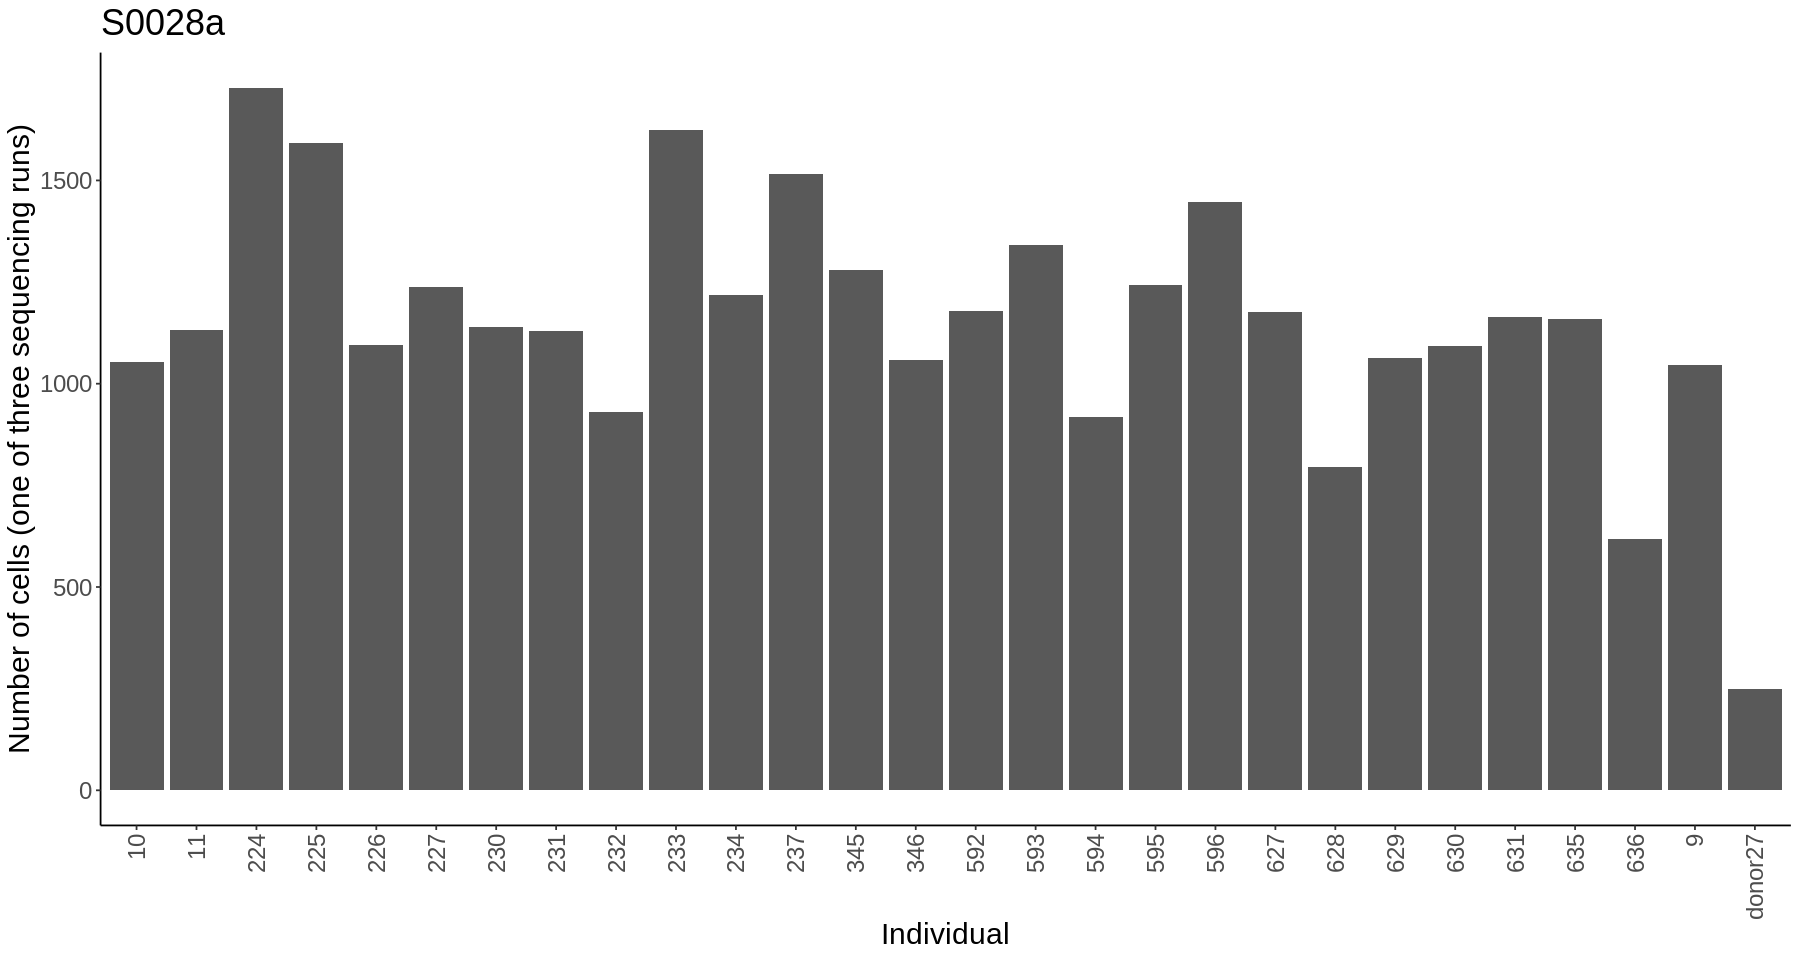

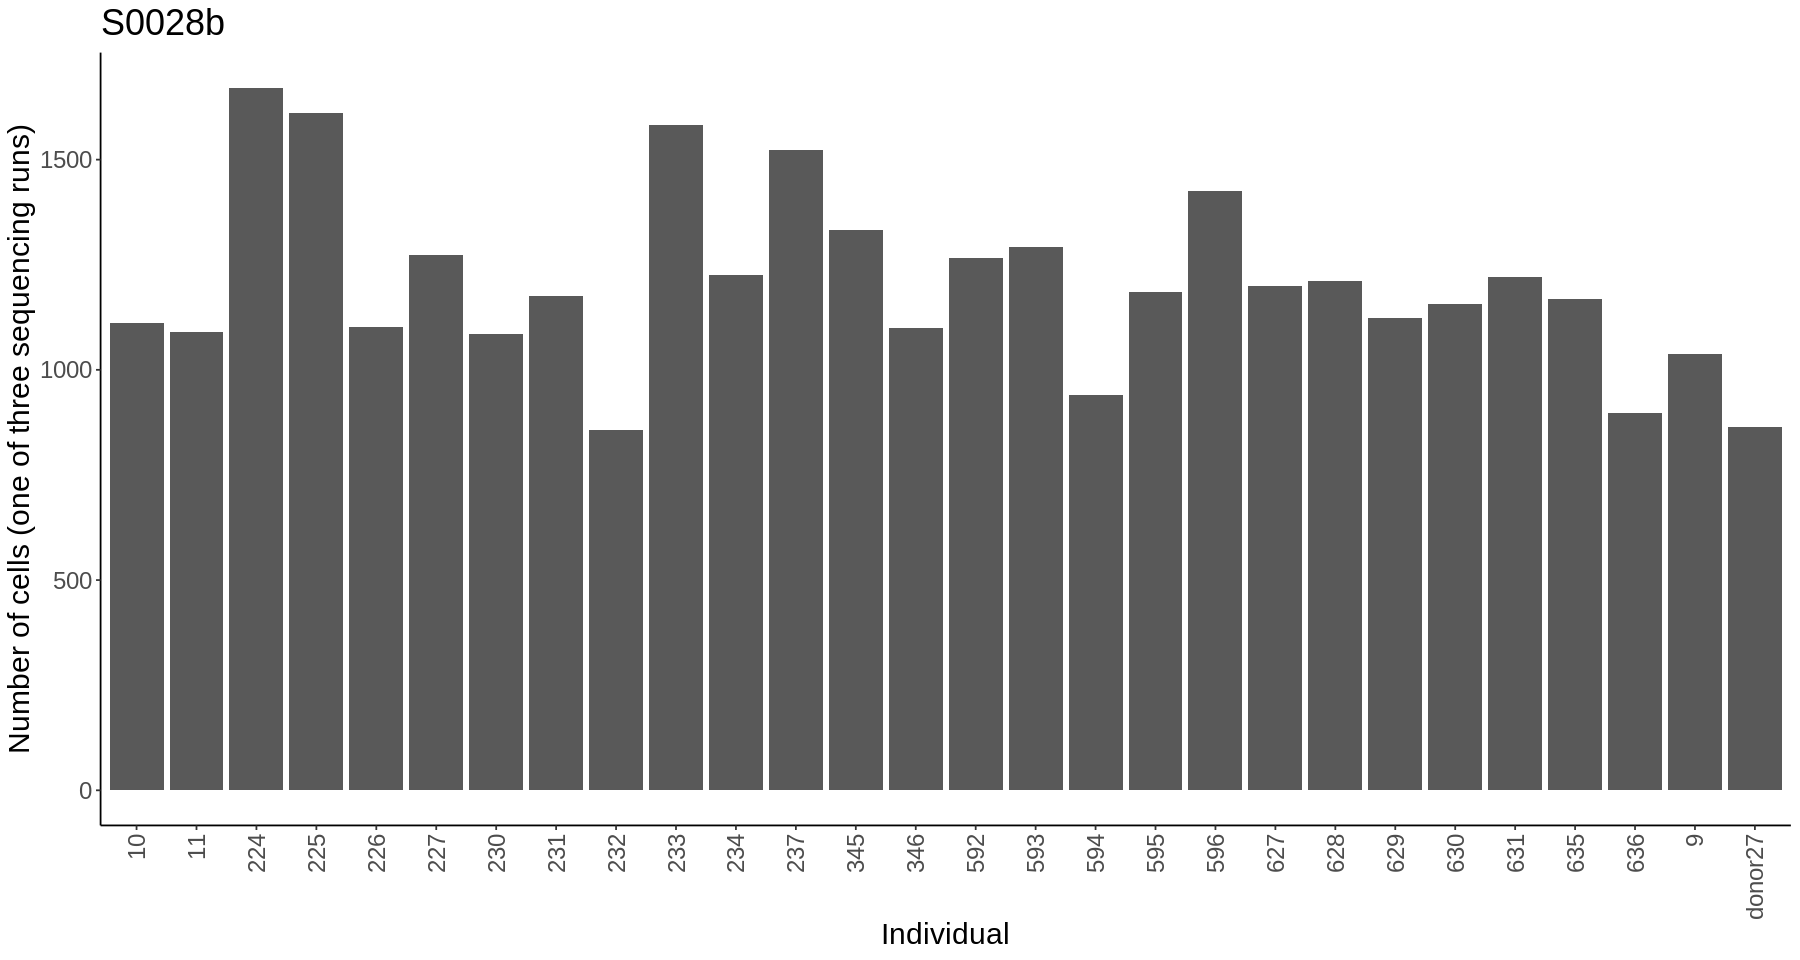

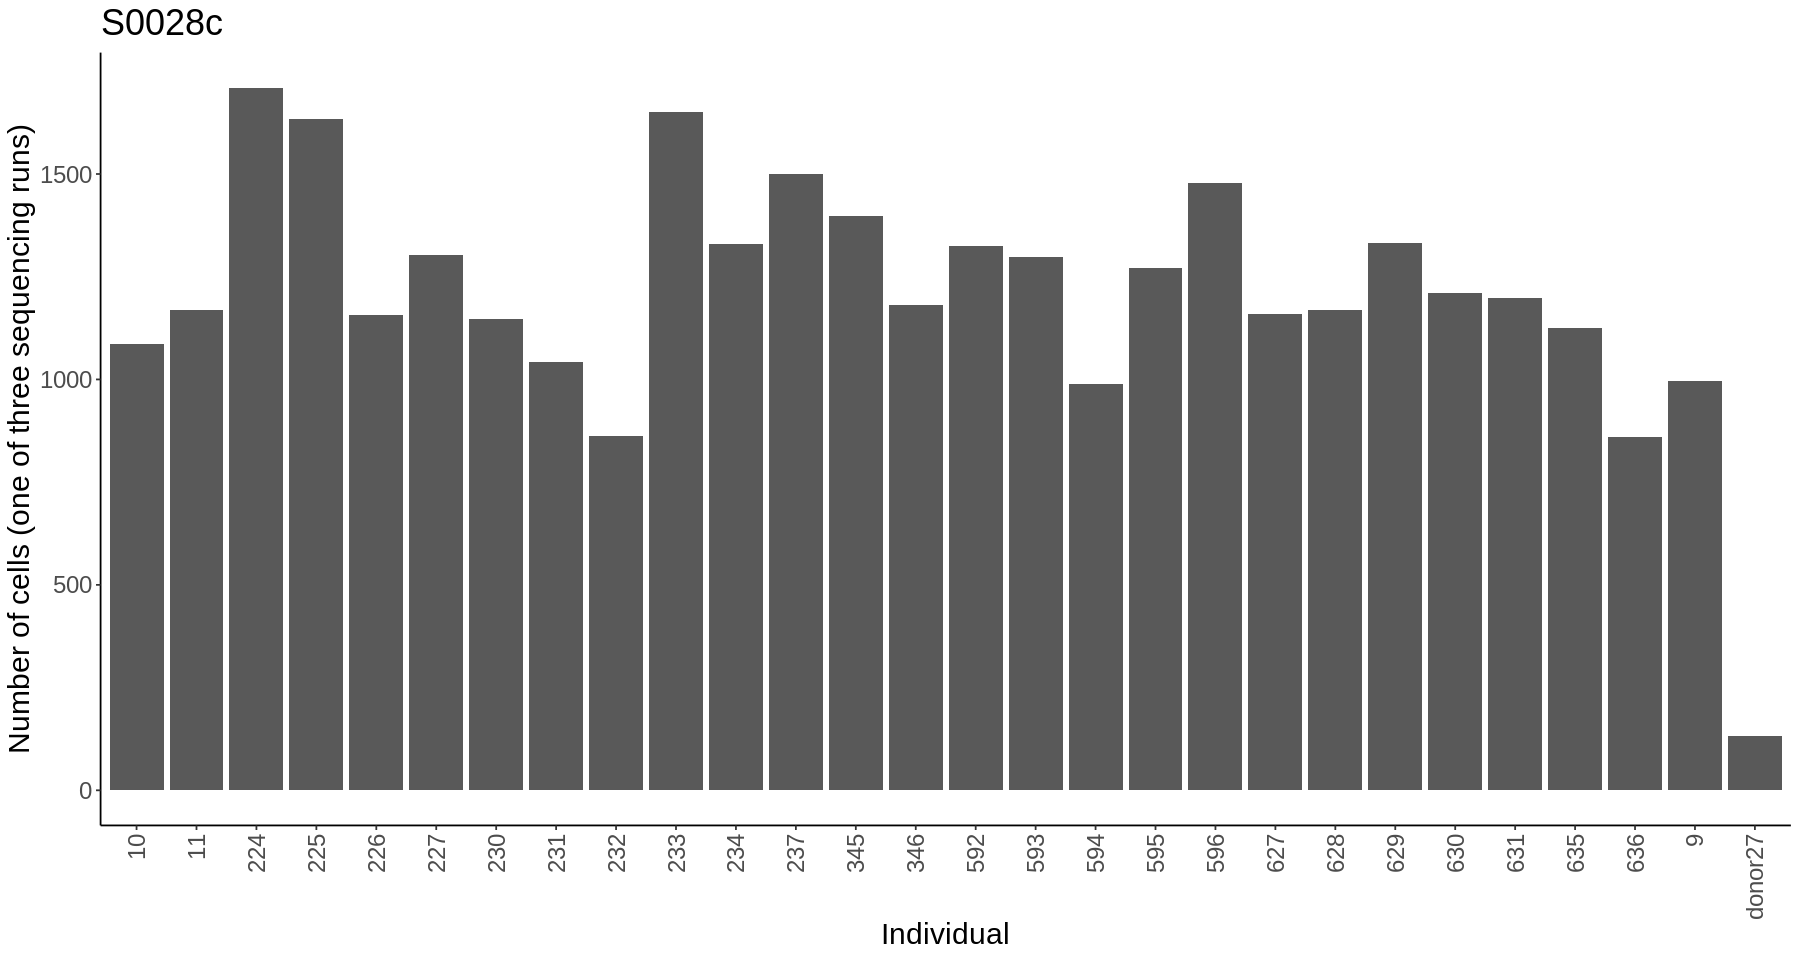

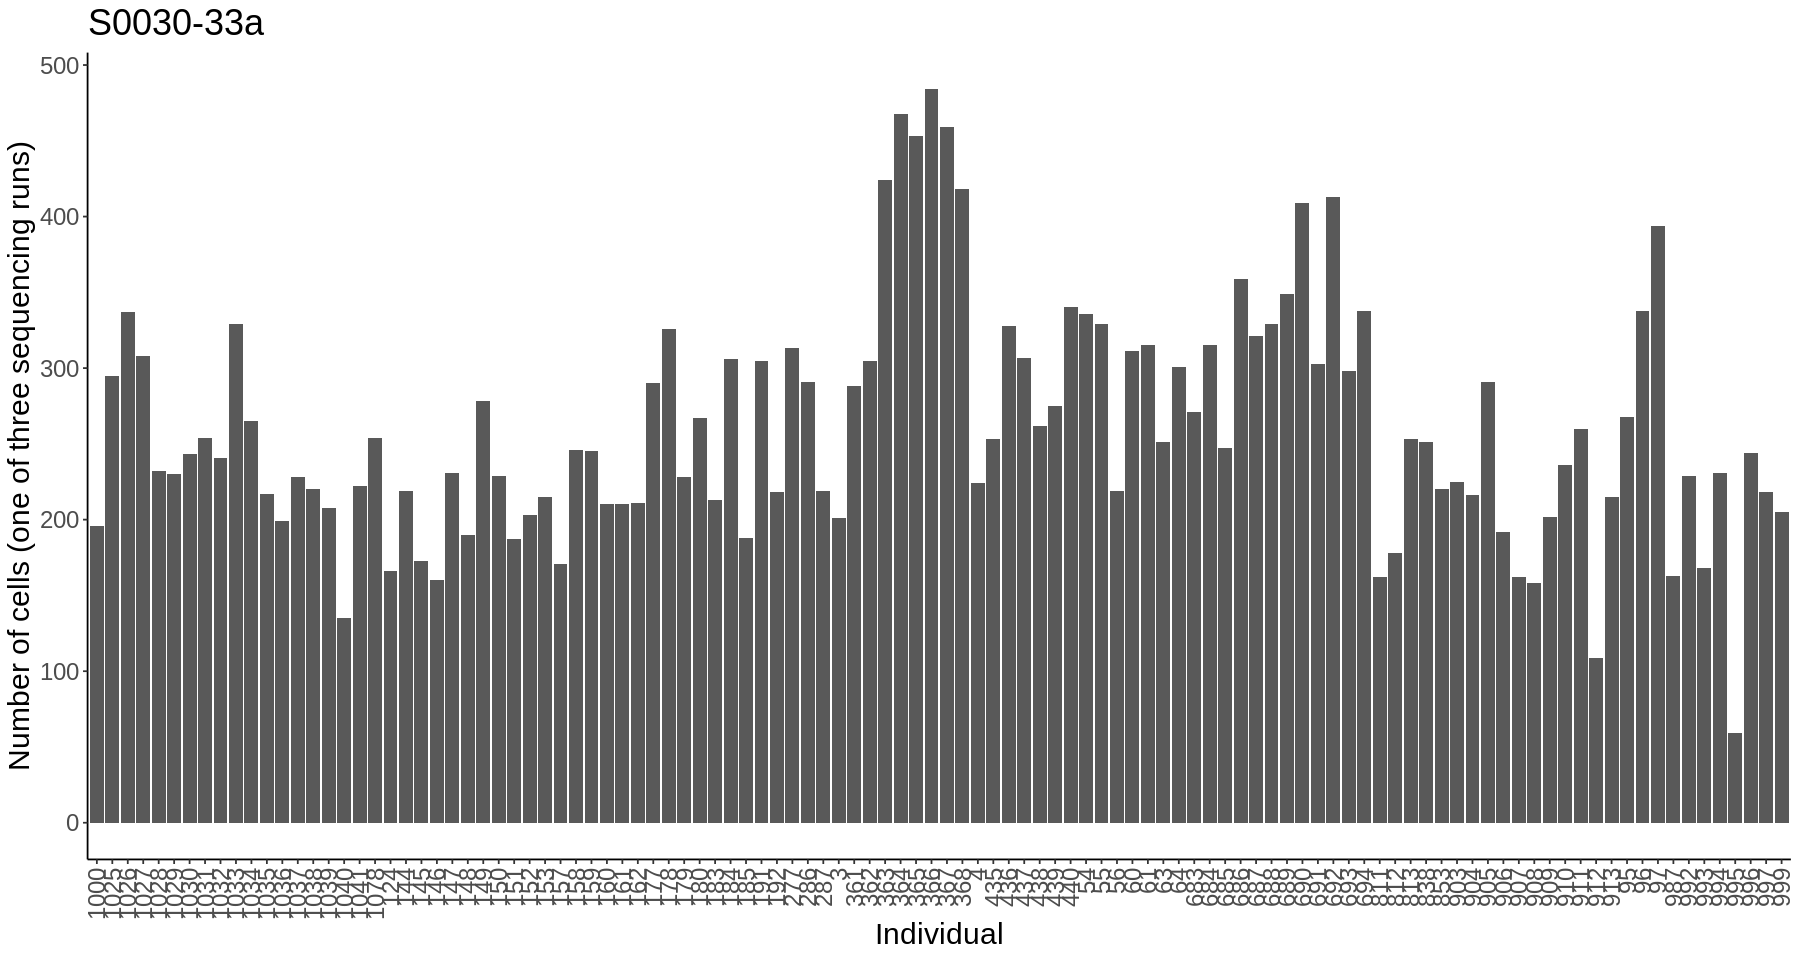

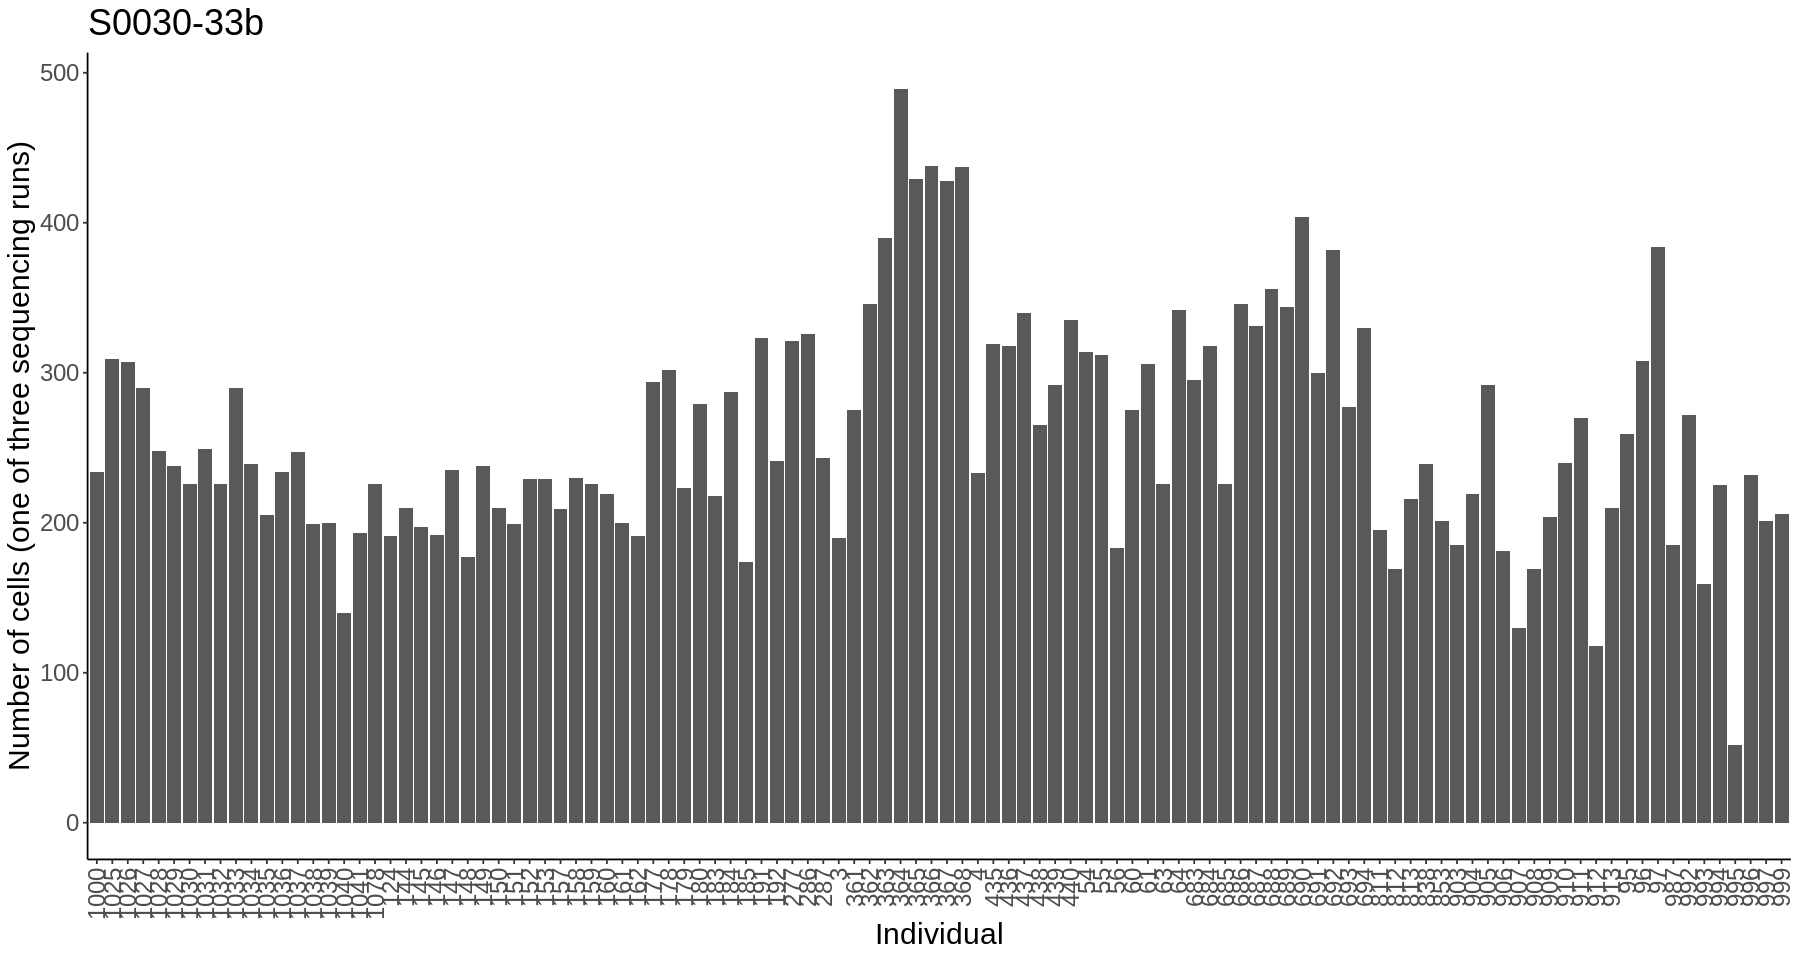

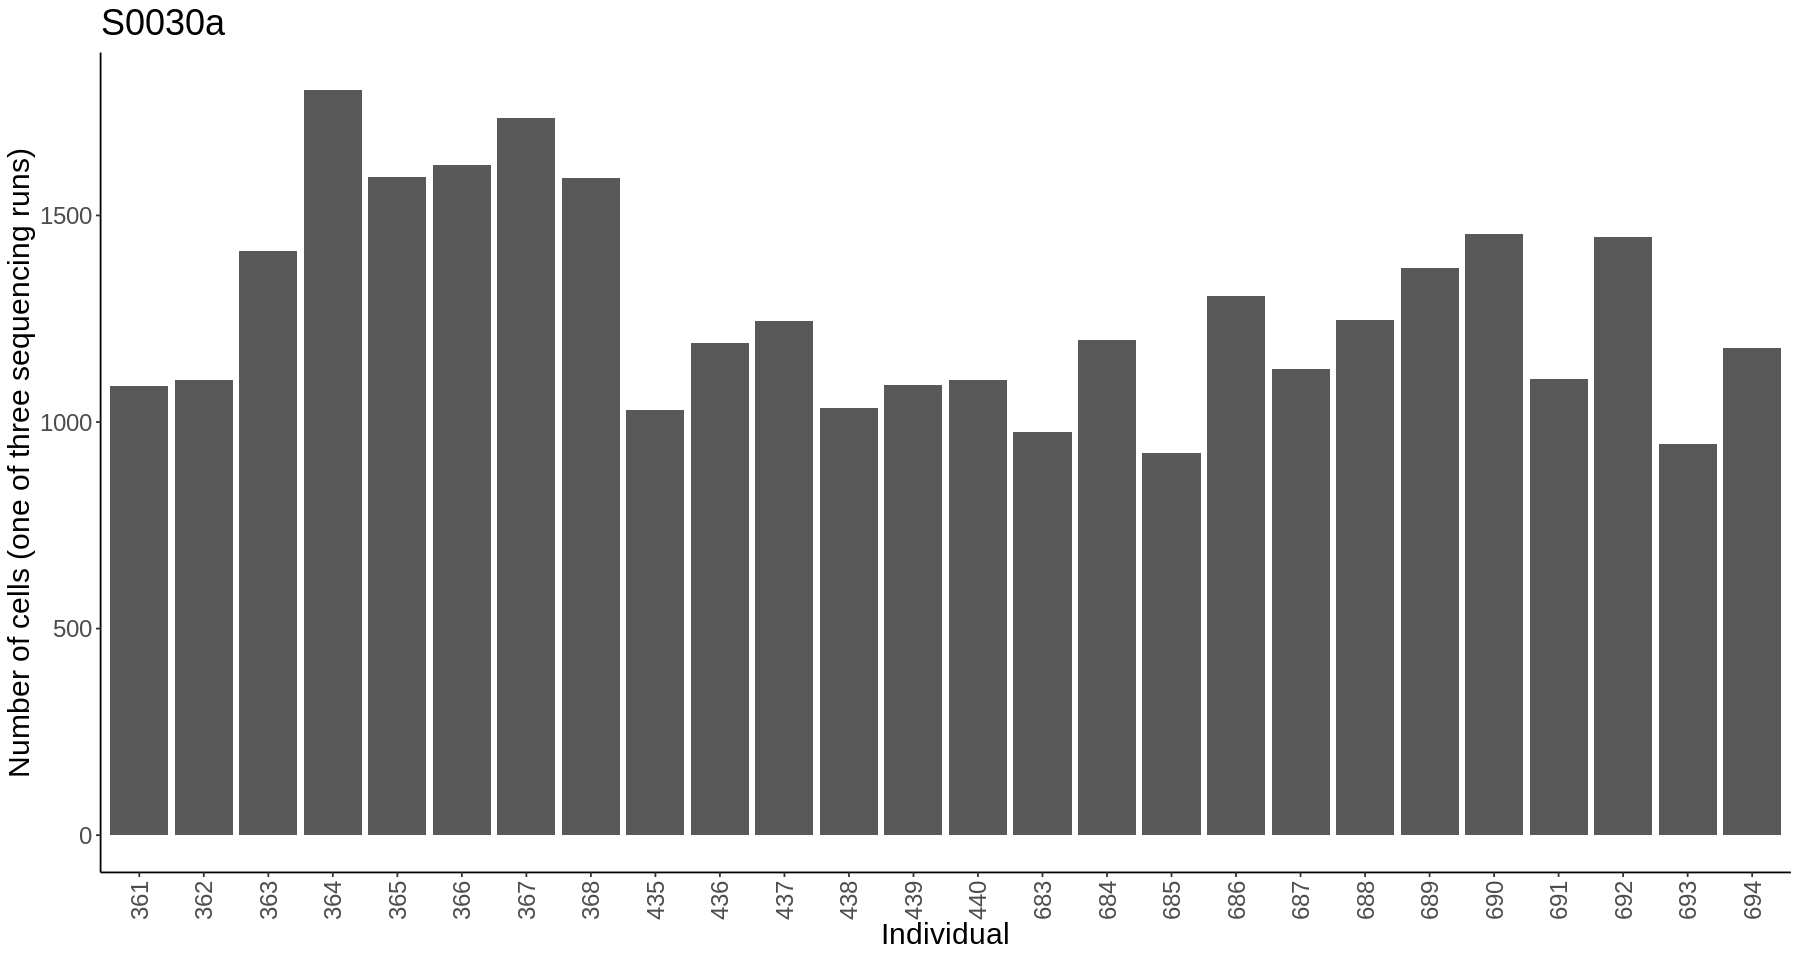

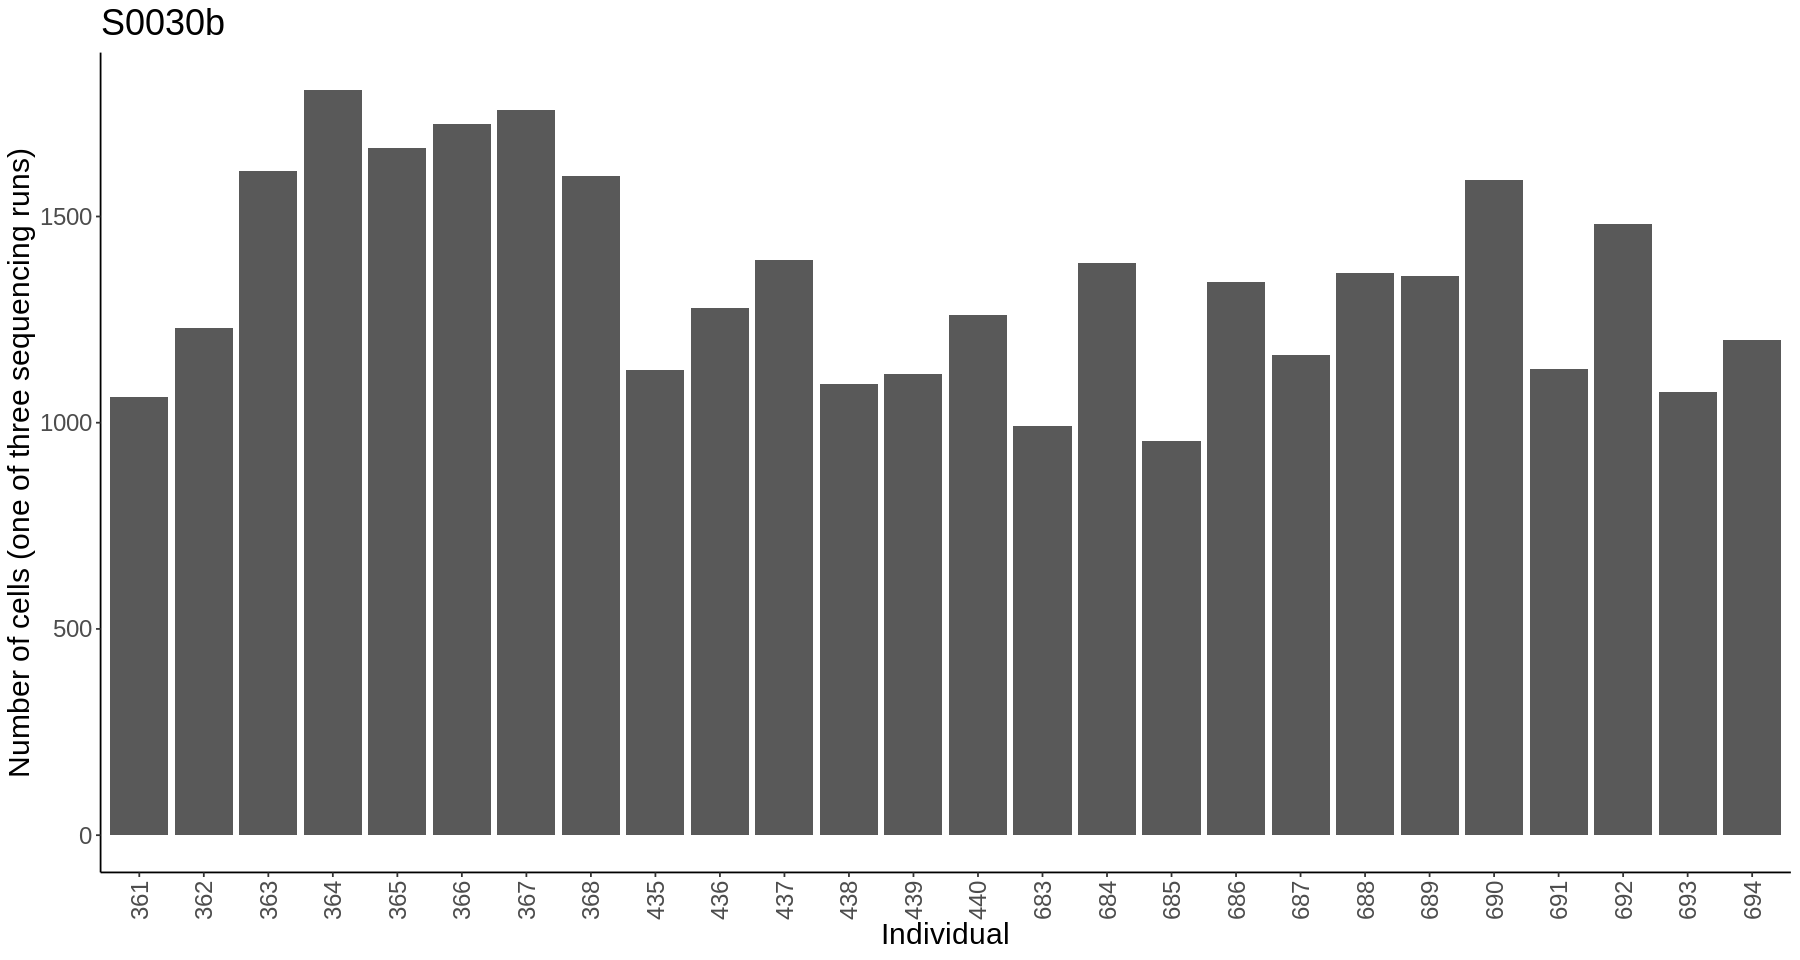

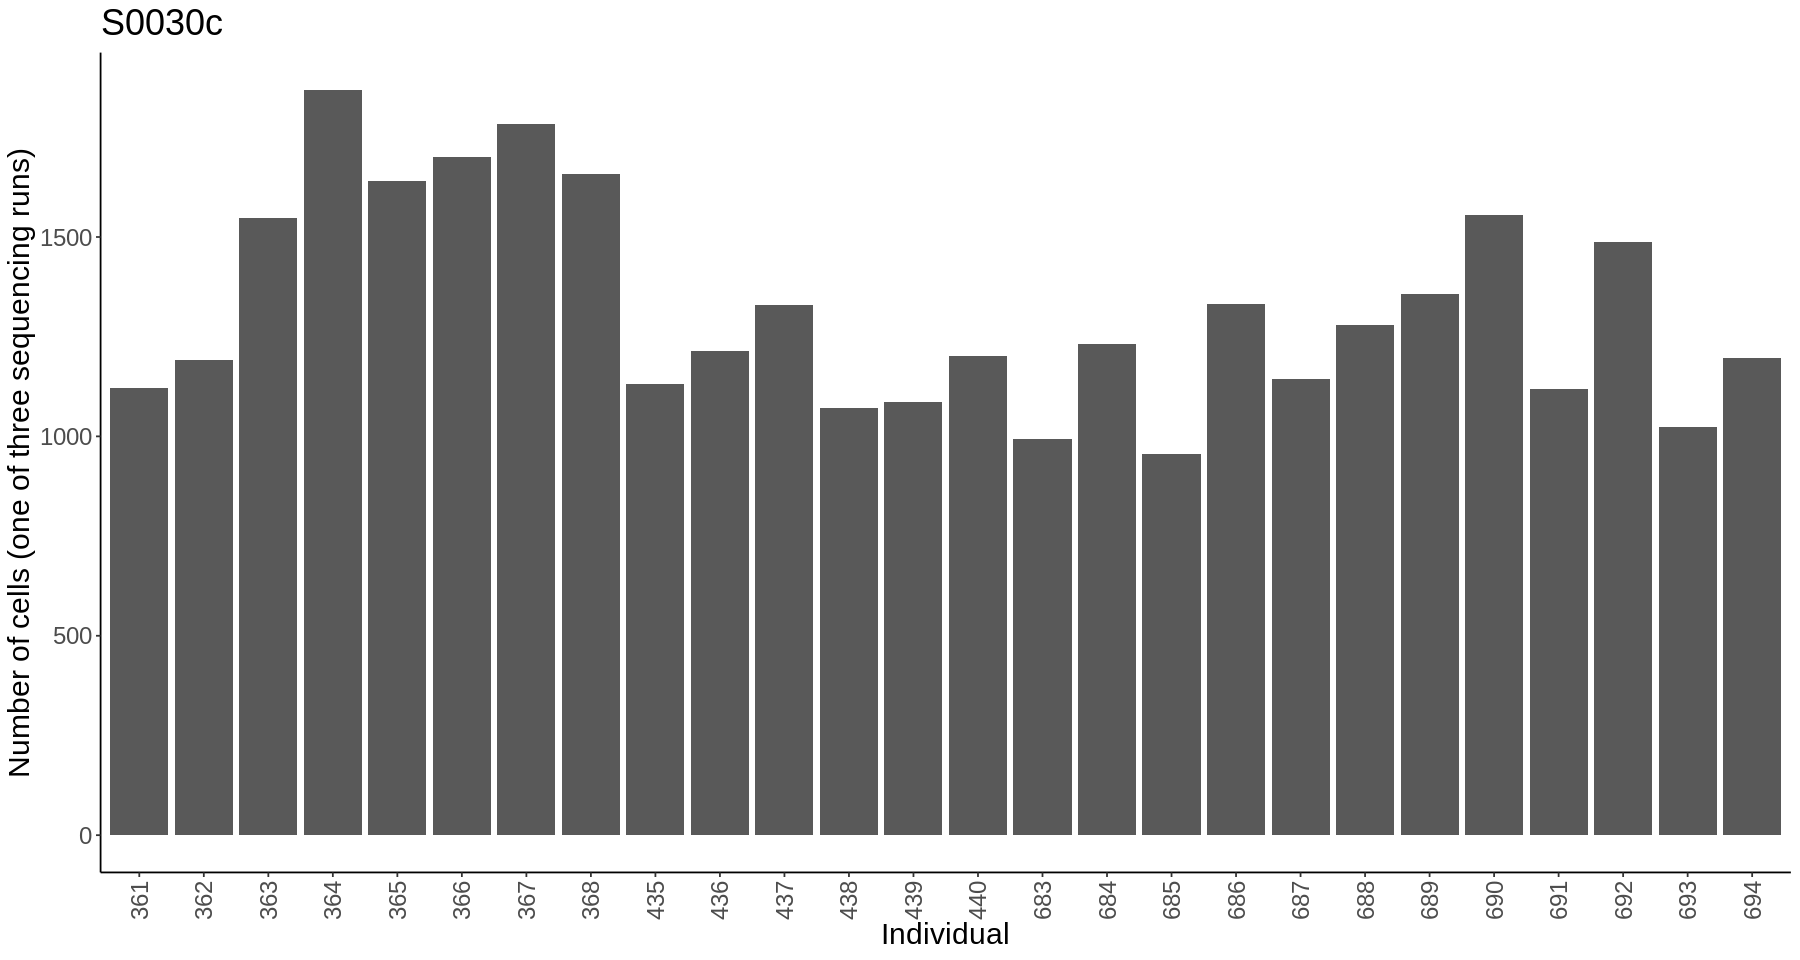

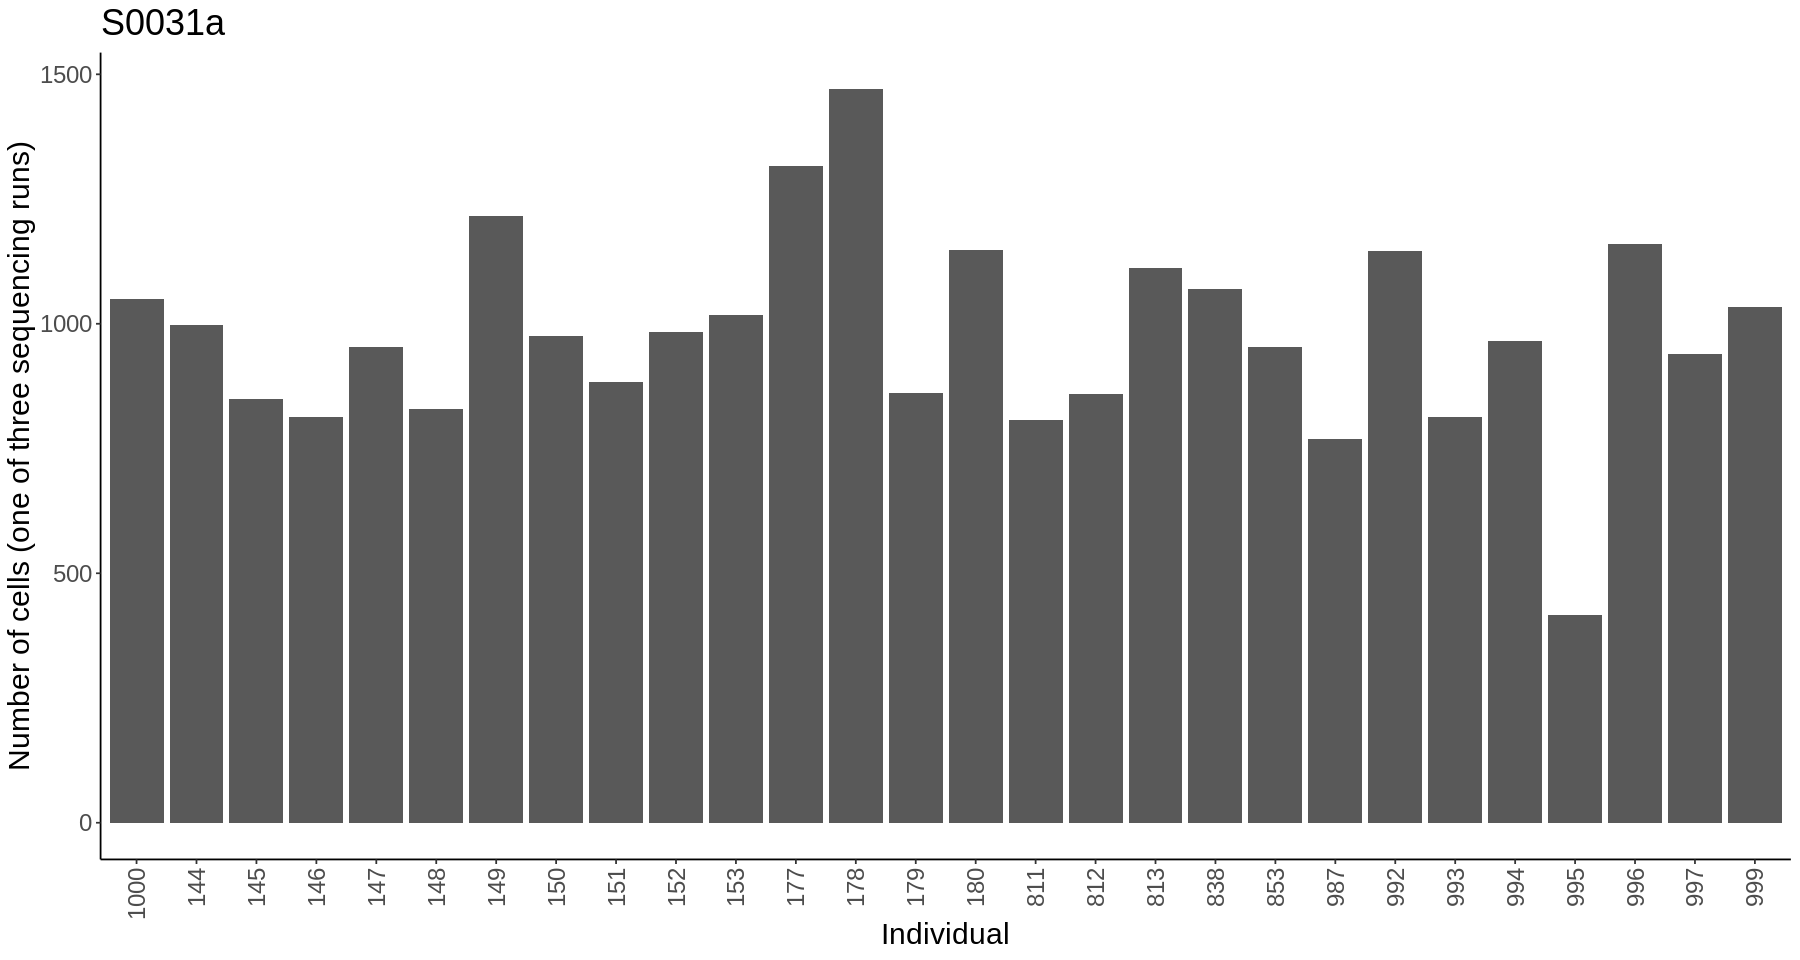

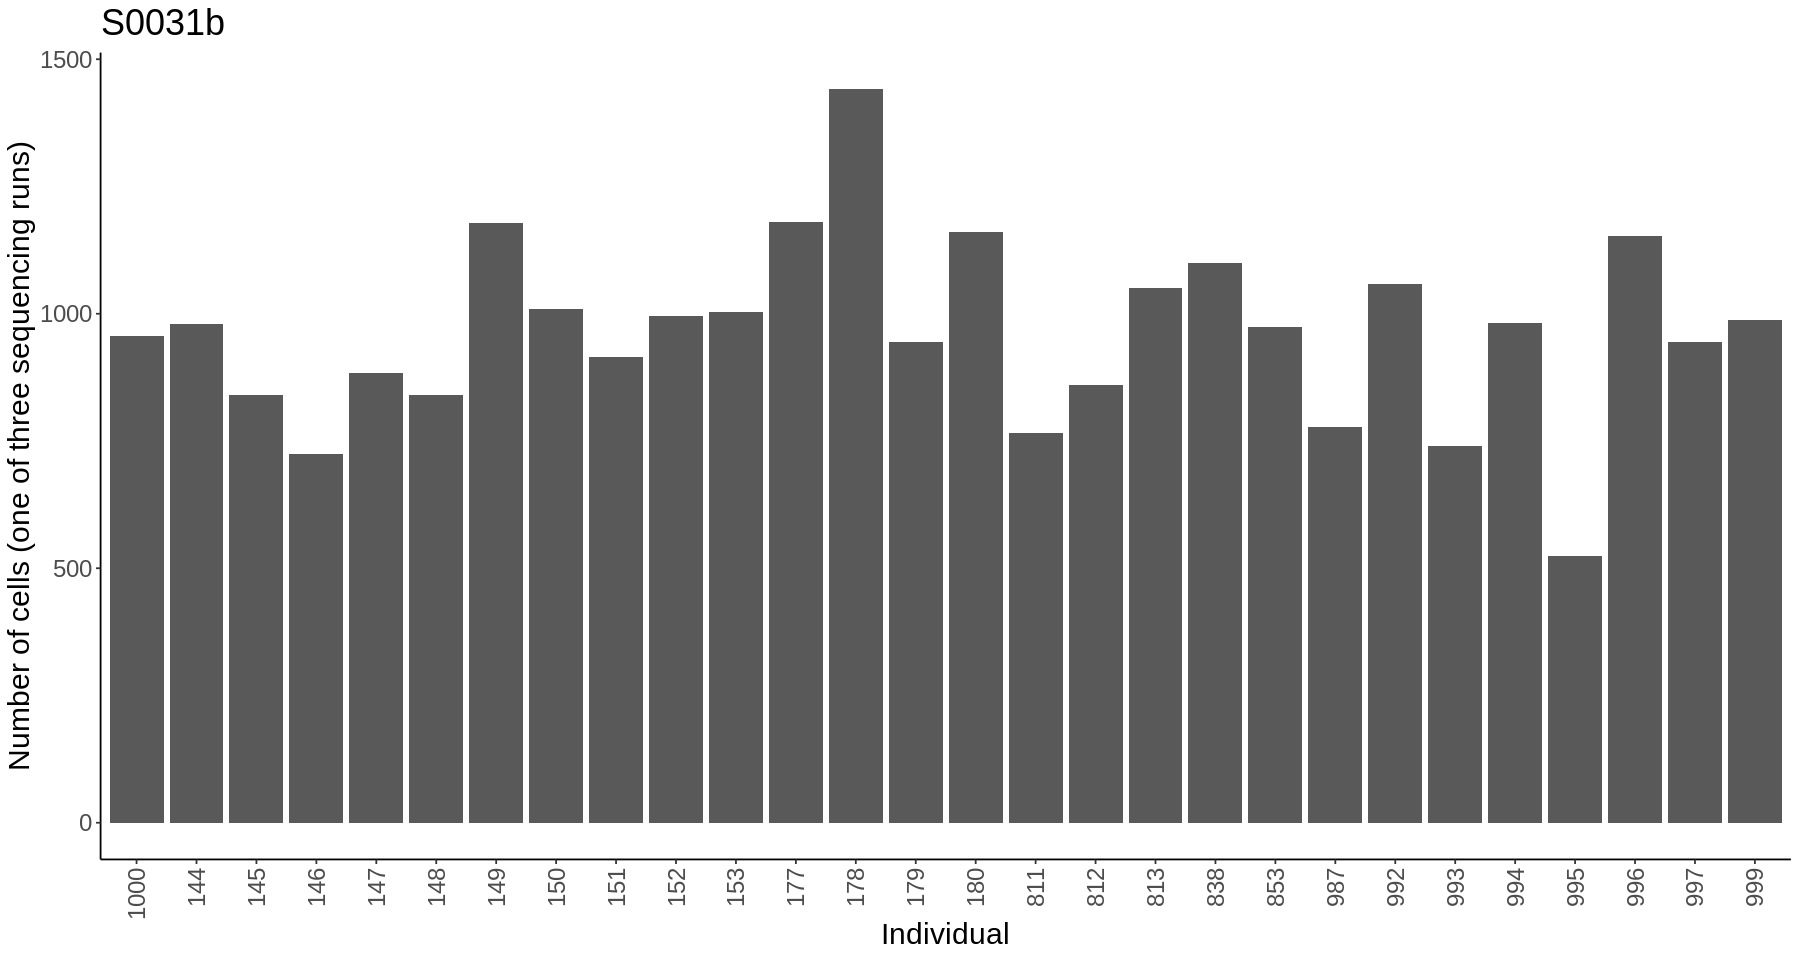

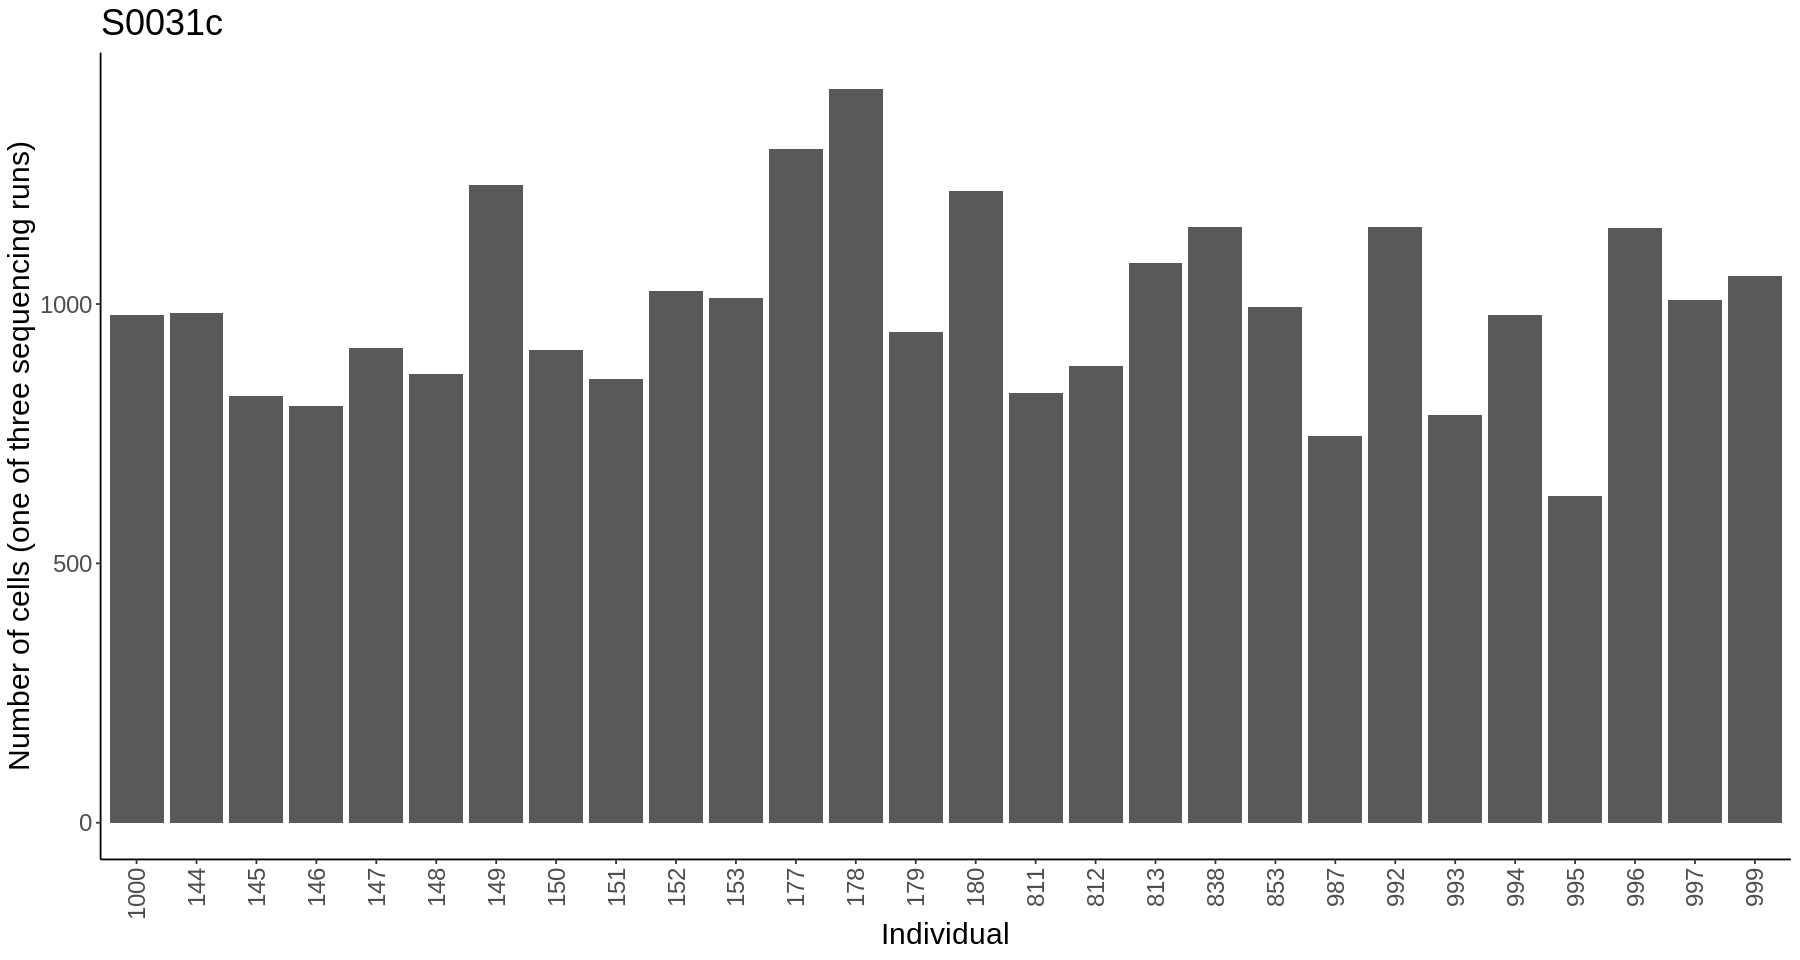

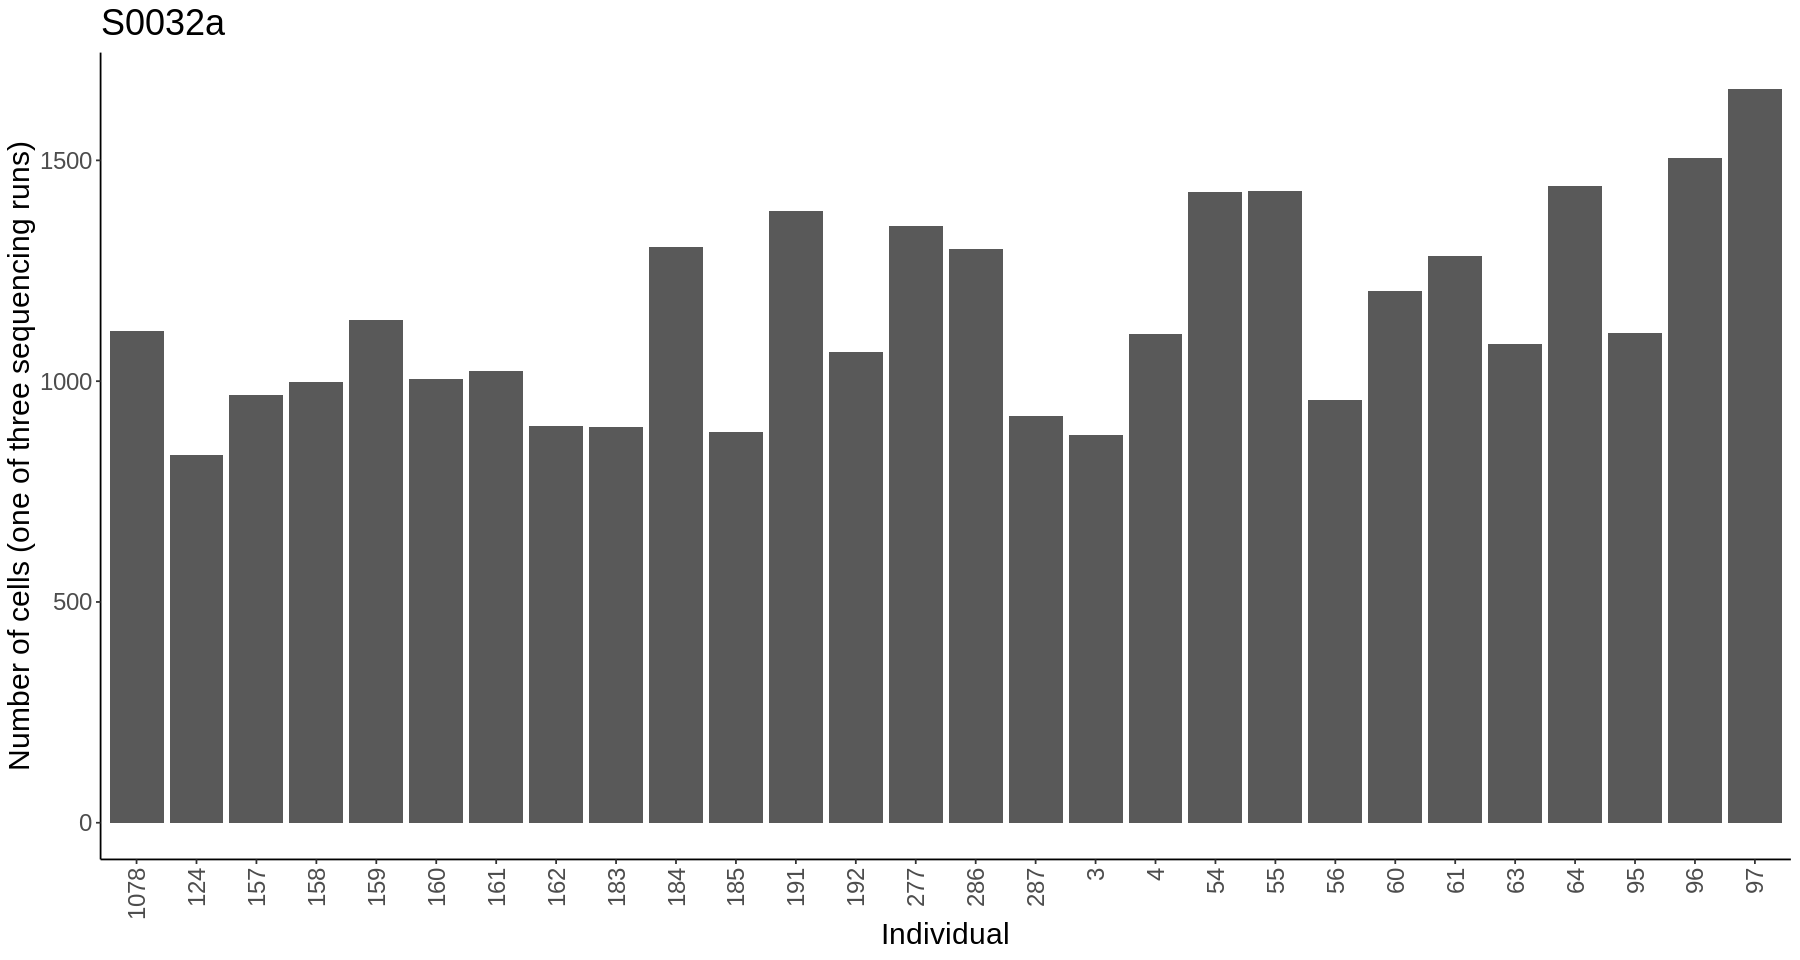

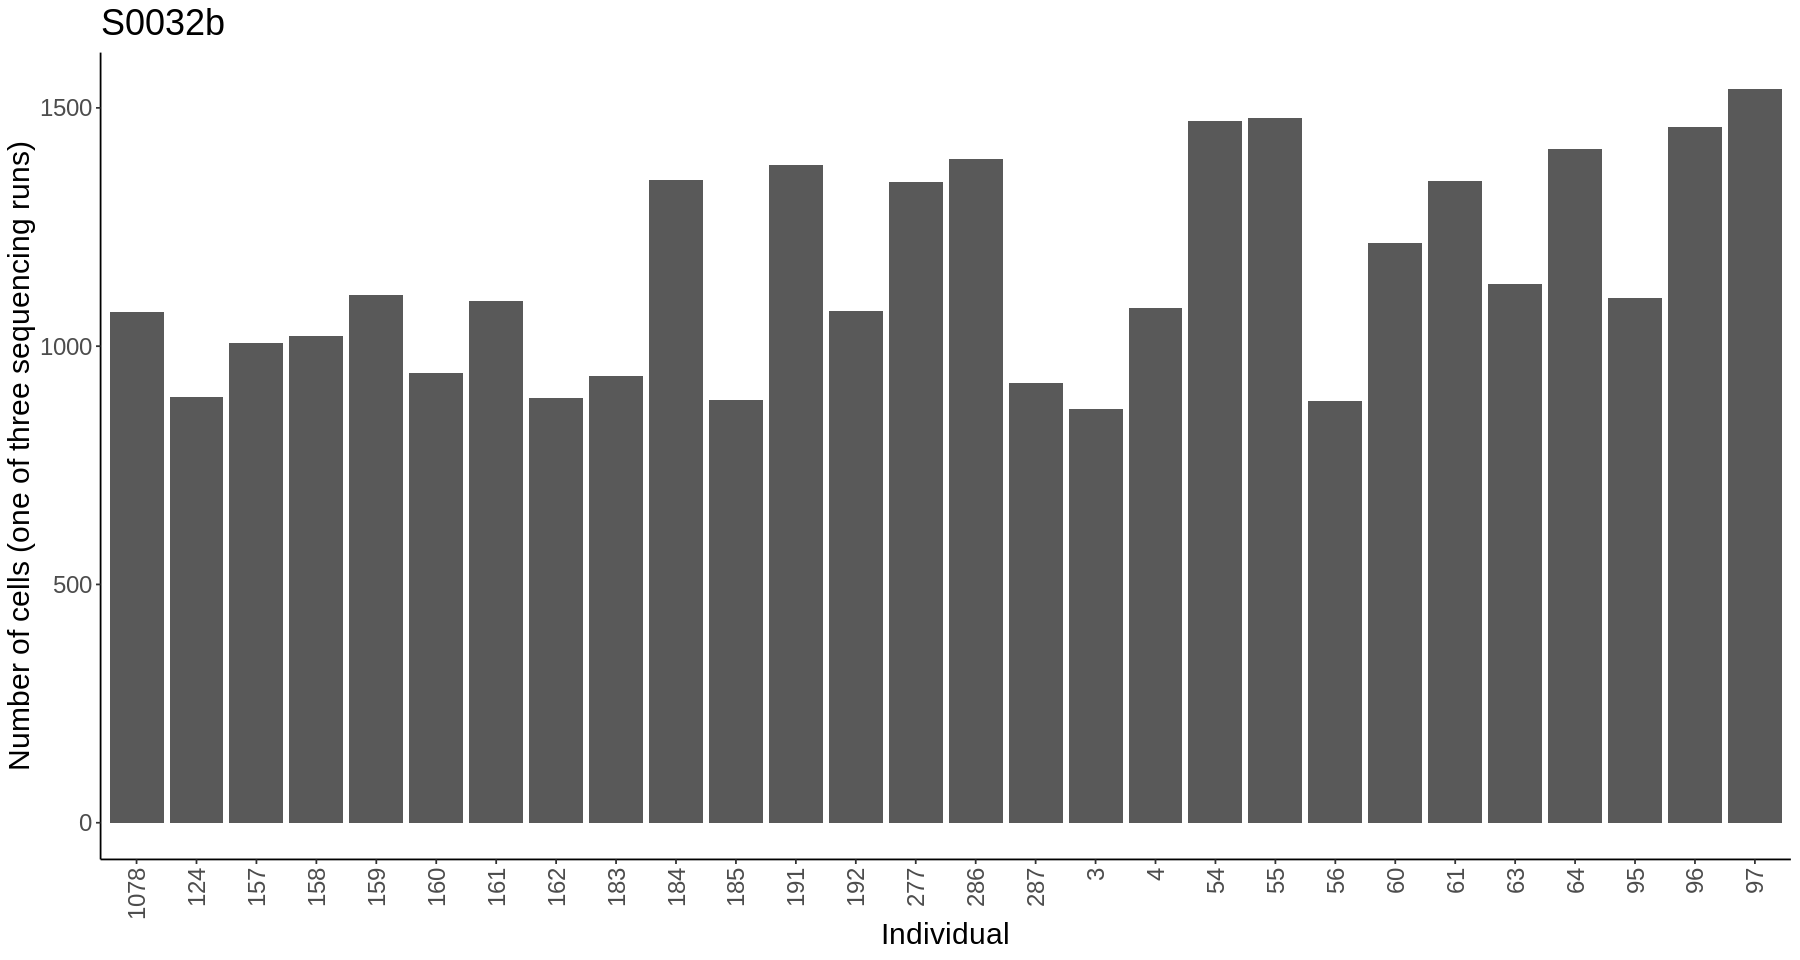

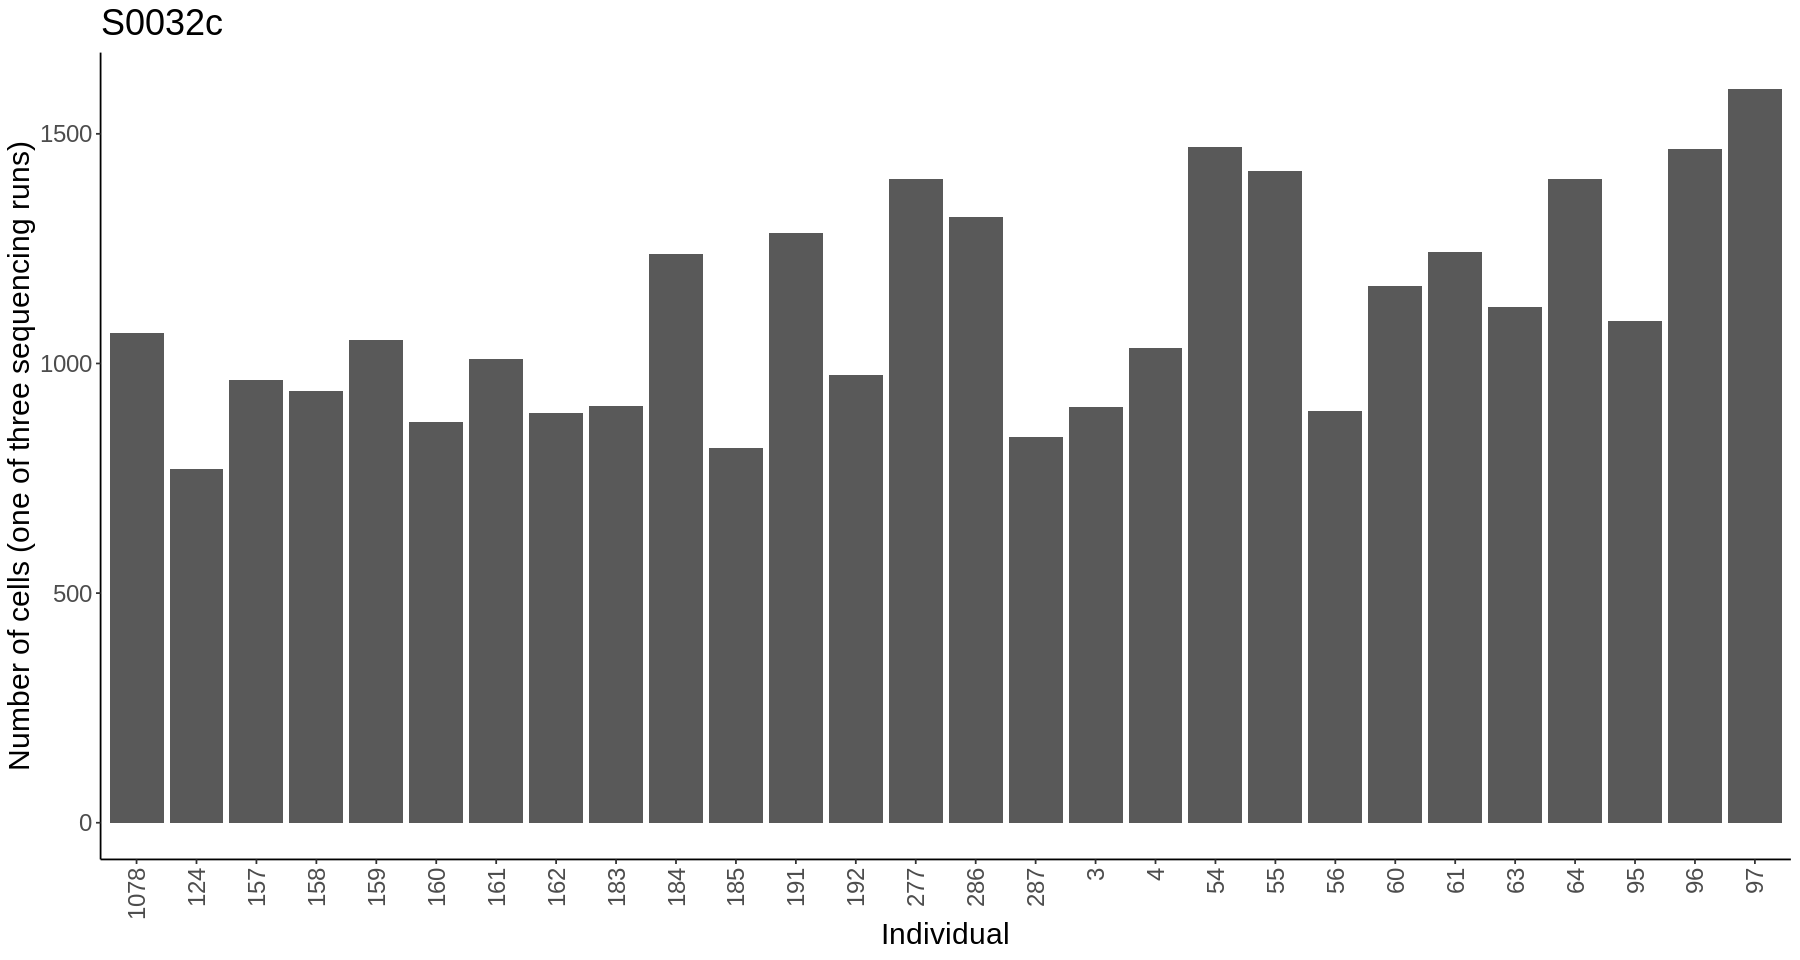

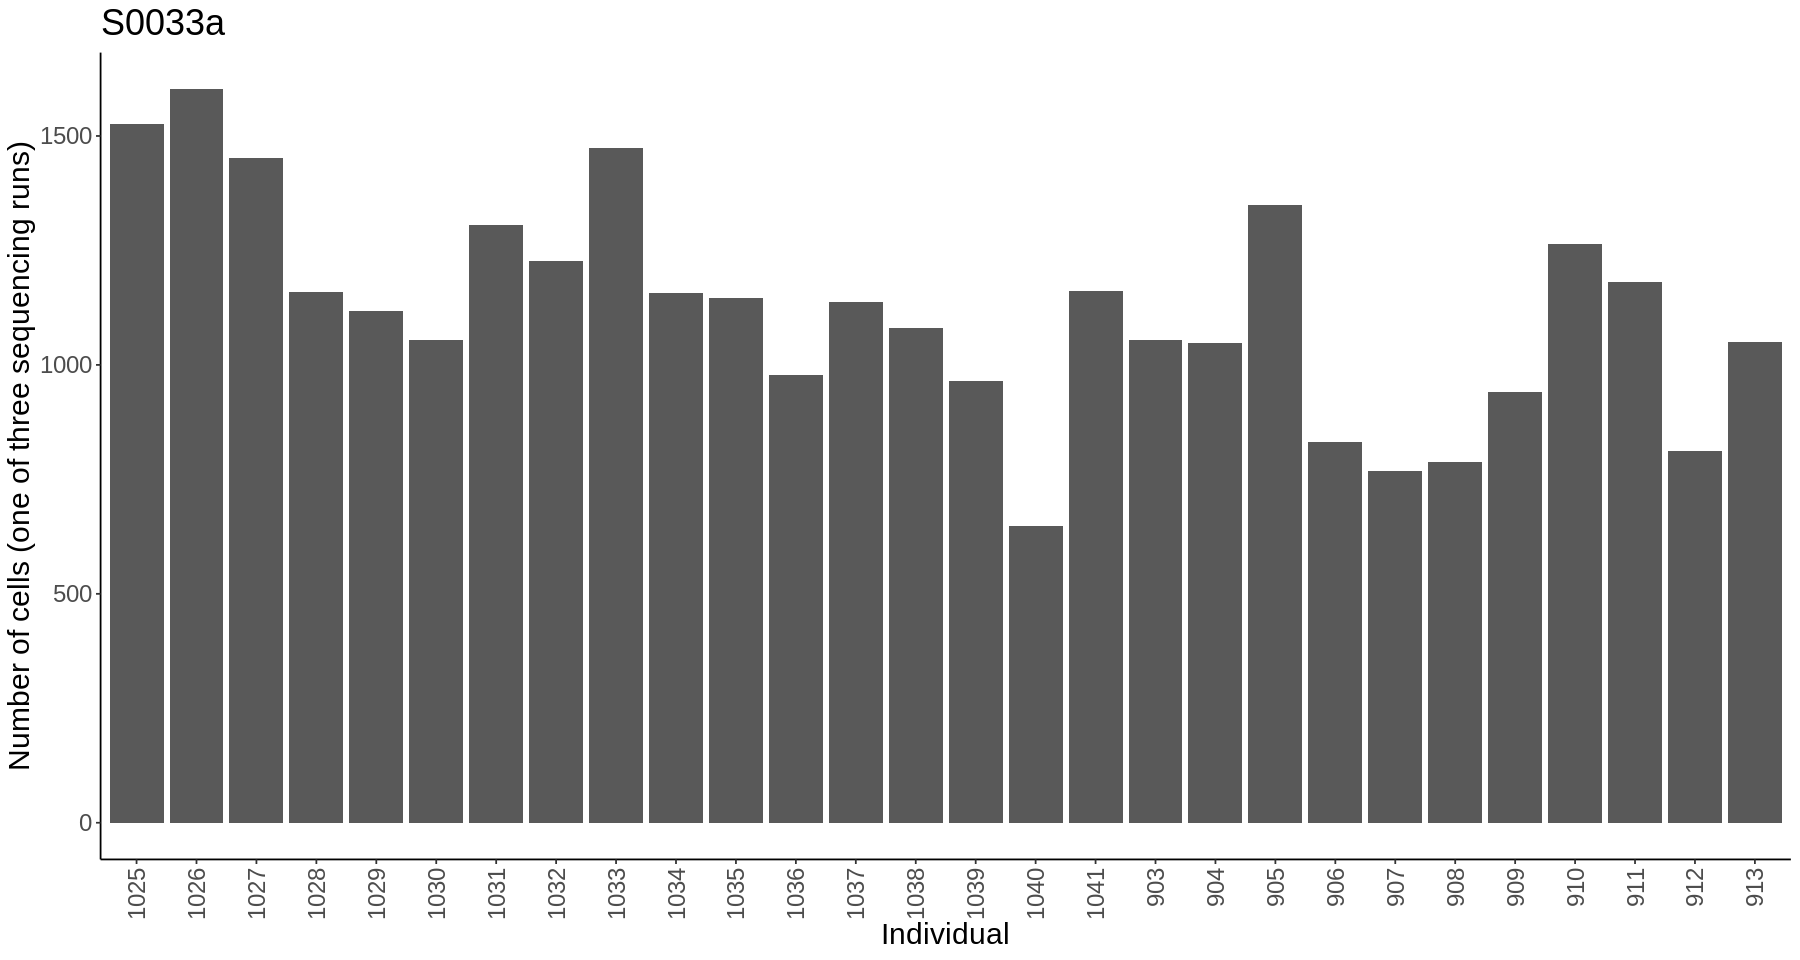

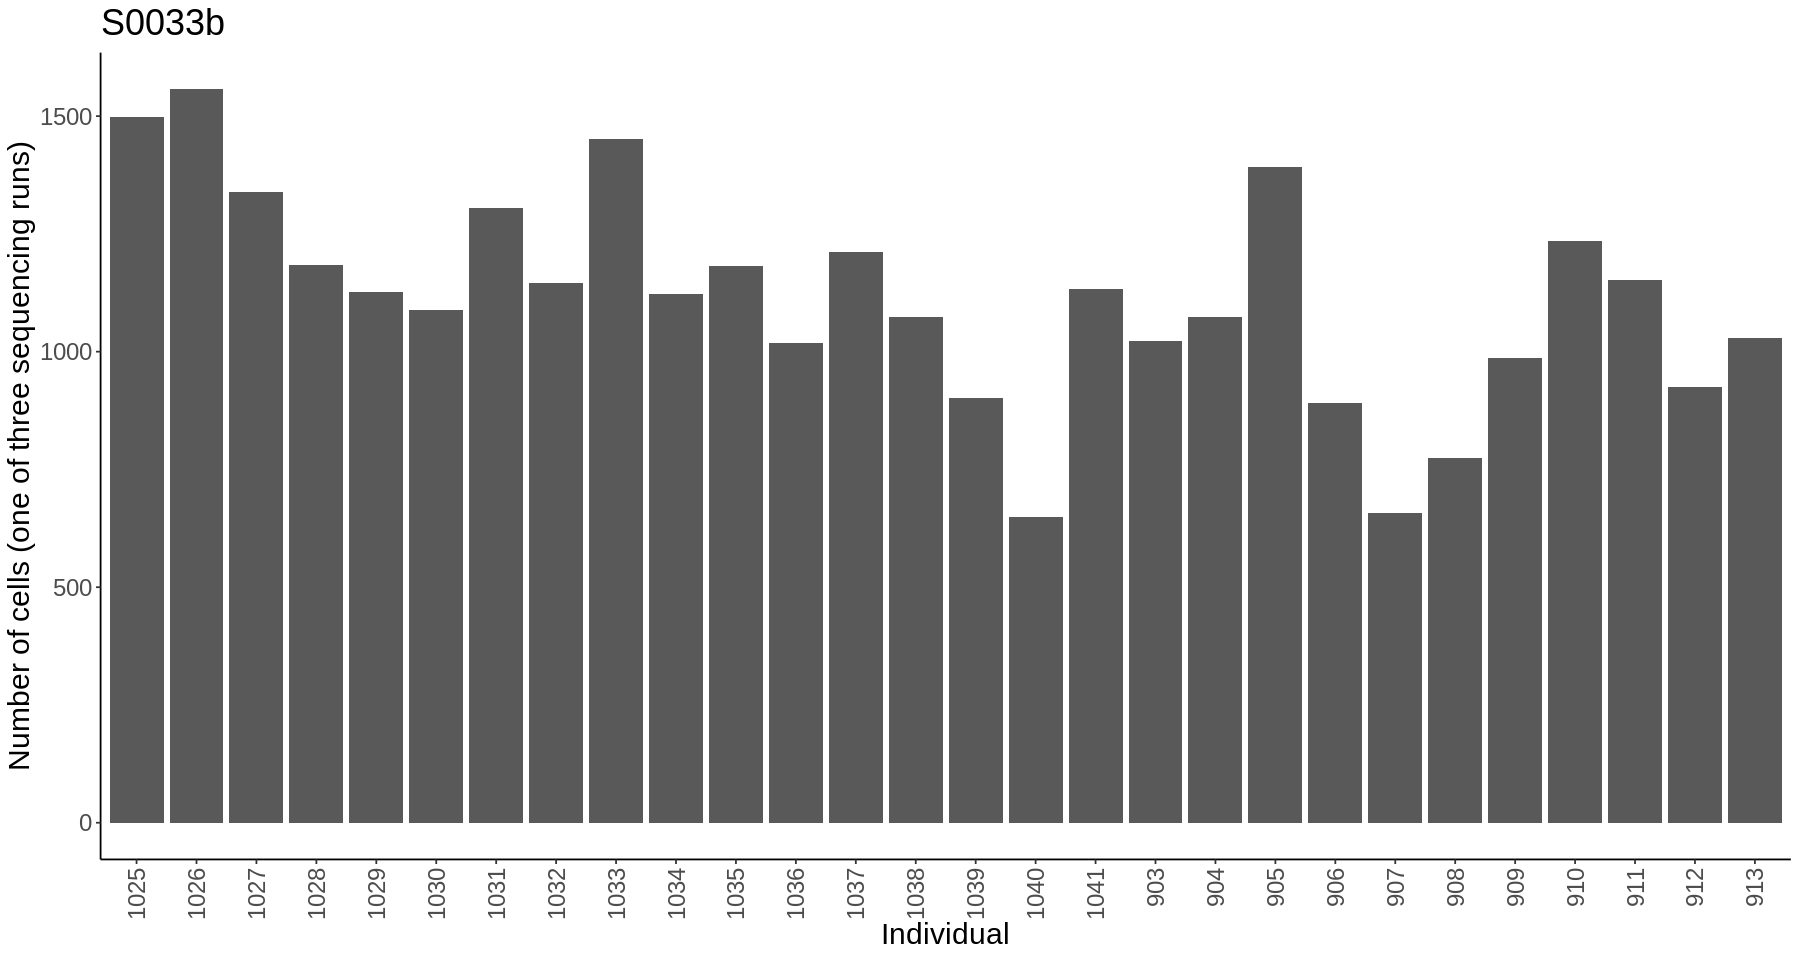

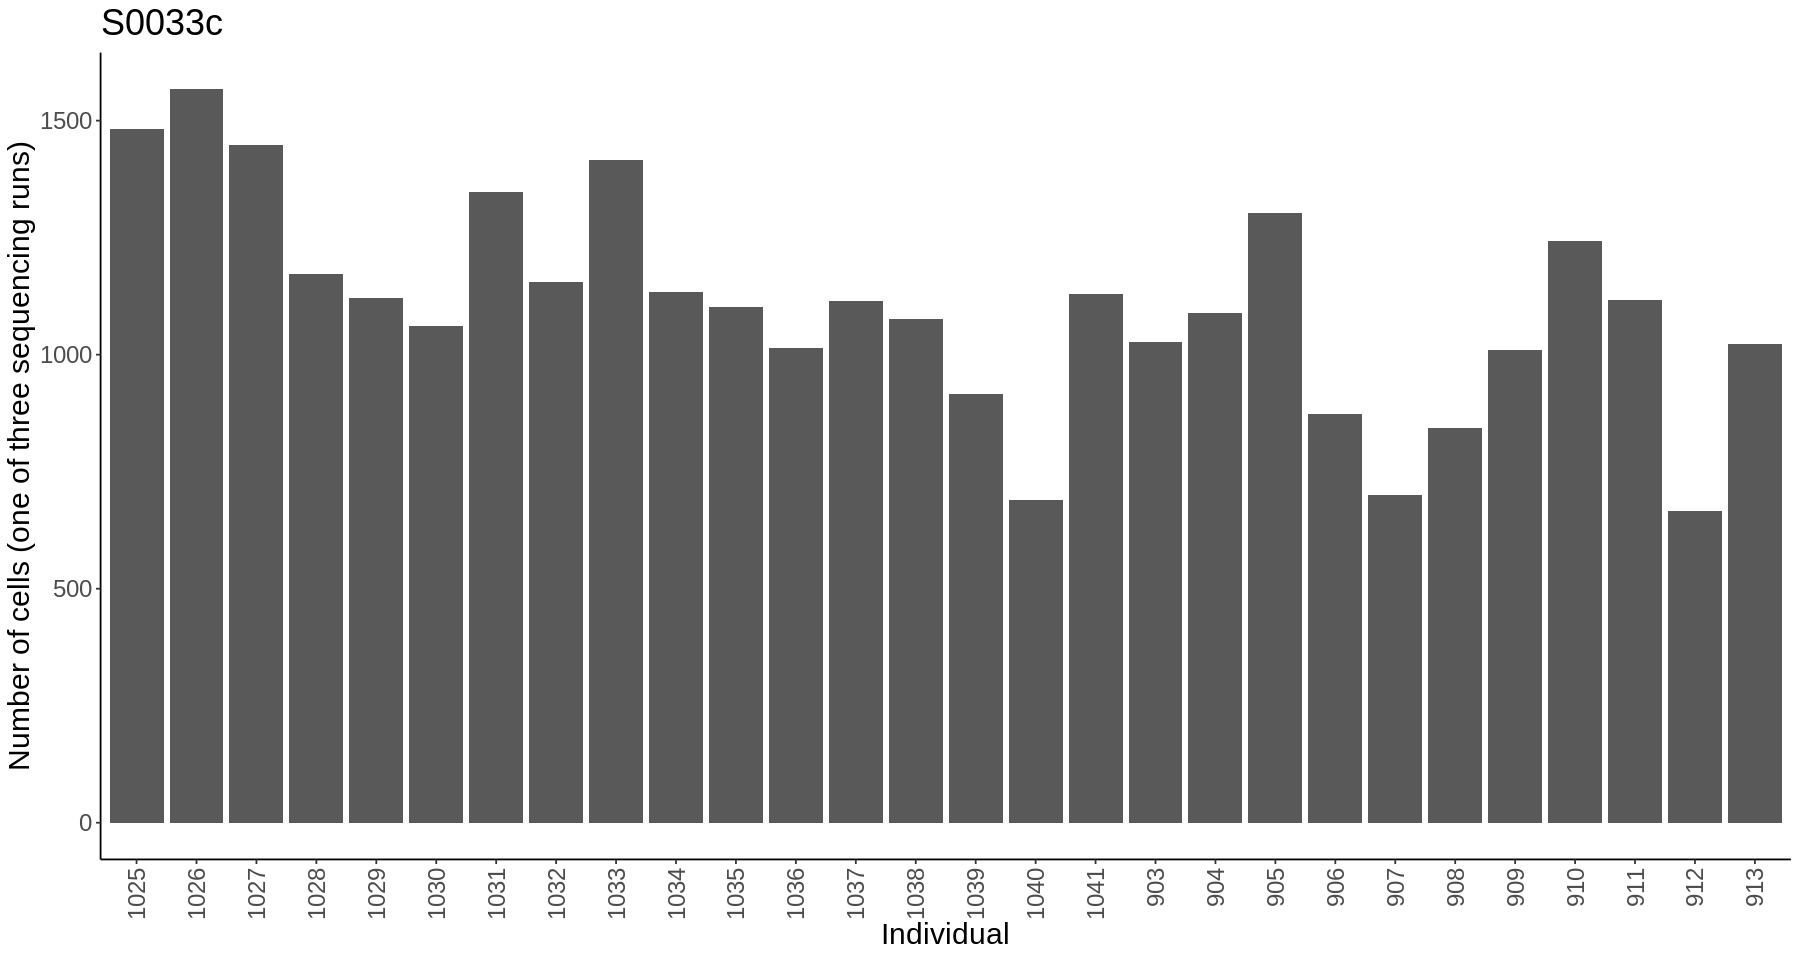

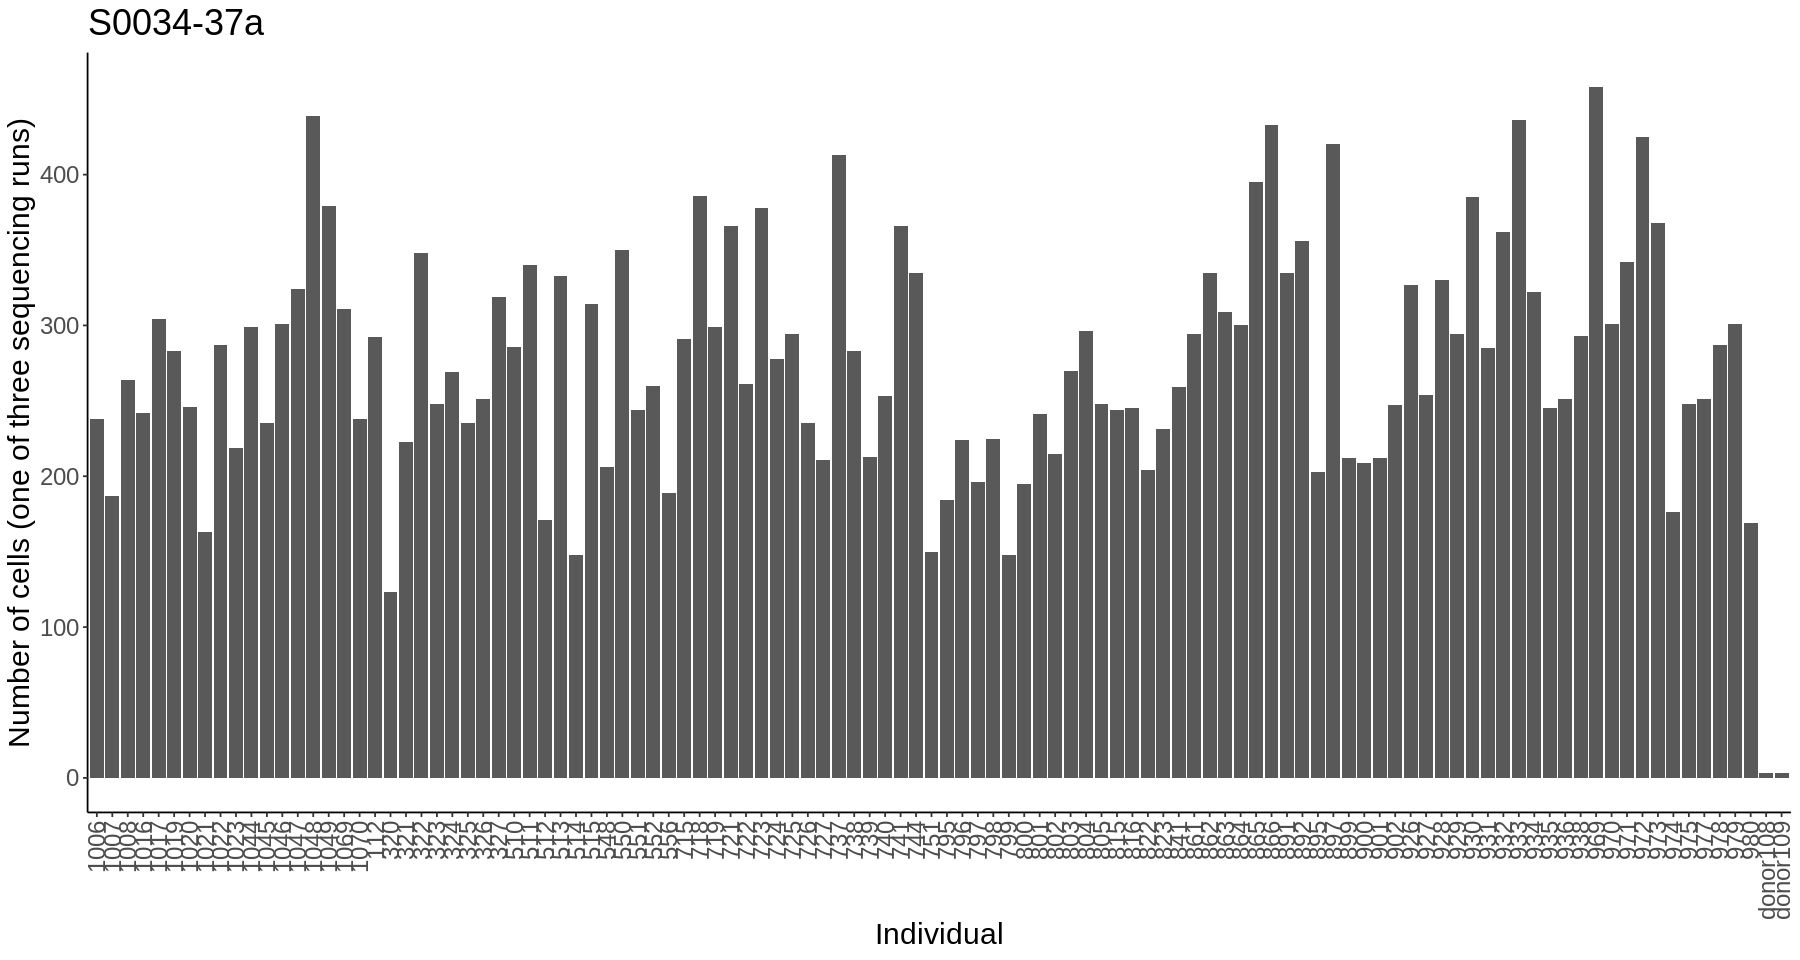

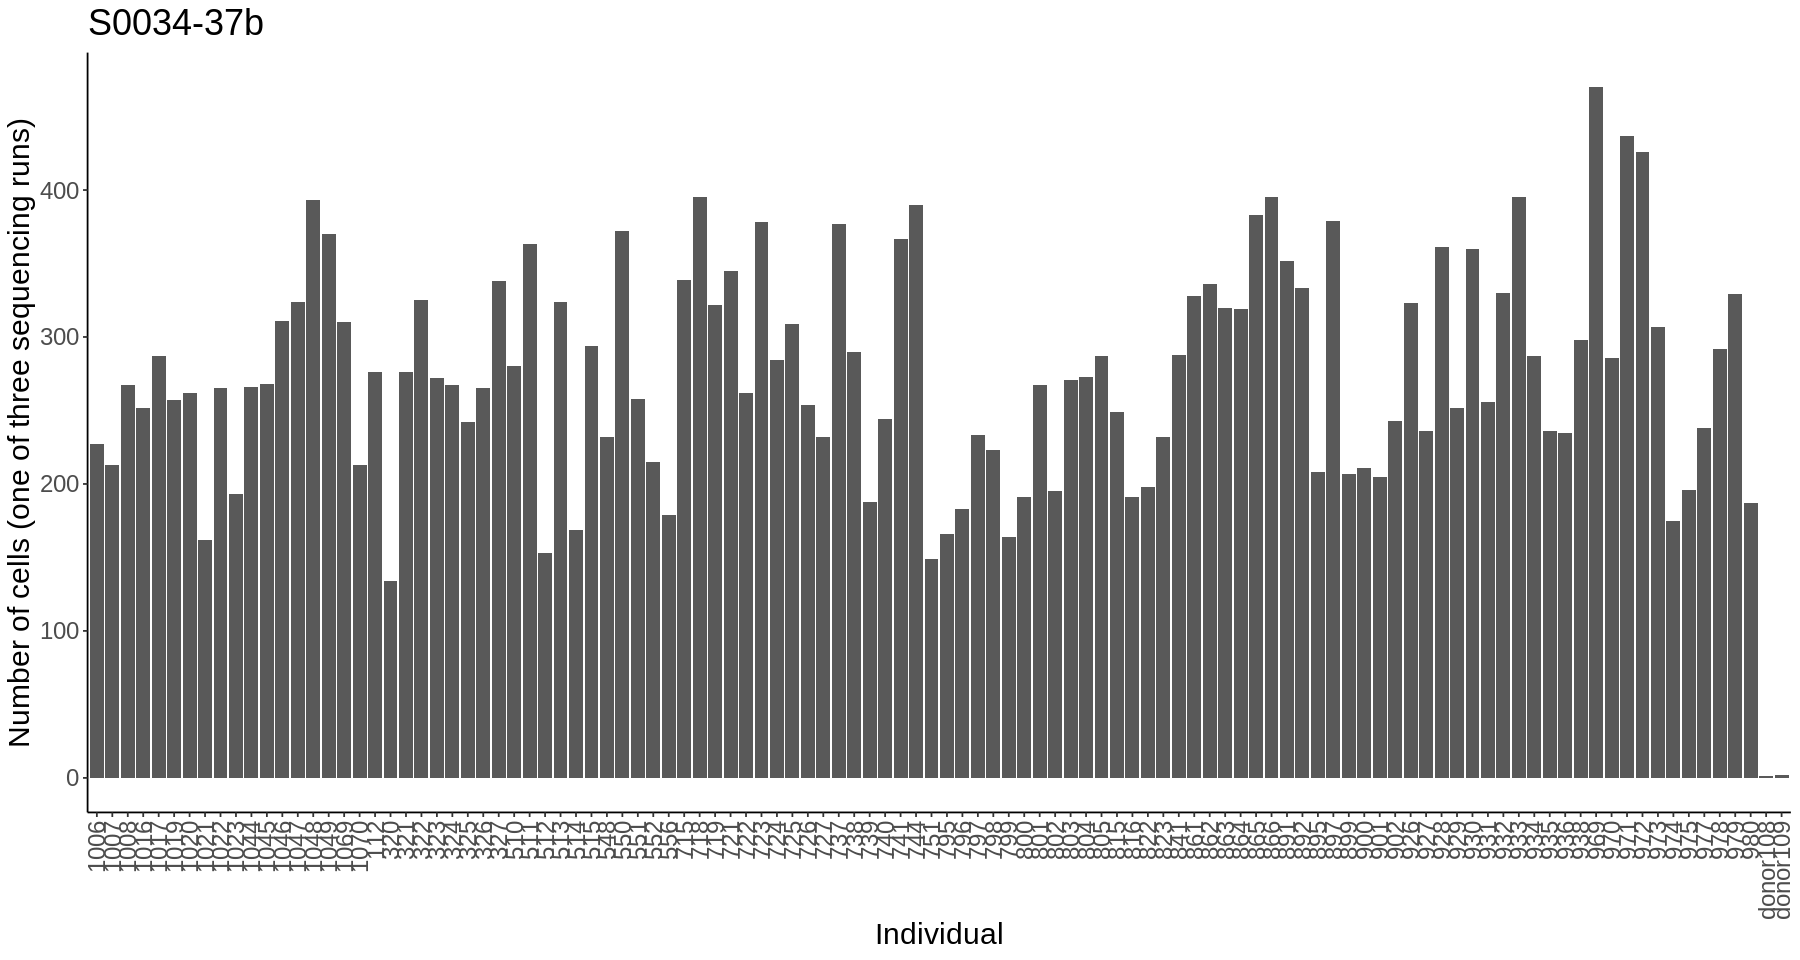

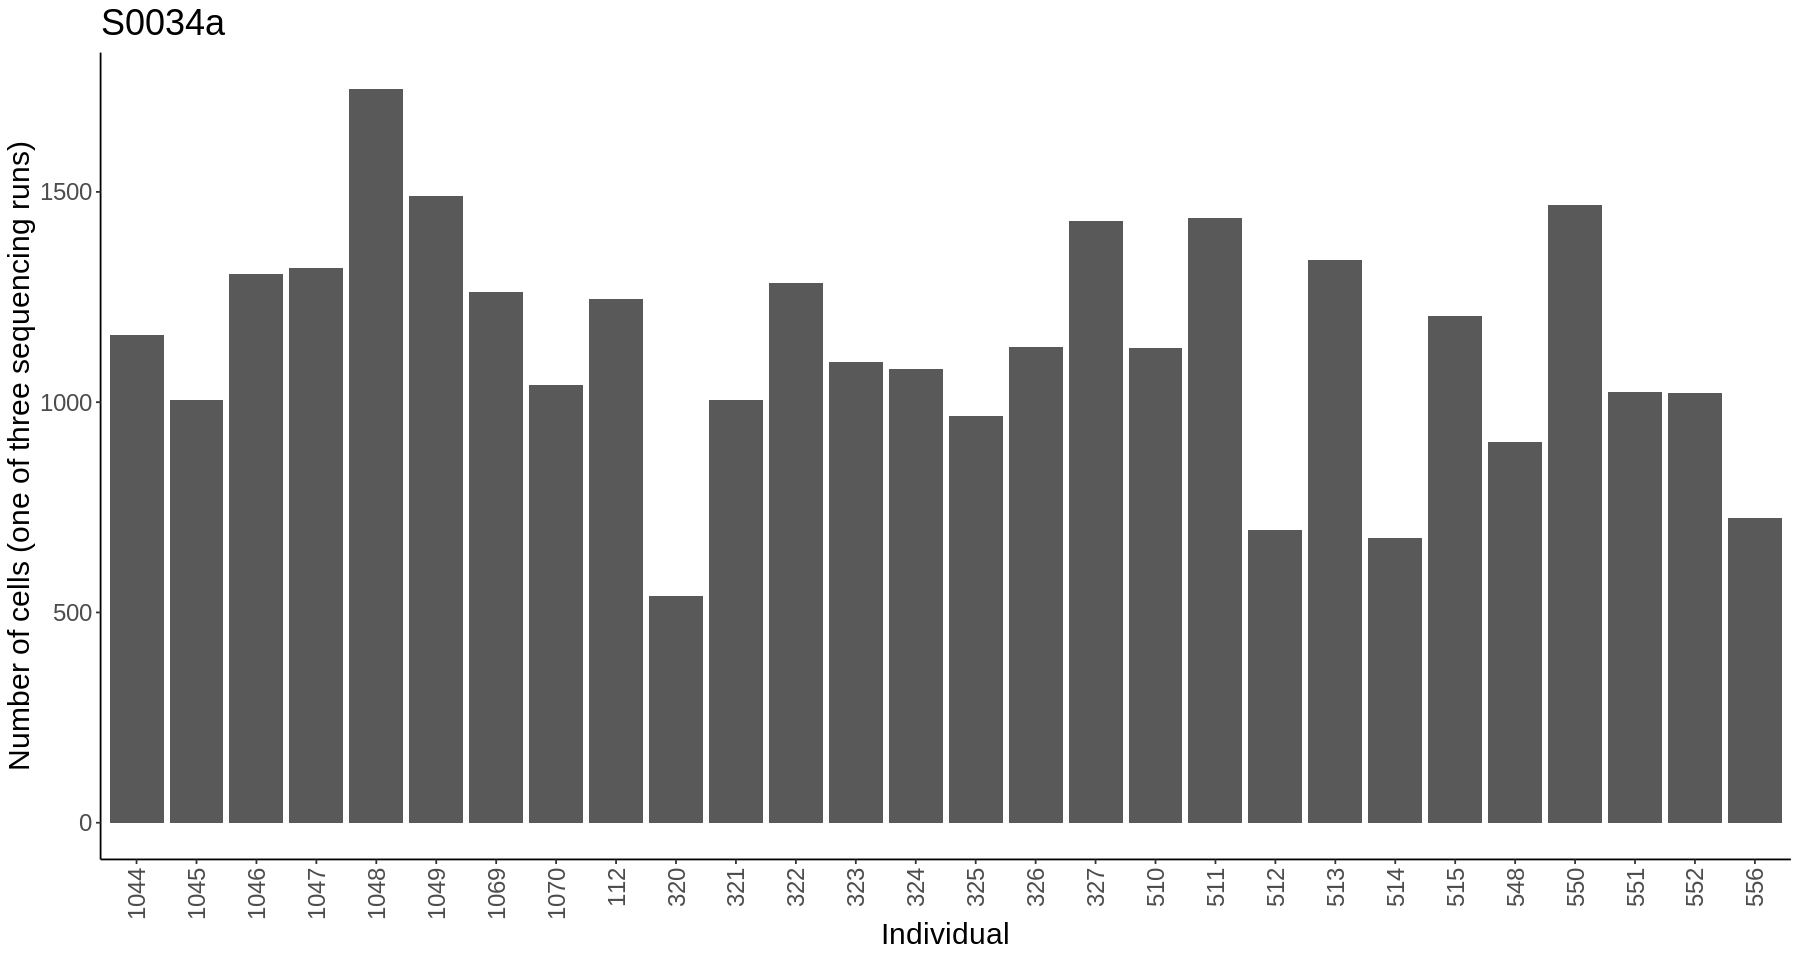

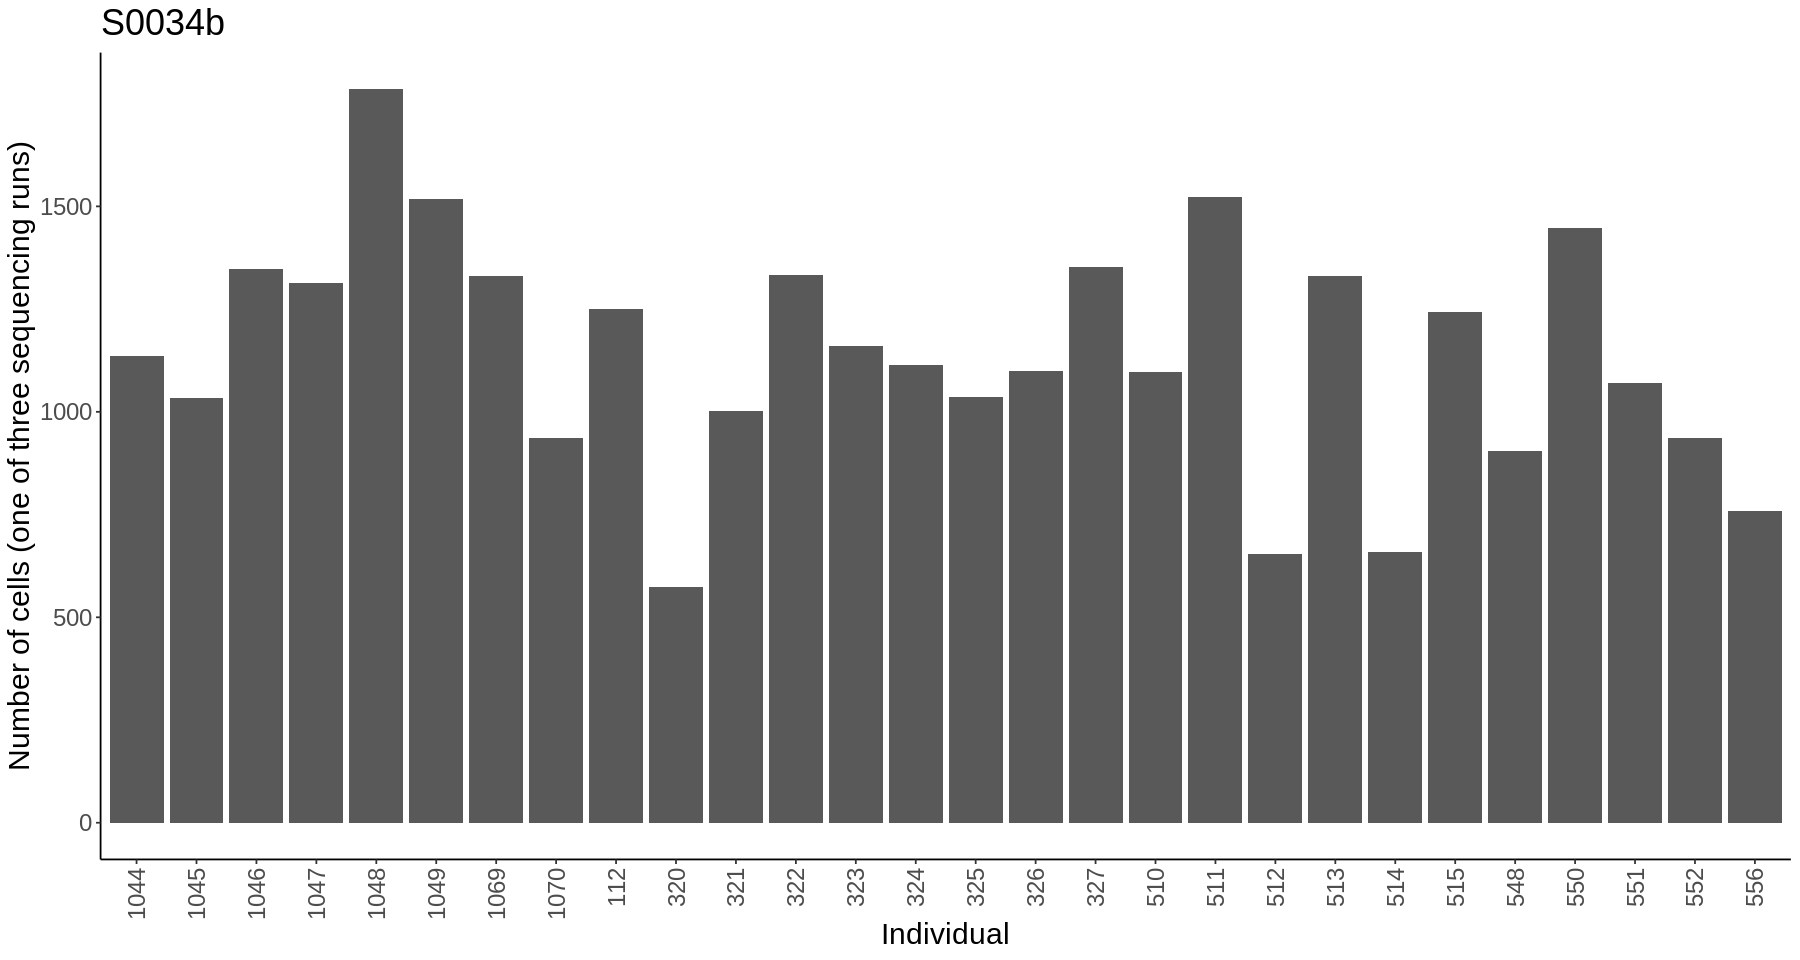

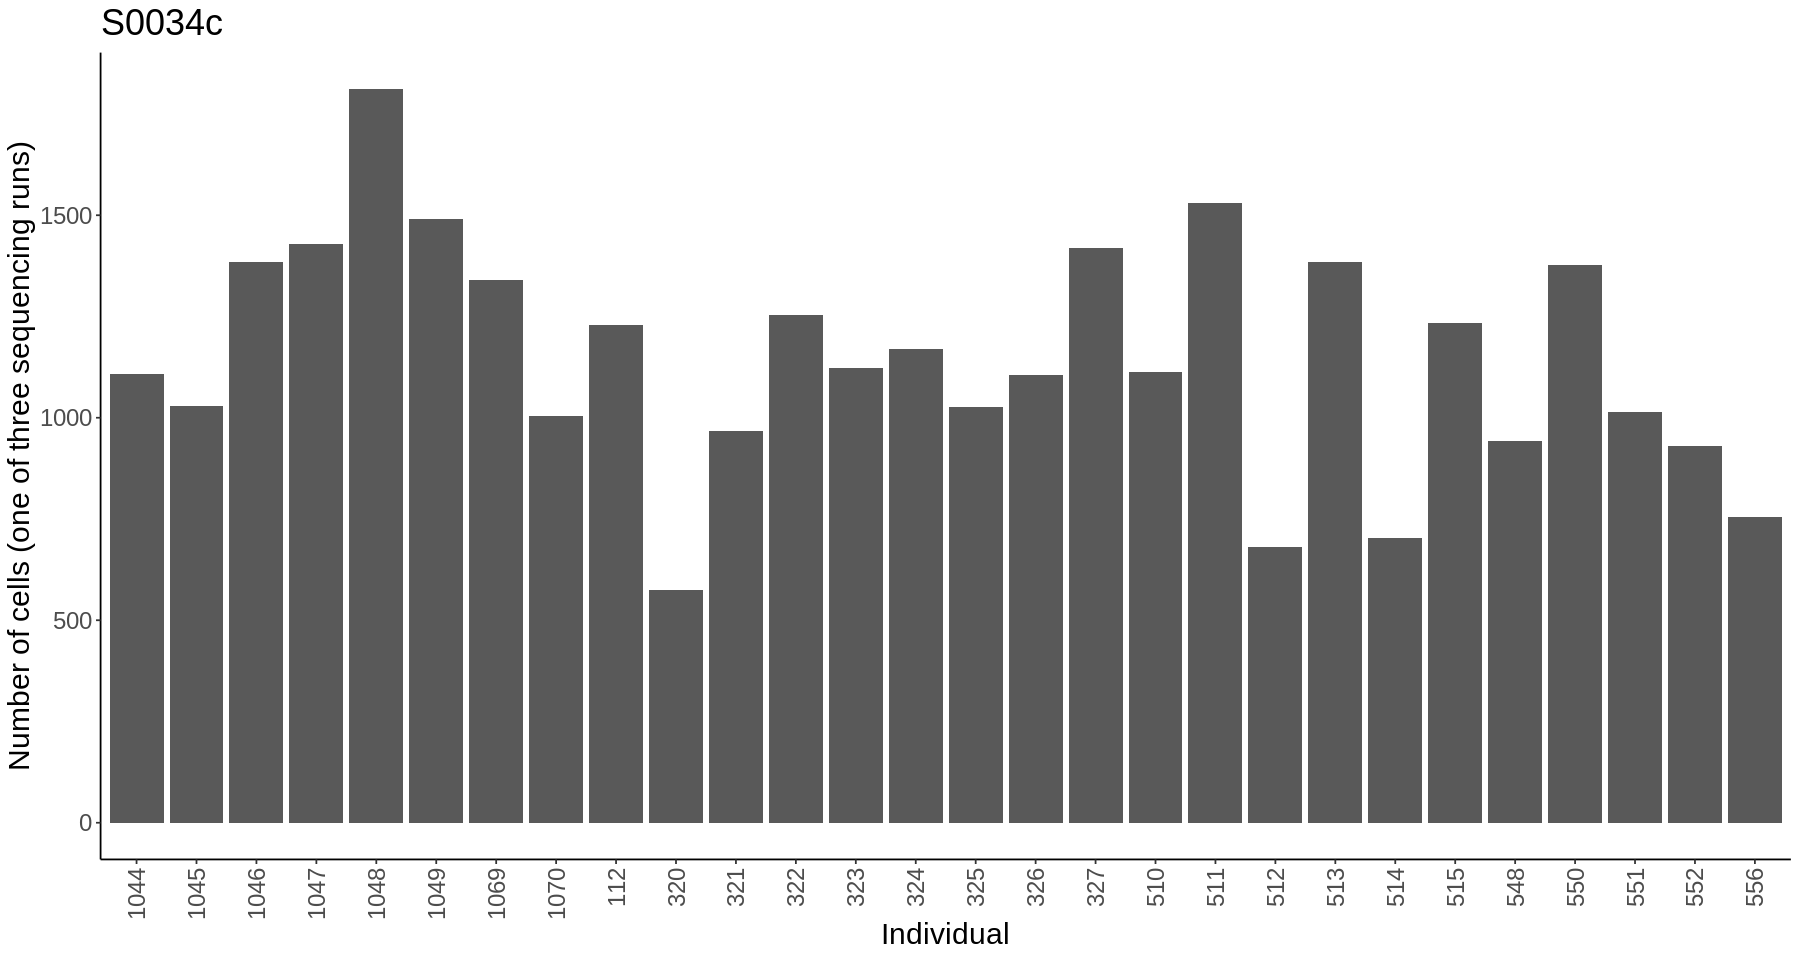

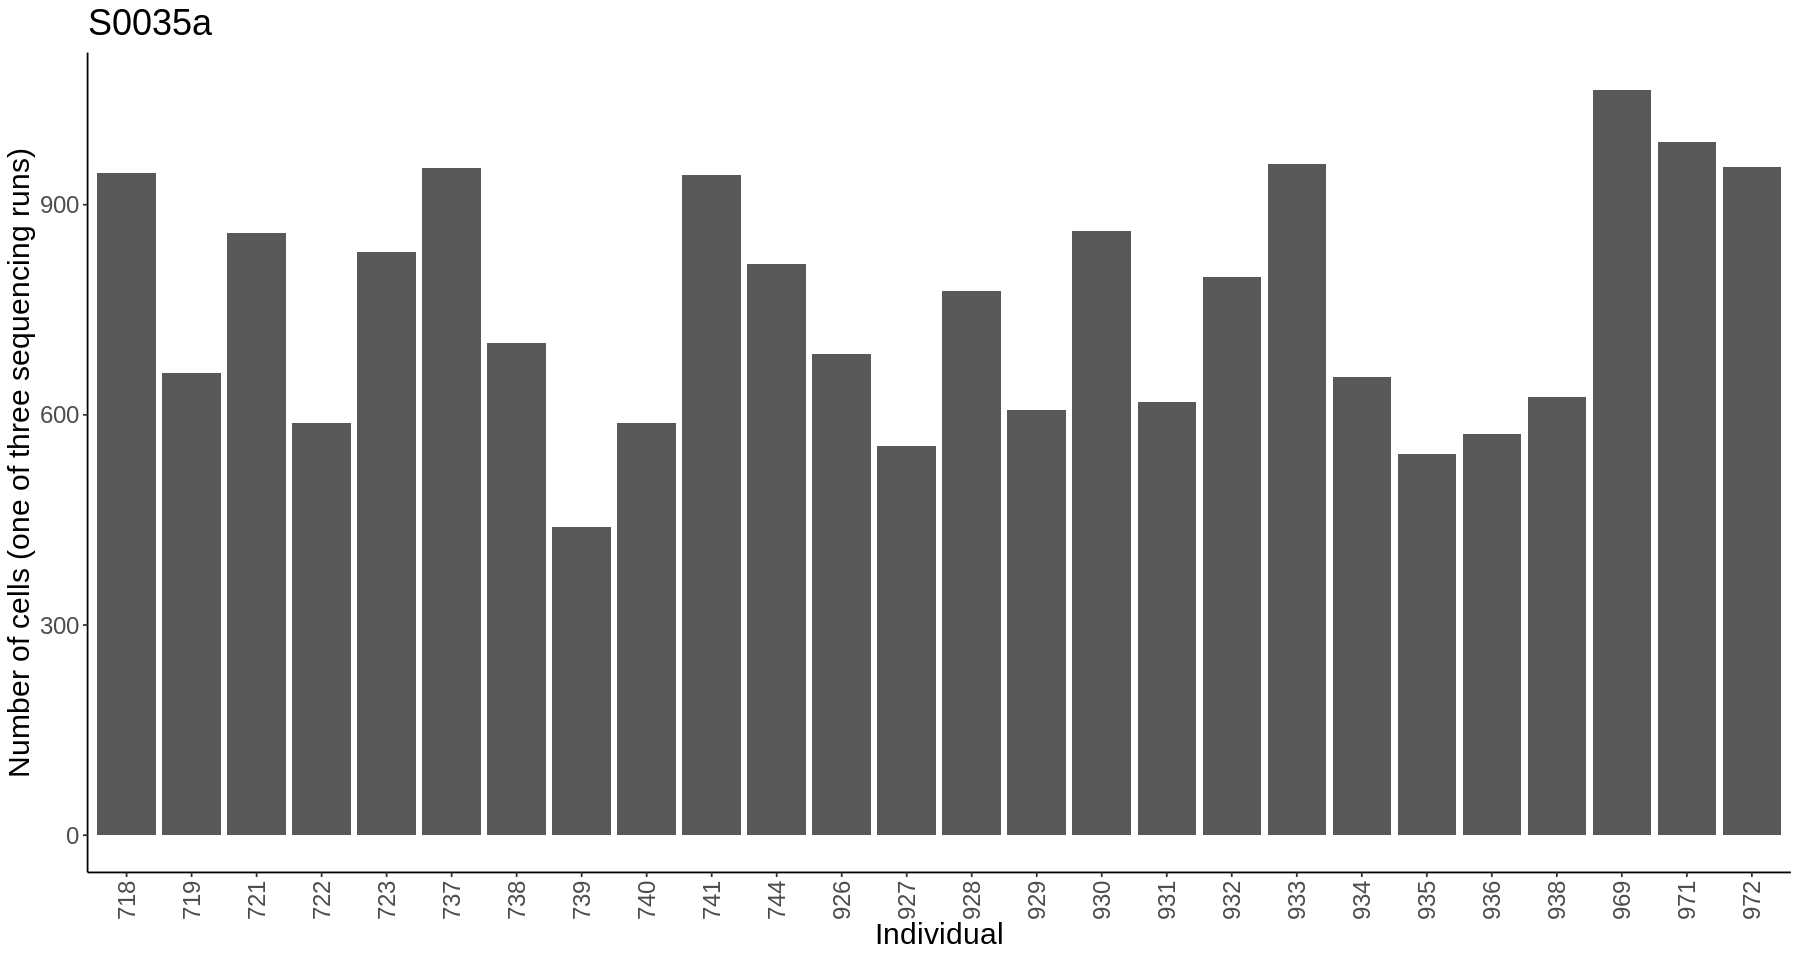

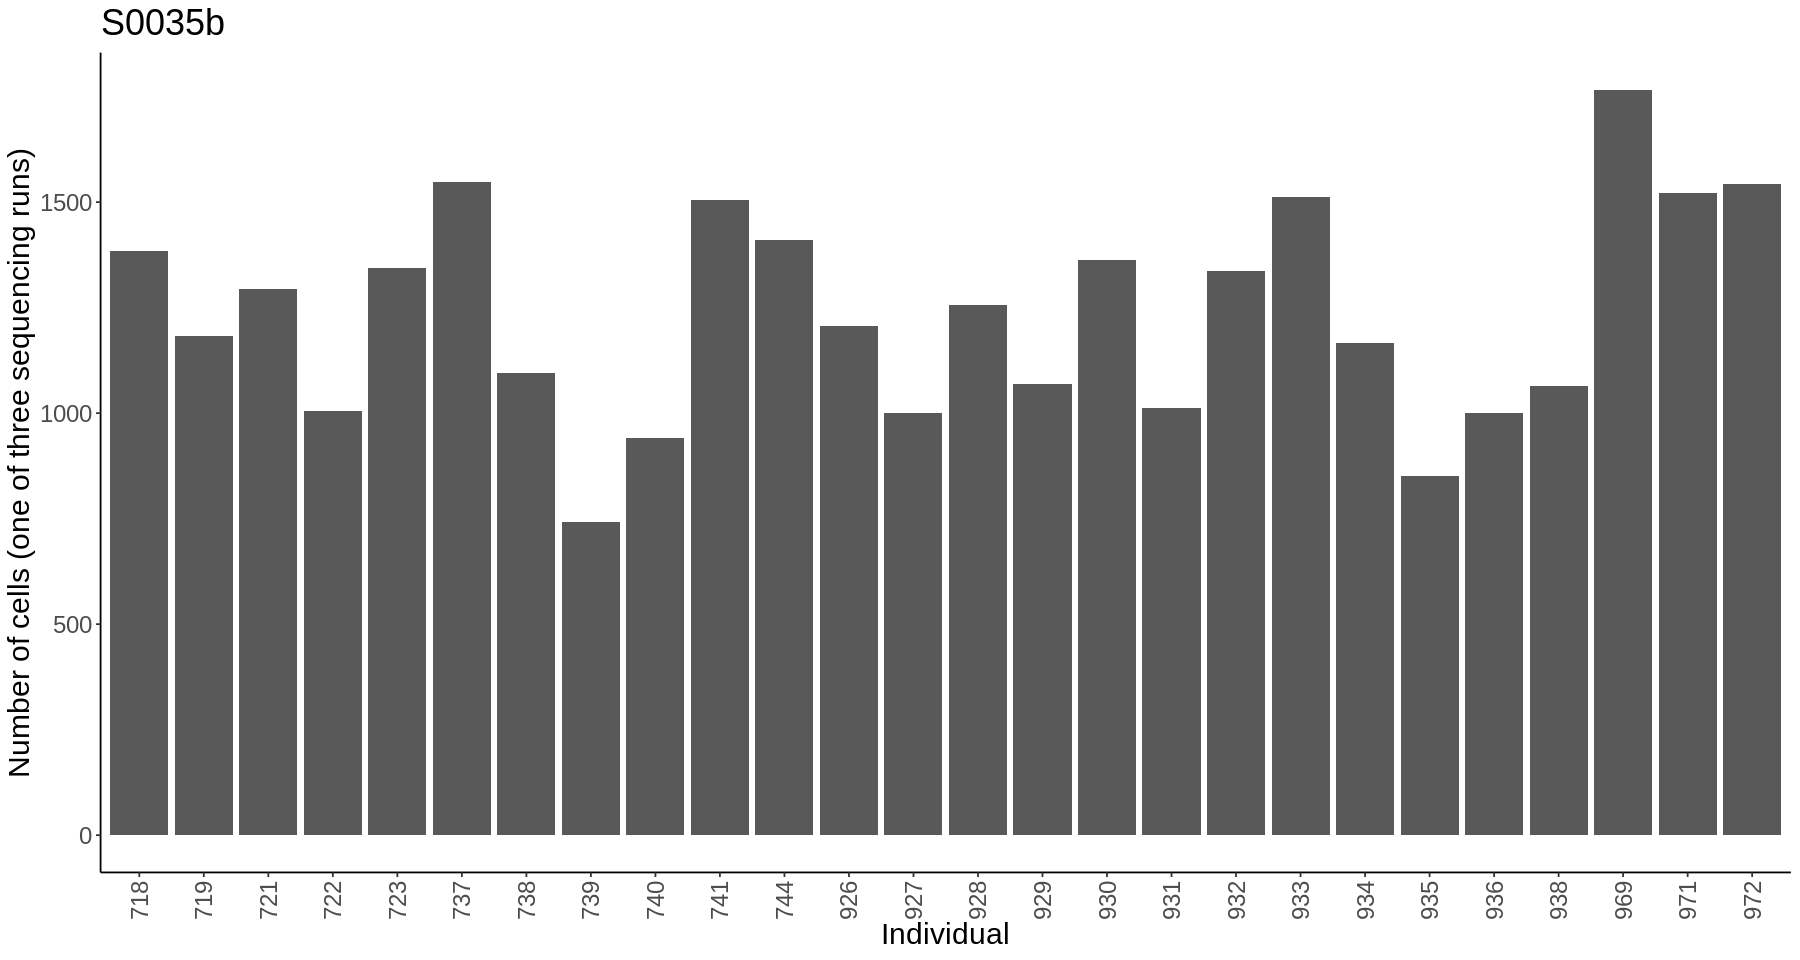

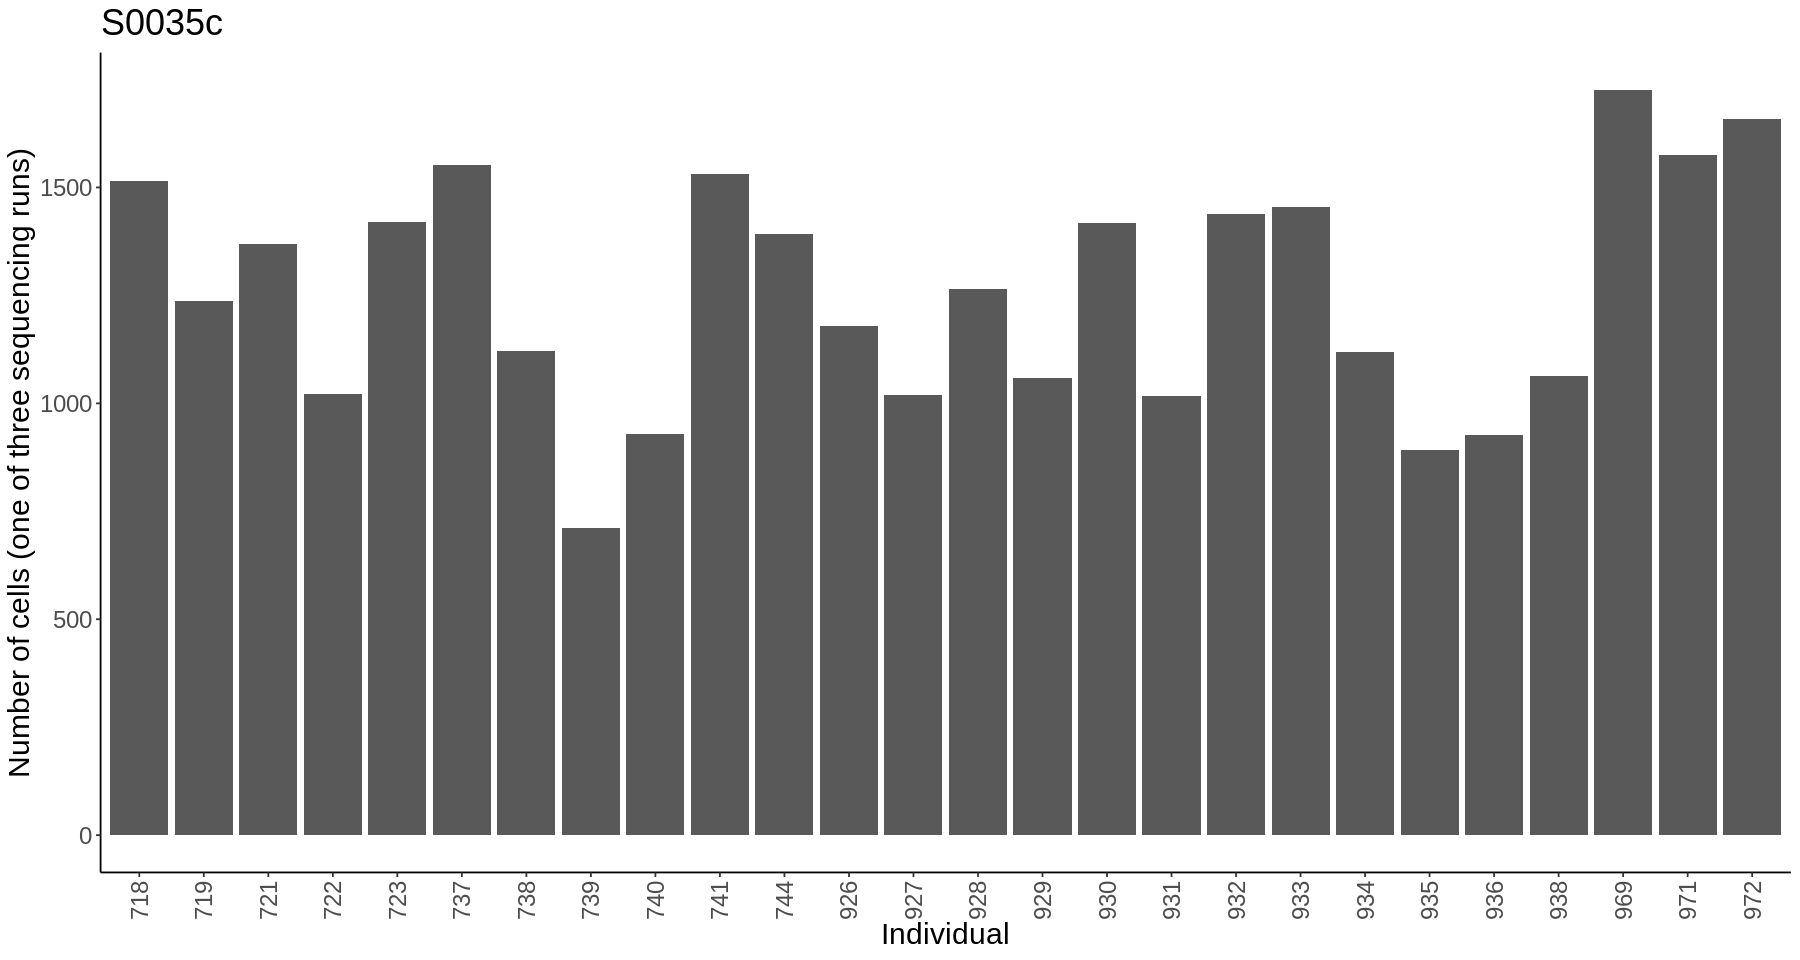

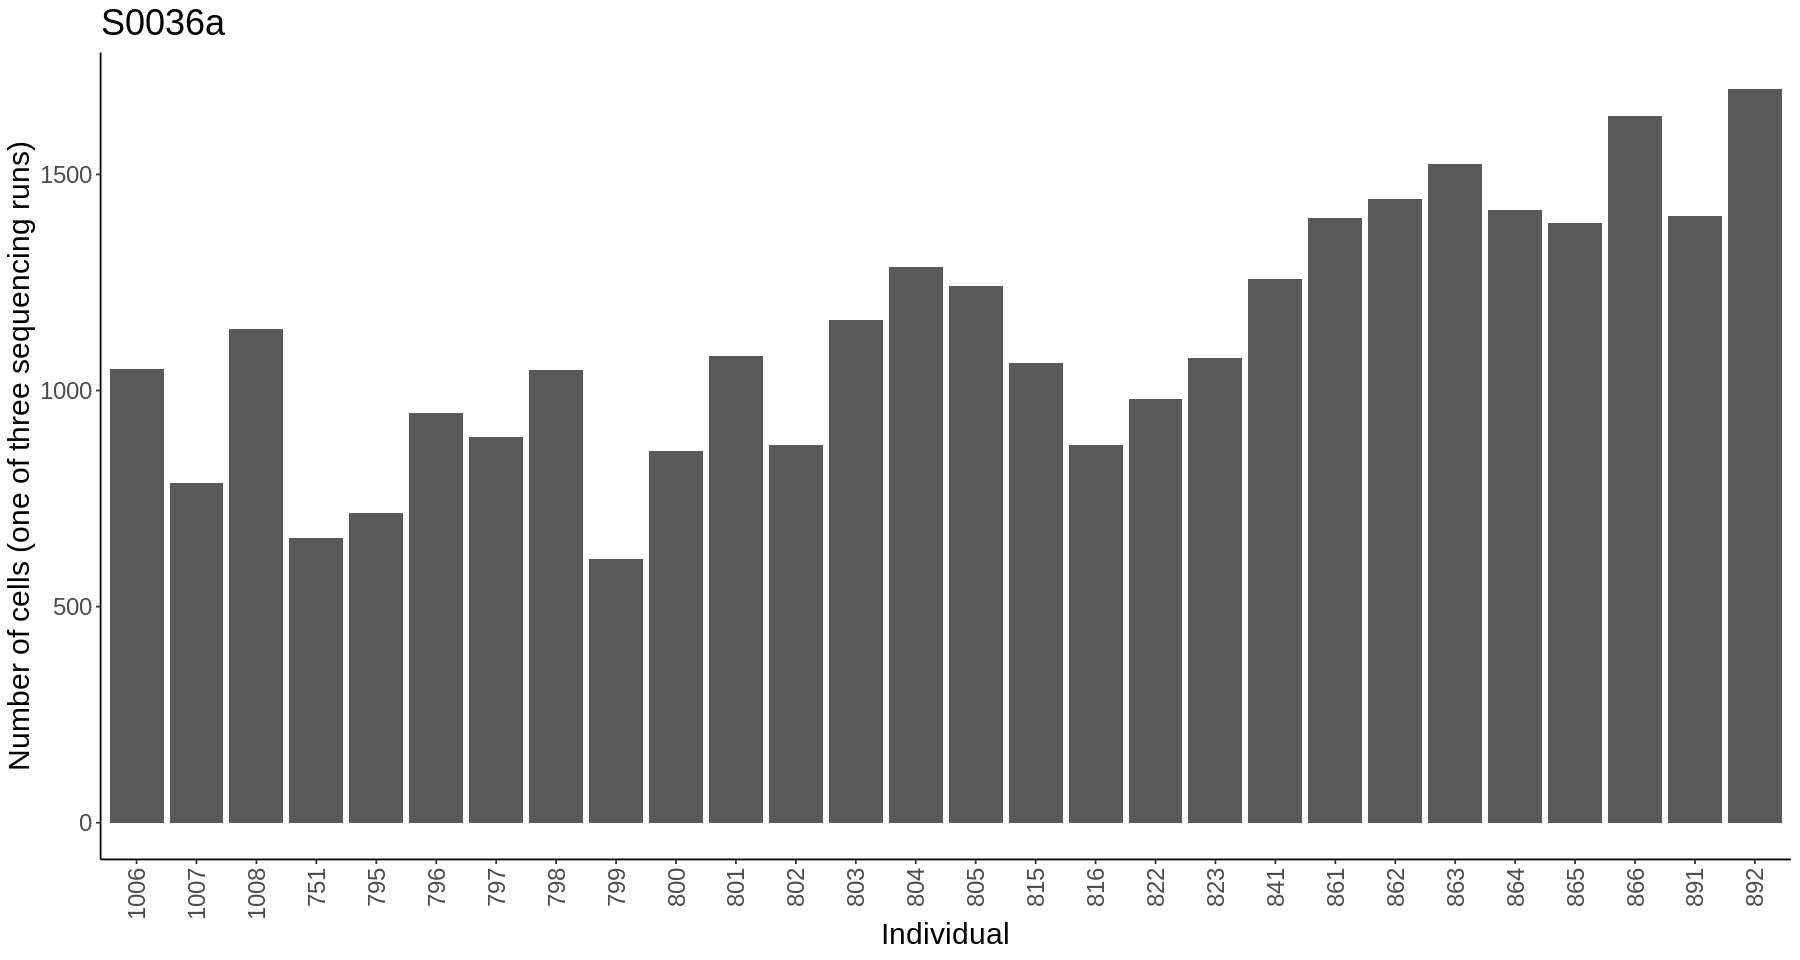

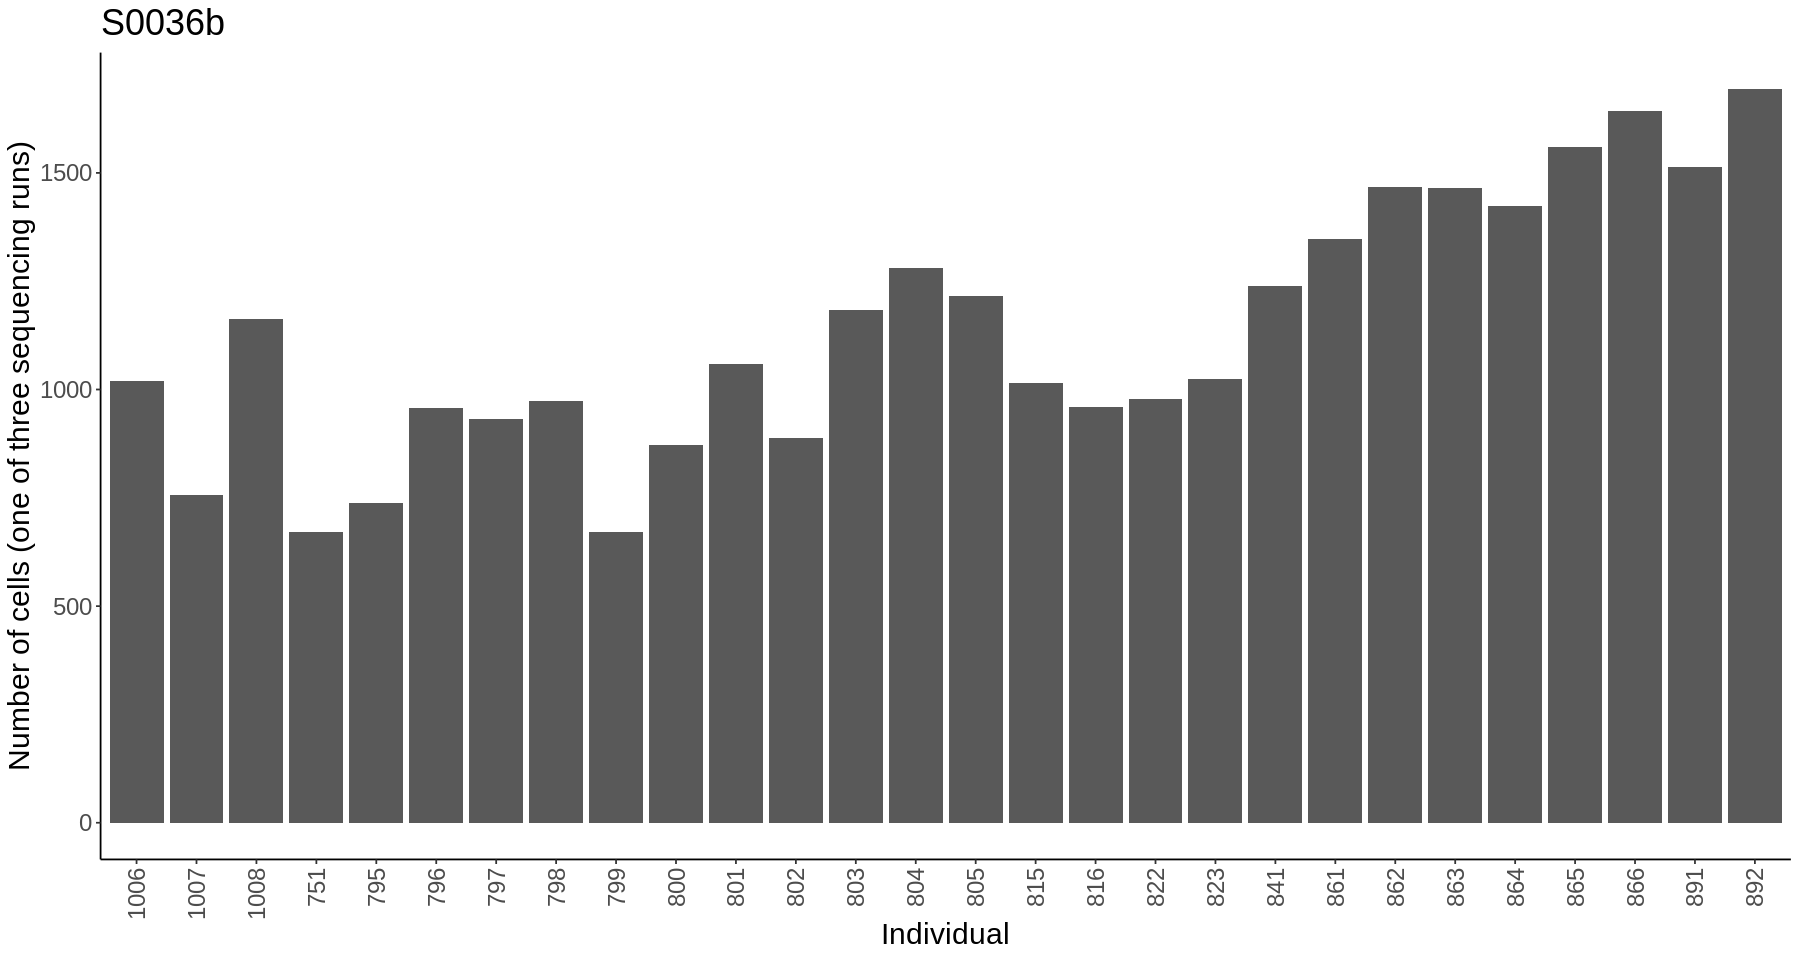

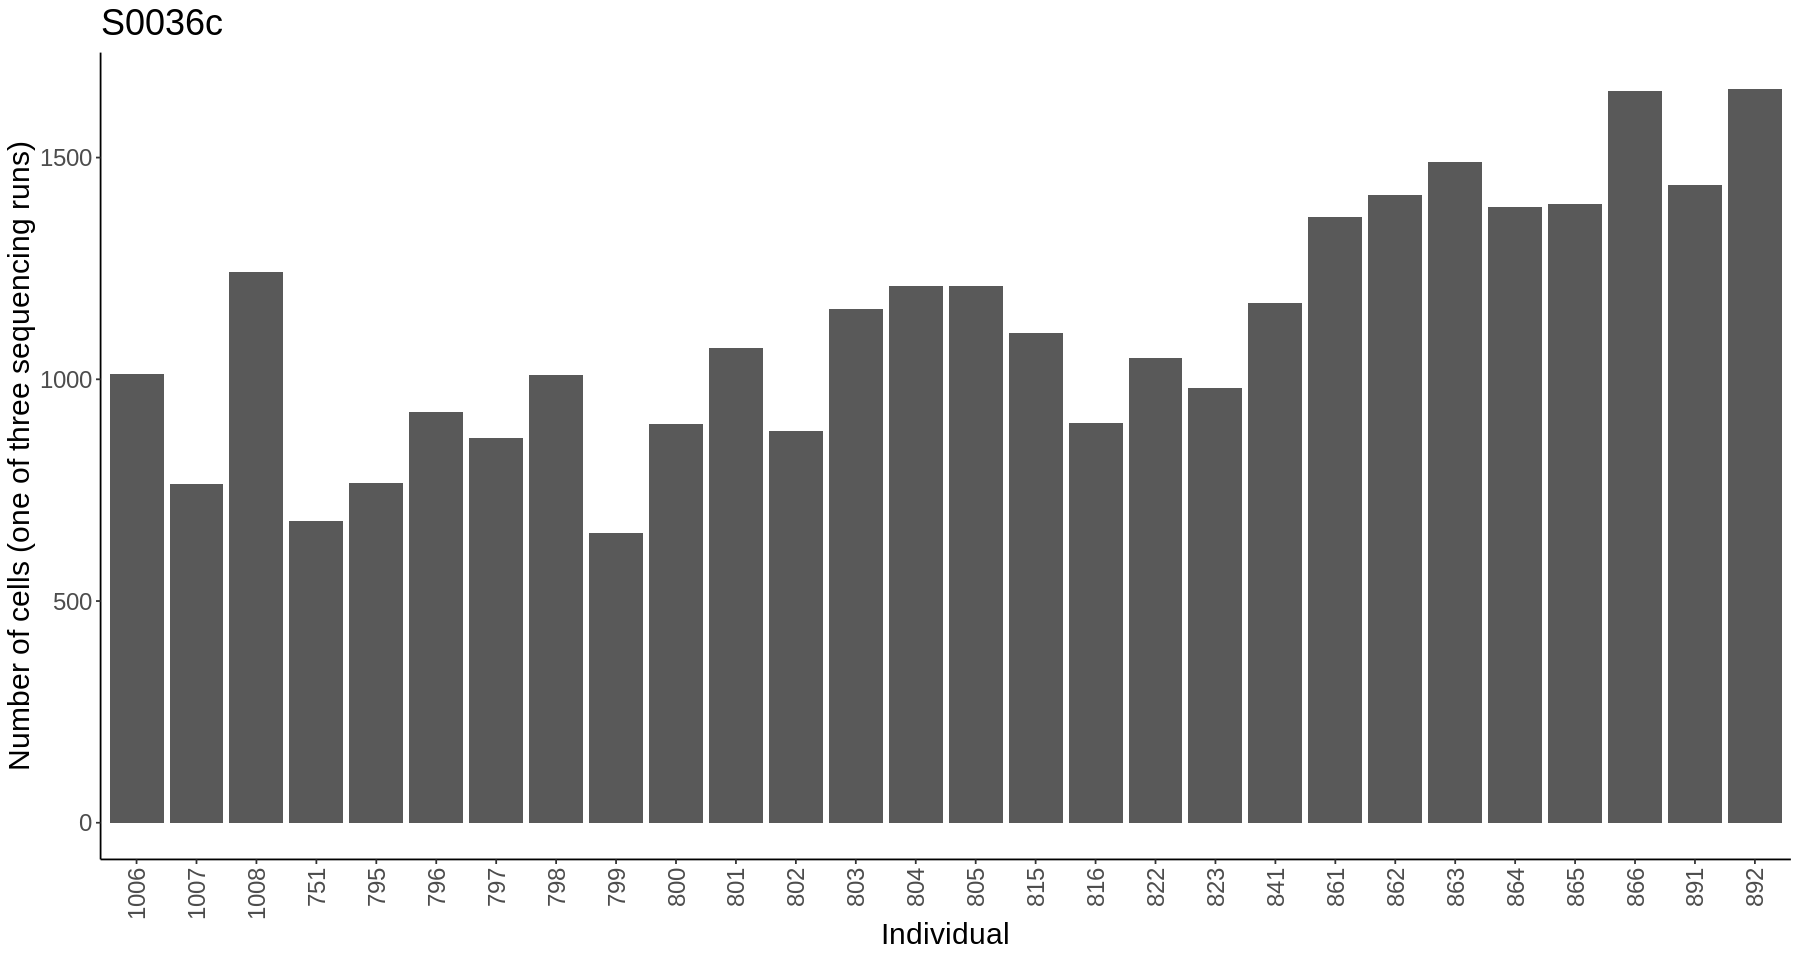

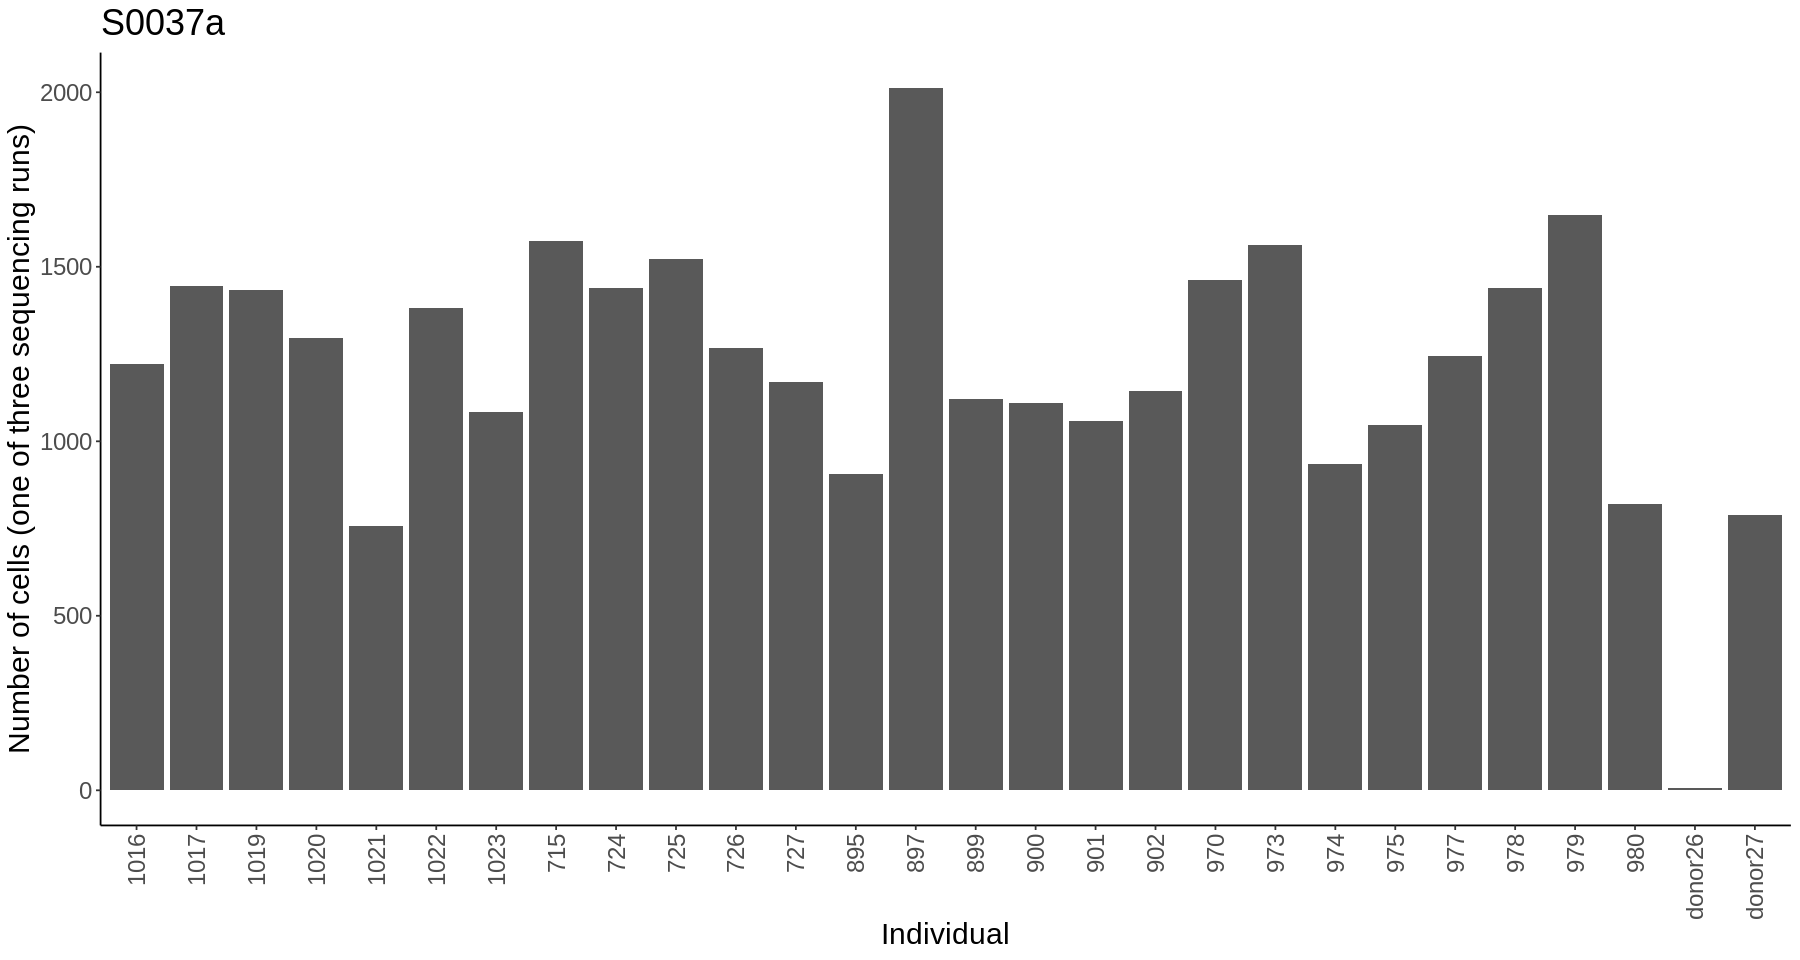

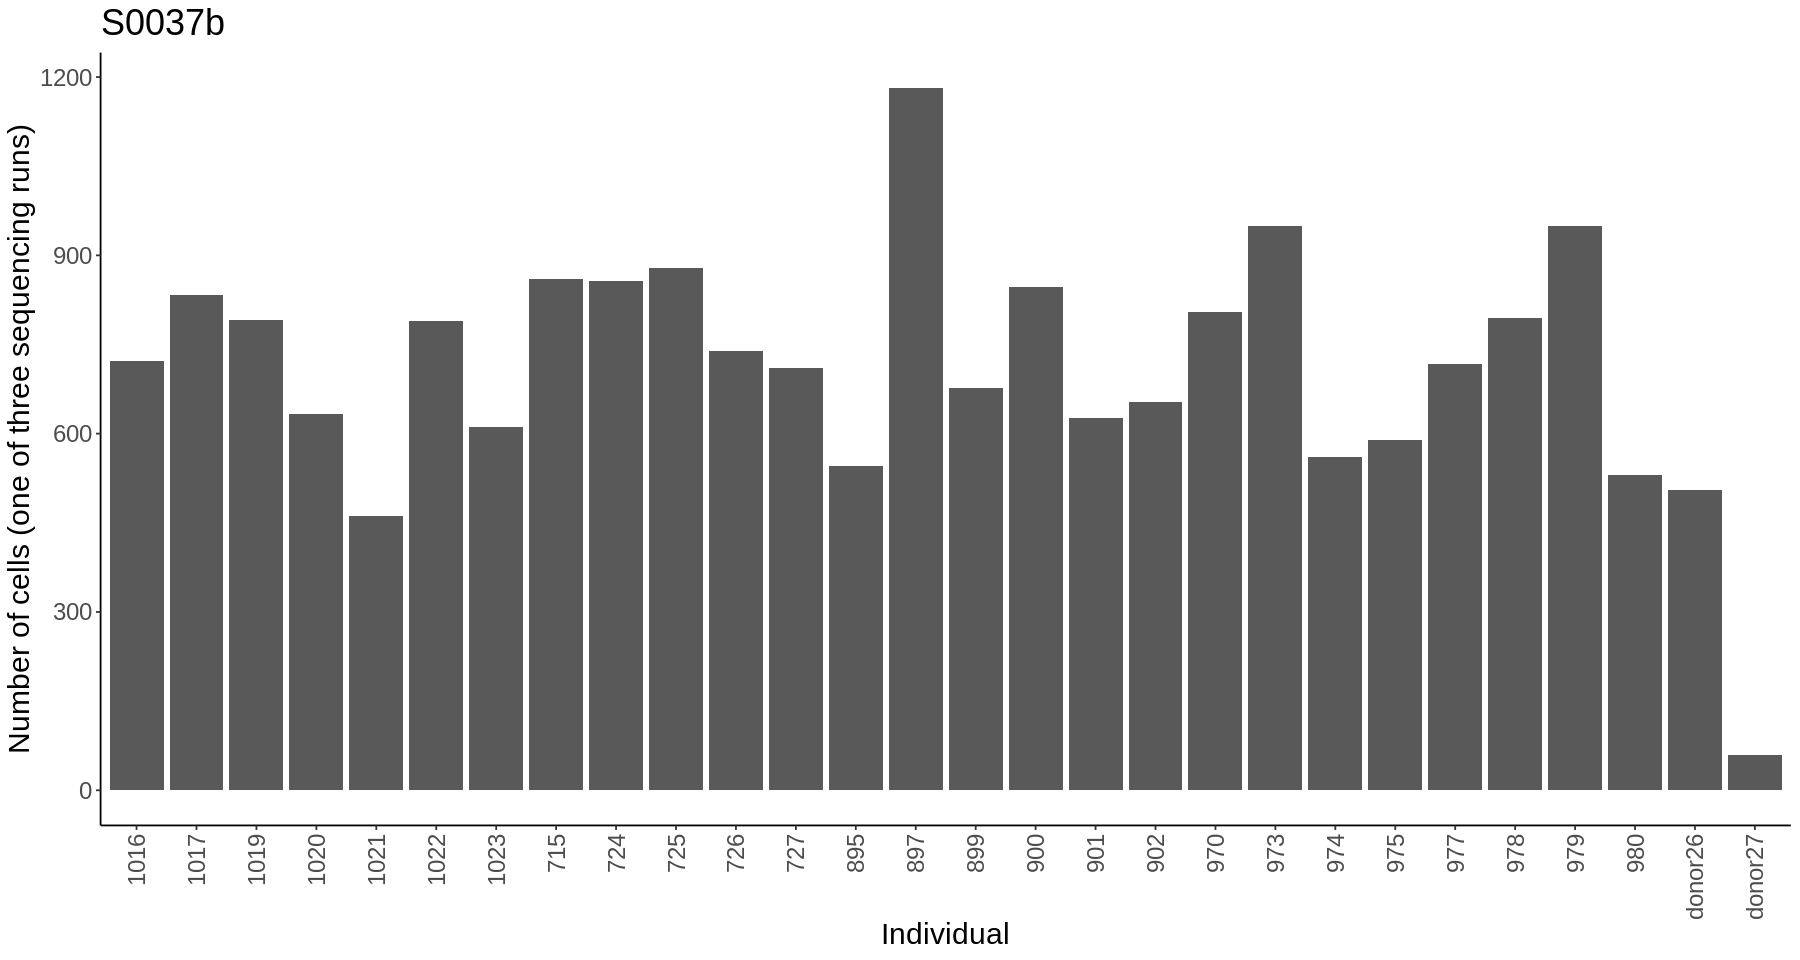

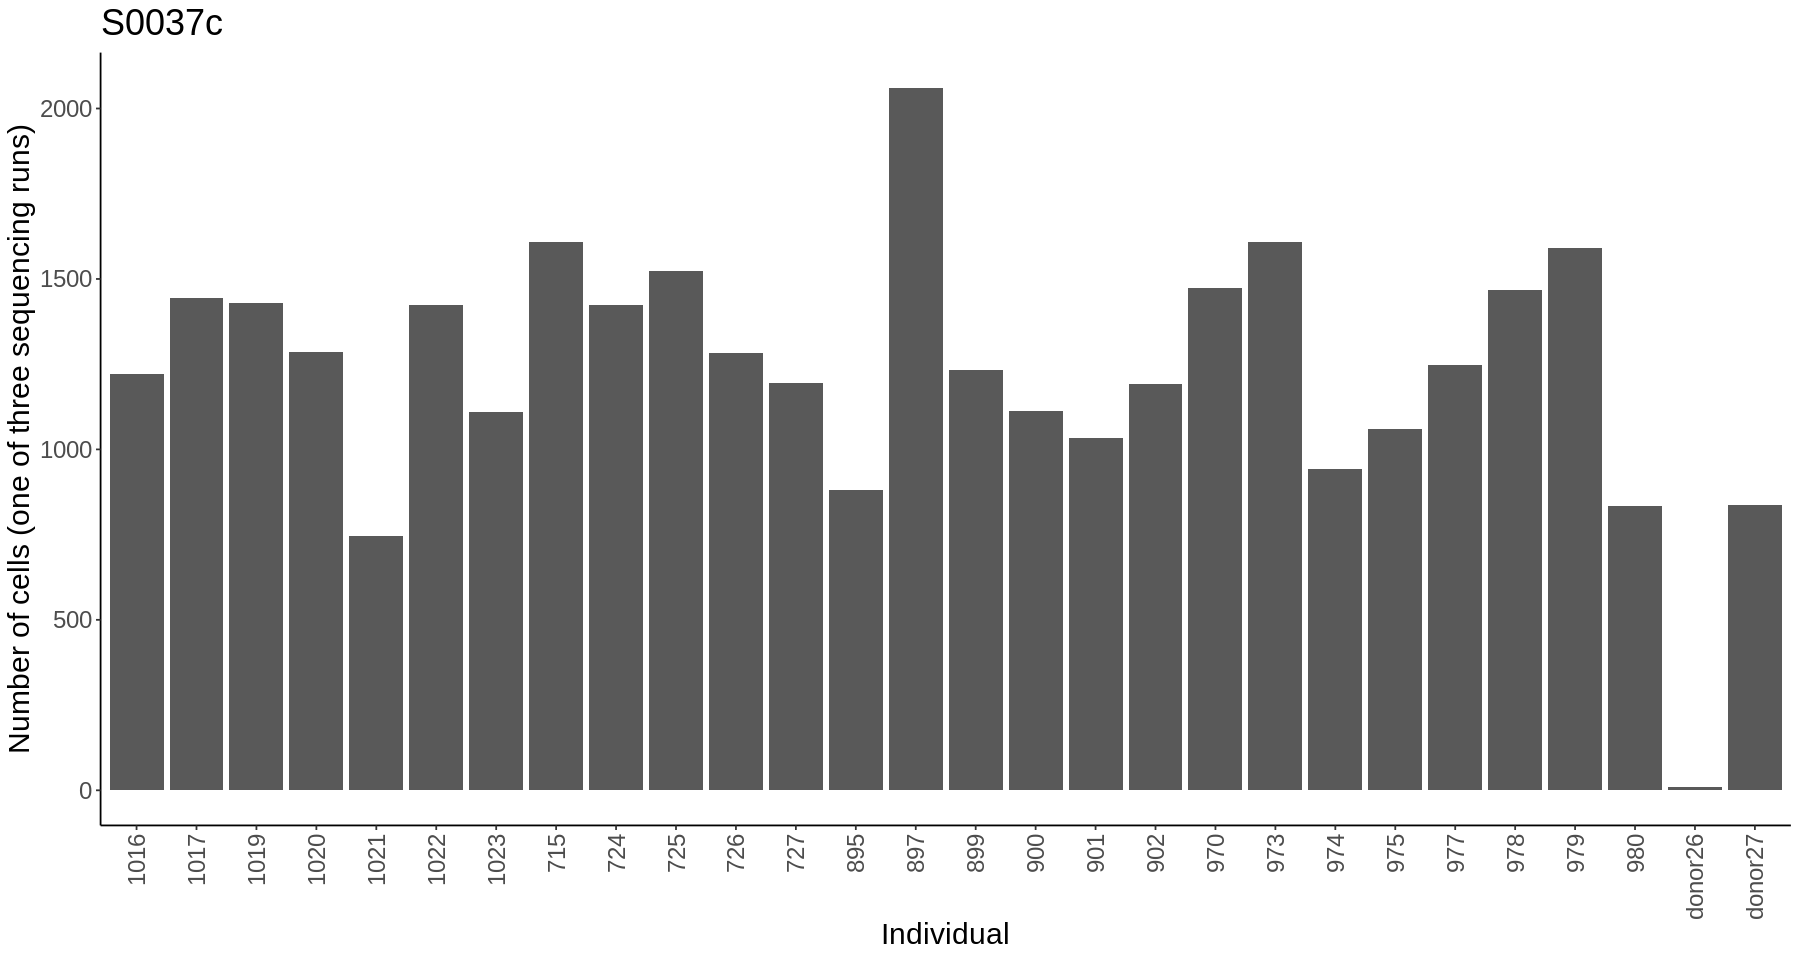

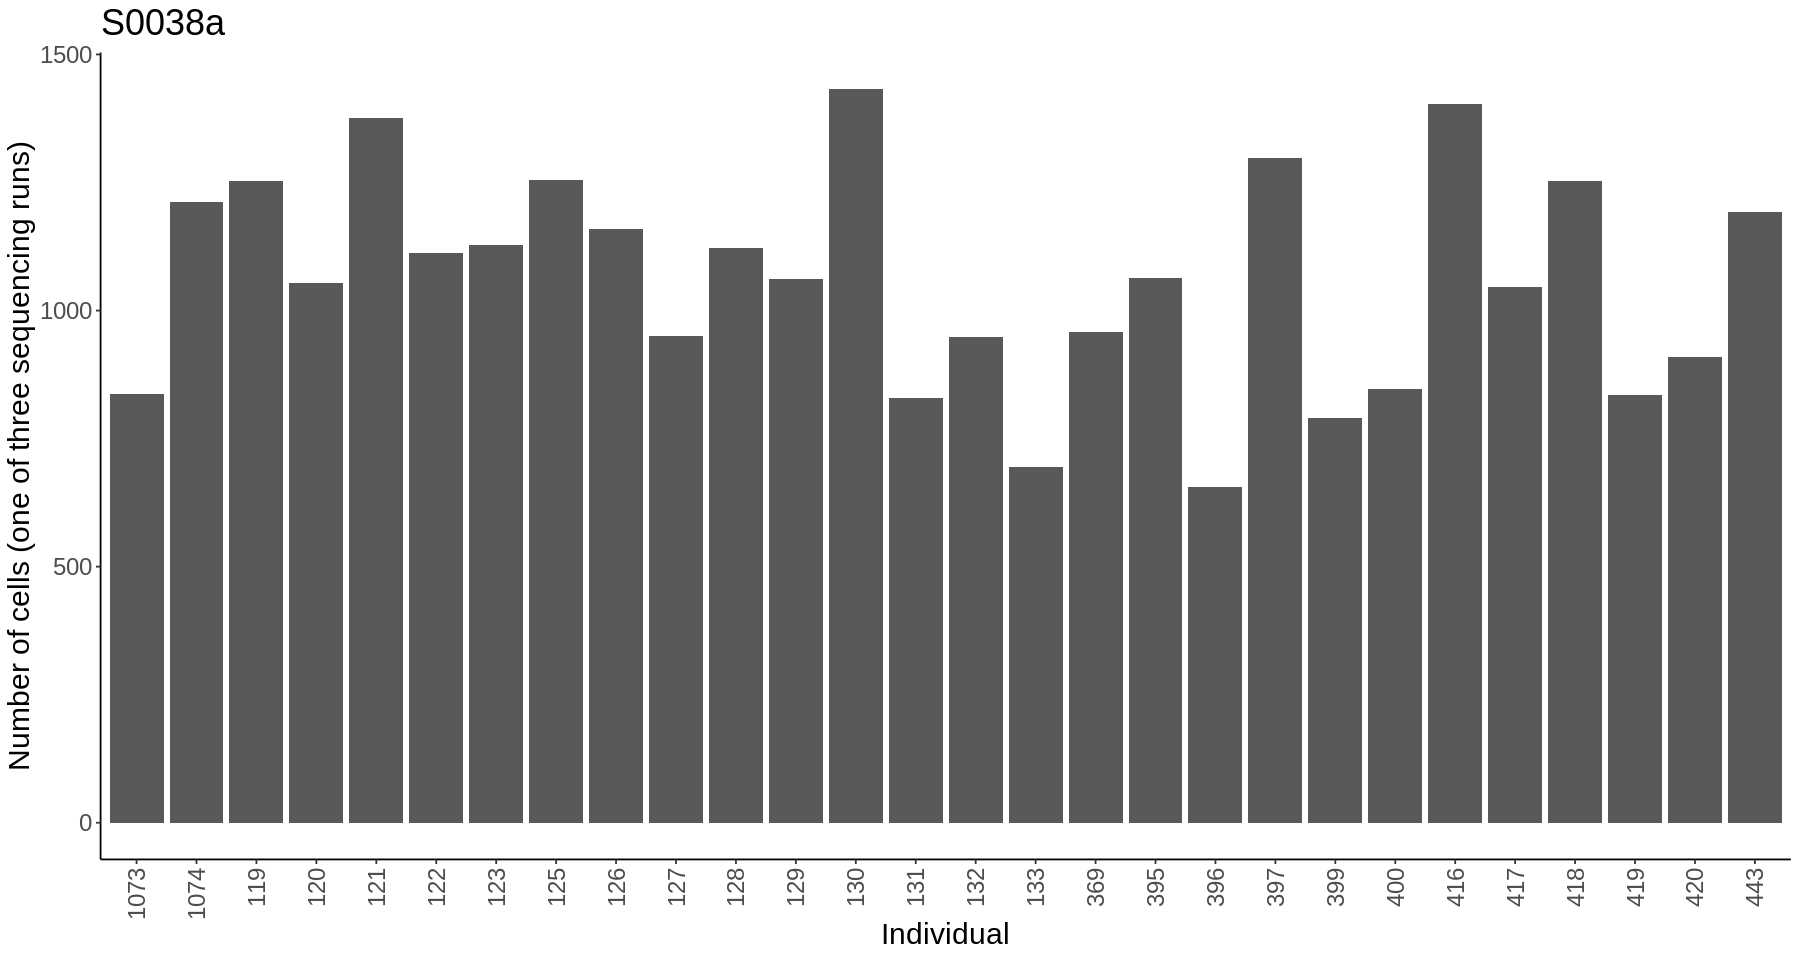

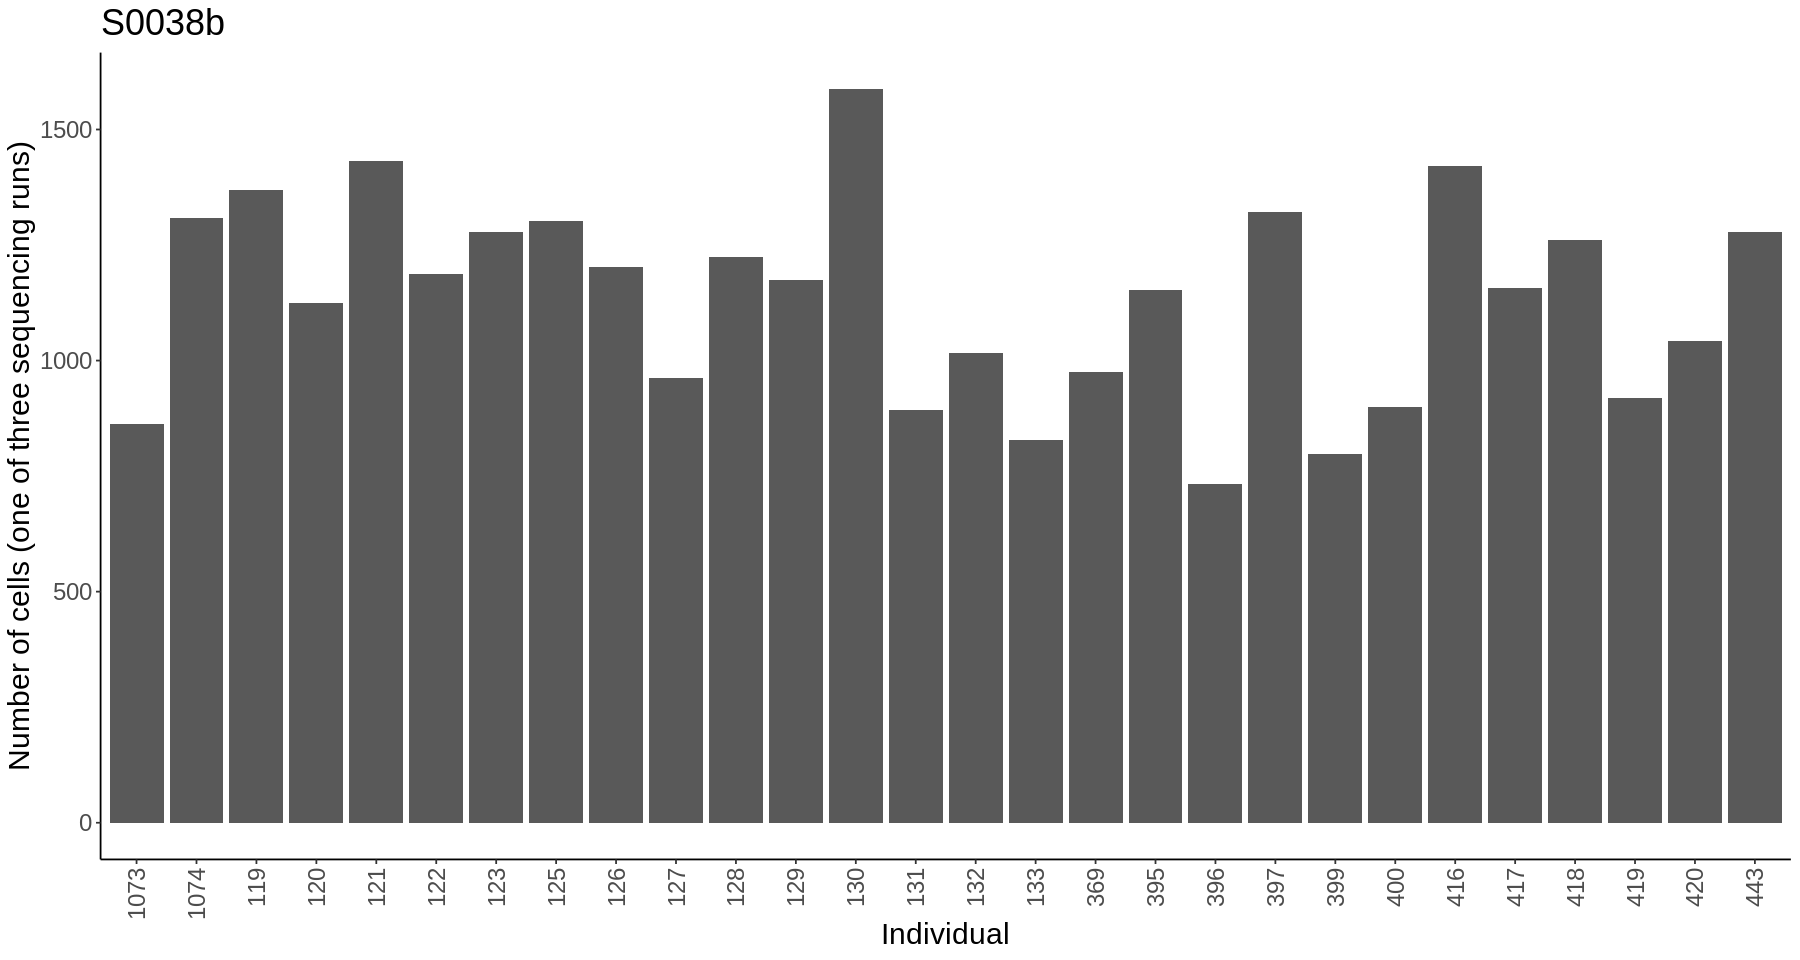

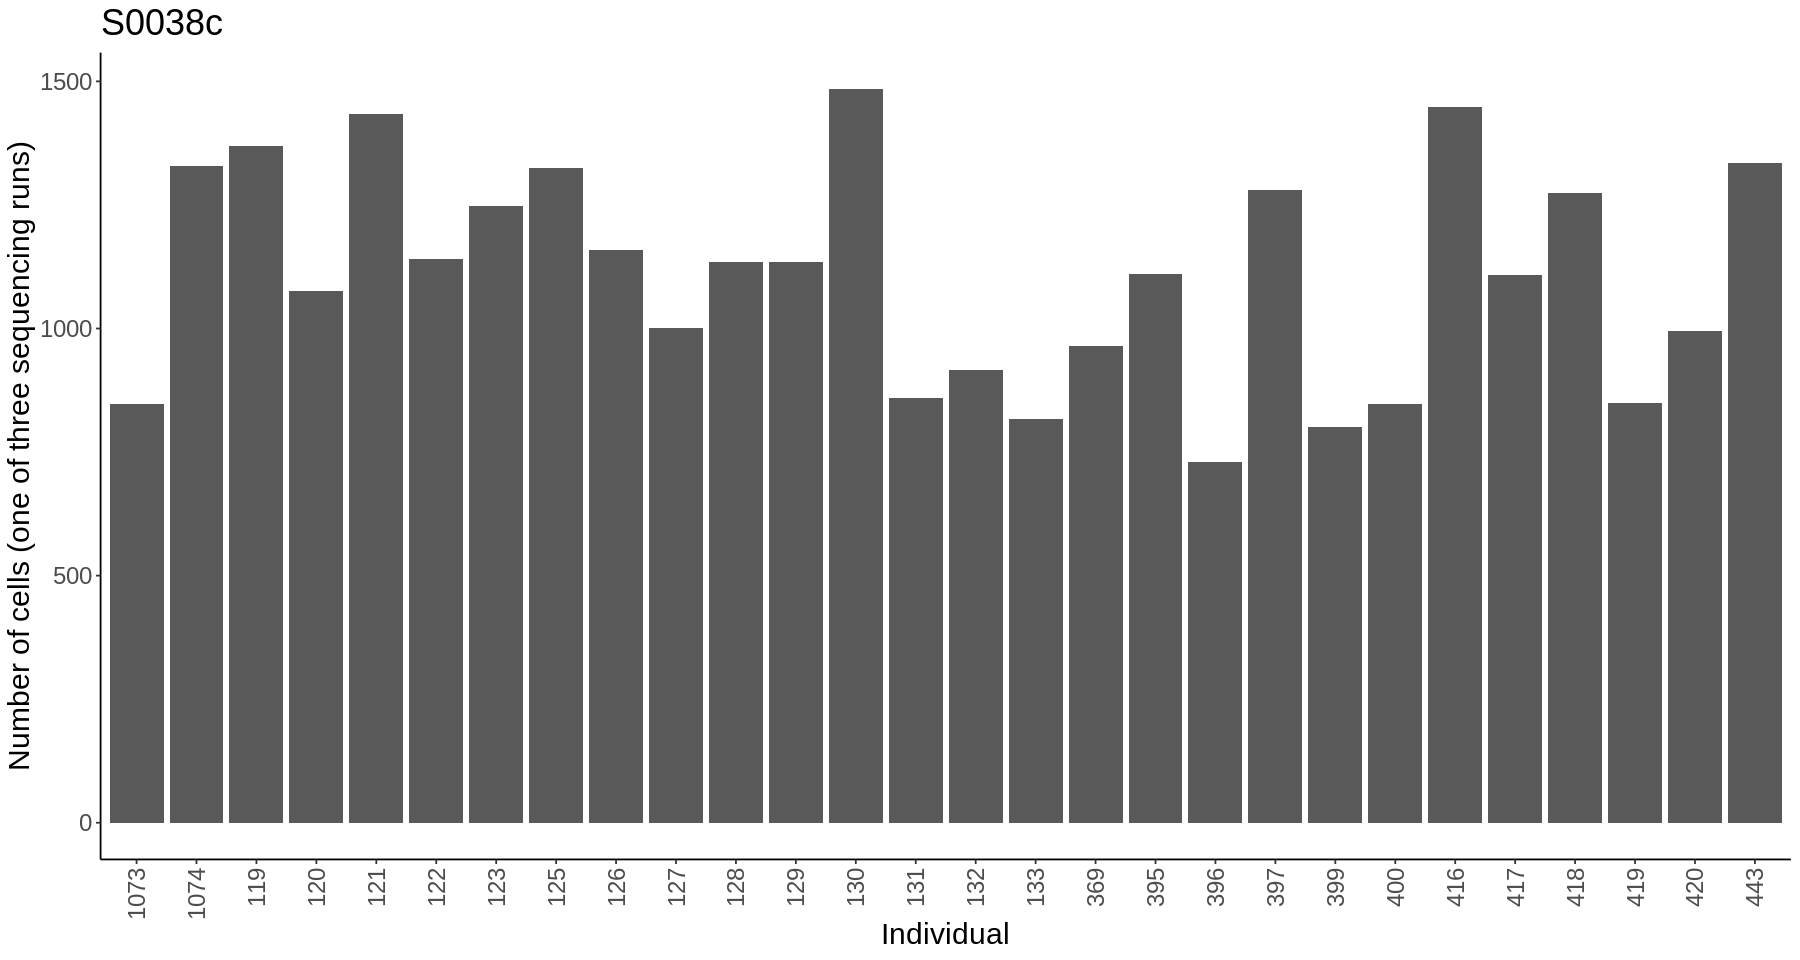

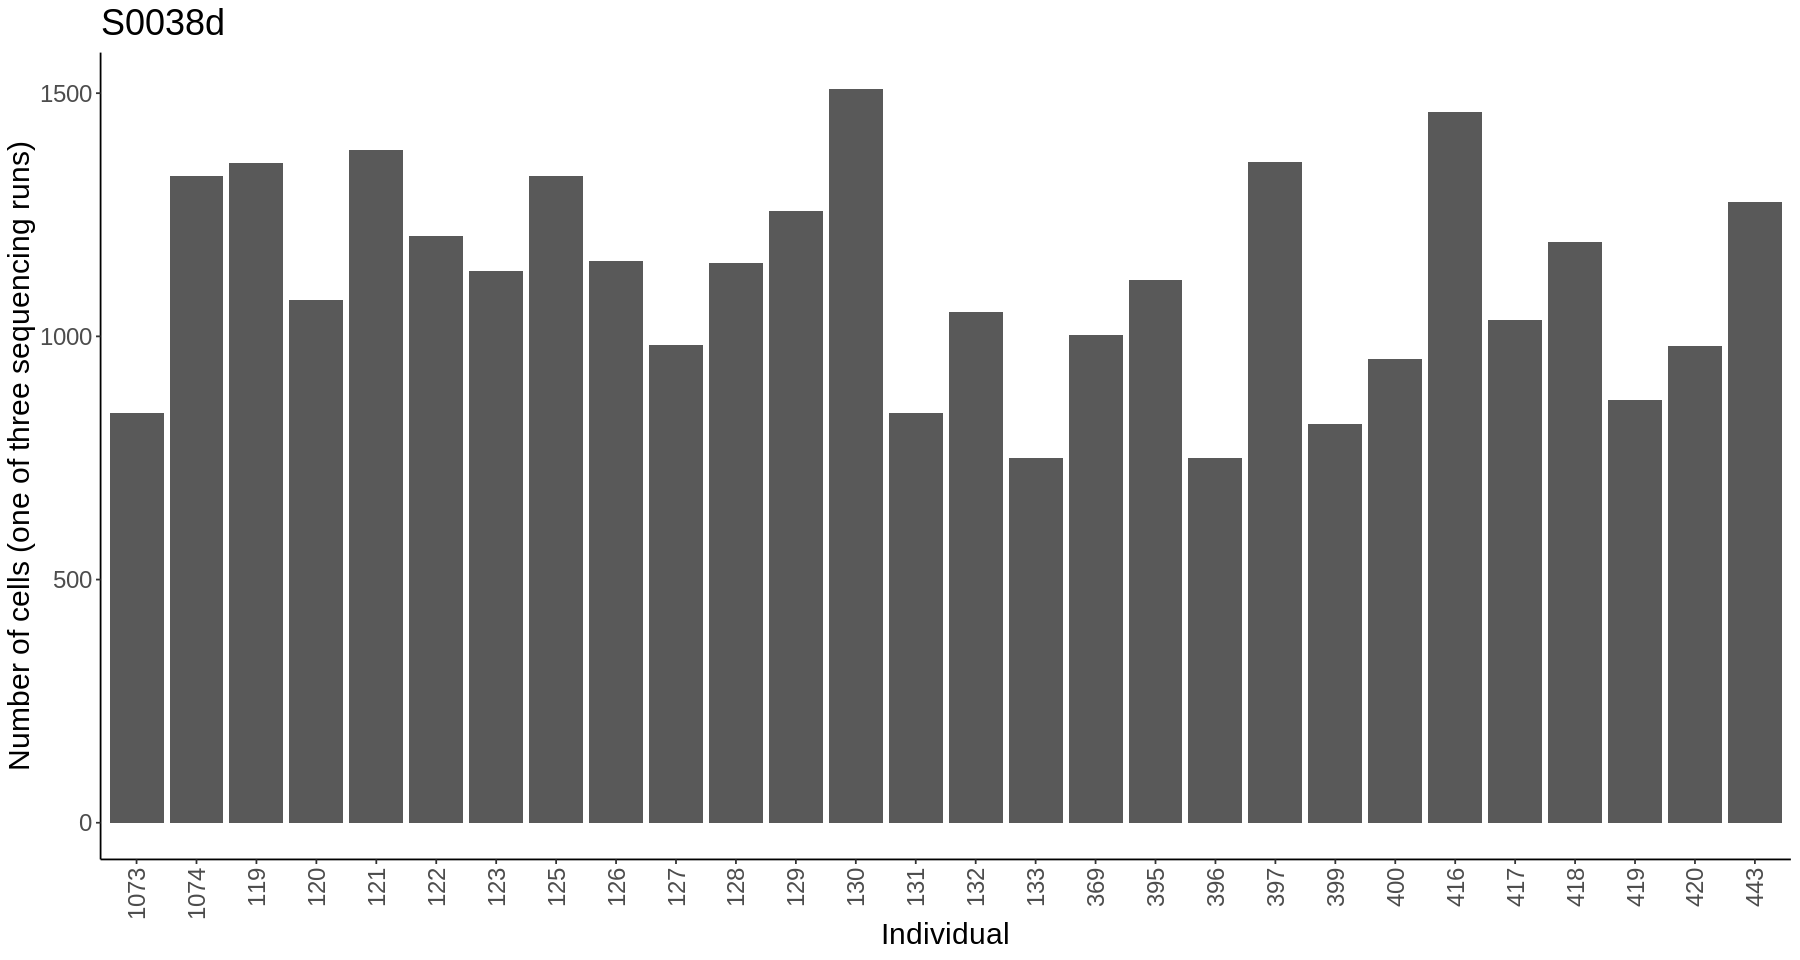

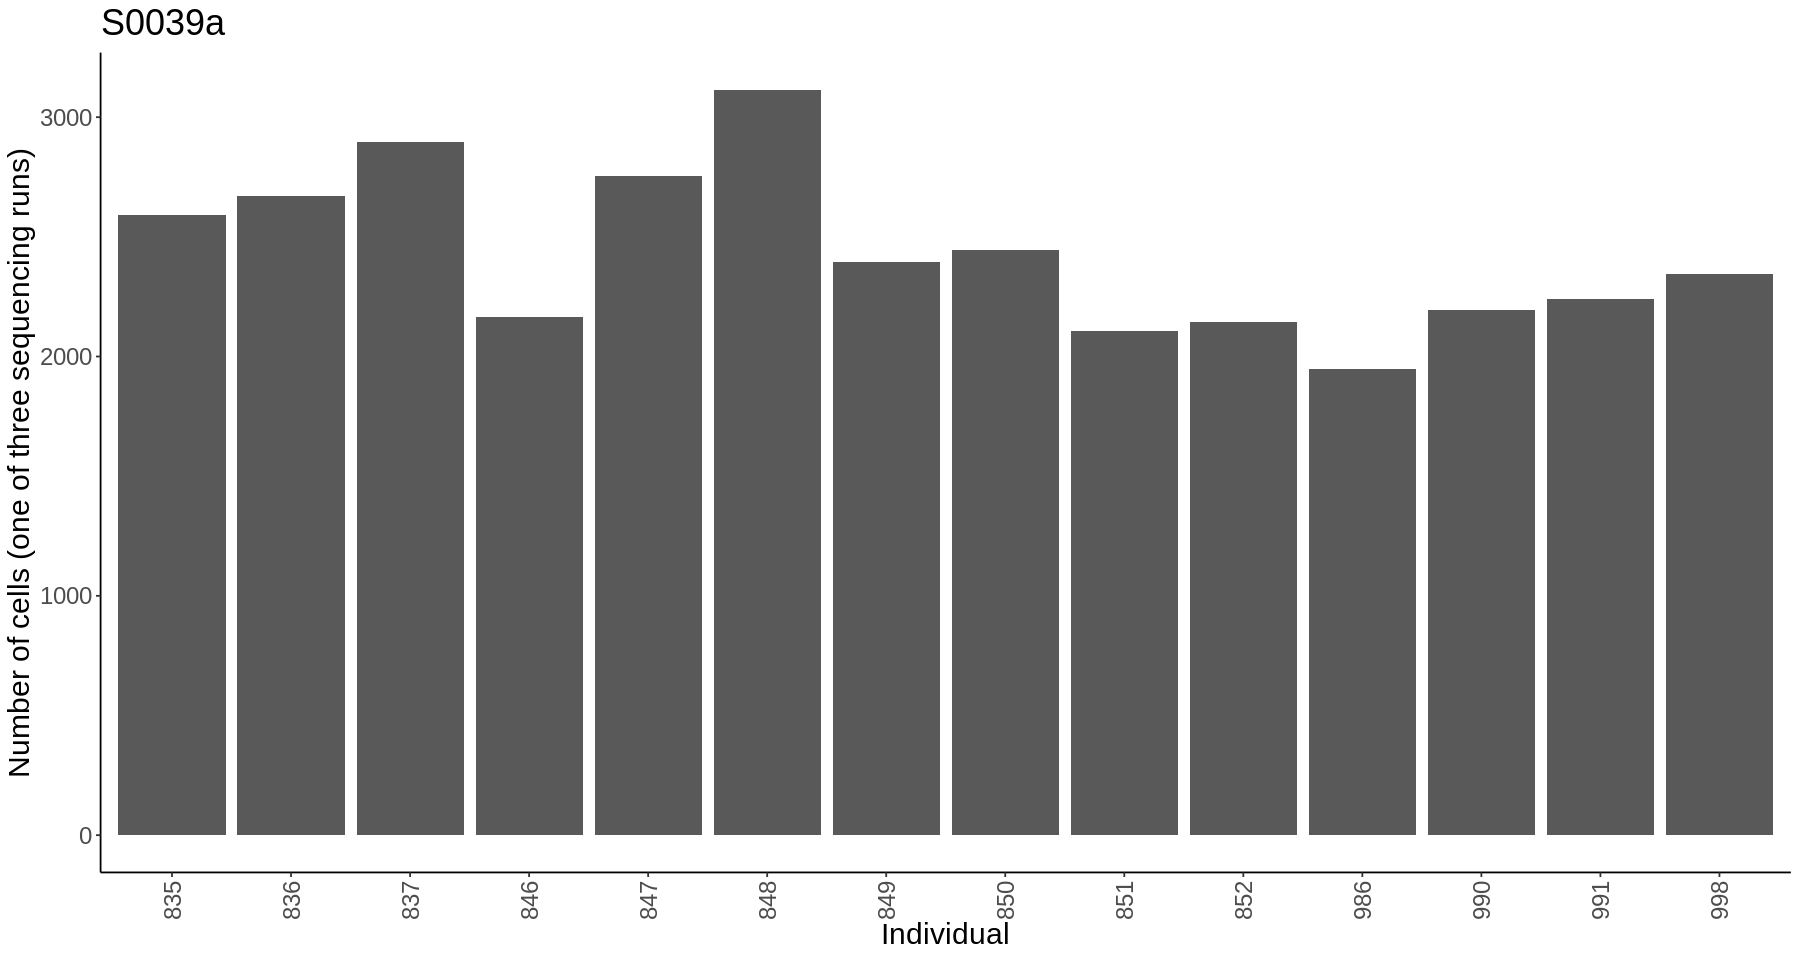

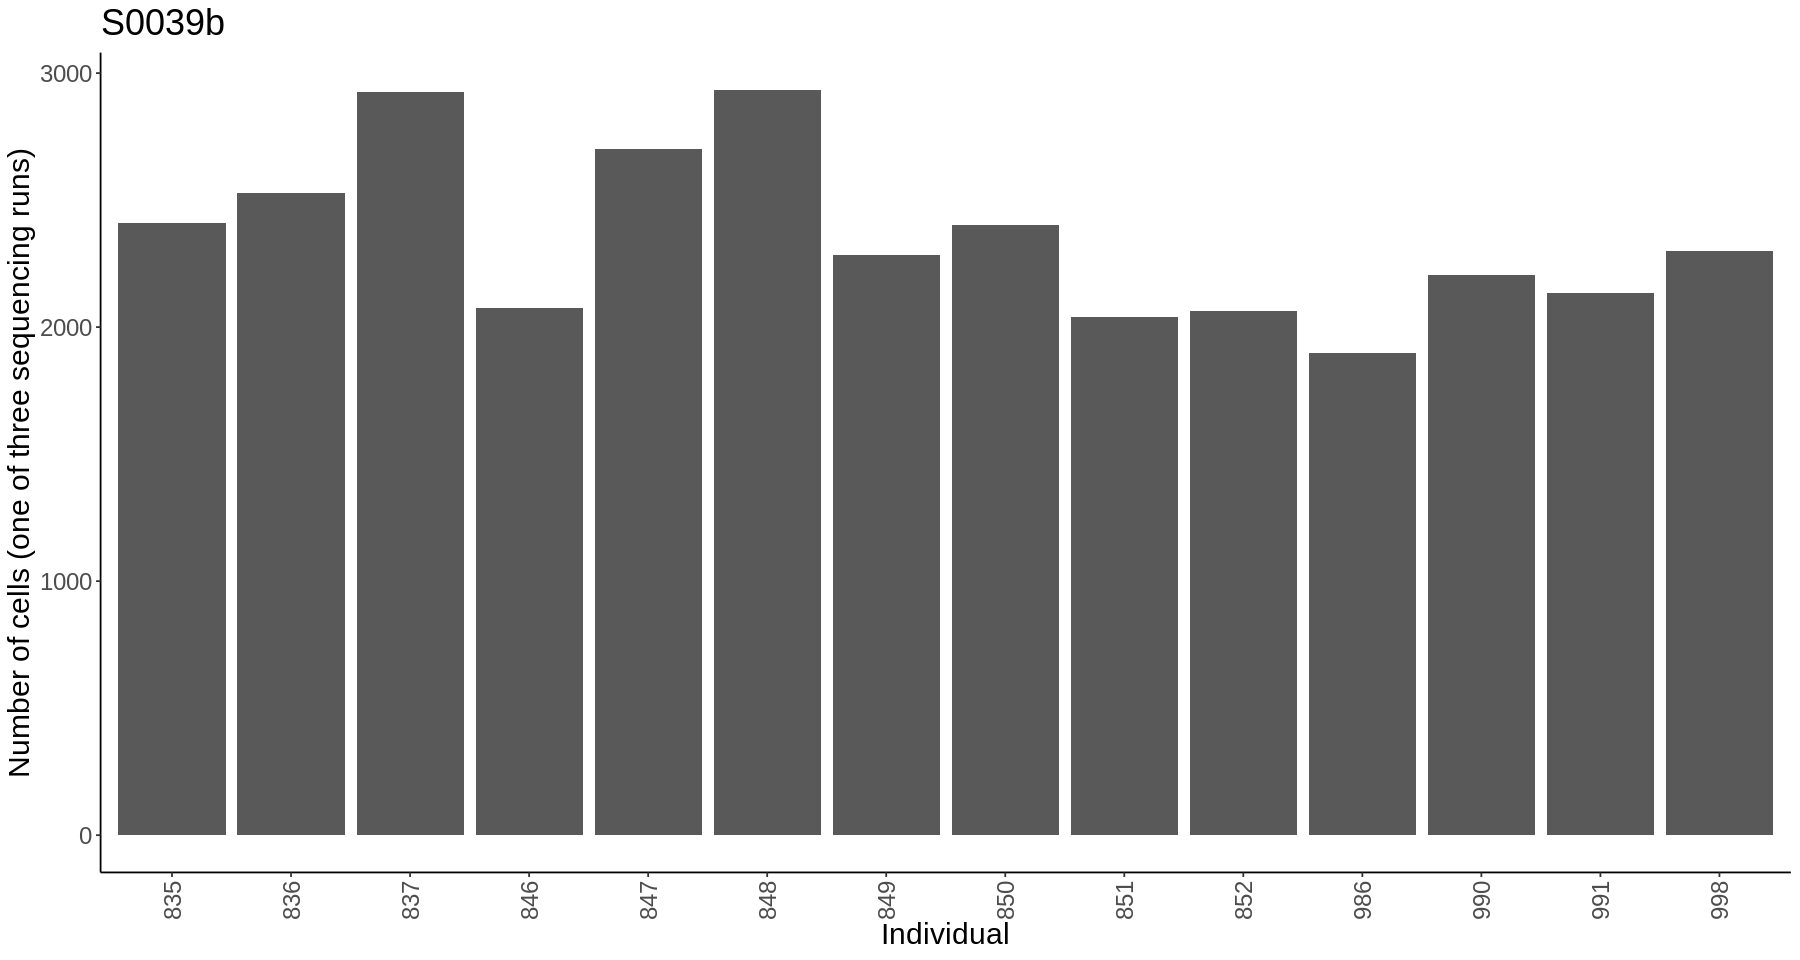

In [14]:
options(repr.plot.width = 15, repr.plot.height = 8) 
for (sample in samples){
#     if (sample %in% c('S0021-24b')){next}
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    p = ggplot(vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),], aes(x=Var1, y=Freq)) + geom_bar(stat = "identity")
    p = p + theme_classic() + theme(text = element_text(size=18))
    p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    p = p + xlab("Individual") + ylab("Number of cells (one of three sequencing runs)")
    print(p + ggtitle(sample))
}

In [15]:
samples_dir = "/share/ScratchGeneral/anncuo/tenk10k/data_processing/demuxafy/samples_in_pools_drews_names/"

In [16]:
df_summary = data.frame()
for (sample in samples[1:120]){
    if (sample %in% c('S0021-24a','S0021-24b','S0025-28a','S0025-28b','S0030-33a','S0030-33b','S0034-37a','S0034-37b','vireo')){next}
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    df = vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),]
    df2 = read.csv(paste0(samples_dir,sample,".tsv"),sep="\t", header = F)
    new_df = data.frame(sample = sample,
                        n_donors = nrow(df),
                        avg_ncells = mean(df$Freq),
                        std_ncells = sd(df$Freq),
                        expected_n_donors = nrow(df2))
    df_summary = rbind(df_summary, new_df)
}
head(df_summary)

sample n_donors avg_ncells std_ncells expected_n_donors
1 S0001a 28       974.5714   327.1273   27               
2 S0001b 28       996.4643   309.7706   27               
3 S0001c 28       938.2143   306.1039   27               
4 S0002a 28       676.0000   319.1539   25               
5 S0002b 28       672.0714   318.7270   25               
6 S0002c 28       654.4643   322.8690   25

In [17]:
df_summary$pool = gsub("a","",gsub("b","",gsub("c","",gsub("d","",df_summary$sample))))

In [18]:
df_summary

sample n_donors avg_ncells std_ncells expected_n_donors pool 
1   S0001a 28       974.5714   327.1273   27                S0001
2   S0001b 28       996.4643   309.7706   27                S0001
3   S0001c 28       938.2143   306.1039   27                S0001
4   S0002a 28       676.0000   319.1539   25                S0002
5   S0002b 28       672.0714   318.7270   25                S0002
6   S0002c 28       654.4643   322.8690   25                S0002
7   S0003a 28       627.1429   154.8514   28                S0003
8   S0003b 28       629.1429   172.3207   28                S0003
9   S0003c 28       620.9286   158.7801   28                S0003
10  S0004a 28       660.3571   143.6609   28                S0004
11  S0004b 28       626.2500   134.2280   28                S0004
12  S0004c 28       663.1071   144.1566   28                S0004
13  S0005a 26       826.7308   311.7745   26                S0005
14  S0005b 26       829.6154   304.2866   26                S0005
15  S0005c 26       793.9615   282.9327   26                S0005
16  S0006a 28       416.3929   121.3759   28                S0006
17  S0006b 28       441.3571   129.1196   28                S0006
18  S0006c 28       464.2143   137.2781   28                S0006
19  S0007a 27       356.2593   129.1638   28                S0007
20  S0007b 26       573.0769   169.7473   28                S0007
21  S0007c 27       583.8889   204.6380   28                S0007
22  S0008a 28       824.3929   304.8718   26                S0008
23  S0008b 28       645.0714   195.6770   26                S0008
24  S0008c 28       887.0000   335.9699   26                S0008
25  S0009a 28       795.4643   344.5418   28                S0009
26  S0009b 28       778.7857   339.6858   28                S0009
27  S0009c 28       839.1786   358.3473   28                S0009
28  S0010a 28       691.2857   230.7041   28                S0010
29  S0010b 28       702.0357   234.8059   28                S0010
30  S0010c 28       690.3214   228.1923   28                S0010
⋮   ⋮      ⋮        ⋮          ⋮          ⋮                 ⋮    
83  S0030a 26       1266.5385  248.7618   26                S0030
84  S0030b 26       1337.2308  249.9216   26                S0030
85  S0030c 26       1316.2692  258.5736   26                S0030
86  S0031a 28        978.8571  197.9932   28                S0031
87  S0031b 28        963.1786  178.3694   28                S0031
88  S0031c 28        989.3929  177.7540   28                S0031
89  S0032a 28       1149.0714  224.7888   28                S0032
90  S0032b 28       1153.7857  220.5524   28                S0032
91  S0032c 28       1112.8571  233.2890   28                S0032
92  S0033a 28       1117.2143  235.0340   28                S0033
93  S0033b 28       1111.6429  225.6924   28                S0033
94  S0033c 28       1101.3571  229.1188   28                S0033
95  S0034a 28       1133.3214  273.9750   28                S0034
96  S0034b 28       1140.8571  283.7354   28                S0034
97  S0034c 28       1147.6071  283.9721   28                S0034
98  S0035a 26        753.6923  171.2677   26                S0035
99  S0035b 26       1235.4615  250.7745   26                S0035
100 S0035c 26       1254.1538  268.4883   26                S0035
101 S0036a 28       1125.6429  292.0917   28                S0036
102 S0036b 28       1132.3571  294.7723   28                S0036
103 S0036c 28       1120.0714  279.1533   28                S0036
104 S0037a 28       1210.3929  372.2986   26                S0037
105 S0037b 28        709.9286  203.9706   26                S0037
106 S0037c 28       1224.2500  375.6557   26                S0037
107 S0038a 28       1059.7500  211.8858   28                S0038
108 S0038b 28       1132.5357  217.7175   28                S0038
109 S0038c 28       1107.6429  221.9295   28                S0038
110 S0038d 28       1113.0714  216.9057   28                S0038
111 S0039a 14       2428.9286  335.3339   14

In [19]:
nrow(df_summary)

[1] 112

In [20]:
mean(df_summary$avg_ncells)
mean(df_summary$std_ncells)

[1] 936.9238

[1] 248.0737

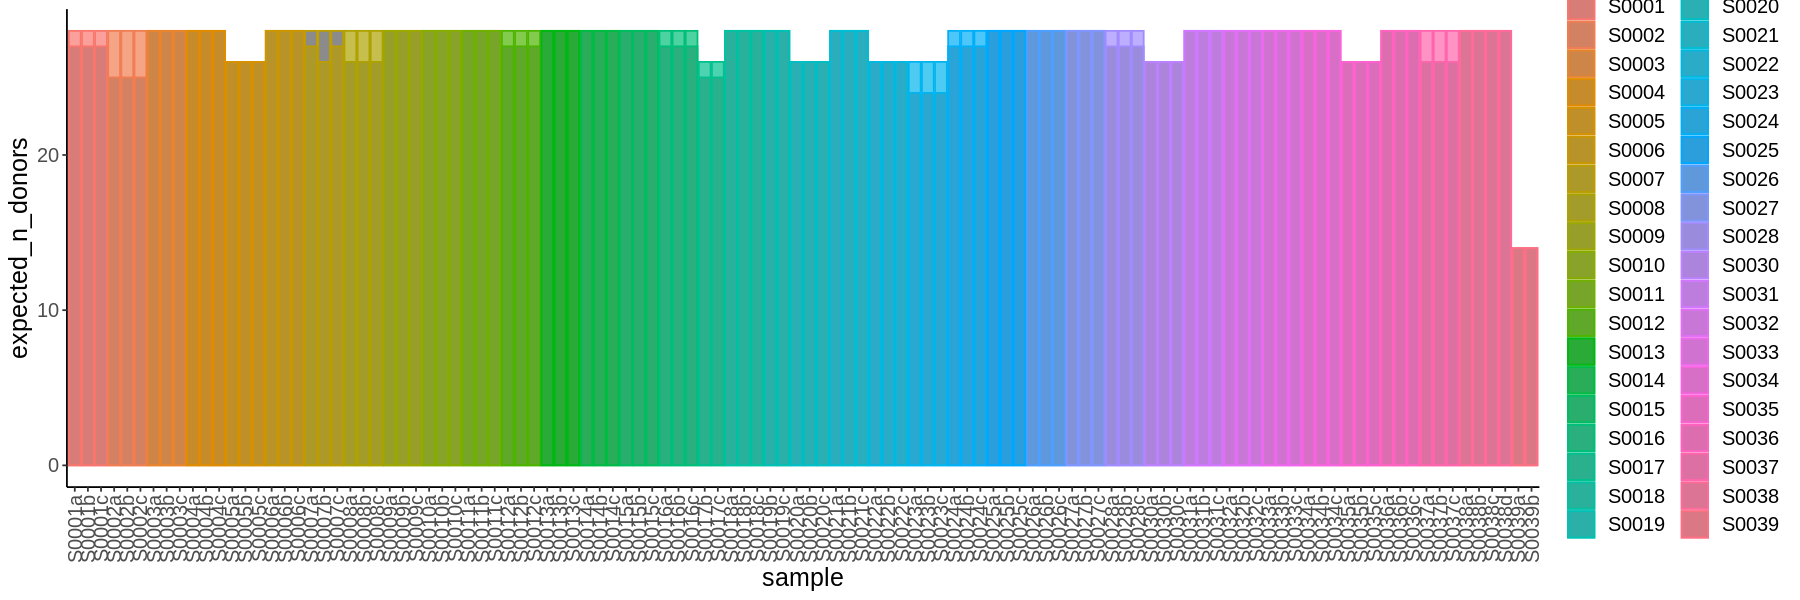

In [21]:
options(repr.plot.width = 15, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=expected_n_donors, col=pool)) + geom_bar(stat = "identity",alpha=0.7)
p = p + geom_bar(stat = "identity", aes(x=sample, y=n_donors, fill=pool),alpha=0.7)
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

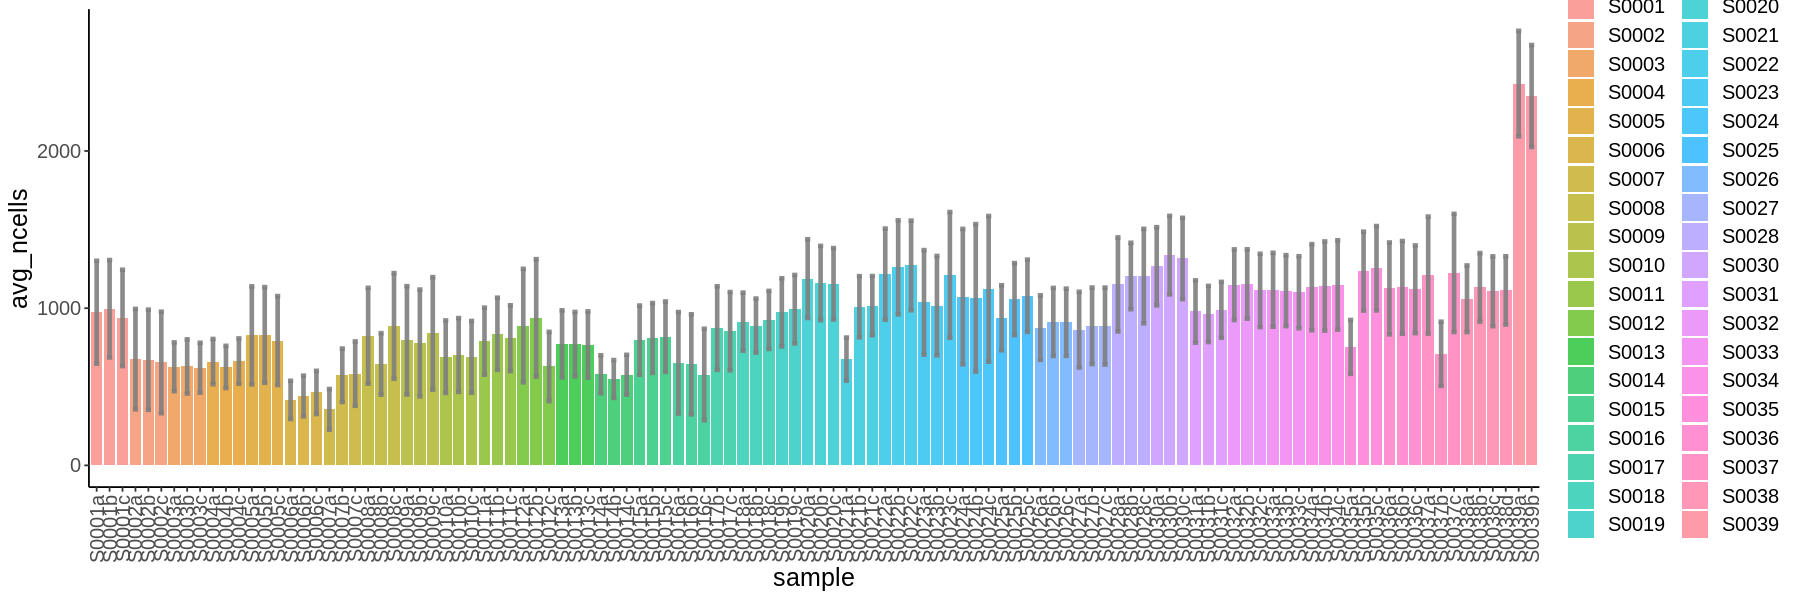

In [22]:
options(repr.plot.width = 15, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=avg_ncells,fill=pool)) + geom_bar(stat = "identity",alpha=0.7)
p = p + geom_errorbar( aes(x=sample, ymin=(avg_ncells-std_ncells), ymax=(avg_ncells+std_ncells)), width=0.4, colour="gray50", alpha=0.9, size=1.3)
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

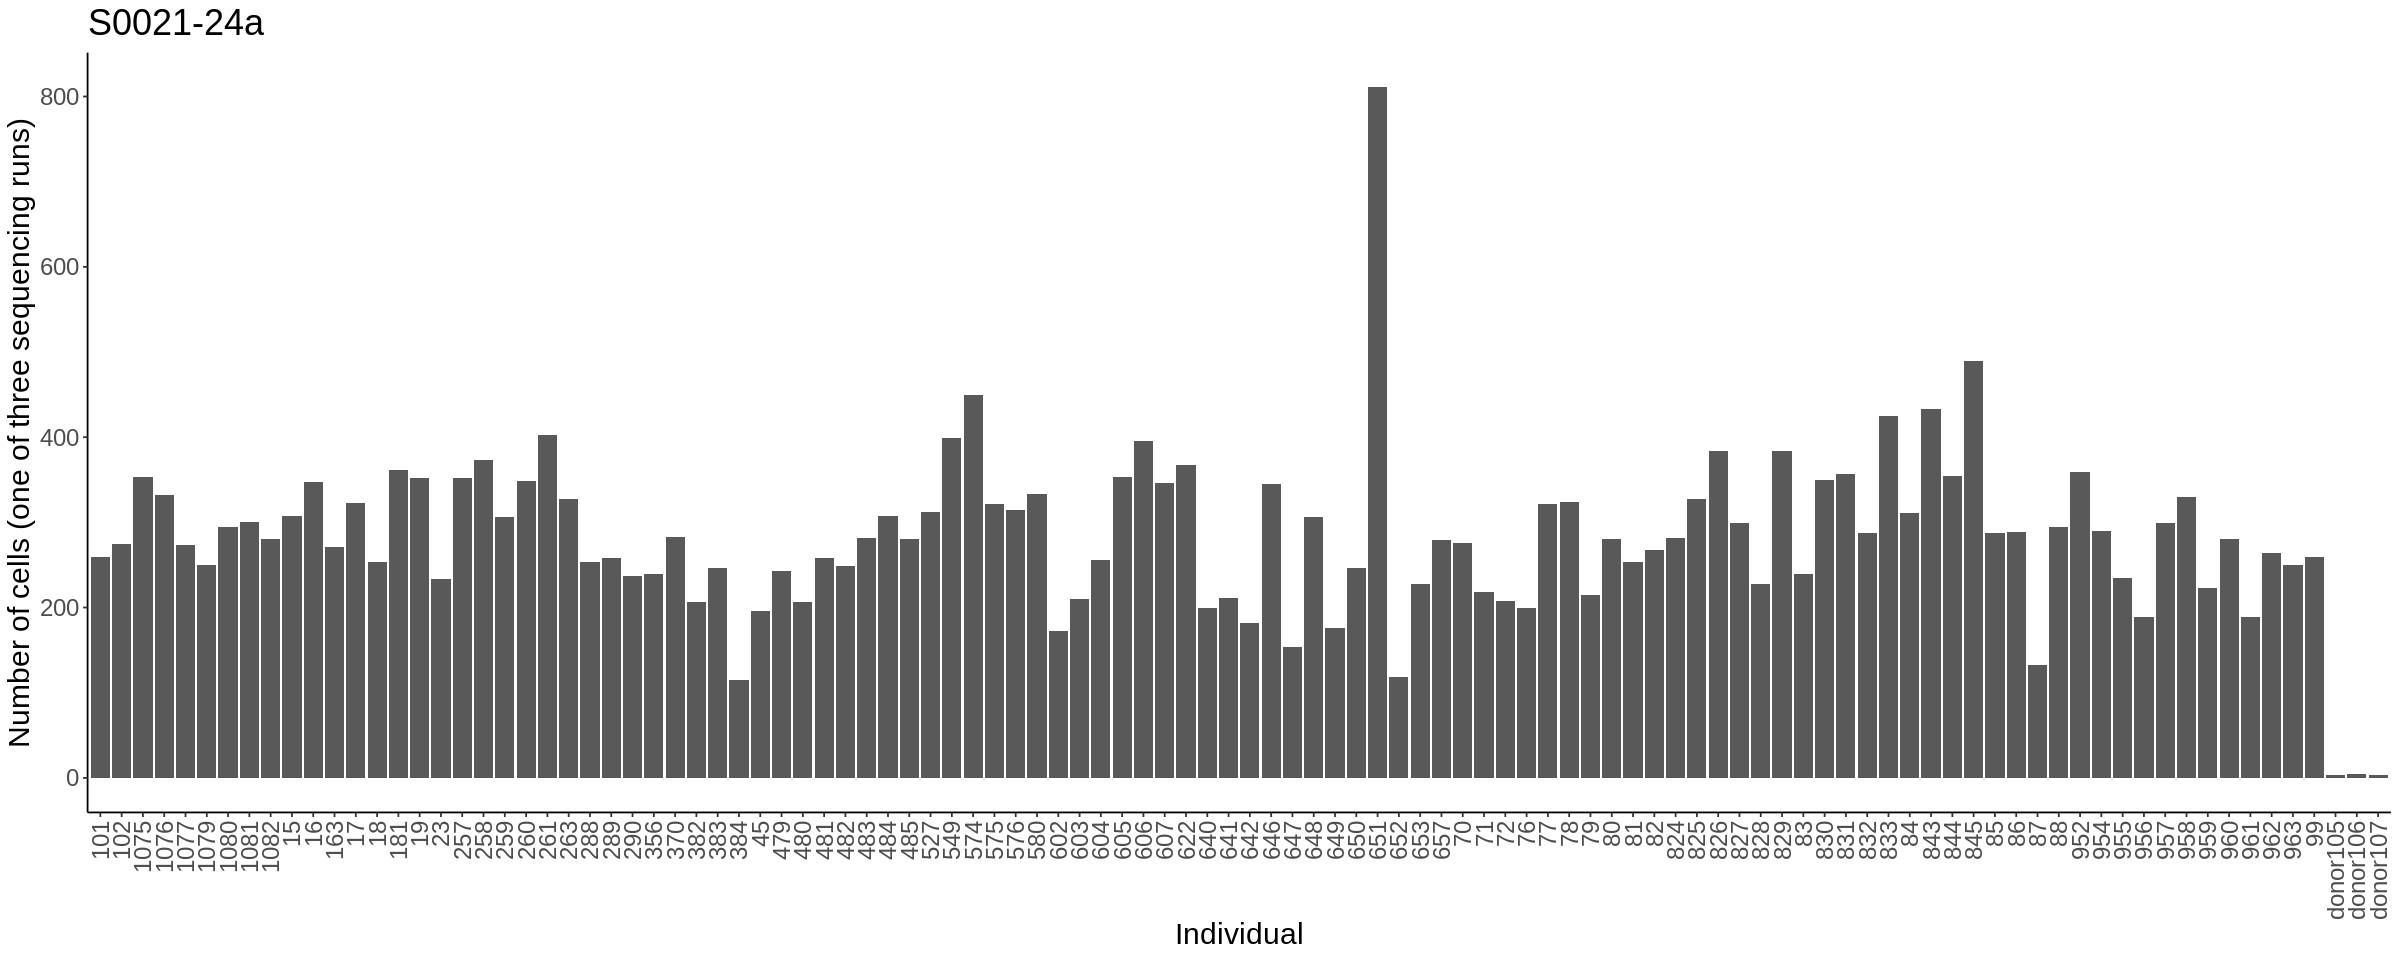

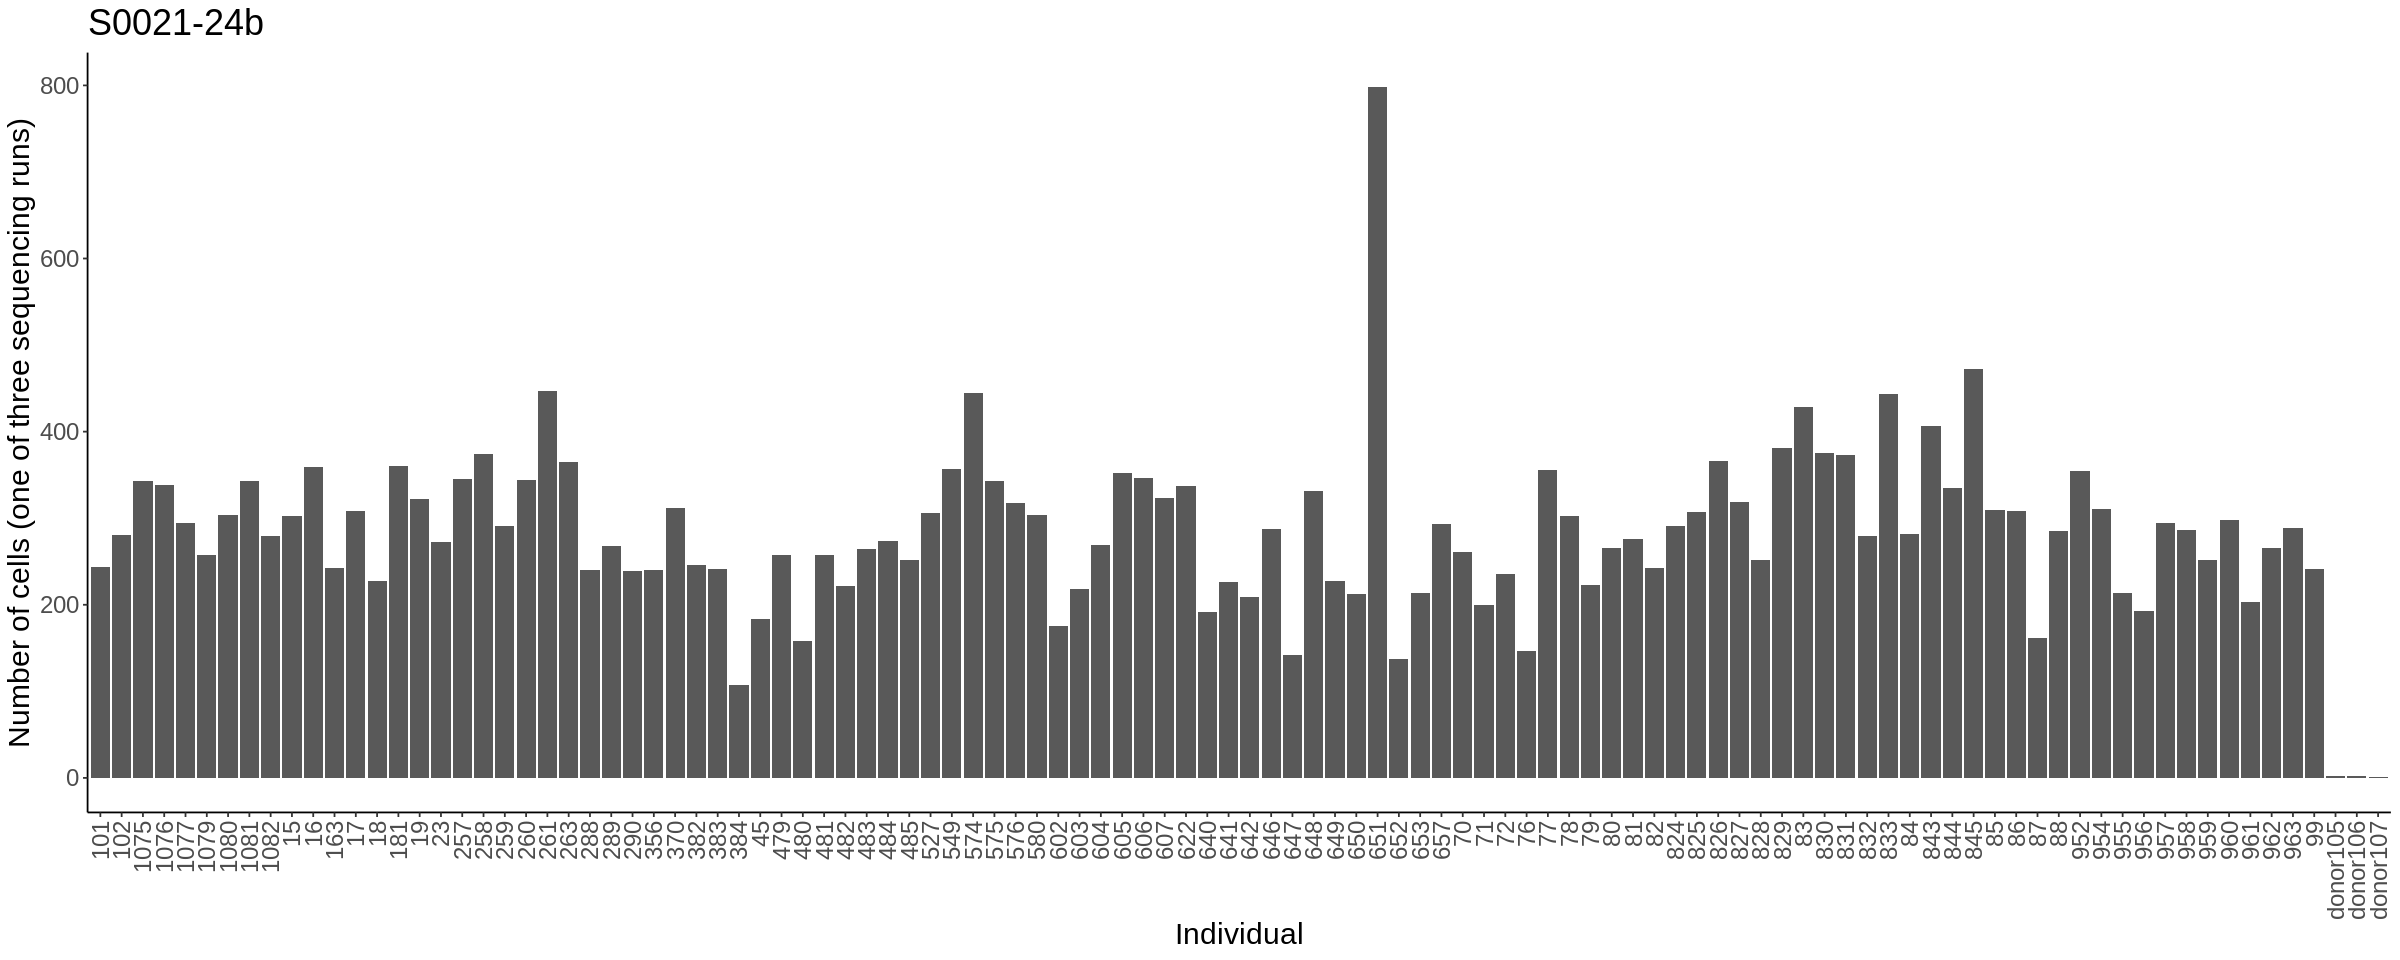

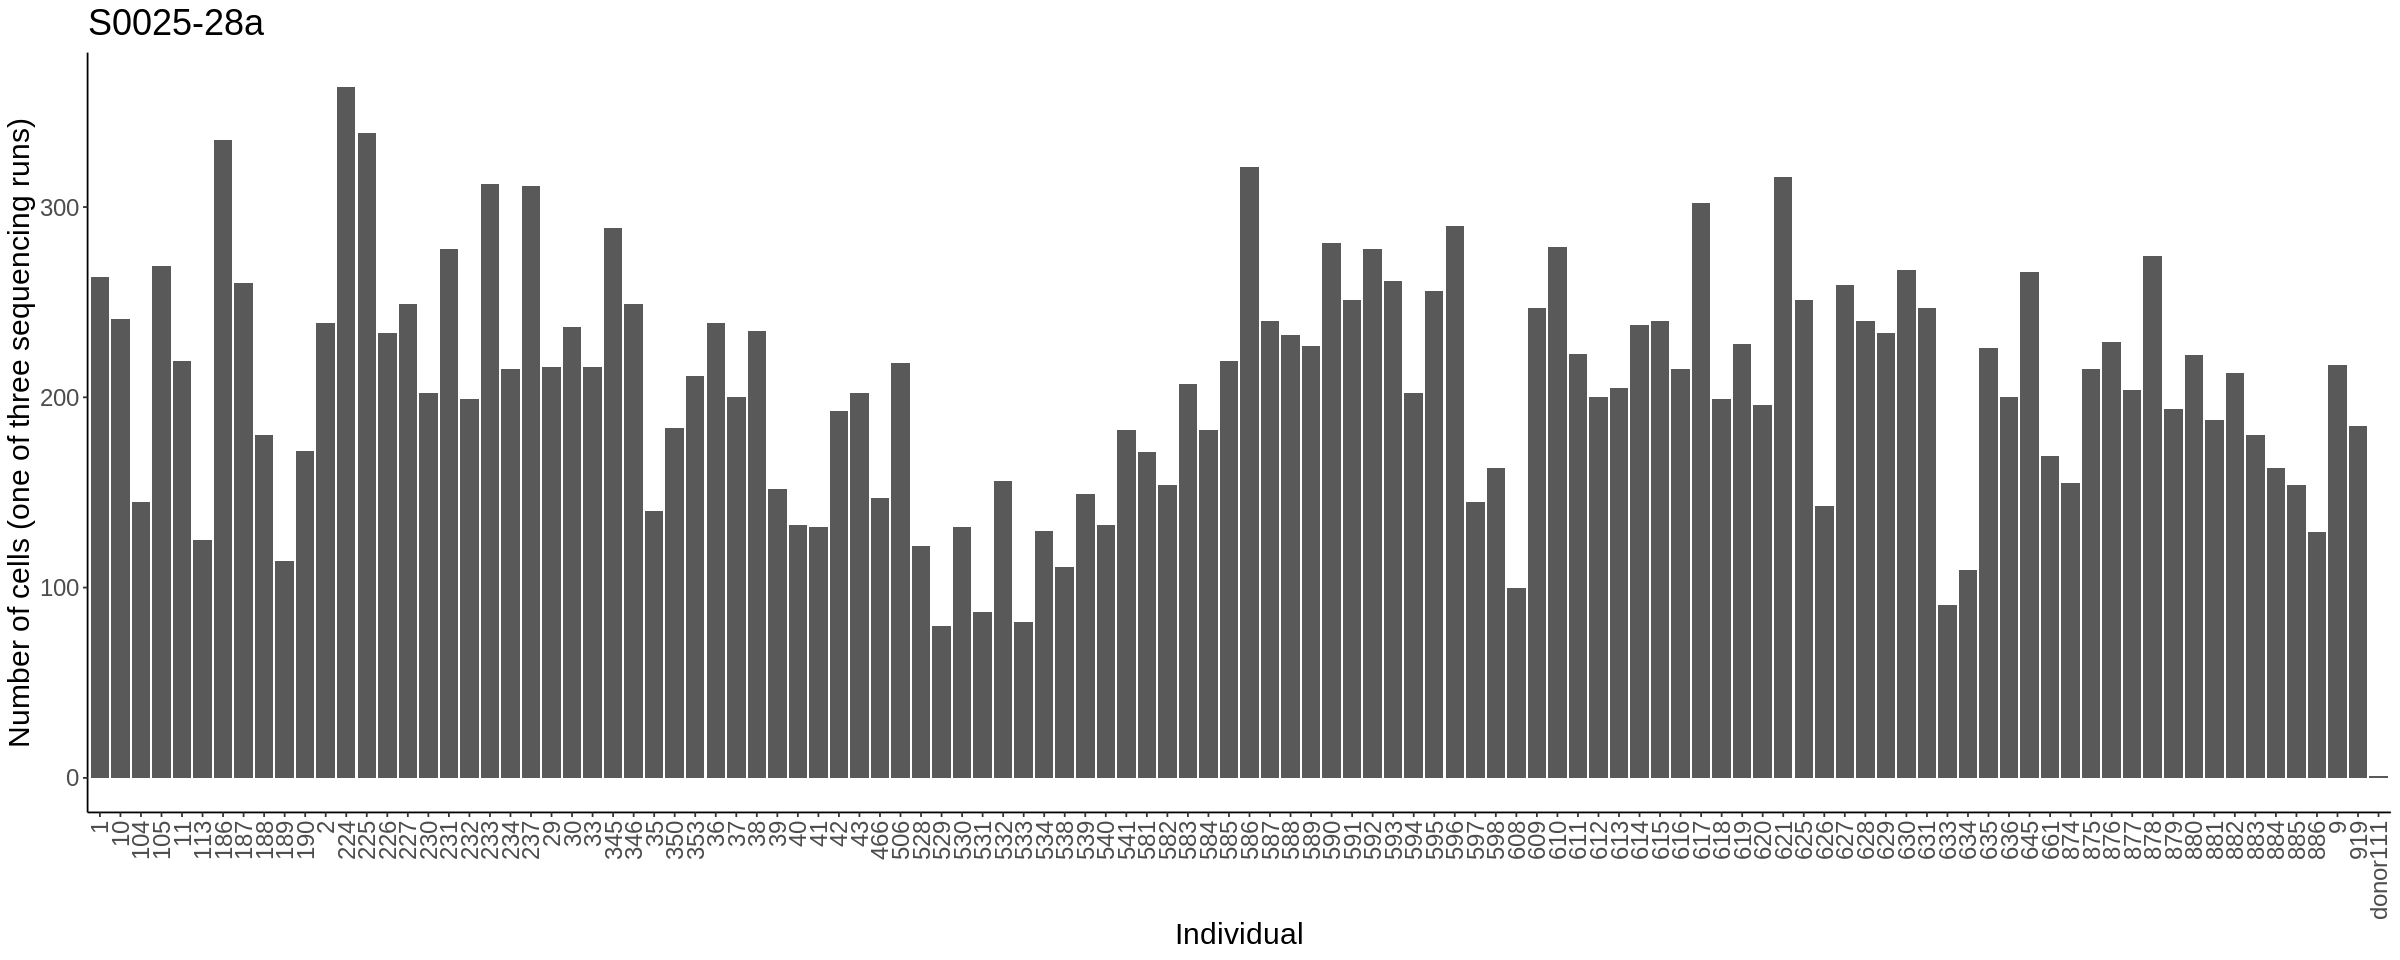

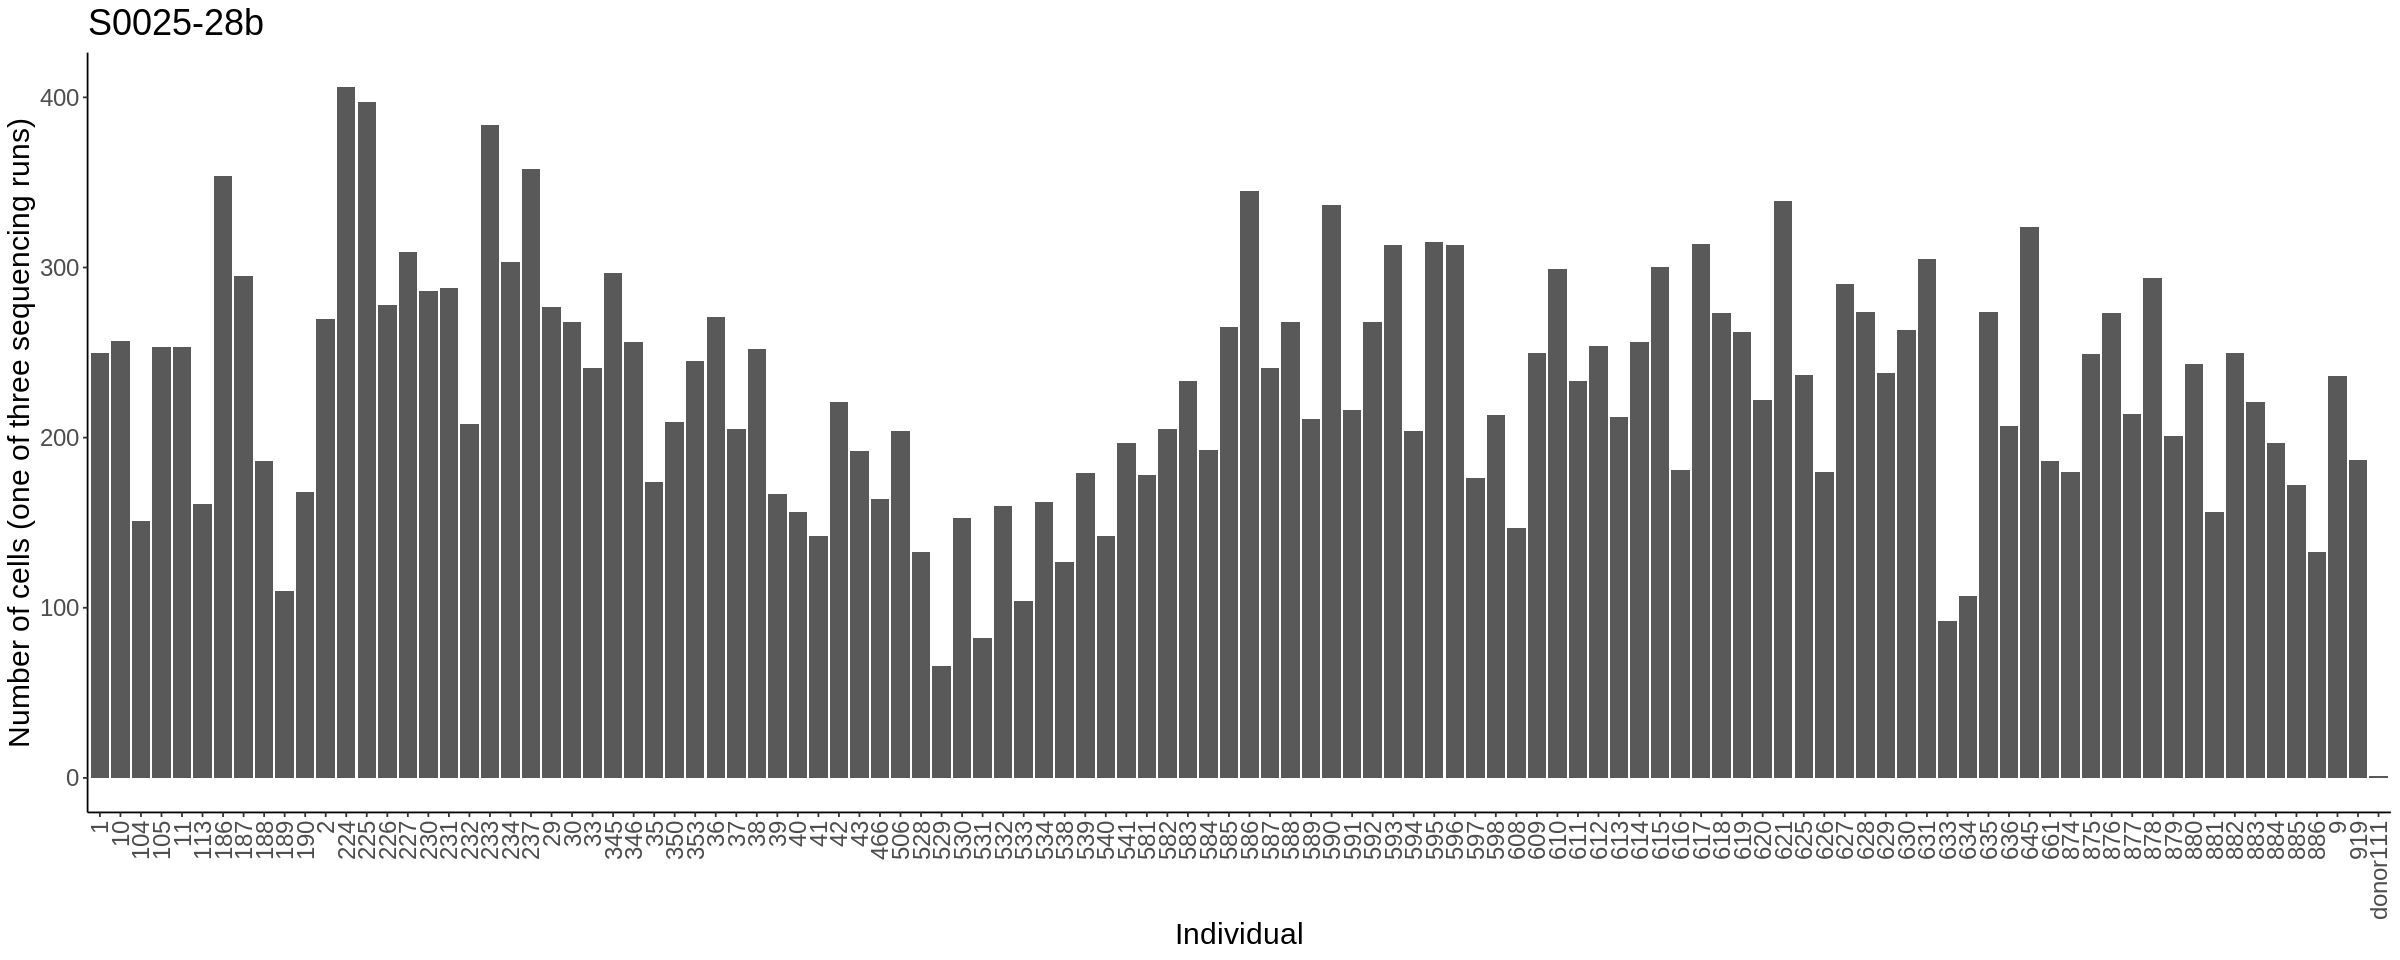

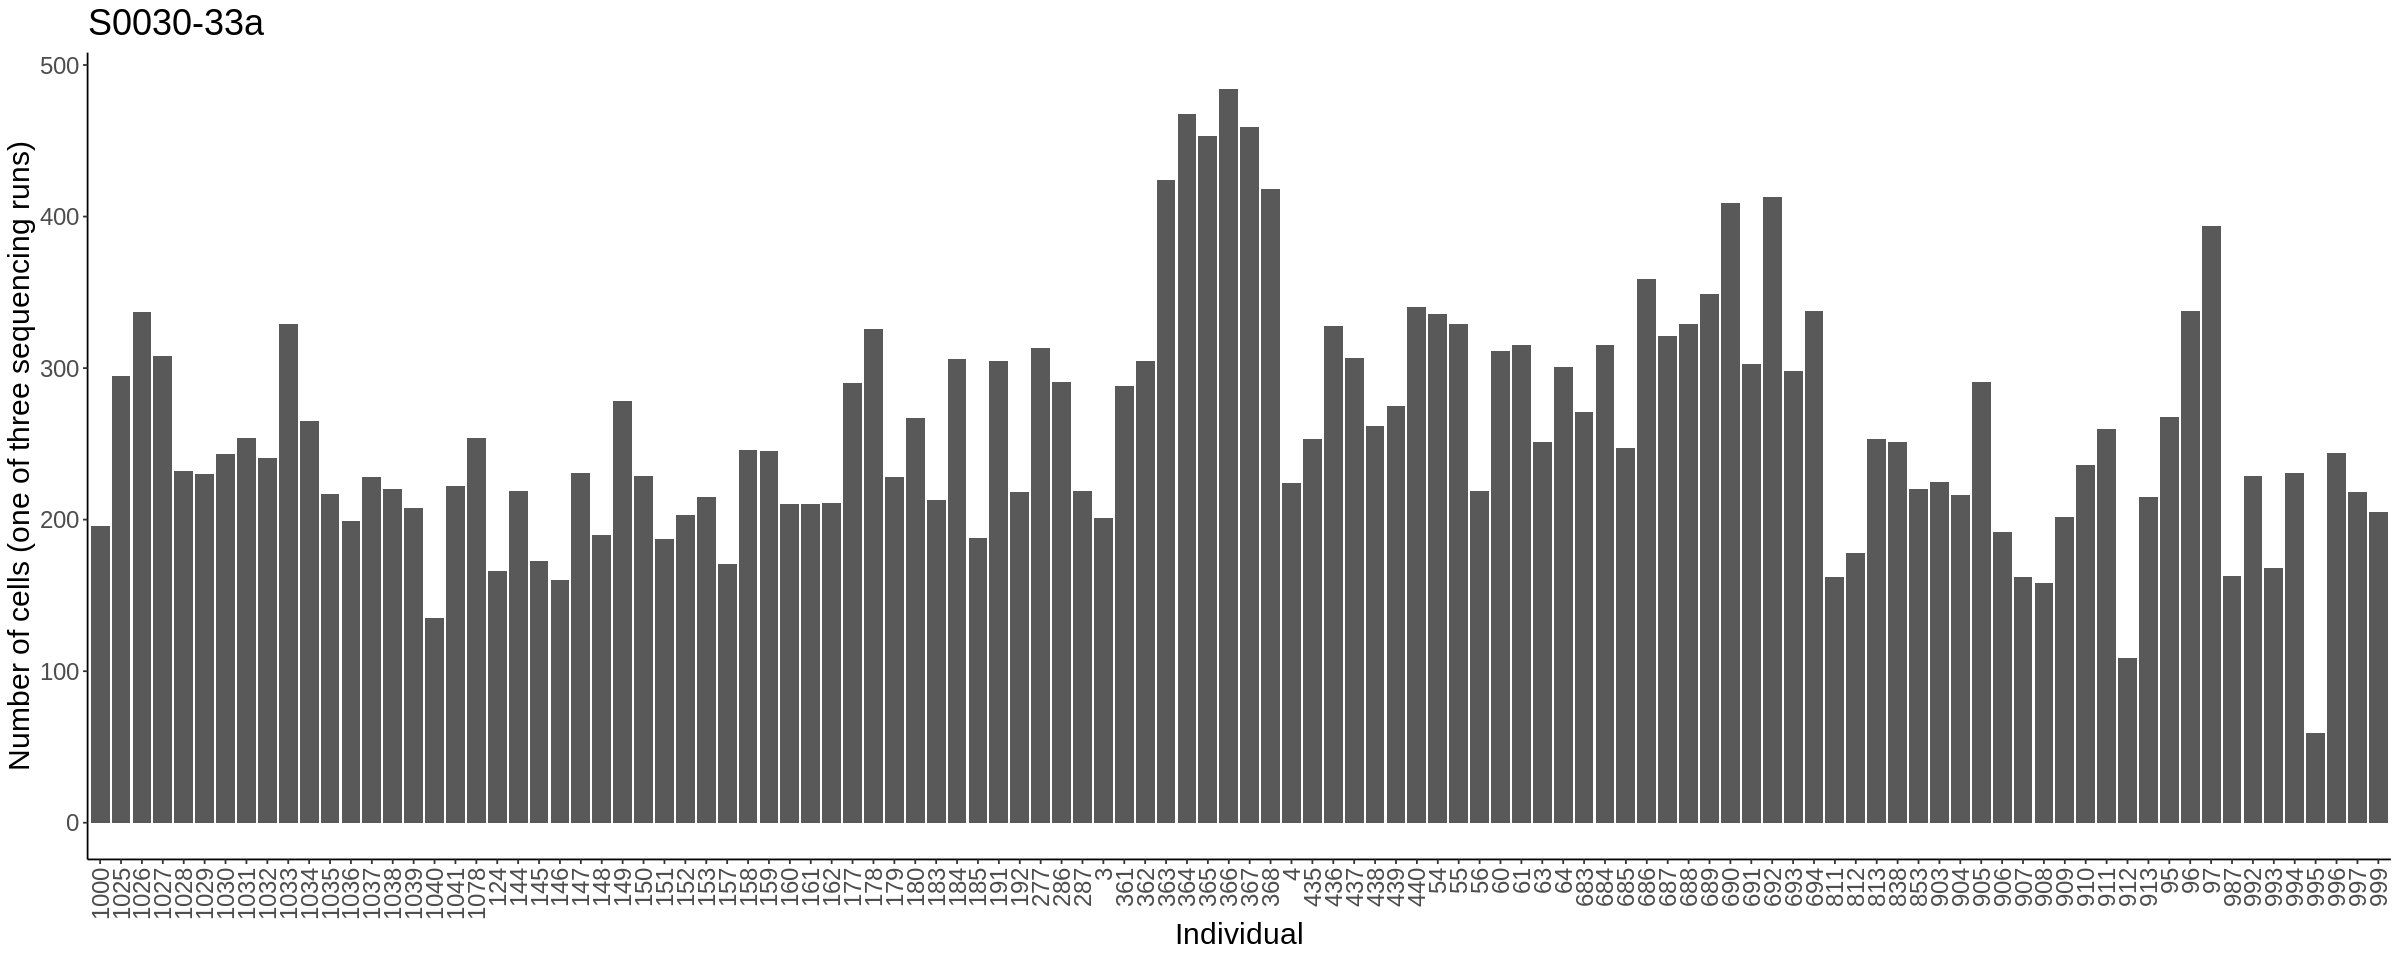

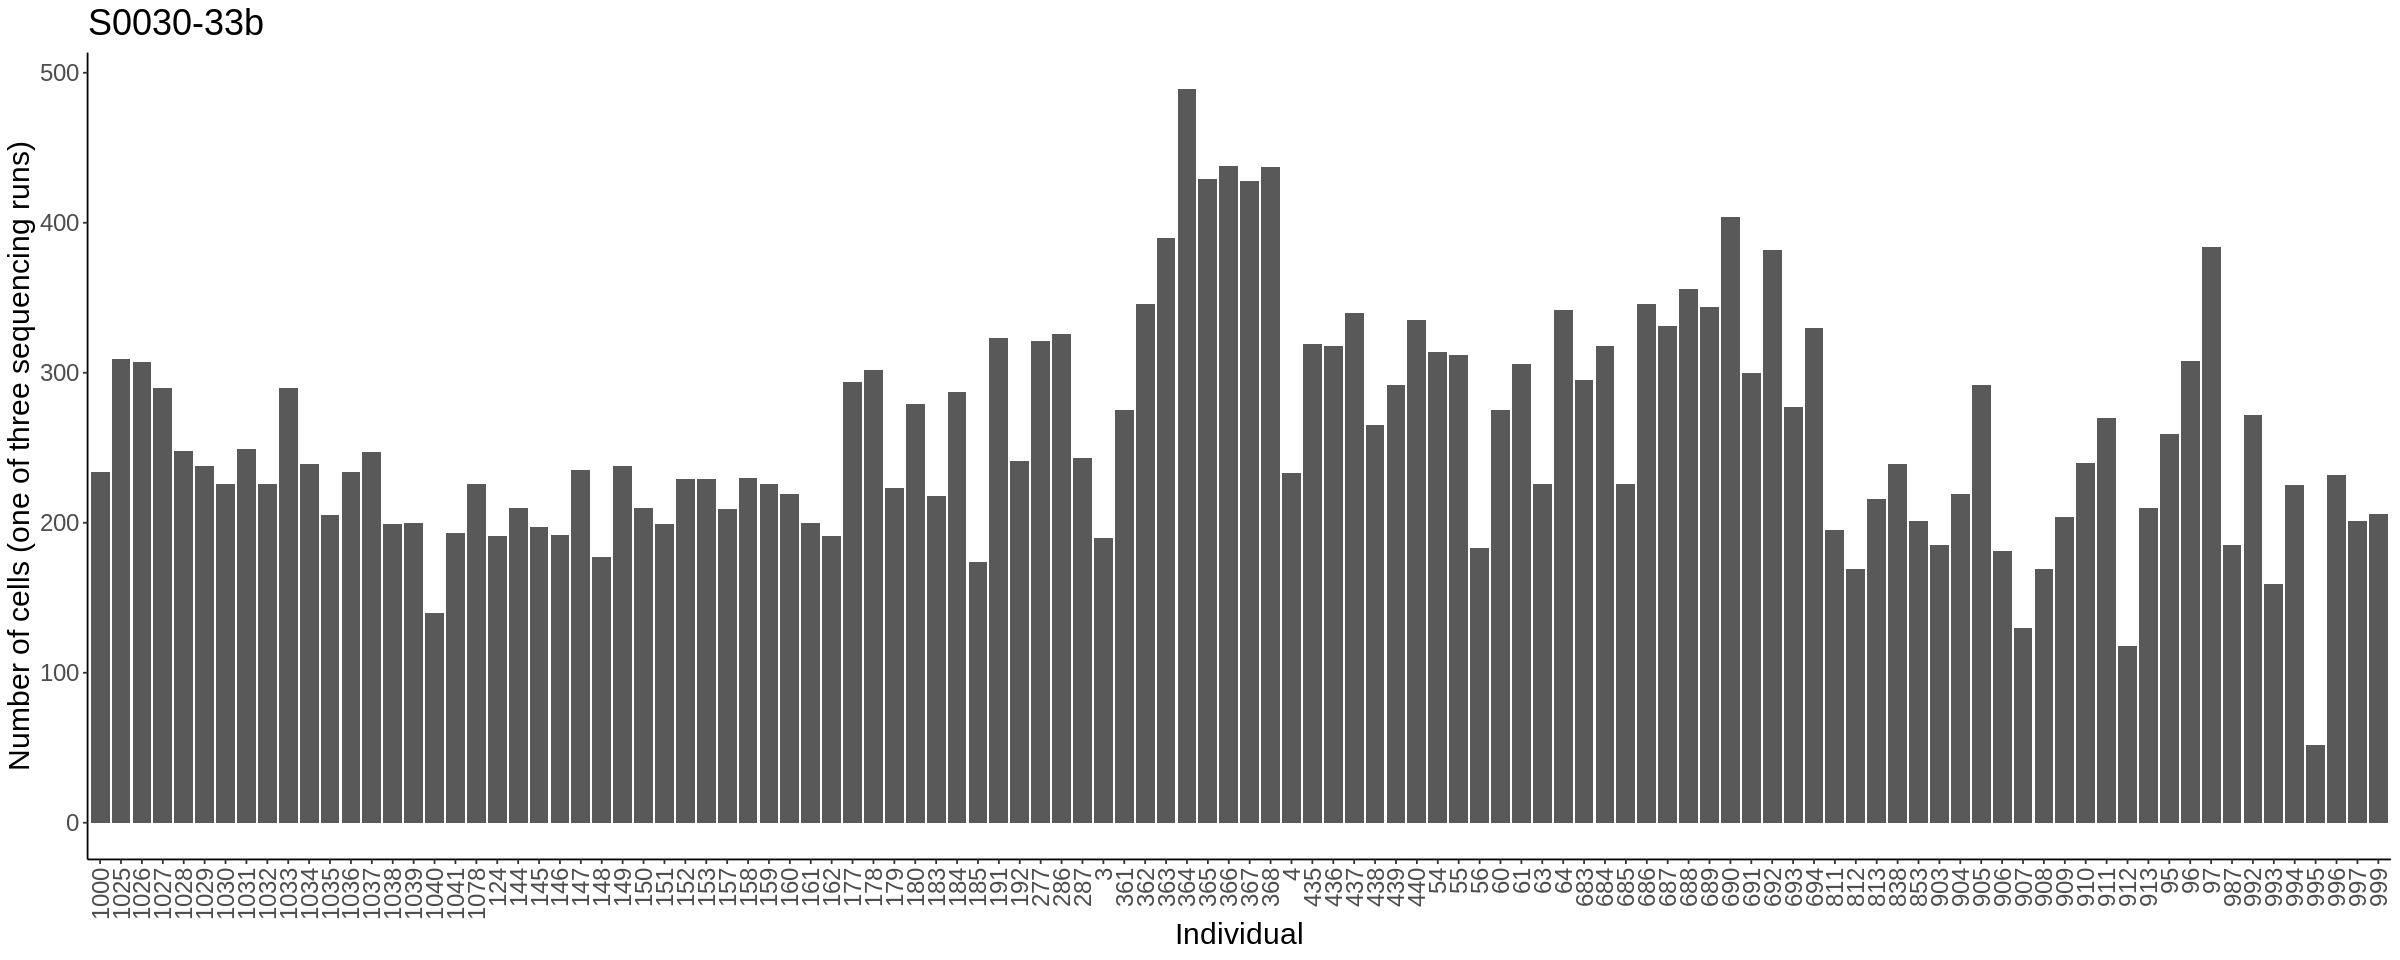

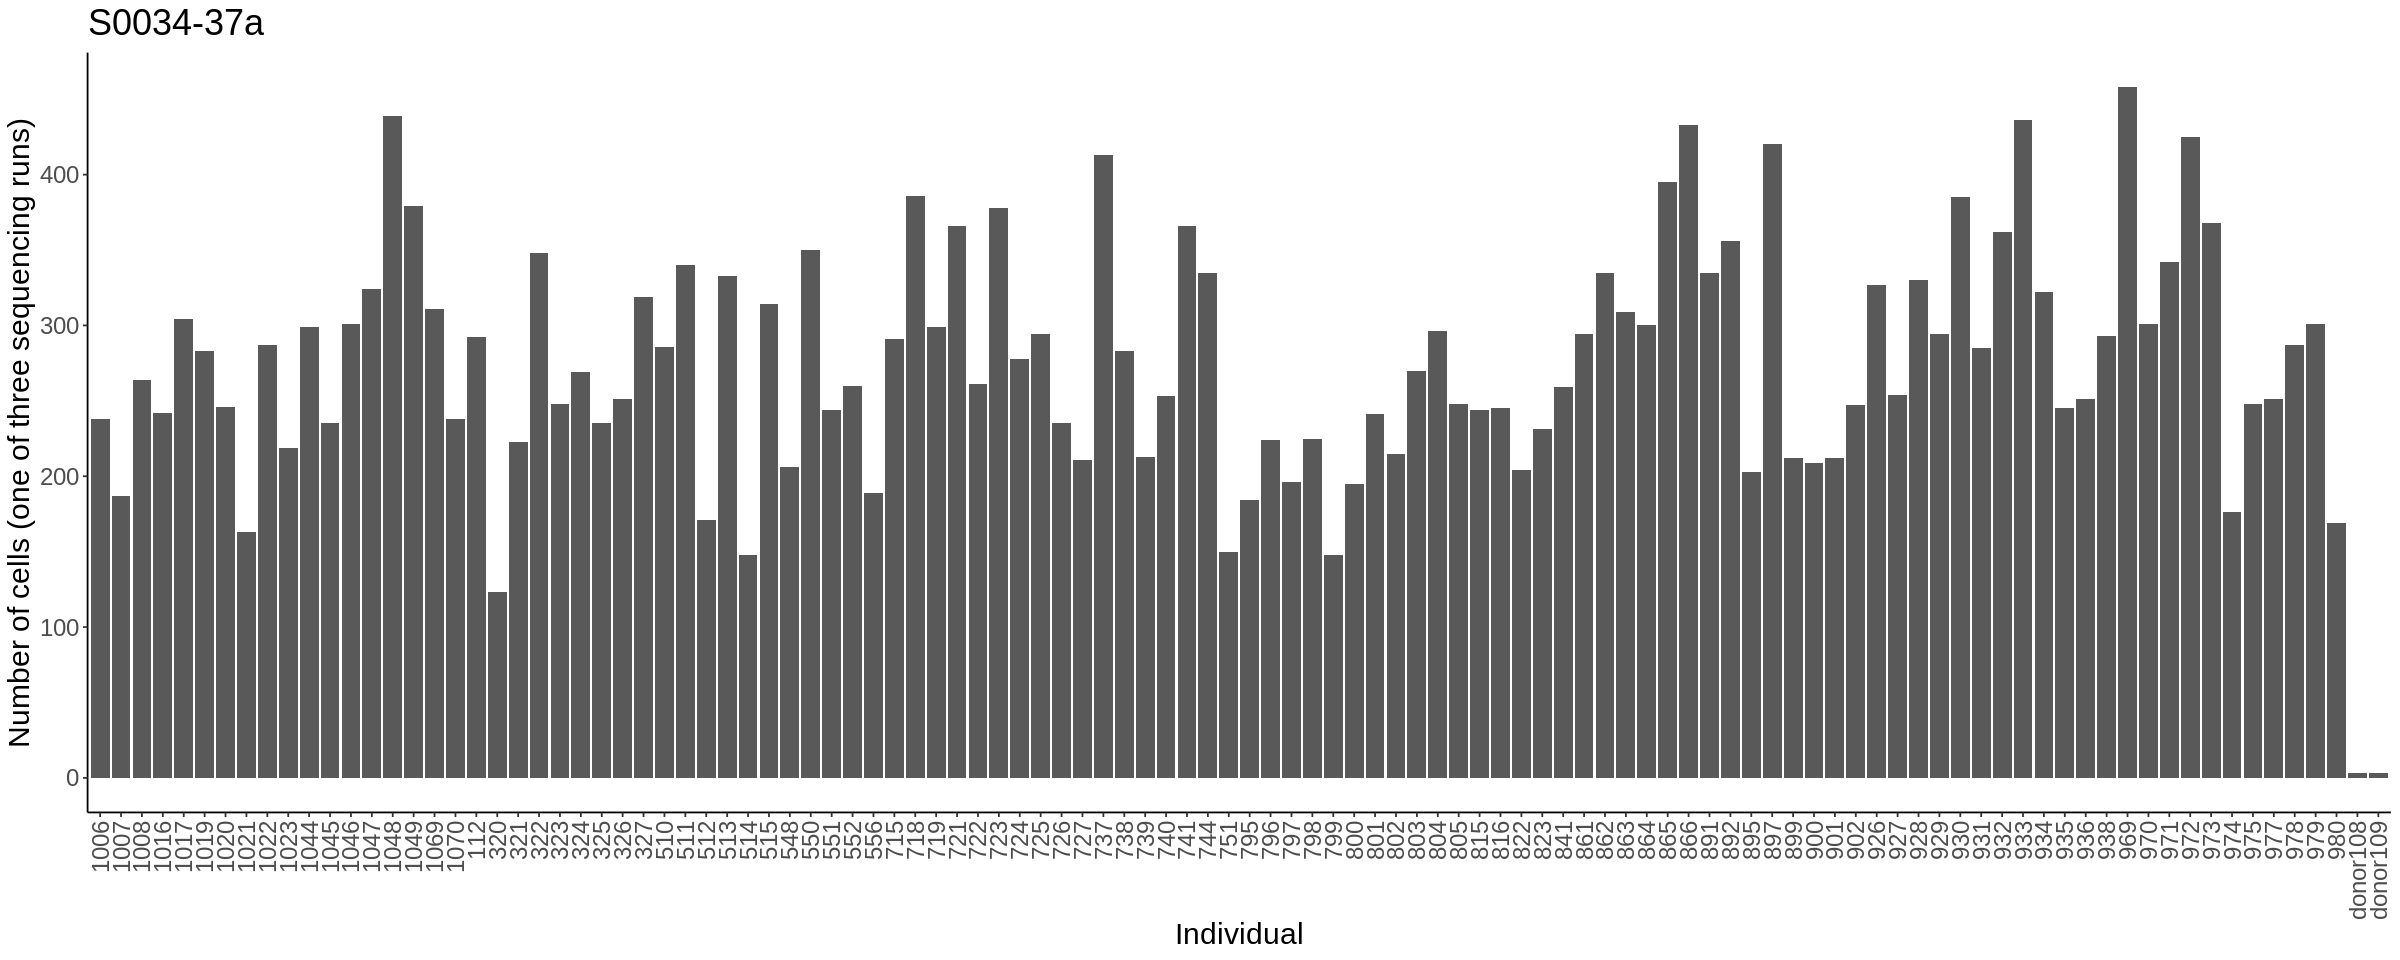

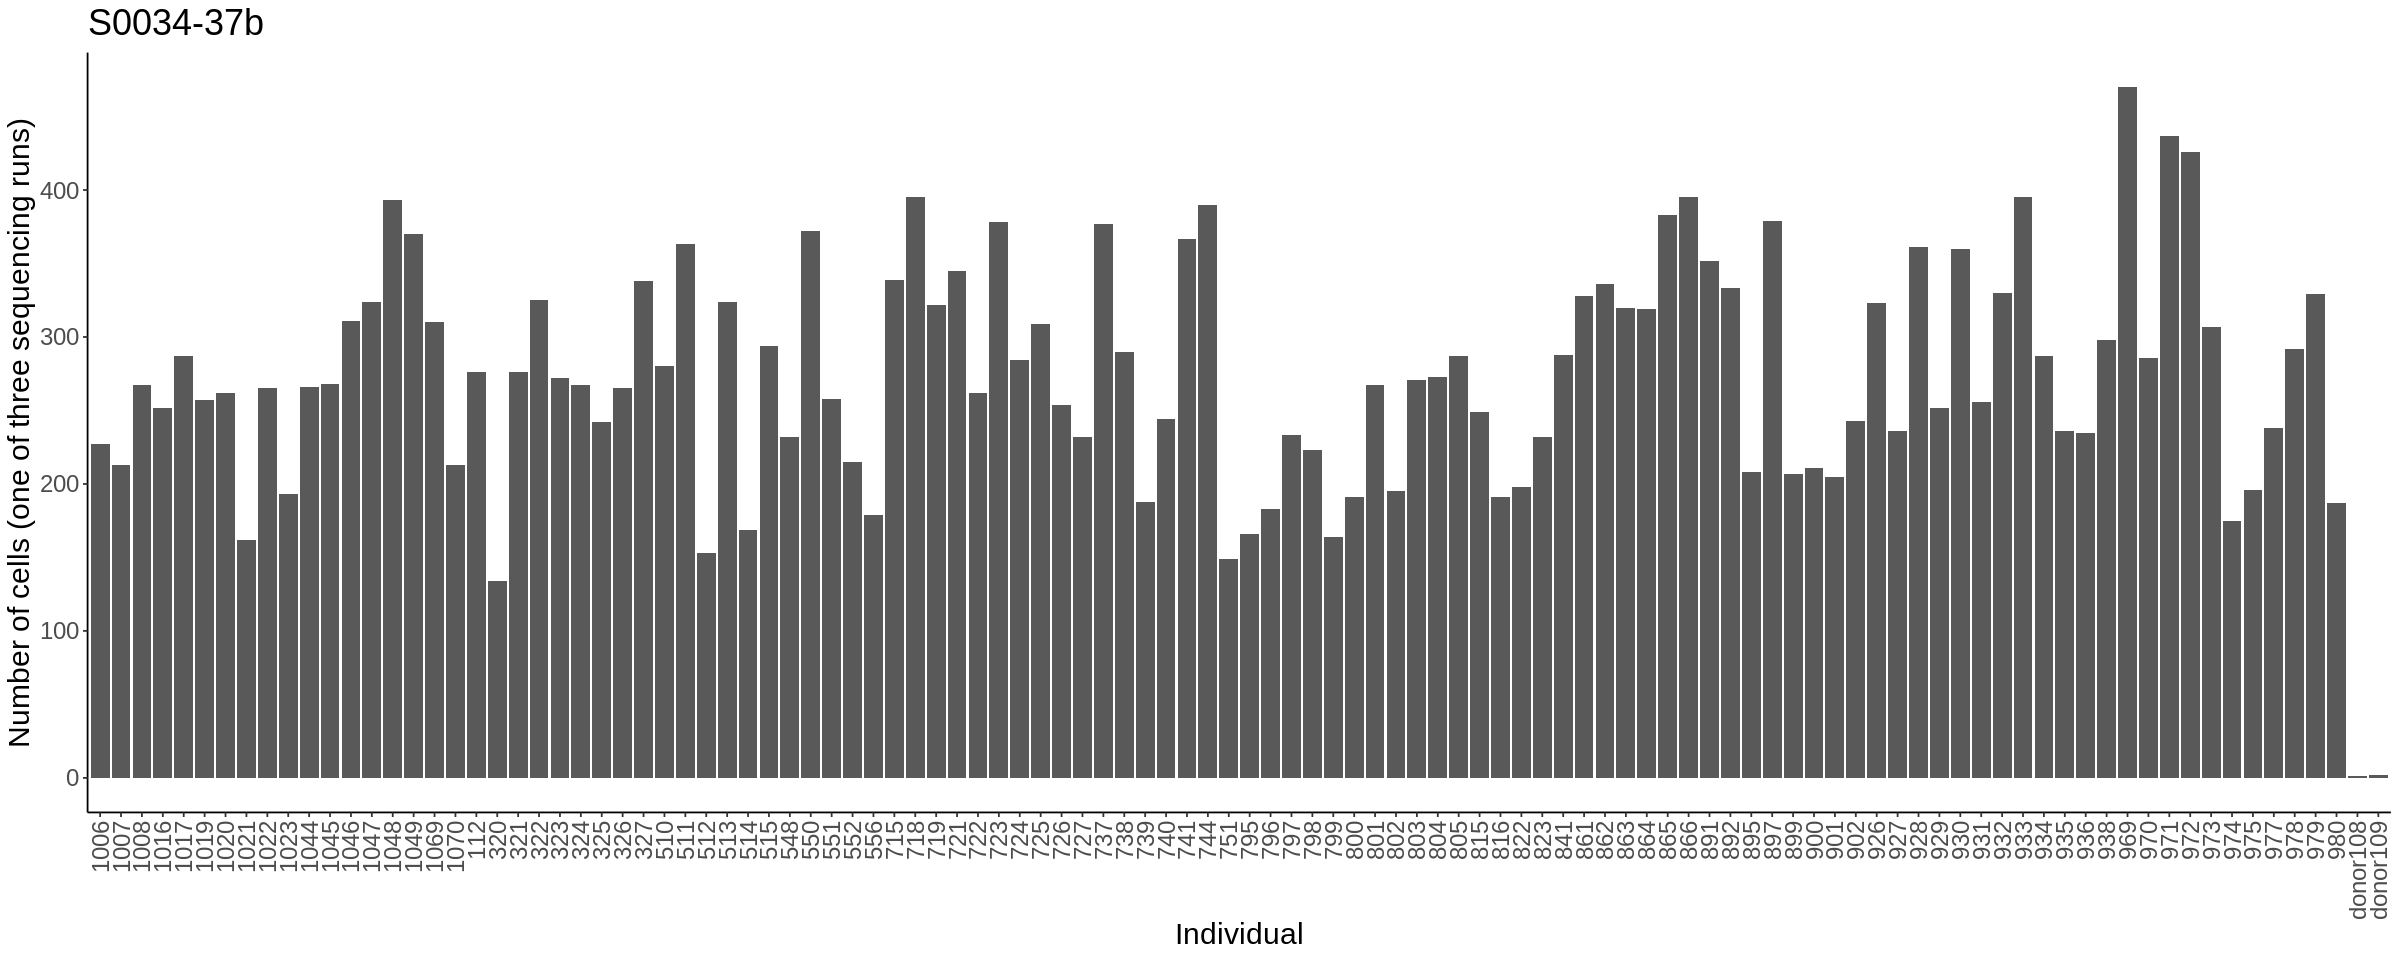

In [23]:
options(repr.plot.width = 20, repr.plot.height = 8) 
for (sample in samples){
    if (!(sample %in% c('S0021-24a','S0021-24b','S0025-28a','S0025-28b','S0030-33a','S0030-33b','S0034-37a','S0034-37b'))){next}
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    p = ggplot(vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),], aes(x=Var1, y=Freq)) + geom_bar(stat = "identity")
    p = p + theme_classic() + theme(text = element_text(size=18))
    p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    p = p + xlab("Individual") + ylab("Number of cells (one of three sequencing runs)")
    print(p + ggtitle(sample))
}

In [24]:
df_summary = data.frame()
for (sample in samples){
    if (!(sample %in% c('S0021-24a','S0021-24b','S0025-28a','S0025-28b','S0030-33a','S0030-33b','S0034-37a','S0034-37b'))){next}
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    df = vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),]
    df2 = read.csv(paste0(samples_dir,sample,".tsv"),sep="\t", header = F)
    new_df = data.frame(sample = sample,
                        n_donors = nrow(df),
                        avg_ncells = mean(df$Freq),
                        std_ncells = sd(df$Freq),
                        expected_n_donors = nrow(df2))
    df_summary = rbind(df_summary, new_df)
}
head(df_summary)

sample    n_donors avg_ncells std_ncells expected_n_donors
1 S0021-24a 108      281.6204   97.96478   105              
2 S0021-24b 108      282.0278   97.52301   105              
3 S0025-28a 112      206.4018   63.06703   111              
4 S0025-28b 112      228.4911   71.87025   111              
5 S0030-33a 110      260.6455   77.06575   110              
6 S0030-33b 110      258.4091   74.57233   110

In [25]:
df_summary$pool = gsub("a","",gsub("b","",df_summary$sample))

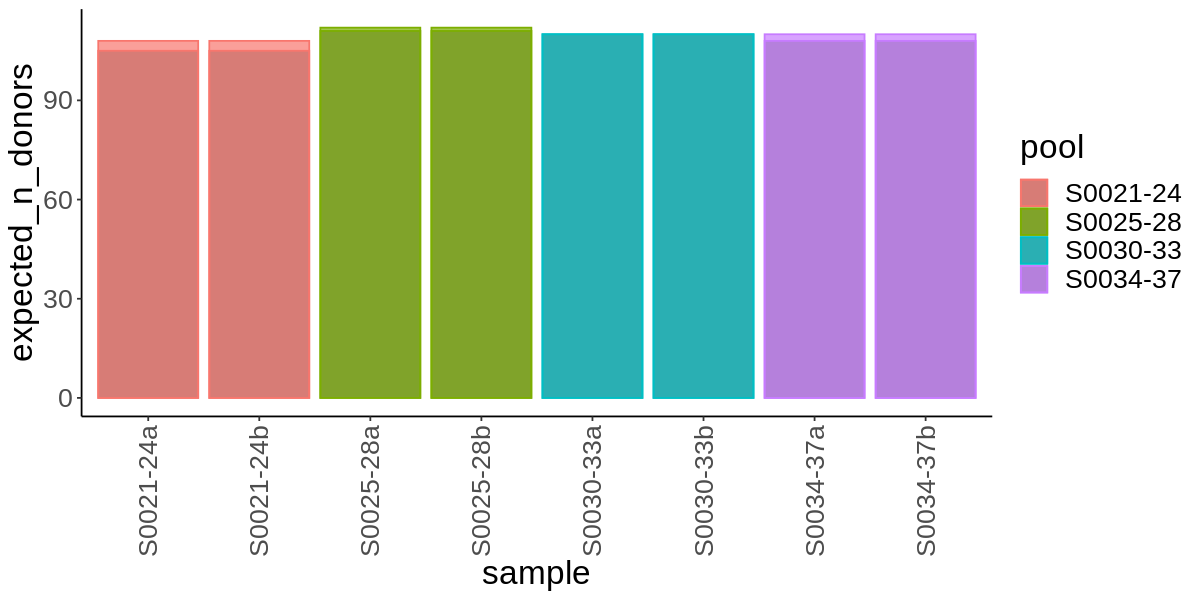

In [26]:
options(repr.plot.width = 10, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=expected_n_donors, col=pool)) + geom_bar(stat = "identity",alpha=0.7)
p = p + geom_bar(stat = "identity", aes(x=sample, y=n_donors, fill=pool),alpha=0.7)
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

In [27]:
mean(df_summary$avg_ncells)
mean(df_summary$std_ncells)

[1] 257.9551

[1] 80.25943

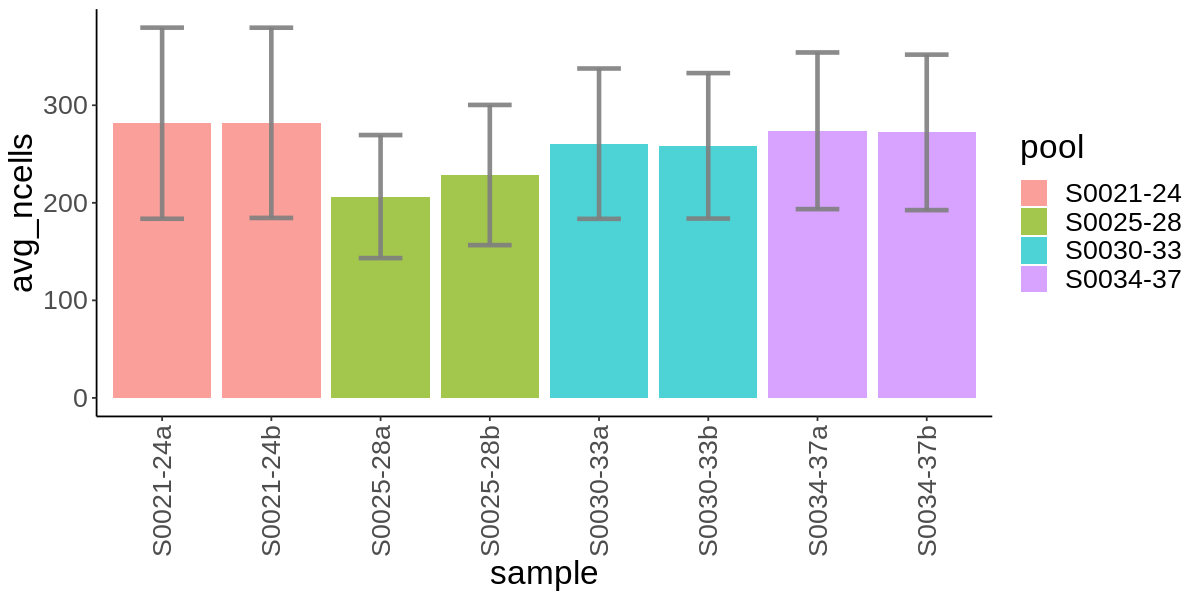

In [28]:
options(repr.plot.width = 10, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=avg_ncells,fill=pool)) + geom_bar(stat = "identity",alpha=0.7)
p = p + geom_errorbar( aes(x=sample, ymin=(avg_ncells-std_ncells), ymax=(avg_ncells+std_ncells)), width=0.4, colour="gray50", alpha=0.9, size=1.3)
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

In [29]:
df_summary = data.frame()
for (sample in samples[]){
#     if (sample %in% c('S0021-24b')){next}
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    new_df = data.frame(sample = sample,
                        n_donors = nrow(vireo_df),
                        n_cells = sum(vireo_df$Freq),
                        n_doublets = vireo_df[vireo_df$Var1=="doublet","Freq"],
                        n_unassigned = vireo_df[vireo_df$Var1=="unassigned","Freq"])
    df_summary = rbind(df_summary, new_df)
}
head(df_summary)

sample n_donors n_cells n_doublets n_unassigned
1 S0001a 30       31524   3133       1103        
2 S0001b 30       32419   3403       1115        
3 S0001c 30       30546   3119       1157        
4 S0002a 30       22218   1115       2175        
5 S0002b 30       21849   1083       1948        
6 S0002c 30       21925   1262       2338

In [30]:
mean(df_summary$n_cells)
mean(df_summary$n_doublets)
mean(df_summary$n_unassigned)

[1] 30546.53

[1] 3022.833

[1] 2088.392

In [31]:
mean(df_summary$n_doublets/df_summary$n_cells)
mean(df_summary$n_unassigned/df_summary$n_cells)

[1] 0.0925262

[1] 0.06573878

In [32]:
df_summary2 = df_summary[!(df_summary$sample %in% c("S0023b","S0025b")),]
mean(df_summary2$n_doublets/df_summary2$n_cells)
mean(df_summary2$n_unassigned/df_summary2$n_cells)

[1] 0.09107022

[1] 0.06241378

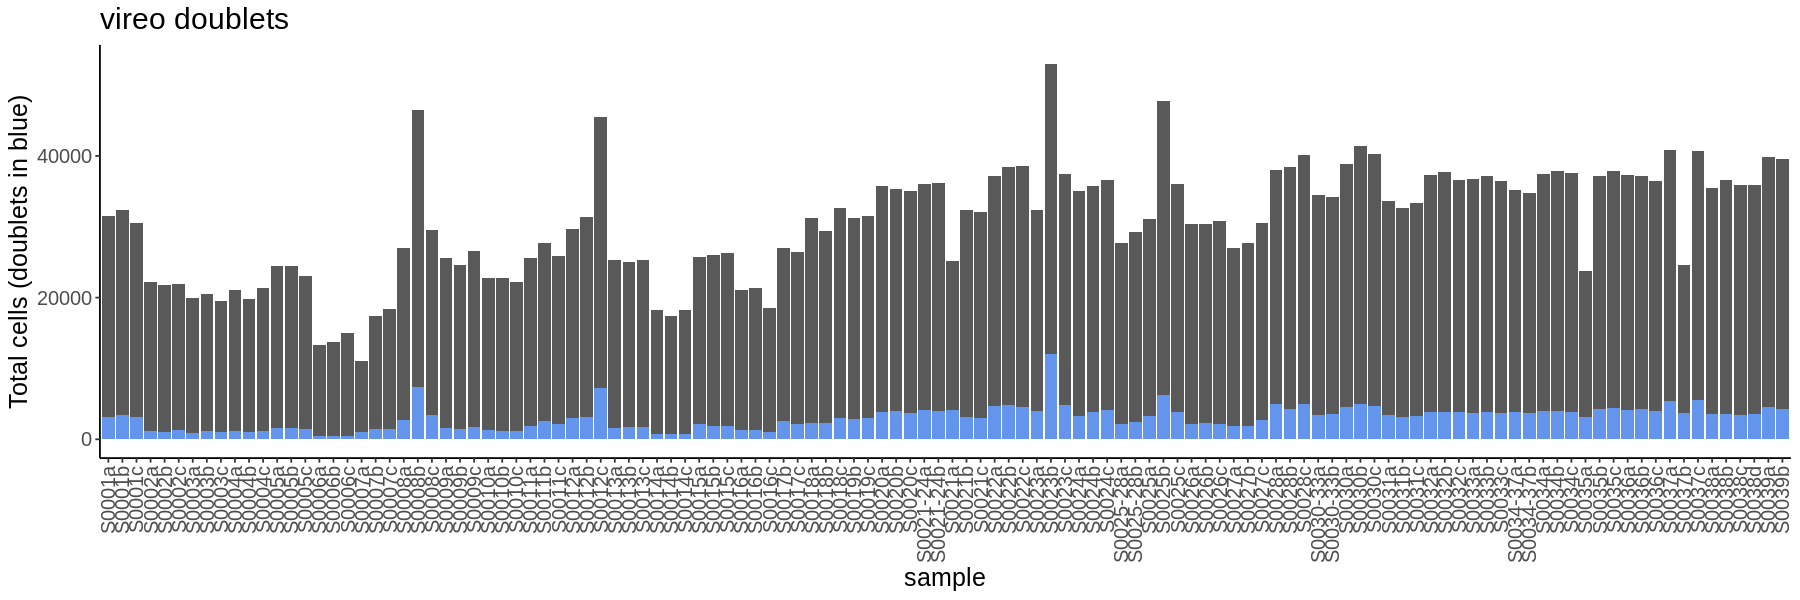

In [33]:
options(repr.plot.width = 15, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=n_cells)) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=n_doublets), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p = p + ylab("Total cells (doublets in blue)") + ggtitle("vireo doublets")
p

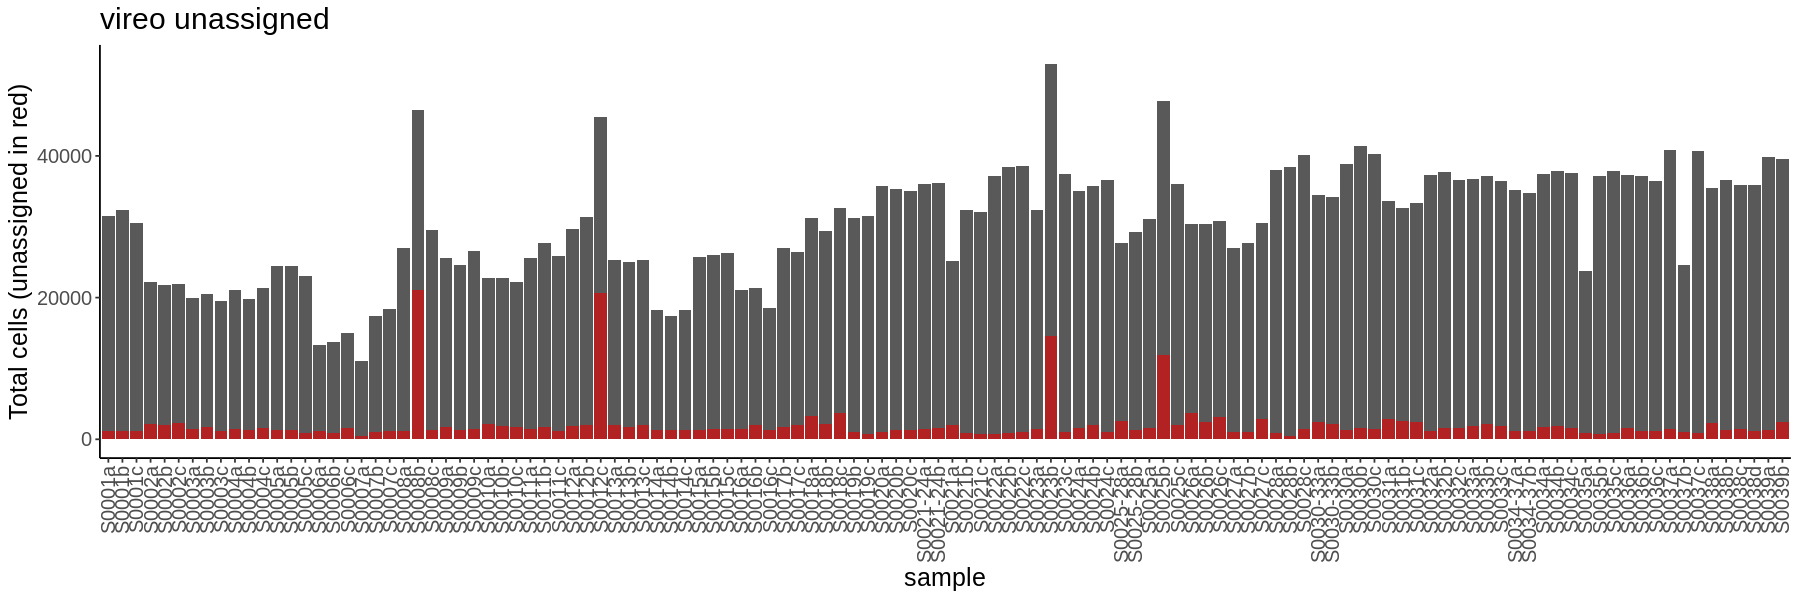

In [34]:
options(repr.plot.width = 15, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=n_cells)) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=n_unassigned), fill="firebrick")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p = p + ylab("Total cells (unassigned in red)") + ggtitle("vireo unassigned")
p